# Classification model for document class prediction

## Part 1 : data preparation

### 1.A. Extraction of top labels (in terms of frequency) and the associated label (the outputs)

In [540]:
import os
import re
import numpy as np
from sklearn import svm


sources_directory = "./CC/CC-src"

print(os.getcwd())

C:\Users\gauqu\Desktop\Projet PRIM 2022-2023\document_class_classification


In [541]:
list_sources = os.listdir(sources_directory)
print(list_sources)

['0904.1630', '0904.2058', '0904.2310', '0904.2759', '0904.3116', '0904.3169', '0904.3273', '0904.3912', '0904.3927', '0904.3941', '0904.4331', '0904.4360', '0904.4512', '0905.0602', '0905.1202', '0905.1215', '0905.1271', '0905.1300', '0905.1993', '0905.2381', '0905.2419', '0905.2485', '0905.2918', '0905.3108', '0905.3720', '0905.3757', '0905.3802', '0905.4100', '0905.4251', '0906.0205', '0906.0687', '0906.1226', '0906.1399', '0906.1489', '0906.1702', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3162', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3469', '0906.3554', '0906.3643', '0906.3765', '0906.4162', '0906.4216', '0906.4291', '0906.4431', '0906.4816', '0906.5112', '0906.5475', '0907.0088', '0907.0159', '0907.0774', '0907.1103', '0907.1297', '0907.1307', '0907.1579', '0907.1724', '0907.2621', '0907.2639'

In [542]:
tex_files = []
class_per_source = []
sources_names = []
cpt = 0

for source in list_sources:
    sources_names.append(source)
    classes = []
    for file_name in os.listdir(sources_directory + "/" + source):
        
        if file_name.__contains__(".tex") and not file_name.__contains__(".bak"):
            tex_files.append(file_name)
            
            try:
                data = open(sources_directory + "/" + source + "/" + file_name) # Shouldn't bug ! Try to put it out of the tyy except
                not_found_yet = True
                
                while not_found_yet:
                    line = data.readline()
                    pattern = re.compile(r'\\documentclass(.*)}')
                    
                    if not line:
                        break
                    
                    if pattern.match(line):
                        not_found_yet = False
                        doc_class = pattern.search(line).group()
                        if not doc_class.__contains__('{') and doc_class.__contains__('%'):
                            pass # One problematic case over all examples
                        else:
                            doc_class = doc_class.split('{', 1)[1]
                            doc_class = doc_class.split('}', 1)[0]
                            classes.append(doc_class)
                    
            except UnicodeDecodeError as error:
                print(error)
                pass # Some files can't be read ...
                    
                        
            
    if len(classes) > 0:
        classes = classes[0]
        cpt = cpt+1
    
    else:
        classes = None 
        
    class_per_source.append(classes)
            
print(100 * (cpt / len(list_sources)))

'charmap' codec can't decode byte 0x9d in position 2696: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 1486: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 5356: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 3649: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 59: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 626: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 4833: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 313: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 1063: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 95: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 14: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 

'charmap' codec can't decode byte 0x9d in position 21: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 21: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 1155: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 3316: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 4220: character maps to <undefined>
'charmap' codec can't decode byte 0x90 in position 4492: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 5137: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 899: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 5461: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 4607: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 939: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in positio

In [543]:
print(class_per_source)
print(len(class_per_source))

for index in range(len(class_per_source)):
    if class_per_source[index] is not None:
        class_per_source[index] = class_per_source[index].split("-")[0]
        # Problem with Levenshtein distance when considering lipics-v2019 for instance (6 / 6)
        
print(class_per_source)

[None, 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', None, 'article', 'article', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', None, 'IEEEtran', 'article', 'article', 'tlp', 'article', 'acmtrans2m', 'article', 'article', 'article', 'article', 'llncs', 'article', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'article', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'ws-book9x6', 'article', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'article', 'article', 'article', 'article', 'amsproc', 'article', 'siamltex', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'amsart', 'eptcs', 'article', None, 'llncs', None, None, 'article', 'siamltex', 'revtex4', 'art

In [544]:
print(sources_names)
print(len(sources_names))

['0904.1630', '0904.2058', '0904.2310', '0904.2759', '0904.3116', '0904.3169', '0904.3273', '0904.3912', '0904.3927', '0904.3941', '0904.4331', '0904.4360', '0904.4512', '0905.0602', '0905.1202', '0905.1215', '0905.1271', '0905.1300', '0905.1993', '0905.2381', '0905.2419', '0905.2485', '0905.2918', '0905.3108', '0905.3720', '0905.3757', '0905.3802', '0905.4100', '0905.4251', '0906.0205', '0906.0687', '0906.1226', '0906.1399', '0906.1489', '0906.1702', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3162', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3469', '0906.3554', '0906.3643', '0906.3765', '0906.4162', '0906.4216', '0906.4291', '0906.4431', '0906.4816', '0906.5112', '0906.5475', '0907.0088', '0907.0159', '0907.0774', '0907.1103', '0907.1297', '0907.1307', '0907.1579', '0907.1724', '0907.2621', '0907.2639'

In [545]:
from collections import Counter

classes = {x:class_per_source.count(x) for x in class_per_source}

size_of_trainable_sources = len(sources_names) - classes[None] - 2 # classes['article'] - 2

del classes[None]
#del classes['article']

sorted_classes = sorted(classes, key=classes.get, reverse=True)

nb_classes = range(1, len(classes.keys()))
pct_covered_sources = []

for value in nb_classes:
    problem_classes = sorted_classes[:value]

    covered_sources_with_pb_classes = 0

    for pb_class in problem_classes: 
        covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
        
    pct_covered_sources.append(100 * covered_sources_with_pb_classes)

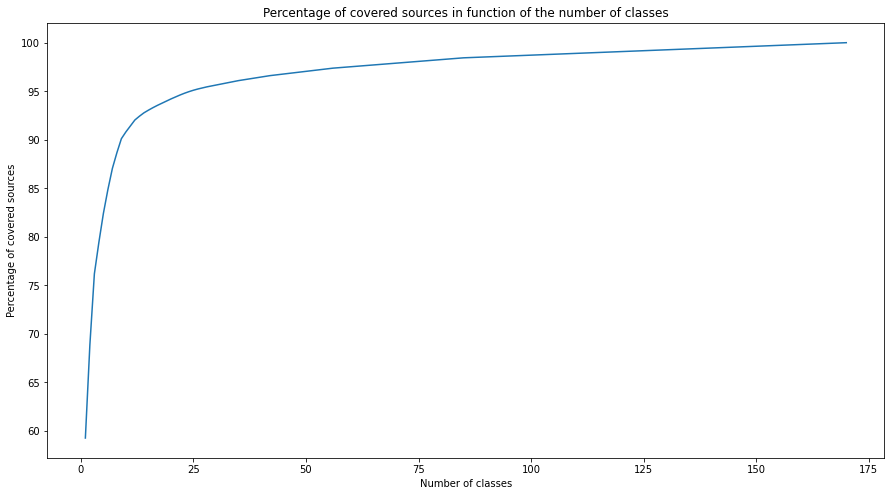

In [546]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(nb_classes, pct_covered_sources)
plt.xlabel("Number of classes")
plt.ylabel("Percentage of covered sources")
plt.title("Percentage of covered sources in function of the number of classes")
plt.show()

# We reduce the number of classes by ~30 by splitting on -

In [547]:
#f classes in the model

k = len(sorted_classes)

problem_classes = sorted_classes[:k]

covered_sources_with_pb_classes = 0

for pb_class in problem_classes: 
    covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
    
print("Percentage of covered sources with " + str(k) + " classes : " + str(100 * covered_sources_with_pb_classes))

Percentage of covered sources with 171 classes : 100.03672420124894


In [548]:
trainable_file_names = []
trainable_outputs = []

for index in range(0, len(sources_names) - 2): # - 2 since there are also two folders "compressed" and "tmp"
    if not(class_per_source[index] == None):# or class_per_source[index] == "article"):
        if class_per_source[index] in problem_classes:
            trainable_outputs.append(class_per_source[index])
            trainable_file_names.append(sources_names[index])

In [549]:
print(len(trainable_file_names))
print(trainable_file_names)

5448
['0904.2058', '0904.2310', '0904.2759', '0904.3116', '0904.3169', '0904.3273', '0904.3912', '0904.3941', '0904.4331', '0904.4360', '0904.4512', '0905.0602', '0905.1202', '0905.1215', '0905.1271', '0905.1300', '0905.1993', '0905.2381', '0905.2419', '0905.2485', '0905.3108', '0905.3720', '0905.3757', '0905.3802', '0905.4100', '0905.4251', '0906.0205', '0906.0687', '0906.1226', '0906.1399', '0906.1489', '0906.1702', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3162', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3469', '0906.3554', '0906.3643', '0906.3765', '0906.4162', '0906.4216', '0906.4291', '0906.4431', '0906.4816', '0906.5112', '0906.5475', '0907.0088', '0907.0159', '0907.0774', '0907.1103', '0907.1297', '0907.1307', '0907.1579', '0907.1724', '0907.2621', '0907.2639', '0907.2663', '0907.2850', '0907.

In [550]:
print(len(trainable_outputs))
print(trainable_outputs)
# Distance de Levenstein pour regrouper les classes similaires, petite distance (seuil de 2 ou 3) 
# Enlever tout ce qui est après un tiret
# Tester avec les préfixes aussi 

5448
['article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'tlp', 'article', 'acmtrans2m', 'article', 'article', 'article', 'article', 'llncs', 'article', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'article', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'ws', 'article', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'article', 'article', 'article', 'article', 'amsproc', 'article', 'siamltex', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'amsart', 'eptcs', 'article', 'llncs', 'article', 'siamltex', 'revtex4', 'article', 'report', 'amsart', 'article', '

### 1.B. Extraction of features via PDFAlto (training set)

#### Features to be extracted : 

 1. The principal indent size (space between the very-left of the page and the beginning of the text in a regular paragraph. To do so, we must, among all the \<TextBlock\>, find the majoritarian "HPOS" value (but with this, we consider that, in the     paper, there will be more written explanations that mathematical formulas ...  Pb : Document multi-colonnes : si plusieurs choix dans la "majorité", prendre la marge la plus faible. Sig-alternate : classe multi-colonnes. 
   
 2. The main used font-type. We can either take all "STYLEREFS" and find the main associated "FONTFAMILY", or focus on all TextBlocks that have the majoritarian "HPOS", then look at their "STYLEREFS" and finally take the majoritarian associated "FONTFAMILY". Pb : Nom de police parfois automatiquement généré (regarder si le nom de police n'est pas généré juste une seule fois. PDF font liste les noms de police. Parfois (le plus courant) on a un nom automatiuement généré puis le vrai nom. Indépendant de la taille normalement : à parser.
 
 3. The "main" font-size. By "main" font-size, I mean the font-size that is used in the regular TextBlocks, i.e. the ones that have the majoritarian "HPOS". Concretely, it corresponds to the paragraphs that only contain english text with explanations. 
 
 4. (and 5.) Similar features for the figure descriptions. It is most likely that a paper does contain figures, as we are not sure that it will contain theorems, lemms and so on (even though the selected papers should). So 2 new features : main used font-type and font-size (the HPOS is useless, since figure description are - almost - always centered, and their HPOS are therefore relative to the length of the description itself). 
 
 5. Similar features for the abstract, with HPOS. Aussi à identifier (avec Grobid).
 
 Grobid permets d'extraire le genre d'informations pour 4 et 5. Pour les hyperliens aussi. 
 
 Utiliser une liste de mots-clés sinon (Figure, Fig., Th., Theorem, etc).
 
 Autres idées : les autre marges (hautes et basses), top-k polices utilisées, proportion du texte en telle police (pour chaque famille de police, proportion du texte qui utilise cette police), références bibliographiques (grobid).
 
 Grobid bug (perds parfois du texte). Il perds de l'information par rapport à PDF Alto.
 
 ## Current status :
 
 ### Feature 1 : Majoritarian left margin (between left limit of the page and text block) : positive float
 ### Feature 2 : Majoritarian top margin (between top limit of the page and text block) : positive float
 ### Feature 3 : Font size associated to majoritarian font style : positive float
 ### Feature 4 : Font type associated to majoritarian font style : multi-label class
 ### To be implemented : Feature 5 : Is the article in multicolumn format or not : boolean (could be done with several manners, one of them consisting in computing majoritarian line length)
 ### To be implemented : Feature 6 : Line spacing, expressed in the number of times the font size : float number, usually between 0 and 2 (quite hard to compute, and we should take the majoritarian)
 
 #### Possible modfication : change the majoritarian font type for several features that correspond to the most popular font types, and then report for each example the portion of text that does use each of the font type.

In [551]:
training_set_size = len(trainable_file_names)
#training_set_size = 50
number_of_features = 5

## 

## 

In [ ]:
# Features 1 to 5

# Parsing sax des documents 

import xml.etree.ElementTree as ET

representativeness = []

training_set = np.full((training_set_size, number_of_features), None)

for index in range(4131, training_set_size):
    file_name = "./CC/CC-pdf/" + trainable_file_names[index] + ".xml"
    
    tree = ET.parse(file_name)
    root = tree.getroot()

    h_positions_textblocks = []
    v_positions_textblocks = []
    width_textblocks = []
    font_per_string = []

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/*"):
        if element.tag == '{http://www.loc.gov/standards/alto/ns-v3#}TextBlock':
            h_positions_textblocks.append(round(float(element.attrib['HPOS']), 1))
            width_textblocks.append(round(float(element.attrib['WIDTH']), 0))
          
    mean = str(round(np.mean(width_textblocks), 0))
    
    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/*"):
        for child in element:
            v_positions_textblocks.append(round(float(child.attrib['VPOS']), 1))
            break # We only want the first element to know its VPOS on top of the page
                 

    occurences_h_positions_textblocks = {x:h_positions_textblocks.count(x) for x in h_positions_textblocks}
    majoritarian_hpos = sorted(occurences_h_positions_textblocks, key=occurences_h_positions_textblocks.get, reverse=True)[0]
    
    occurences_v_positions_textblocks = {x:v_positions_textblocks.count(x) for x in v_positions_textblocks}
    majoritarian_vpos = sorted(occurences_v_positions_textblocks, key=occurences_v_positions_textblocks.get, reverse=True)[0]
    
    occurences_width_textblocks = {x:width_textblocks.count(x) for x in width_textblocks}

 
    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/{http://www.loc.gov/standards/alto/ns-v3#}TextBlock/{http://www.loc.gov/standards/alto/ns-v3#}TextLine/*"):
          if element.tag == "{http://www.loc.gov/standards/alto/ns-v3#}String":
                font_per_string.append(element.attrib['STYLEREFS'])

    occurences_font_per_string = {x:font_per_string.count(x) for x in font_per_string} 
    representativeness.append(occurences_font_per_string[sorted(occurences_font_per_string, key=occurences_font_per_string.get, reverse=True)[0]] / len(font_per_string))
    majoritarian_font_per_string = sorted(occurences_font_per_string, key=occurences_font_per_string.get, reverse=True)[0]

    majoritarian_font_size = 0
    majoritarian_font_family = ""

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Styles/*"):
        if element.attrib['ID'] == majoritarian_font_per_string:
            majoritarian_font_size = round(float(element.attrib['FONTSIZE']), 1)
            majoritarian_font_family = element.attrib['FONTFAMILY']
            
    training_set[index, 0] = majoritarian_hpos
    training_set[index, 1] = majoritarian_vpos
    training_set[index, 2] = majoritarian_font_size
    training_set[index, 3] = majoritarian_font_family
    
    f = open("dataset_v5f_with_article.txt", "a")
    f.write("[" + str(majoritarian_hpos) + ", " + str(majoritarian_vpos) + ", " + str(majoritarian_font_size) + ", " + str(mean)  + ", \'" + str(majoritarian_font_family) + "\'],\n")
    f.close()
    
    print(str(index) + " / " + str(training_set.shape[0]))
    
    # Vérifier la pertinence des résultats (regarder les valeurs des classes majoritaires et à quelle point elles sont représentatives)

#print(representativeness)

### 1.C. Pre-processing of training set and training outputs

In [689]:
training_set = np.array([[72.0, 74.7, 10.9, 221.0, 'cmr10'],
[125.8, 132.6, 10.9, 212.0, 'cmr10'],
[72.0, 72.4, 10.9, 146.0, 'cmr10'],
[133.8, 128.3, 10.0, 211.0, 'nimbusromno9l'],
[90.0, 112.0, 10.0, 169.0, 'cmr10'],
[49.0, 30.6, 10.0, 167.0, 'nimbusromno9l'],
[125.8, 135.4, 7.2, 102.0, ''],
[133.8, 127.3, 10.0, 260.0, 'cmr10'],
[81.0, 111.8, 10.9, 313.0, 'cmr10'],
[72.0, 74.5, 10.0, 244.0, 'cmr10'],
[70.9, 128.3, 10.0, 252.0, 'cmr10'],
[72.0, 72.9, 10.9, 210.0, 'nimbusromno9l'],
[134.8, 119.0, 10.0, 150.0, 'times'],
[312.0, 59.5, 10.0, 110.0, 'nimbusromno9l'],
[83.3, 83.3, 10.9, 266.0, 'cmr10'],
[72.0, 66.2, 10.9, 207.0, 'palatino'],
[72.0, 74.7, 10.9, 271.0, 'cmr10'],
[72.0, 74.5, 10.0, 117.0, 'cmr10'],
[72.0, 62.0, 10.9, 143.0, 'times'],
[72.0, 74.7, 10.9, 188.0, 'cmr10'],
[54.0, 77.2, 10.0, 149.0, 'times'],
[54.0, 173.8, 10.0, 74.0, 'nimbusromno9l'],
[315.0, 57.5, 10.0, 140.0, 'nimbusromno9l'],
[116.9, 116.4, 10.0, 233.0, 'cmr10'],
[72.0, 85.4, 10.9, 239.0, 'times'],
[126.0, 95.7, 10.0, 141.0, 'cmr10'],
[72.0, 75.2, 5.0, 146.0, 'cmr5'],
[72.0, 77.5, 7.2, 124.0, ''],
[133.8, 127.3, 10.0, 177.0, 'cmr10'],
[105.8, 94.1, 10.0, 183.0, 'cmr10'],
[134.8, 118.3, 10.0, 177.0, 'cmr10'],
[72.0, 75.5, 10.9, 121.0, 'cmr10'],
[90.0, 76.1, 10.9, 119.0, 'cmr10'],
[134.8, 118.3, 10.0, 228.0, 'cmr10'],
[79.2, 38.5, 10.9, 298.0, 'times'],
[79.2, 38.4, 10.9, 247.0, 'times'],
[89.8, 97.3, 10.9, 237.0, 'times'],
[79.2, 38.4, 10.9, 230.0, 'times'],
[79.2, 38.5, 10.9, 230.0, 'times'],
[79.2, 38.4, 10.9, 219.0, 'times'],
[79.2, 38.5, 10.9, 232.0, 'times'],
[79.2, 38.5, 10.9, 312.0, 'times'],
[79.2, 38.4, 10.9, 162.0, 'times'],
[79.2, 35.9, 10.9, 176.0, 'nimbusromno9l'],
[79.2, 38.4, 10.9, 255.0, 'times'],
[79.2, 38.5, 10.9, 271.0, 'times'],
[79.2, 38.5, 10.9, 77.0, 'times'],
[79.2, 379.9, 10.9, 185.0, 'times'],
[79.2, 38.9, 10.9, 265.0, 'nimbusromno9l'],
[79.2, 38.5, 10.9, 222.0, 'times'],
[79.2, 38.9, 10.9, 234.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 193.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 158.0, 'nimbusromno9l'],
[72.0, 112.0, 12.0, 229.0, 'cmr12'],
[135.4, 110.1, 10.0, 181.0, 'cmr10'],
[125.8, 132.6, 10.9, 232.0, 'cmr10'],
[110.9, 128.8, 12.0, 302.0, 'cmr12'],
[79.2, 38.5, 10.9, 131.0, 'times'],
[68.4, 59.6, 10.0, 281.0, 'cmr10'],
[72.0, 75.2, 10.0, 111.0, 'cmr10'],
[90.0, 112.4, 10.9, 281.0, 'times'],
[72.0, 75.5, 10.9, 79.0, 'times'],
[79.9, 65.4, 10.0, 142.0, 'lmroman10'],
[72.0, 129.7, 10.9, 230.0, 'cmr10'],
[126.7, 97.1, 10.0, 259.0, 'cmr10'],
[72.0, 75.0, 12.0, 242.0, 'cmr12'],
[108.0, 74.5, 10.0, 187.0, 'cmr10'],
[72.0, 74.7, 10.9, 290.0, 'cmr10'],
[97.0, 75.2, 9.0, 168.0, 'cmr9'],
[72.0, 74.5, 10.0, 100.0, 'cmr10'],
[64.8, 53.5, 10.0, 303.0, 'cmr10'],
[72.0, 112.7, 12.0, 195.0, 'cmr12'],
[82.6, 128.8, 12.0, 202.0, 'cmr12'],
[117.8, 129.7, 10.9, 192.0, 'cmr10'],
[79.2, 81.9, 10.9, 313.0, 'cmr10'],
[72.0, 59.8, 10.9, 217.0, 'cmr10'],
[134.8, 119.0, 10.0, 184.0, 'cmr10'],
[50.2, 75.5, 10.9, 211.0, 'times'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[81.0, 102.7, 10.9, 240.0, 'cmr10'],
[72.0, 74.7, 10.9, 226.0, 'cmr10'],
[90.0, 112.4, 10.9, 225.0, 'times'],
[134.8, 118.3, 10.0, 240.0, 'cmr10'],
[96.8, 70.2, 10.0, 245.0, 'cmr10'],
[72.0, 91.8, 10.9, 328.0, 'cmr10'],
[79.2, 38.5, 10.9, 218.0, 'times'],
[72.0, 110.7, 10.9, 241.0, 'cmr10'],
[134.8, 123.5, 7.2, 108.0, ''],
[117.8, 130.3, 10.9, 53.0, 'cmr10'],
[107.9, 98.8, 10.0, 123.0, 'cmr10'],
[72.0, 38.9, 10.9, 314.0, 'cmr10'],
[125.8, 132.6, 10.9, 251.0, 'cmr10'],
[125.8, 132.6, 10.9, 224.0, 'cmr10'],
[97.9, 96.5, 12.0, 198.0, 'cmr12'],
[102.8, 131.9, 12.0, 178.0, 'cmr12'],
[62.3, 66.3, 10.9, 217.0, 'times'],
[69.7, 72.5, 10.9, 212.0, 'cmr10'],
[59.0, 75.7, 10.9, 351.0, 'cmr10'],
[72.0, 73.8, 12.0, 252.0, 'cmr12'],
[72.0, 74.7, 10.9, 198.0, 'cmr10'],
[72.0, 388.9, 10.9, 224.0, 'times'],
[126.7, 97.1, 10.0, 166.0, 'cmr10'],
[72.0, 73.1, 12.0, 227.0, 'cmr12'],
[117.8, 130.3, 10.9, 53.0, 'cmr10'],
[108.0, 127.3, 10.0, 134.0, 'cmr10'],
[110.9, 128.8, 12.0, 235.0, 'cmr12'],
[72.0, 75.5, 10.9, 219.0, 'cmr10'],
[99.2, 75.4, 10.0, 244.0, 'cmr10'],
[118.3, 99.8, 6.6, 245.0, ''],
[77.9, 75.0, 12.0, 195.0, 'cmr12'],
[72.0, 98.8, 10.9, 327.0, 'times'],
[117.8, 129.7, 10.9, 262.0, 'cmr10'],
[90.0, 103.0, 10.0, 178.0, 'times'],
[93.6, 84.5, 10.9, 228.0, 'cmr10'],
[118.3, 98.2, 10.0, 177.0, 'palatino'],
[118.3, 96.8, 12.0, 191.0, 'cmr12'],
[54.0, 29.3, 10.0, 70.0, 'cmr10'],
[90.0, 74.7, 10.9, 270.0, 'cmr10'],
[79.2, 97.4, 10.9, 207.0, 'cmr10'],
[134.8, 123.7, 10.8, 128.0, ''],
[81.0, 75.8, 12.0, 219.0, 'urwpalladiol'],
[72.0, 76.2, 12.0, 168.0, 'nimbusromno9l'],
[72.0, 74.4, 10.9, 196.0, 'sfrm1095'],
[72.0, 75.0, 12.0, 193.0, 'cmr12'],
[79.2, 38.5, 10.9, 204.0, 'times'],
[79.2, 38.5, 10.9, 199.0, 'times'],
[90.0, 76.1, 10.9, 303.0, 'cmr10'],
[315.0, 57.2, 10.0, 221.0, 'times'],
[72.0, 38.7, 10.9, 148.0, 'cmr10'],
[134.8, 93.1, 9.0, 137.0, 'cmr9'],
[90.0, 104.7, 10.9, 301.0, 'cmr10'],
[72.0, 75.0, 12.0, 246.0, 'cmr12'],
[133.8, 128.0, 10.0, 239.0, 'times'],
[64.8, 78.1, 10.9, 209.0, 'cmr10'],
[124.8, 128.3, 10.0, 175.0, 'cmr10'],
[72.0, 75.5, 10.9, 130.0, 'times'],
[93.6, 74.5, 10.0, 320.0, 'cmr10'],
[72.0, 74.7, 10.9, 245.0, 'cmr10'],
[90.0, 76.1, 10.9, 259.0, 'cmr10'],
[125.8, 133.6, 10.9, 125.0, 'nimbusromno9l'],
[54.0, 29.3, 10.0, 91.0, 'cmr10'],
[72.0, 75.5, 10.9, 162.0, 'times'],
[72.0, 74.7, 10.9, 255.0, 'cmr10'],
[72.0, 75.5, 10.9, 277.0, 'times'],
[72.0, 59.8, 10.9, 216.0, 'cmr10'],
[72.0, 37.1, 10.9, 153.0, 'times'],
[55.4, 69.2, 10.9, 243.0, 'cmr10'],
[72.0, 74.7, 10.9, 275.0, 'cmr10'],
[72.0, 38.7, 10.9, 178.0, 'cmr10'],
[126.7, 97.4, 10.0, 117.0, 'times'],
[72.0, 74.7, 10.9, 104.0, 'cmr10'],
[72.0, 84.6, 11.0, 315.0, 'times'],
[72.0, 74.8, 10.9, 328.0, 'cmr10'],
[72.0, 74.7, 10.9, 151.0, 'cmr10'],
[89.3, 87.1, 10.9, 231.0, 'cmr10'],
[72.0, 75.0, 12.0, 267.0, 'cmr12'],
[134.8, 118.3, 10.0, 186.0, 'cmr10'],
[72.0, 75.2, 10.9, 228.0, 'palatino'],
[108.8, 69.9, 10.0, 165.0, 'newcenturyschlbk'],
[72.0, 74.7, 10.9, 206.0, 'cmr10'],
[108.8, 70.0, 10.0, 186.0, 'centuryschl'],
[72.0, 75.2, 10.9, 221.0, 'palatino'],
[53.8, 57.0, 9.0, 128.0, 'cmr9'],
[110.9, 128.8, 12.0, 187.0, 'cmr12'],
[79.2, 38.5, 10.9, 105.0, 'times'],
[79.2, 38.4, 10.9, 281.0, 'times'],
[79.2, 38.4, 10.9, 186.0, 'times'],
[72.0, 75.2, 10.0, 201.0, 'cmr10'],
[158.6, 128.0, 9.0, 105.0, 'cmr9'],
[72.0, 75.3, 10.0, 171.0, 'times'],
[72.0, 74.7, 10.9, 178.0, 'cmr10'],
[54.0, 28.6, 10.0, 59.0, 'cmr10'],
[72.0, 75.0, 12.0, 225.0, 'cmr12'],
[133.8, 128.0, 10.0, 147.0, 'times'],
[72.0, 74.5, 10.0, 219.0, 'cmr10'],
[134.8, 119.3, 10.0, 85.0, 'nimbusromno9l'],
[91.8, 97.8, 10.9, 281.0, 'cmr10'],
[126.7, 97.5, 6.6, 236.0, ''],
[81.0, 111.7, 10.9, 212.0, 'cmr10'],
[113.4, 102.3, 12.0, 202.0, 'cmr12'],
[72.0, 75.5, 10.9, 204.0, 'times'],
[133.8, 127.3, 10.0, 204.0, 'cmr10'],
[121.8, 92.5, 10.0, 263.0, 'cmr10'],
[72.0, 75.6, 10.9, 190.0, 'nimbusromno9l'],
[134.8, 119.8, 12.0, 272.0, 'cmr12'],
[83.3, 95.4, 10.0, 132.0, 'cmr10'],
[72.0, 73.8, 12.0, 330.0, 'cmr12'],
[97.2, 107.4, 10.0, 135.0, 'cmr10'],
[134.8, 120.6, 10.9, 155.0, 'cmr10'],
[61.6, 79.8, 10.9, 269.0, 'cmr10'],
[72.0, 74.7, 10.9, 89.0, 'cmr10'],
[85.1, 103.1, 12.0, 139.0, 'times'],
[99.8, 77.4, 9.0, 159.0, 'sfrm0900'],
[126.7, 96.9, 10.0, 111.0, 'cmr10'],
[133.8, 127.3, 10.0, 178.0, 'cmr10'],
[72.0, 65.5, 10.9, 254.0, 'cmr10'],
[54.0, 57.2, 10.0, 113.0, 'times'],
[97.4, 118.4, 10.9, 289.0, 'cmr10'],
[72.0, 75.0, 12.0, 275.0, 'cmr12'],
[102.8, 131.9, 12.0, 207.0, 'cmr12'],
[72.0, 62.0, 10.9, 306.0, 'times'],
[90.0, 104.9, 10.9, 230.0, 'cmr10'],
[90.0, 105.2, 10.9, 200.0, 'times'],
[90.0, 104.9, 10.9, 197.0, 'cmr10'],
[72.0, 74.5, 10.0, 162.0, 'cmr10'],
[41.2, 28.6, 10.0, 85.0, 'cmr10'],
[72.0, 74.7, 10.9, 182.0, 'cmr10'],
[72.0, 75.5, 10.9, 56.0, 'times'],
[72.0, 75.5, 10.9, 273.0, 'times'],
[124.8, 128.3, 10.0, 204.0, 'cmr10'],
[79.2, 97.4, 10.9, 183.0, 'cmr10'],
[134.8, 118.3, 10.0, 163.0, 'cmr10'],
[90.0, 104.9, 10.9, 292.0, 'cmr10'],
[90.0, 104.9, 10.9, 171.0, 'cmr10'],
[90.0, 104.9, 10.9, 201.0, 'cmr10'],
[90.0, 104.9, 10.9, 215.0, 'cmr10'],
[90.0, 104.7, 10.9, 211.0, 'cmr10'],
[90.0, 104.9, 10.9, 218.0, 'cmr10'],
[126.7, 97.1, 10.0, 196.0, 'cmr10'],
[90.0, 104.9, 10.9, 285.0, 'cmr10'],
[95.9, 113.7, 10.0, 99.0, 'cmr10'],
[72.0, 75.7, 10.9, 162.0, 'cmr10'],
[90.0, 76.4, 10.9, 266.0, 'cmr10'],
[81.0, 111.6, 10.9, 261.0, 'cmr10'],
[72.0, 75.0, 12.0, 273.0, 'cmr12'],
[72.0, 74.7, 10.9, 194.0, 'cmr10'],
[90.0, 112.0, 10.0, 295.0, 'times'],
[72.0, 74.7, 10.9, 165.0, 'cmr10'],
[72.0, 74.7, 10.9, 155.0, 'cmr10'],
[134.8, 83.9, 10.9, 65.0, 'nimbusromno9l'],
[75.4, 68.8, 10.9, 173.0, 'nimbusromno9l'],
[90.0, 104.9, 10.9, 234.0, 'cmr10'],
[90.0, 105.2, 10.9, 220.0, 'times'],
[316.8, 57.0, 9.0, 128.0, 'cmr9'],
[134.8, 119.0, 10.0, 110.0, 'cmr10'],
[72.0, 75.8, 12.0, 261.0, 'times'],
[133.8, 127.3, 10.0, 216.0, 'cmr10'],
[90.0, 104.7, 10.9, 245.0, 'cmr10'],
[90.0, 104.9, 10.9, 293.0, 'cmr10'],
[94.7, 132.9, 10.9, 179.0, 'cmr10'],
[72.0, 75.5, 10.9, 154.0, 'times'],
[89.3, 87.1, 10.9, 237.0, 'cmr10'],
[78.0, 73.5, 10.9, 241.0, 'cmr10'],
[133.8, 127.3, 10.0, 79.0, 'cmr10'],
[133.8, 127.3, 10.0, 197.0, 'cmr10'],
[72.0, 74.7, 10.9, 258.0, 'cmr10'],
[107.2, 80.8, 12.0, 170.0, 'cmr12'],
[134.8, 119.0, 10.0, 120.0, 'times'],
[53.8, 57.6, 9.0, 199.0, 'times'],
[72.0, 74.7, 10.9, 217.0, 'cmr10'],
[133.8, 127.3, 10.0, 223.0, 'cmr10'],
[85.0, 104.5, 12.0, 205.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 248.0, 'cmr10'],
[133.8, 127.3, 10.0, 183.0, 'cmr10'],
[134.8, 124.3, 10.9, 205.0, 'cmr10'],
[92.0, 112.4, 10.0, 260.0, 'cmr10'],
[86.4, 89.1, 10.9, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 292.0, 'cmr10'],
[133.8, 127.3, 10.0, 171.0, 'cmr10'],
[72.0, 74.8, 10.9, 235.0, 'cmr10'],
[102.8, 131.9, 12.0, 138.0, 'sfrm1200'],
[113.8, 152.2, 10.0, 299.0, 'cmr10'],
[90.0, 75.7, 10.9, 155.0, 'cmr10'],
[90.0, 75.7, 10.9, 148.0, 'cmr10'],
[72.0, 75.8, 12.0, 213.0, 'times'],
[72.0, 74.5, 10.0, 292.0, 'cmr10'],
[133.8, 94.1, 10.0, 254.0, 'cmr10'],
[49.0, 29.9, 12.0, 140.0, 'nimbusromno9l'],
[126.0, 95.7, 10.0, 164.0, 'cmr10'],
[134.8, 118.3, 10.0, 236.0, 'cmr10'],
[90.0, 57.5, 10.0, 119.0, 'nimbusromno9l'],
[116.8, 82.3, 10.0, 150.0, 'cmr10'],
[134.8, 93.4, 9.0, 185.0, 'cmr9'],
[80.5, 71.5, 10.9, 197.0, 'cmr10'],
[118.3, 98.4, 10.0, 180.0, 'cmr10'],
[133.8, 127.3, 10.0, 158.0, 'cmr10'],
[158.7, 128.6, 9.0, 236.0, 'cmr9'],
[79.2, 81.9, 10.9, 259.0, 'cmr10'],
[124.8, 129.0, 10.0, 203.0, 'cmr10'],
[163.1, 119.0, 9.0, 101.0, 'cmr9'],
[72.0, 74.5, 10.0, 288.0, 'cmr10'],
[88.3, 95.7, 12.0, 254.0, 'cmr12'],
[126.7, 97.1, 10.0, 208.0, 'cmr10'],
[72.0, 74.7, 10.9, 204.0, 'cmr10'],
[72.0, 75.2, 10.9, 194.0, 'palatino'],
[72.0, 75.5, 10.9, 237.0, 'cmr10'],
[72.0, 75.0, 10.9, 200.0, 'palatino'],
[114.4, 97.4, 10.9, 206.0, 'cmr10'],
[134.8, 118.3, 10.0, 158.0, 'cmr10'],
[134.8, 118.3, 10.0, 229.0, 'cmr10'],
[71.4, 85.4, 10.0, 253.0, 'cmr10'],
[125.8, 132.6, 10.9, 159.0, 'cmr10'],
[81.0, 76.5, 10.9, 129.0, 'cmr10'],
[81.0, 77.3, 10.9, 274.0, 'cmr10'],
[72.0, 111.9, 12.0, 181.0, 'cmr12'],
[70.1, 45.9, 12.0, 205.0, 'sfrm1200'],
[72.0, 73.9, 10.9, 297.0, 'cmr10'],
[61.2, 93.9, 10.9, 89.0, 'nimbusromno9l'],
[110.9, 128.8, 12.0, 115.0, 'cmr12'],
[312.0, 59.2, 10.0, 126.0, 'times'],
[103.5, 106.0, 10.0, 243.0, 'cmr10'],
[110.2, 75.1, 10.9, 133.0, 'cmr10'],
[81.0, 111.7, 10.9, 171.0, 'cmr10'],
[72.0, 74.7, 10.9, 278.0, 'cmr10'],
[80.5, 91.2, 10.9, 366.0, 'cmr10'],
[72.0, 75.2, 10.0, 290.0, 'times'],
[120.6, 118.3, 10.0, 277.0, 'cmr10'],
[99.3, 76.2, 10.0, 167.0, 'cmr10'],
[72.0, 74.5, 10.0, 336.0, 'cmr10'],
[121.8, 100.4, 10.0, 113.0, 'urwpalladiol'],
[90.0, 112.4, 10.9, 249.0, 'times'],
[90.0, 112.4, 10.9, 265.0, 'times'],
[84.2, 75.5, 10.9, 143.0, 'times'],
[72.0, 74.5, 10.0, 291.0, 'cmr10'],
[72.0, 74.8, 10.9, 292.0, 'cmr10'],
[72.0, 75.5, 10.9, 18.0, 'times'],
[75.6, 67.2, 12.0, 178.0, 'cmr12'],
[72.0, 74.7, 10.9, 261.0, 'cmr10'],
[72.0, 73.9, 10.9, 164.0, 'cmr10'],
[125.8, 132.6, 10.9, 212.0, 'sfrm1095'],
[81.0, 111.7, 10.9, 136.0, 'cmr10'],
[133.8, 127.3, 10.0, 180.0, 'cmr10'],
[72.0, 49.9, 10.0, 203.0, 'sfrm1000'],
[54.0, 29.3, 10.0, 111.0, 'cmr10'],
[64.8, 75.5, 10.9, 213.0, 'times'],
[79.2, 38.5, 10.9, 231.0, 'times'],
[79.2, 38.5, 10.9, 92.0, 'times'],
[79.2, 38.5, 10.9, 87.0, 'times'],
[72.0, 74.7, 10.9, 217.0, 'cmr10'],
[72.0, 75.0, 12.0, 270.0, 'cmr12'],
[81.0, 112.4, 10.9, 264.0, 'times'],
[90.0, 104.9, 10.9, 289.0, 'cmr10'],
[133.8, 127.3, 10.0, 197.0, 'cmr10'],
[114.5, 75.5, 10.9, 285.0, 'cmr10'],
[91.8, 97.8, 10.9, 155.0, 'cmr10'],
[72.0, 65.6, 12.0, 101.0, 'cmr12'],
[124.8, 90.5, 10.0, 193.0, 'cmr10'],
[124.8, 90.5, 10.0, 185.0, 'cmr10'],
[72.0, 75.0, 12.0, 240.0, 'cmr12'],
[72.0, 74.7, 10.9, 277.0, 'cmr10'],
[110.2, 73.6, 9.0, 277.0, 'linlibertinet'],
[54.0, 28.6, 10.0, 129.0, 'sfrm1000'],
[72.0, 95.4, 10.0, 97.0, 'cmr10'],
[90.0, 112.4, 10.9, 300.0, 'times'],
[134.8, 93.4, 10.0, 142.0, 'cmr10'],
[72.0, 74.7, 10.9, 164.0, 'cmr10'],
[64.8, 66.7, 10.9, 131.0, 'cmr10'],
[134.8, 118.3, 10.0, 254.0, 'cmr10'],
[90.0, 93.0, 12.0, 309.0, 'cmr12'],
[125.8, 132.6, 10.9, 241.0, 'cmr10'],
[134.8, 118.3, 10.0, 236.0, 'cmr10'],
[79.2, 38.5, 10.9, 223.0, 'times'],
[79.2, 38.4, 10.9, 298.0, 'times'],
[79.2, 38.5, 10.9, 109.0, 'times'],
[79.2, 38.4, 10.9, 277.0, 'times'],
[79.2, 38.4, 10.9, 251.0, 'times'],
[79.2, 38.4, 10.9, 274.0, 'times'],
[72.0, 75.5, 10.9, 194.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 211.0, 'cmr10'],
[107.8, 121.8, 10.9, 176.0, 'cmr10'],
[72.0, 48.7, 10.9, 267.0, 'cmr10'],
[80.9, 38.4, 10.9, 127.0, 'times'],
[79.2, 38.9, 10.9, 183.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 291.0, 'nimbusromno9l'],
[79.2, 38.5, 10.9, 147.0, 'times'],
[134.8, 93.1, 10.0, 230.0, 'cmr10'],
[72.0, 75.3, 10.0, 228.0, 'cmr10'],
[72.0, 74.5, 10.0, 165.0, 'cmr10'],
[133.8, 127.3, 10.0, 138.0, 'cmr10'],
[134.8, 118.3, 10.0, 54.0, 'cmr10'],
[72.0, 84.6, 11.0, 325.0, 'times'],
[72.0, 74.7, 10.9, 175.0, 'cmr10'],
[122.3, 153.4, 10.0, 163.0, 'cmr10'],
[67.0, 108.3, 10.9, 145.0, 'cmr10'],
[134.8, 118.3, 10.0, 175.0, 'cmr10'],
[72.0, 74.5, 10.0, 197.0, 'cmr10'],
[72.0, 73.8, 12.0, 313.0, 'cmr12'],
[49.0, 30.4, 10.0, 123.0, 'times'],
[72.0, 38.2, 12.0, 109.0, 'cmr12'],
[125.8, 132.6, 10.9, 252.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 131.0, 'cmr10'],
[133.8, 127.3, 10.0, 187.0, 'cmr10'],
[72.0, 75.9, 10.9, 224.0, 'nimbusromno9l'],
[126.7, 96.4, 10.9, 213.0, 'cmr10'],
[72.0, 75.5, 10.9, 243.0, 'times'],
[72.0, 60.4, 10.0, 316.0, 'cmr10'],
[134.8, 119.0, 10.0, 214.0, 'times'],
[134.8, 119.3, 10.0, 122.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 280.0, 'sfrm1095'],
[126.7, 96.9, 10.0, 150.0, 'cmr10'],
[86.4, 82.5, 10.0, 142.0, 'cmr10'],
[72.0, 74.7, 10.9, 222.0, 'cmr10'],
[93.6, 76.1, 12.0, 318.0, 'cmr12'],
[57.6, 68.7, 12.0, 191.0, 'cmr12'],
[90.0, 111.7, 10.9, 281.0, 'cmr10'],
[60.7, 83.6, 12.0, 265.0, 'sfrm1200'],
[134.8, 118.3, 10.0, 170.0, 'cmr10'],
[133.8, 127.3, 10.0, 220.0, 'cmr10'],
[133.8, 127.3, 10.0, 142.0, 'cmr10'],
[133.8, 127.3, 10.0, 206.0, 'cmr10'],
[72.0, 74.5, 10.0, 317.0, 'cmr10'],
[150.1, 84.5, 10.0, 95.0, 'times'],
[124.8, 129.0, 10.0, 161.0, 'cmr10'],
[72.0, 53.0, 10.0, 196.0, 'cmr10'],
[72.0, 74.7, 10.9, 109.0, 'cmr10'],
[134.8, 123.6, 10.9, 124.0, 'cmr10'],
[90.0, 97.8, 10.9, 145.0, 'sfrm1095'],
[126.0, 95.6, 10.0, 208.0, 'cmr10'],
[133.8, 128.0, 10.0, 144.0, 'cmr10'],
[133.8, 127.3, 10.0, 165.0, 'sfrm1000'],
[97.2, 429.9, 10.0, 170.0, 'cmr10'],
[97.2, 111.4, 10.0, 192.0, 'cmr10'],
[72.0, 74.5, 10.0, 254.0, 'cmr10'],
[133.8, 127.8, 10.0, 190.0, 'cmr10'],
[59.8, 81.1, 10.0, 283.0, 'cmr10'],
[90.0, 75.9, 10.9, 160.0, 'cmr10'],
[57.2, 71.1, 10.9, 152.0, 'cmr10'],
[133.8, 127.3, 10.0, 154.0, 'cmr10'],
[54.0, 75.7, 10.9, 374.0, 'cmr10'],
[97.8, 74.4, 12.0, 167.0, 'cmr12'],
[79.2, 38.9, 10.9, 229.0, 'nimbusromno9l'],
[79.2, 38.5, 10.9, 168.0, 'times'],
[42.1, 67.8, 10.0, 107.0, 'cmr10'],
[133.8, 127.3, 10.0, 250.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 140.0, 'times'],
[104.4, 111.7, 10.9, 214.0, 'cmr10'],
[72.0, 60.4, 10.0, 330.0, 'cmr10'],
[89.3, 127.5, 10.9, 213.0, 'cmr10'],
[72.0, 74.7, 10.9, 115.0, 'cmr10'],
[134.8, 119.9, 10.0, 181.0, 'sfrm1000'],
[134.8, 95.7, 10.9, 162.0, 'sfrm1095'],
[125.8, 132.6, 10.9, 227.0, 'cmr10'],
[54.0, 28.6, 10.0, 146.0, 'cmr10'],
[72.0, 111.7, 10.9, 338.0, 'cmr10'],
[72.0, 74.7, 10.9, 282.0, 'cmr10'],
[106.3, 143.6, 10.0, 236.0, 'cmr10'],
[72.0, 72.0, 10.9, 154.0, 'cmr10'],
[72.0, 96.9, 10.0, 144.0, 'cmr10'],
[134.8, 119.0, 10.0, 247.0, 'times'],
[90.0, 76.1, 10.9, 209.0, 'cmr10'],
[54.0, 28.7, 10.0, 221.0, 'cmr10'],
[102.9, 132.7, 12.0, 204.0, 'nimbusromno9l'],
[72.0, 74.7, 10.0, 176.0, 'palatino'],
[124.8, 128.3, 10.0, 149.0, 'cmr10'],
[72.0, 74.5, 10.0, 180.0, 'cmr10'],
[15.8, 571.4, 10.2, 261.0, 'palatino'],
[133.8, 128.0, 10.0, 149.0, 'cmr10'],
[72.0, 75.2, 10.9, 244.0, 'palatino'],
[72.0, 75.5, 10.9, 178.0, 'urwpalladiol'],
[134.8, 93.8, 10.0, 27.0, 'cmr10'],
[72.0, 75.5, 10.9, 99.0, 'times'],
[89.8, 61.3, 10.9, 196.0, 'cmr10'],
[72.0, 89.1, 10.9, 277.0, 'cmr10'],
[91.8, 97.5, 10.0, 150.0, 'cmr10'],
[91.8, 97.5, 10.0, 180.0, 'cmr10'],
[134.8, 118.3, 10.0, 169.0, 'cmr10'],
[106.9, 161.6, 12.0, 110.0, 'cmr12'],
[72.0, 74.7, 10.9, 240.0, 'cmr10'],
[134.8, 119.0, 10.0, 255.0, 'cmr10'],
[91.9, 82.3, 12.0, 210.0, 'cmr12'],
[110.9, 128.8, 12.0, 203.0, 'cmr12'],
[101.3, 72.0, 10.9, 178.0, 'cmr10'],
[99.2, 75.4, 10.0, 189.0, 'cmr10'],
[133.8, 127.3, 10.0, 139.0, 'cmr10'],
[89.3, 87.1, 10.9, 181.0, 'cmr10'],
[61.2, 93.9, 10.9, 208.0, 'nimbusromno9l'],
[90.0, 92.7, 10.9, 196.0, 'cmr10'],
[64.6, 114.4, 10.0, 176.0, 'times'],
[134.8, 124.3, 10.9, 179.0, 'times'],
[110.9, 128.8, 12.0, 229.0, 'cmr12'],
[72.0, 75.4, 10.9, 147.0, 'plroman10'],
[108.8, 69.9, 10.0, 135.0, 'centuryschl'],
[54.0, 28.6, 10.0, 120.0, 'cmr10'],
[133.8, 127.3, 10.0, 221.0, 'cmr10'],
[72.0, 74.5, 10.0, 220.0, 'cmr10'],
[86.4, 111.3, 10.0, 129.0, 'cmr10'],
[49.0, 30.6, 10.0, 262.0, 'nimbusromno9l'],
[72.0, 75.9, 12.0, 231.0, 'cmr12'],
[90.0, 105.7, 10.0, 185.0, 'cmr10'],
[107.2, 80.8, 12.0, 207.0, 'cmr12'],
[133.8, 127.3, 10.0, 262.0, 'cmr10'],
[134.8, 118.3, 10.0, 158.0, 'cmr10'],
[79.2, 38.9, 10.9, 184.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 238.0, 'cmr10'],
[72.0, 74.8, 10.9, 135.0, 'cmr10'],
[102.8, 131.9, 12.0, 202.0, 'cmr12'],
[72.0, 75.5, 10.9, 175.0, 'cmr10'],
[56.6, 65.9, 10.0, 82.0, 'sfrm1000'],
[72.0, 102.3, 10.0, 144.0, 'cmr10'],
[79.9, 74.5, 10.9, 238.0, 'cmr10'],
[72.0, 75.5, 10.9, 213.0, 'cmr10'],
[59.0, 95.0, 12.0, 355.0, 'cmr12'],
[72.0, 74.7, 10.9, 291.0, 'cmr10'],
[72.0, 75.5, 10.9, 149.0, 'times'],
[72.0, 75.5, 10.9, 260.0, 'cmr10'],
[53.8, 57.0, 9.0, 136.0, 'cmr9'],
[72.0, 75.9, 10.9, 182.0, 'nimbusromno9l'],
[126.7, 96.2, 12.0, 154.0, 'cmr12'],
[81.0, 74.5, 10.9, 295.0, 'cmr10'],
[72.0, 74.7, 10.9, 170.0, 'cmr10'],
[72.0, 74.7, 10.9, 323.0, 'cmr10'],
[72.0, 75.9, 10.9, 269.0, 'nimbusromno9l'],
[72.0, 55.5, 12.0, 192.0, 'cmr12'],
[133.8, 127.3, 10.0, 85.0, 'cmr10'],
[126.7, 93.4, 12.0, 163.0, 'sfrm1200'],
[133.8, 127.3, 10.0, 256.0, 'cmr10'],
[72.0, 75.5, 10.9, 277.0, 'times'],
[72.0, 74.7, 10.9, 277.0, 'cmr10'],
[134.8, 94.6, 10.0, 147.0, 'cmr10'],
[134.8, 118.3, 10.0, 118.0, 'cmr10'],
[126.7, 95.7, 12.0, 196.0, 'cmr12'],
[72.0, 75.9, 10.9, 336.0, 'nimbusromno9l'],
[72.0, 72.9, 10.9, 201.0, 'cmr10'],
[133.8, 89.8, 10.0, 228.0, 'sfrm1000'],
[93.6, 110.2, 10.9, 209.0, 'times'],
[72.0, 38.1, 12.0, 186.0, 'cmr12'],
[90.0, 111.7, 10.9, 317.0, 'cmr10'],
[90.0, 61.1, 12.0, 222.0, 'cmr12'],
[72.0, 74.7, 10.9, 122.0, 'cmr10'],
[72.0, 75.9, 10.9, 196.0, 'nimbusromno9l'],
[134.8, 94.8, 10.0, 234.0, 'cmr10'],
[90.0, 61.1, 12.0, 173.0, 'cmr12'],
[89.3, 104.2, 12.0, 188.0, 'cmr12'],
[90.0, 61.1, 12.0, 237.0, 'sfrm1200'],
[90.0, 61.1, 12.0, 148.0, 'cmr12'],
[133.8, 127.3, 10.0, 89.0, 'cmr10'],
[133.8, 127.3, 10.0, 110.0, 'cmr10'],
[72.0, 74.7, 10.9, 224.0, 'cmr10'],
[72.0, 74.7, 10.9, 321.0, 'cmr10'],
[72.0, 73.0, 12.0, 222.0, 'cmr12'],
[110.9, 128.8, 12.0, 246.0, 'cmr12'],
[72.0, 74.7, 10.9, 114.0, 'cmr10'],
[133.8, 164.8, 10.0, 221.0, 'cmr10'],
[72.0, 75.0, 12.0, 168.0, 'cmr12'],
[86.4, 82.5, 10.0, 157.0, 'cmr10'],
[72.0, 74.5, 10.0, 226.0, 'cmr10'],
[72.0, 30.4, 10.0, 320.0, 'cmr10'],
[86.2, 76.5, 10.0, 257.0, 'cmr10'],
[133.8, 127.3, 10.0, 263.0, 'cmr10'],
[72.0, 75.0, 12.0, 246.0, 'cmr12'],
[71.4, 37.8, 10.9, 227.0, 'times'],
[124.8, 128.3, 10.0, 206.0, 'cmr10'],
[72.0, 74.7, 10.9, 207.0, 'cmr10'],
[64.8, 75.3, 10.0, 213.0, 'cmr10'],
[89.0, 92.7, 10.9, 176.0, 'cmr10'],
[110.2, 72.4, 10.0, 170.0, 'cmr10'],
[61.2, 66.8, 10.9, 249.0, 'times'],
[89.3, 104.5, 10.9, 292.0, 'cmr10'],
[96.4, 94.0, 9.0, 265.0, 'cmr9'],
[72.0, 94.2, 12.0, 204.0, 'cmr12'],
[72.0, 74.7, 10.9, 231.0, 'cmr10'],
[133.8, 127.3, 10.0, 220.0, 'cmr10'],
[79.2, 38.9, 10.9, 242.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 281.0, 'cmr10'],
[57.6, 75.5, 10.9, 232.0, 'times'],
[110.9, 128.8, 12.0, 224.0, 'cmr12'],
[72.0, 75.0, 12.0, 82.0, 'sfrm1200'],
[133.8, 127.3, 10.0, 161.0, 'cmr10'],
[72.0, 75.3, 10.0, 297.0, 'cmr10'],
[72.0, 74.7, 10.9, 312.0, 'cmr10'],
[72.0, 74.7, 10.9, 241.0, 'cmr10'],
[89.3, 103.9, 10.9, 212.0, 'cmr10'],
[72.0, 75.5, 10.9, 217.0, 'cmr10'],
[125.8, 133.3, 10.9, 218.0, 'cmr10'],
[66.6, 49.5, 10.9, 168.0, 'cmr10'],
[70.9, 69.3, 12.0, 215.0, 'cmr12'],
[72.0, 75.8, 12.0, 188.0, 'cmr12'],
[72.0, 75.8, 12.0, 243.0, 'cmr12'],
[72.0, 73.5, 12.0, 234.0, 'cmr12'],
[72.0, 74.5, 10.0, 300.0, 'cmr10'],
[99.2, 102.0, 10.9, 260.0, 'cmr10'],
[110.9, 129.6, 12.0, 222.0, 'urwpalladiol'],
[134.8, 123.6, 10.9, 197.0, 'cmr10'],
[72.0, 75.6, 10.9, 153.0, 'times'],
[79.2, 103.5, 10.9, 168.0, 'cmr10'],
[99.1, 76.7, 10.0, 242.0, 'cmr10'],
[110.9, 128.8, 12.0, 270.0, 'cmr12'],
[90.0, 83.0, 10.0, 151.0, 'cmr10'],
[134.8, 123.9, 10.9, 62.0, 'cmr10'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[79.2, 38.4, 10.9, 247.0, 'times'],
[72.0, 99.9, 12.0, 181.0, 'cmr12'],
[37.6, 84.5, 10.0, 114.0, 'nimbusromno9l'],
[72.0, 73.8, 10.9, 149.0, 'cmr10'],
[99.2, 61.8, 12.0, 243.0, 'sfrm1200'],
[150.7, 125.8, 10.0, 167.0, 'lmroman10'],
[134.8, 123.6, 10.9, 154.0, 'cmr10'],
[134.8, 118.3, 10.0, 255.0, 'cmr10'],
[134.8, 93.4, 10.0, 206.0, 'cmr10'],
[110.9, 128.8, 12.0, 155.0, 'cmr12'],
[72.0, 74.7, 10.9, 343.0, 'cmr10'],
[133.8, 127.3, 10.0, 206.0, 'cmr10'],
[72.0, 74.5, 10.0, 193.0, 'cmr10'],
[134.8, 123.6, 10.9, 176.0, 'cmr10'],
[134.8, 118.3, 10.0, 238.0, 'sfrm1000'],
[133.8, 128.0, 10.0, 133.0, 'times'],
[72.0, 75.5, 10.9, 305.0, 'times'],
[72.0, 76.0, 10.0, 250.0, 'cmr10'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[86.2, 83.6, 12.0, 257.0, 'cmr12'],
[90.0, 76.1, 10.9, 287.0, 'cmr10'],
[134.8, 119.0, 10.0, 196.0, 'times'],
[85.1, 88.0, 12.0, 250.0, 'cmr12'],
[134.8, 117.5, 10.0, 226.0, 'sfrm1000'],
[99.1, 79.3, 10.0, 192.0, 'cmr10'],
[56.6, 88.0, 12.0, 238.0, 'cmr12'],
[133.8, 127.3, 10.0, 157.0, 'cmr10'],
[95.9, 77.2, 10.0, 120.0, 'times'],
[91.9, 73.6, 12.0, 314.0, 'cmr12'],
[49.0, 59.2, 10.0, 107.0, 'times'],
[91.8, 88.5, 10.9, 129.0, 'cmr10'],
[79.2, 38.9, 10.9, 184.0, 'nimbusromno9l'],
[134.8, 94.3, 10.0, 144.0, 'cmr10'],
[72.0, 74.7, 10.9, 286.0, 'cmr10'],
[335.7, 28.6, 10.0, 133.0, 'cmr10'],
[134.8, 119.0, 10.0, 250.0, 'cmr10'],
[160.7, 128.3, 10.0, 142.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 240.0, 'cmr10'],
[99.3, 76.2, 10.0, 184.0, 'cmr10'],
[133.8, 127.3, 10.0, 242.0, 'cmr10'],
[134.8, 119.0, 10.0, 246.0, 'times'],
[85.0, 56.3, 12.0, 216.0, 'cmr12'],
[134.8, 119.0, 10.0, 99.0, 'cmr10'],
[97.0, 127.3, 10.0, 169.0, 'cmr10'],
[134.8, 119.0, 10.0, 262.0, 'cmr10'],
[97.0, 127.3, 10.0, 106.0, 'cmr10'],
[72.0, 111.9, 12.0, 232.0, 'cmr12'],
[133.8, 128.3, 10.0, 217.0, 'nimbusromno9l'],
[86.4, 89.2, 10.9, 199.0, 'cmr10'],
[54.0, 28.6, 10.0, 139.0, 'cmr10'],
[117.8, 51.2, 10.9, 248.0, 'cmr10'],
[316.8, 57.0, 9.0, 96.0, 'cmr9'],
[79.2, 38.5, 10.9, 103.0, 'times'],
[134.8, 118.3, 10.0, 134.0, 'cmr10'],
[54.0, 29.3, 10.0, 62.0, 'times'],
[133.8, 125.9, 10.0, 134.0, 'sfrm1000'],
[124.8, 94.1, 10.0, 144.0, 'cmr10'],
[72.0, 74.7, 10.9, 251.0, 'cmr10'],
[90.0, 76.1, 10.9, 114.0, 'cmr10'],
[90.0, 75.9, 10.9, 221.0, 'cmr10'],
[106.3, 144.3, 10.0, 243.0, 'times'],
[57.6, 39.7, 10.9, 327.0, 'cmr10'],
[72.0, 74.7, 10.9, 183.0, 'cmr10'],
[56.9, 49.6, 12.0, 142.0, 'cmr12'],
[81.0, 76.9, 10.9, 163.0, 'nimbusromno9l'],
[53.9, 34.8, 10.0, 222.0, 'cmr10'],
[89.3, 87.1, 10.9, 190.0, 'cmr10'],
[57.6, 75.7, 10.9, 316.0, 'cmr10'],
[89.3, 87.7, 10.9, 154.0, 'cmr10'],
[91.8, 97.5, 10.0, 305.0, 'cmr10'],
[134.8, 119.0, 10.0, 230.0, 'times'],
[133.8, 127.3, 10.0, 128.0, 'cmr10'],
[315.1, 29.3, 10.0, 104.0, 'cmr10'],
[126.7, 96.0, 12.0, 106.0, 'cmr12'],
[133.8, 128.0, 10.0, 202.0, 'times'],
[99.2, 75.7, 10.0, 103.0, 'palatino'],
[64.6, 114.4, 10.0, 171.0, 'times'],
[134.8, 93.4, 10.0, 231.0, 'cmr10'],
[49.6, 109.8, 10.9, 268.0, 'times'],
[72.0, 75.2, 10.0, 89.0, 'cmr10'],
[134.8, 118.3, 10.0, 280.0, 'cmr10'],
[93.4, 93.6, 10.9, 199.0, 'times'],
[76.6, 80.8, 10.0, 282.0, 'cmr10'],
[72.0, 68.4, 9.5, 167.0, 'cmr9'],
[72.0, 75.5, 10.9, 338.0, 'times'],
[89.3, 87.7, 10.9, 227.0, 'cmr10'],
[72.0, 74.7, 10.9, 201.0, 'cmr10'],
[133.8, 127.3, 10.0, 240.0, 'cmr10'],
[72.0, 75.0, 12.0, 371.0, 'cmr12'],
[72.0, 65.8, 12.0, 131.0, 'cmr12'],
[72.0, 73.6, 10.9, 251.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 237.0, 'cmr10'],
[72.0, 75.5, 10.9, 186.0, 'times'],
[86.4, 90.0, 10.9, 195.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 307.0, 'cmr10'],
[133.8, 128.0, 10.0, 197.0, 'cmr10'],
[72.0, 75.5, 10.9, 189.0, 'times'],
[113.4, 131.3, 10.9, 235.0, 'cmr10'],
[72.0, 74.7, 10.9, 185.0, 'cmr10'],
[108.0, 75.5, 10.9, 111.0, 'times'],
[91.9, 73.8, 12.0, 235.0, 'cmr12'],
[72.0, 75.2, 10.0, 318.0, 'times'],
[72.0, 74.7, 10.9, 225.0, 'cmr10'],
[91.9, 73.8, 12.0, 228.0, 'cmr12'],
[96.8, 71.2, 10.0, 293.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 128.0, 'cmr10'],
[125.8, 132.6, 10.9, 175.0, 'sfrm1095'],
[113.4, 87.8, 10.9, 210.0, 'cmr10'],
[122.4, 74.3, 10.0, 238.0, 'cmr10'],
[126.7, 97.1, 10.0, 167.0, 'cmr10'],
[72.0, 111.8, 10.9, 165.0, 'cmr10'],
[72.0, 75.5, 10.9, 239.0, 'times'],
[134.8, 118.3, 10.0, 228.0, 'cmr10'],
[126.7, 97.1, 10.0, 245.0, 'cmr10'],
[56.4, 74.4, 10.9, 203.0, 'times'],
[72.0, 75.9, 10.9, 175.0, 'nimbusromno9l'],
[130.8, 93.9, 10.0, 167.0, 'cmr10'],
[126.7, 96.4, 10.9, 221.0, 'cmr10'],
[134.8, 118.9, 10.0, 93.0, 'sfrm1000'],
[72.0, 71.9, 10.9, 239.0, 'times'],
[60.0, 61.8, 10.9, 196.0, 'cmr10'],
[72.0, 75.5, 10.9, 360.0, 'times'],
[69.8, 72.6, 10.9, 227.0, 'cmr10'],
[72.0, 75.5, 10.9, 265.0, 'times'],
[72.0, 74.5, 10.0, 255.0, 'cmr10'],
[81.0, 74.5, 10.9, 281.0, 'cmr10'],
[50.1, 75.9, 10.9, 336.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 244.0, 'times'],
[52.2, 94.3, 10.0, 135.0, 'cmr10'],
[72.0, 39.9, 10.0, 76.0, 'cmr10'],
[133.8, 127.3, 10.0, 120.0, 'cmr10'],
[79.2, 38.5, 10.9, 275.0, 'times'],
[79.2, 38.4, 10.9, 176.0, 'times'],
[133.8, 379.9, 10.0, 223.0, 'cmr10'],
[134.8, 118.3, 10.0, 145.0, 'cmr10'],
[110.9, 128.8, 12.0, 192.0, 'cmr12'],
[133.8, 127.3, 10.0, 127.0, 'cmr10'],
[134.8, 118.3, 10.0, 198.0, 'cmr10'],
[72.0, 75.0, 12.0, 152.0, 'cmr12'],
[90.0, 76.5, 10.9, 310.0, 'cmr10'],
[104.4, 137.3, 10.9, 260.0, 'cmr10'],
[85.1, 53.8, 10.9, 274.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 239.0, 'cmr10'],
[72.0, 74.7, 10.9, 215.0, 'cmr10'],
[99.1, 38.0, 9.2, 177.0, 'utopia'],
[125.8, 132.6, 10.9, 219.0, 'cmr10'],
[82.0, 120.7, 10.9, 291.0, 'cmr10'],
[81.0, 112.7, 10.9, 252.0, 'nimbusromno9l'],
[54.0, 57.5, 10.0, 130.0, 'nimbusromno9l'],
[134.8, 93.2, 10.0, 134.0, 'cmr10'],
[85.1, 72.7, 10.9, 274.0, 'cmr10'],
[133.8, 126.1, 10.0, 154.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 203.0, 'cmr10'],
[90.0, 75.9, 10.9, 205.0, 'cmr10'],
[125.8, 132.6, 10.9, 194.0, 'cmr10'],
[72.0, 74.7, 10.9, 200.0, 'cmr10'],
[110.2, 71.3, 10.9, 128.0, 'sfrm1095'],
[90.0, 76.1, 10.9, 173.0, 'cmr10'],
[81.0, 112.5, 10.9, 276.0, 'times'],
[72.0, 68.7, 10.9, 203.0, 'cmr10'],
[124.8, 129.0, 10.0, 198.0, 'cmr10'],
[49.0, 59.2, 10.0, 110.0, 'times'],
[72.0, 75.5, 10.9, 260.0, 'times'],
[72.0, 64.7, 10.9, 282.0, 'times'],
[134.8, 118.3, 10.0, 236.0, 'sfrm1000'],
[133.8, 128.0, 10.0, 159.0, 'cmr10'],
[124.8, 128.3, 10.0, 145.0, 'cmr10'],
[70.0, 97.1, 10.0, 301.0, 'cmr10'],
[72.0, 92.7, 10.9, 262.0, 'cmr10'],
[72.0, 84.0, 10.9, 124.0, 'cmr10'],
[49.0, 58.2, 10.0, 82.0, 'times'],
[72.0, 74.5, 10.0, 167.0, 'cmr10'],
[49.0, 30.4, 10.0, 66.0, 'times'],
[135.8, 94.2, 10.9, 198.0, 'cmr10'],
[72.0, 75.5, 10.9, 205.0, 'cmr10'],
[72.0, 75.5, 10.9, 126.0, 'times'],
[72.0, 75.6, 10.9, 187.0, 'times'],
[117.8, 129.7, 10.9, 271.0, 'cmr10'],
[90.0, 42.8, 10.9, 189.0, 'cmr10'],
[99.1, 79.3, 10.0, 127.0, 'cmr10'],
[28.3, 379.9, 10.0, 282.0, 'cmr10'],
[72.0, 66.2, 10.9, 193.0, 'palatino'],
[124.8, 128.3, 10.0, 204.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 347.0, 'cmr10'],
[54.0, 29.3, 10.0, 120.0, 'sfrm1000'],
[56.7, 97.1, 10.9, 151.0, 'cmr10'],
[113.4, 44.1, 12.0, 221.0, 'cmr12'],
[72.0, 74.8, 10.9, 225.0, 'cmr10'],
[72.0, 73.8, 12.0, 108.0, 'cmr12'],
[72.0, 74.5, 10.0, 137.0, 'cmr10'],
[134.8, 123.6, 10.9, 258.0, 'cmr10'],
[134.8, 117.4, 10.0, 231.0, 'cmr10'],
[72.0, 101.1, 10.9, 319.0, 'times'],
[72.0, 74.7, 10.9, 142.0, 'cmr10'],
[72.0, 75.5, 10.9, 190.0, 'cmr10'],
[117.8, 127.8, 10.9, 207.0, 'cmr10'],
[79.2, 38.4, 10.9, 209.0, 'times'],
[79.2, 38.4, 10.9, 162.0, 'times'],
[72.0, 68.5, 10.0, 146.0, 'cmr10'],
[124.8, 128.3, 10.0, 194.0, 'cmr10'],
[72.0, 72.0, 10.9, 169.0, 'cmr10'],
[133.8, 128.0, 10.0, 169.0, 'times'],
[121.8, 92.5, 10.0, 227.0, 'cmr10'],
[134.8, 124.3, 10.9, 235.0, 'times'],
[312.0, 31.2, 10.0, 61.0, 'times'],
[72.0, 37.8, 12.0, 194.0, 'cmr12'],
[133.8, 128.0, 10.0, 268.0, 'cmr10'],
[64.5, 114.3, 10.0, 239.0, 'nimbusromno9l'],
[81.0, 111.7, 10.9, 186.0, 'cmr10'],
[72.0, 74.8, 10.9, 169.0, 'cmr10'],
[72.0, 94.8, 12.0, 336.0, 'cmr12'],
[72.0, 74.7, 10.9, 183.0, 'cmr10'],
[108.8, 70.0, 10.0, 141.0, 'newcenturyschlbk'],
[79.2, 81.9, 10.9, 164.0, 'cmr10'],
[55.0, 129.7, 10.9, 286.0, 'cmr10'],
[124.8, 108.3, 10.0, 141.0, 'cmr10'],
[72.0, 112.7, 12.0, 142.0, 'cmr12'],
[72.0, 75.5, 10.9, 234.0, 'urwpalladiol'],
[134.8, 93.1, 10.0, 201.0, 'cmr10'],
[54.0, 28.6, 10.0, 106.0, 'cmr10'],
[72.0, 75.7, 10.9, 339.0, 'cmr10'],
[72.0, 60.7, 10.9, 339.0, 'cmr10'],
[90.0, 75.9, 10.9, 149.0, 'lmroman10'],
[110.9, 129.6, 12.0, 213.0, 'cmr12'],
[72.0, 75.5, 10.9, 264.0, 'cmr10'],
[140.2, 129.2, 12.0, 262.0, 'cmr12'],
[77.0, 64.0, 12.0, 340.0, 'cmr12'],
[54.0, 38.5, 10.0, 278.0, 'cmr10'],
[69.1, 63.3, 10.0, 318.0, 'cmr10'],
[72.0, 73.0, 12.0, 208.0, 'cmr12'],
[125.8, 132.6, 10.9, 220.0, 'cmr10'],
[121.8, 100.4, 10.0, 106.0, 'urwpalladiol'],
[317.0, 28.6, 10.0, 106.0, 'cmr10'],
[126.7, 97.1, 10.0, 229.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 297.0, 'cmr10'],
[54.0, 29.3, 10.0, 145.0, 'times'],
[72.0, 75.5, 10.9, 114.0, 'cmr10'],
[118.3, 96.8, 12.0, 156.0, 'cmr12'],
[43.7, 46.0, 10.0, 135.0, 'times'],
[134.8, 118.3, 10.0, 234.0, 'cmr10'],
[90.0, 76.4, 10.9, 281.0, 'cmr10'],
[126.7, 95.7, 12.0, 190.0, 'cmr12'],
[134.8, 94.8, 10.0, 204.0, 'cmr10'],
[83.3, 111.7, 10.9, 229.0, 'cmr10'],
[72.0, 75.5, 10.9, 192.0, 'cmr10'],
[124.8, 128.3, 10.0, 144.0, 'cmr10'],
[72.0, 75.8, 10.5, 257.0, 'charterbt'],
[126.7, 97.1, 10.0, 219.0, 'cmr10'],
[81.0, 103.8, 10.9, 187.0, 'nimbusromno9l'],
[125.8, 132.6, 10.9, 270.0, 'cmr10'],
[72.0, 89.3, 12.0, 89.0, 'cmr12'],
[72.0, 38.9, 10.9, 267.0, 'cmr10'],
[134.8, 118.3, 10.0, 184.0, 'cmr10'],
[110.9, 128.8, 12.0, 260.0, 'sfrm1200'],
[89.0, 131.3, 12.0, 216.0, 'cmr12'],
[102.8, 131.9, 12.0, 231.0, 'cmr12'],
[110.9, 129.6, 12.0, 175.0, 'cmr12'],
[72.0, 75.5, 10.9, 129.0, 'times'],
[118.3, 97.9, 10.0, 117.0, 'cmr10'],
[42.5, 46.3, 12.0, 300.0, 'cmr12'],
[89.3, 87.1, 10.9, 236.0, 'cmr10'],
[72.0, 75.0, 12.0, 118.0, 'cmr12'],
[50.2, 74.5, 10.0, 166.0, 'cmr10'],
[126.7, 97.1, 10.0, 114.0, 'cmr10'],
[72.0, 81.9, 10.9, 224.0, 'cmr10'],
[121.8, 92.5, 10.0, 255.0, 'cmr10'],
[72.0, 74.7, 10.9, 171.0, 'cmr10'],
[81.0, 112.2, 10.9, 233.0, 'cmr10'],
[72.0, 74.7, 10.9, 304.0, 'cmr10'],
[134.8, 119.0, 10.0, 232.0, 'times'],
[115.2, 97.1, 10.9, 155.0, 'times'],
[125.8, 374.9, 10.9, 135.0, 'cmr10'],
[72.0, 74.5, 10.0, 88.0, 'cmr10'],
[72.0, 75.5, 10.9, 171.0, 'times'],
[72.0, 75.5, 10.0, 168.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 256.0, 'cmr10'],
[72.0, 74.7, 10.9, 200.0, 'cmr10'],
[133.8, 127.3, 10.0, 233.0, 'cmr10'],
[72.0, 74.5, 10.0, 281.0, 'cmr10'],
[77.0, 61.0, 12.0, 279.0, 'times'],
[72.0, 74.7, 10.9, 240.0, 'cmr10'],
[72.0, 111.7, 10.9, 233.0, 'cmr10'],
[72.0, 75.5, 10.9, 176.0, 'cmr10'],
[72.0, 74.5, 10.9, 253.0, 'times'],
[97.0, 75.2, 9.0, 171.0, 'cmr9'],
[110.9, 128.8, 12.0, 203.0, 'sfrm1200'],
[72.0, 75.5, 10.9, 112.0, 'cmr10'],
[85.1, 87.8, 10.9, 200.0, 'cmr10'],
[125.8, 132.6, 10.9, 196.0, 'cmr10'],
[90.0, 112.0, 10.0, 297.0, 'times'],
[72.0, 75.5, 10.9, 305.0, 'times'],
[71.4, 80.8, 12.0, 243.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 214.0, 'sfrm1095'],
[85.1, 102.9, 12.0, 152.0, 'charterbt'],
[72.0, 74.7, 10.9, 257.0, 'cmr10'],
[99.1, 38.1, 10.0, 282.0, 'lmroman10'],
[72.0, 74.8, 10.9, 177.0, 'cmr10'],
[56.6, 59.6, 10.9, 246.0, 'cmr10'],
[81.0, 73.9, 10.9, 320.0, 'cmr10'],
[72.0, 75.5, 10.9, 318.0, 'cmr10'],
[133.8, 127.3, 10.0, 162.0, 'cmr10'],
[72.0, 127.3, 10.0, 133.0, 'cmr10'],
[86.4, 82.5, 10.0, 143.0, 'cmr10'],
[72.0, 76.4, 10.9, 315.0, 'cmr10'],
[72.0, 74.5, 10.0, 216.0, 'cmr10'],
[54.0, 59.2, 10.0, 180.0, 'times'],
[126.7, 97.1, 10.0, 214.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 317.0, 'cmr10'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[72.0, 75.0, 10.0, 149.0, 'cmr10'],
[72.0, 75.5, 10.9, 293.0, 'times'],
[134.8, 118.3, 10.0, 200.0, 'cmr10'],
[72.0, 71.5, 10.9, 295.0, 'cmr10'],
[72.0, 75.5, 10.9, 223.0, 'cmr10'],
[53.8, 57.0, 9.0, 129.0, 'cmr9'],
[123.5, 107.0, 10.9, 189.0, 'cmr10'],
[72.0, 74.5, 10.0, 290.0, 'cmr10'],
[134.8, 118.3, 10.0, 194.0, 'cmr10'],
[72.0, 73.8, 10.9, 154.0, 'cmr10'],
[134.8, 93.1, 10.0, 216.0, 'cmr10'],
[125.8, 132.6, 10.9, 94.0, 'cmr10'],
[57.6, 97.8, 10.9, 181.0, 'cmr10'],
[102.9, 93.8, 12.0, 124.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 269.0, 'cmr10'],
[72.0, 75.5, 10.9, 136.0, 'cmr10'],
[110.2, 75.9, 10.0, 212.0, 'cmr10'],
[81.0, 77.4, 10.9, 285.0, 'cmr10'],
[124.8, 128.3, 10.0, 245.0, 'cmr10'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[72.0, 74.5, 10.0, 144.0, 'cmr10'],
[72.0, 73.9, 10.9, 202.0, 'cmr10'],
[65.0, 36.9, 10.9, 138.0, 'cmr10'],
[134.8, 94.3, 10.0, 188.0, 'cmr10'],
[86.4, 89.1, 10.9, 200.0, 'cmr10'],
[102.8, 131.9, 12.0, 101.0, 'cmr12'],
[79.2, 118.3, 10.0, 95.0, 'cmr10'],
[72.0, 75.5, 10.9, 181.0, 'cmr10'],
[134.8, 118.3, 10.0, 201.0, 'cmr10'],
[125.8, 132.6, 10.9, 139.0, 'cmr10'],
[119.8, 76.1, 10.0, 219.0, 'cmr10'],
[134.8, 124.3, 10.9, 200.0, 'sfrm1095'],
[113.4, 94.7, 10.0, 239.0, 'cmr10'],
[79.2, 38.5, 10.9, 241.0, 'times'],
[79.2, 38.5, 10.0, 175.0, 'utopia'],
[79.2, 38.9, 10.9, 215.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 187.0, 'cmr10'],
[133.8, 127.3, 10.0, 214.0, 'cmr10'],
[99.2, 75.4, 10.0, 123.0, 'cmr10'],
[341.7, 28.6, 10.0, 66.0, 'cmr10'],
[72.0, 74.7, 10.9, 200.0, 'cmr10'],
[45.0, 59.5, 10.0, 55.0, 'nimbusromno9l'],
[81.1, 79.4, 10.9, 209.0, 'sfrm1095'],
[134.8, 93.1, 10.0, 259.0, 'lmroman10'],
[107.9, 78.9, 12.0, 158.0, 'cmr12'],
[134.8, 123.6, 10.9, 223.0, 'cmr10'],
[72.0, 75.5, 10.9, 182.0, 'times'],
[72.0, 89.1, 10.9, 317.0, 'cmr10'],
[90.0, 109.9, 10.0, 275.0, 'palatino'],
[89.0, 131.3, 12.0, 253.0, 'cmr12'],
[126.7, 97.1, 10.0, 215.0, 'cmr10'],
[133.8, 127.3, 10.0, 250.0, 'cmr10'],
[133.8, 127.3, 10.0, 268.0, 'cmr10'],
[117.8, 130.7, 10.9, 182.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 178.0, 'cmr10'],
[85.1, 81.5, 12.0, 57.0, 'charterbt'],
[91.8, 98.3, 10.0, 230.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 144.0, 'times'],
[110.9, 129.9, 10.9, 226.0, 'cmr10'],
[126.7, 96.4, 10.9, 220.0, 'cmr10'],
[72.0, 74.7, 10.9, 175.0, 'cmr10'],
[110.9, 128.8, 12.0, 190.0, 'cmr12'],
[81.0, 111.7, 10.9, 197.0, 'cmr10'],
[126.7, 97.1, 10.0, 235.0, 'sfrm1000'],
[74.4, 73.0, 10.9, 287.0, 'cmr10'],
[53.8, 57.6, 9.0, 115.0, 'cmr9'],
[316.8, 72.3, 9.0, 121.0, 'cmr9'],
[90.0, 111.4, 10.0, 152.0, 'sfrm1000'],
[90.0, 76.1, 10.9, 213.0, 'cmr10'],
[99.2, 104.2, 10.0, 204.0, 'cmr10'],
[126.7, 97.3, 10.0, 181.0, 'cmr10'],
[72.0, 74.7, 10.9, 288.0, 'cmr10'],
[316.8, 57.6, 9.0, 89.0, 'cmr9'],
[72.0, 74.7, 10.9, 241.0, 'sfrm1095'],
[72.0, 60.4, 10.0, 275.0, 'cmr10'],
[90.0, 77.0, 10.0, 180.0, 'cmr10'],
[64.8, 76.4, 10.9, 192.0, 'times'],
[72.0, 75.2, 10.0, 212.0, 'cmr10'],
[126.7, 97.1, 10.0, 283.0, 'cmr10'],
[61.2, 55.5, 10.9, 174.0, 'cmr10'],
[49.0, 29.7, 11.0, 95.0, 'times'],
[118.3, 98.3, 10.0, 150.0, 'urwpalladiol'],
[72.0, 51.1, 10.0, 133.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 180.0, 'times'],
[72.0, 75.5, 10.9, 227.0, 'cmr10'],
[72.0, 60.3, 10.0, 203.0, 'cmr10'],
[110.9, 128.8, 12.0, 111.0, 'cmr12'],
[134.8, 119.0, 10.0, 167.0, 'cmr10'],
[90.0, 112.4, 10.9, 323.0, 'times'],
[90.0, 112.4, 10.9, 308.0, 'times'],
[132.6, 108.1, 10.0, 217.0, 'cmr10'],
[64.8, 76.4, 10.9, 197.0, 'cmr10'],
[90.0, 111.3, 10.0, 176.0, 'cmr10'],
[72.0, 74.7, 10.9, 318.0, 'cmr10'],
[90.0, 112.4, 10.9, 273.0, 'times'],
[134.8, 93.1, 10.0, 188.0, 'cmr10'],
[72.0, 74.7, 10.9, 298.0, 'cmr10'],
[134.8, 93.4, 10.0, 239.0, 'cmr10'],
[79.2, 82.7, 10.9, 319.0, 'cmr10'],
[72.0, 53.1, 10.0, 163.0, 'times'],
[72.0, 75.1, 10.0, 220.0, 'cmr10'],
[72.0, 74.7, 10.9, 125.0, 'cmr10'],
[110.9, 129.6, 12.0, 247.0, 'cmr12'],
[110.9, 129.6, 12.0, 209.0, 'cmr12'],
[72.0, 75.9, 10.9, 283.0, 'nimbusromno9l'],
[81.0, 74.5, 10.9, 291.0, 'cmr10'],
[72.0, 74.8, 10.9, 227.0, 'cmr10'],
[64.8, 69.3, 12.0, 320.0, 'cmr12'],
[72.0, 73.5, 12.0, 168.0, 'cmr12'],
[72.0, 74.5, 10.0, 252.0, 'cmr10'],
[72.0, 73.9, 10.9, 273.0, 'cmr10'],
[117.8, 130.4, 10.9, 240.0, 'times'],
[72.0, 74.7, 10.9, 152.0, 'cmr10'],
[134.8, 118.3, 10.0, 262.0, 'cmr10'],
[90.0, 292.5, 10.0, 246.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 113.0, 'cmr10'],
[72.0, 74.5, 10.0, 157.0, 'cmr10'],
[72.0, 81.9, 10.9, 217.0, 'cmr10'],
[56.7, 88.2, 10.0, 173.0, 'cmr10'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[81.0, 126.6, 12.0, 170.0, 'cmr12'],
[91.9, 73.6, 12.0, 247.0, 'cmr12'],
[81.0, 111.7, 10.9, 328.0, 'cmr10'],
[133.8, 127.3, 10.0, 122.0, 'cmr10'],
[72.0, 82.0, 10.9, 159.0, 'cmr10'],
[97.0, 74.8, 9.0, 116.0, 'sfrm0900'],
[79.2, 38.5, 10.9, 155.0, 'times'],
[133.8, 128.0, 10.0, 87.0, 'cmr10'],
[134.8, 93.8, 10.0, 119.0, 'cmr10'],
[72.0, 74.7, 10.9, 147.0, 'cmr10'],
[86.4, 89.9, 10.9, 210.0, 'cmr10'],
[63.0, 105.8, 10.9, 278.0, 'nimbusromno9l'],
[108.8, 70.1, 10.0, 264.0, 'cmr10'],
[72.0, 65.9, 12.0, 168.0, 'times'],
[72.0, 75.0, 12.0, 235.0, 'cmr12'],
[134.8, 118.3, 10.0, 229.0, 'cmr10'],
[72.0, 74.9, 10.9, 238.0, 'texgyrepagella'],
[72.0, 52.1, 10.9, 180.0, 'cmr10'],
[70.9, 79.4, 10.9, 152.0, 'times'],
[72.0, 55.5, 12.0, 220.0, 'cmr12'],
[127.6, 137.2, 10.0, 233.0, 'cmr10'],
[134.8, 118.3, 10.0, 162.0, 'cmr10'],
[53.8, 57.0, 9.0, 146.0, 'cmr9'],
[72.0, 81.9, 10.9, 187.0, 'cmr10'],
[72.0, 75.5, 10.9, 305.0, 'cmr10'],
[68.4, 75.5, 10.9, 180.0, 'times'],
[49.0, 30.4, 10.0, 168.0, 'times'],
[104.4, 83.3, 10.9, 186.0, 'cmr10'],
[134.8, 118.3, 10.0, 250.0, 'cmr10'],
[72.0, 94.7, 10.9, 209.0, 'cmr10'],
[72.0, 75.2, 10.0, 121.0, 'cmr10'],
[134.8, 119.0, 10.0, 156.0, 'cmr10'],
[72.0, 379.9, 10.9, 226.0, 'times'],
[90.0, 75.9, 10.9, 186.0, 'cmr10'],
[90.0, 76.1, 10.9, 266.0, 'cmr10'],
[96.8, 70.9, 10.0, 200.0, 'cmr10'],
[319.6, 57.2, 10.0, 179.0, 'times'],
[72.0, 74.7, 10.9, 303.0, 'lmroman10'],
[72.0, 74.7, 10.9, 281.0, 'cmr10'],
[53.9, 28.4, 10.0, 199.0, 'cmr10'],
[541.2, 57.2, 10.0, 111.0, 'times'],
[134.8, 94.8, 10.0, 142.0, 'cmr10'],
[72.0, 112.4, 10.9, 202.0, 'cmr10'],
[70.9, 74.3, 10.9, 180.0, 'cmr10'],
[49.0, 59.2, 10.0, 116.0, 'times'],
[120.6, 109.4, 10.9, 191.0, 'cmr10'],
[125.8, 132.6, 10.9, 216.0, 'sfrm1095'],
[72.0, 75.2, 10.0, 194.0, 'cmr10'],
[72.0, 74.7, 10.9, 275.0, 'cmr10'],
[133.8, 127.3, 10.0, 23.0, 'cmr10'],
[72.0, 72.0, 10.9, 241.0, 'cmr10'],
[72.0, 74.2, 10.9, 163.0, 'cmr10'],
[72.0, 74.6, 10.0, 169.0, 'cmr10'],
[89.3, 87.1, 10.9, 208.0, 'cmr10'],
[133.8, 127.3, 10.0, 235.0, 'cmr10'],
[53.8, 57.0, 9.0, 150.0, 'cmr9'],
[72.0, 75.5, 10.9, 219.0, 'times'],
[72.0, 74.8, 10.9, 202.0, 'cmr10'],
[81.0, 112.4, 10.9, 217.0, 'times'],
[72.0, 74.7, 10.9, 336.0, 'cmr10'],
[72.0, 74.5, 10.0, 130.0, 'cmr10'],
[134.8, 93.1, 10.0, 230.0, 'cmr10'],
[134.8, 118.3, 10.0, 212.0, 'cmr10'],
[125.8, 57.7, 10.9, 268.0, 'cmr10'],
[72.0, 75.5, 10.9, 192.0, 'cmr10'],
[72.0, 379.9, 10.9, 140.0, 'cmr10'],
[90.0, 79.8, 10.9, 192.0, 'cmr10'],
[72.0, 68.5, 10.0, 110.0, 'lmroman10'],
[90.0, 75.9, 10.9, 89.0, 'cmr10'],
[90.8, 71.6, 10.0, 166.0, 'cmr10'],
[108.8, 70.0, 10.0, 229.0, 'newcenturyschlbk'],
[71.5, 100.5, 10.0, 171.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 187.0, 'times'],
[84.0, 61.0, 10.0, 142.0, 'nimbusromno9l'],
[117.8, 130.2, 10.9, 109.0, 'sfrm1095'],
[90.0, 75.9, 10.9, 256.0, 'cmr10'],
[43.7, 83.3, 10.9, 303.0, 'cmr10'],
[72.0, 75.5, 10.9, 300.0, 'cmr10'],
[72.0, 75.5, 10.9, 338.0, 'times'],
[134.8, 120.0, 10.0, 124.0, 'times'],
[85.1, 59.8, 12.0, 187.0, 'cmr12'],
[125.8, 132.6, 10.9, 147.0, 'cmr10'],
[72.0, 75.9, 10.9, 178.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 184.0, 'cmr12'],
[72.0, 72.9, 10.9, 155.0, 'nimbusromno9l'],
[107.8, 60.9, 10.0, 162.0, 'cmr10'],
[72.0, 75.0, 12.0, 279.0, 'cmr12'],
[56.6, 37.7, 10.0, 144.0, 'cmr10'],
[125.8, 133.3, 10.9, 133.0, 'times'],
[57.6, 39.6, 12.0, 357.0, 'cmr12'],
[72.0, 74.7, 10.9, 185.0, 'cmr10'],
[72.0, 75.5, 10.9, 279.0, 'cmr10'],
[126.7, 96.9, 10.0, 144.0, 'cmr10'],
[72.0, 75.5, 10.9, 190.0, 'cmr10'],
[72.0, 75.2, 10.9, 168.0, 'palatino'],
[49.0, 30.4, 10.0, 111.0, 'times'],
[72.0, 74.7, 10.9, 146.0, 'cmr10'],
[126.7, 97.3, 10.0, 205.0, 'cmr10'],
[110.9, 128.8, 12.0, 266.0, 'cmr12'],
[110.9, 128.8, 12.0, 283.0, 'cmr12'],
[89.8, 118.9, 10.9, 327.0, 'cmr10'],
[133.8, 127.3, 10.0, 107.0, 'cmr10'],
[99.2, 74.6, 10.0, 281.0, 'sfrm1000'],
[57.6, 388.9, 10.9, 216.0, 'cmr10'],
[110.9, 128.8, 12.0, 183.0, 'cmr12'],
[72.0, 74.5, 10.0, 235.0, 'cmr10'],
[68.0, 73.8, 10.9, 293.0, 'cmr10'],
[110.9, 128.8, 12.0, 288.0, 'cmr12'],
[64.8, 76.4, 10.9, 236.0, 'times'],
[72.0, 74.2, 10.9, 267.0, 'cmr10'],
[89.3, 87.6, 10.9, 194.0, 'sfrm1095'],
[133.8, 127.3, 10.0, 220.0, 'cmr10'],
[125.8, 132.6, 10.9, 215.0, 'cmr10'],
[117.8, 129.7, 10.9, 244.0, 'cmr10'],
[134.8, 124.3, 10.9, 249.0, 'sfrm1095'],
[117.8, 129.7, 10.9, 213.0, 'cmr10'],
[72.0, 75.5, 10.9, 192.0, 'cmr10'],
[134.8, 118.3, 10.0, 170.0, 'sfrm1000'],
[110.9, 129.6, 12.0, 134.0, 'urwpalladiol'],
[42.0, 37.2, 10.0, 147.0, 'urwpalladiol'],
[133.8, 128.0, 10.0, 245.0, 'cmr10'],
[72.0, 76.2, 12.0, 261.0, 'nimbusromno9l'],
[91.8, 97.8, 10.9, 186.0, 'cmr10'],
[118.3, 95.9, 10.9, 154.0, 'lmroman10'],
[133.8, 164.9, 10.0, 94.0, 'urwpalladiol'],
[72.0, 74.8, 10.9, 160.0, 'cmr10'],
[81.0, 111.8, 10.9, 297.0, 'cmr10'],
[133.8, 127.3, 10.0, 208.0, 'cmr10'],
[57.6, 67.8, 10.9, 200.0, 'nimbusromno9l'],
[90.0, 102.3, 9.5, 217.0, 'cmr9'],
[90.0, 76.1, 10.9, 246.0, 'cmr10'],
[72.0, 75.2, 10.9, 105.0, 'palatino'],
[90.0, 75.9, 10.9, 213.0, 'cmr10'],
[72.0, 75.8, 12.0, 233.0, 'cmr12'],
[85.1, 97.2, 10.0, 165.0, 'utopia'],
[49.0, 59.2, 10.0, 130.0, 'times'],
[72.0, 98.7, 12.0, 257.0, 'nimbusromno9l'],
[99.2, 121.8, 10.9, 218.0, 'cmr10'],
[53.8, 57.0, 9.0, 96.0, 'cmr9'],
[64.8, 76.4, 10.9, 195.0, 'times'],
[59.8, 81.4, 10.9, 152.0, 'cmr10'],
[90.7, 63.0, 10.0, 207.0, 'lmroman10'],
[72.0, 75.5, 10.9, 343.0, 'times'],
[72.0, 74.7, 10.9, 155.0, 'cmr10'],
[95.8, 88.9, 9.0, 160.0, 'cmr9'],
[90.7, 62.6, 10.0, 188.0, 'lmroman10'],
[106.4, 144.8, 12.0, 152.0, 'cmr12'],
[48.3, 1.8, 10.9, 145.0, 'sfss1095'],
[72.0, 74.7, 10.9, 163.0, 'cmr10'],
[72.0, 75.5, 10.9, 109.0, 'cmr10'],
[81.0, 111.7, 10.9, 218.0, 'cmr10'],
[134.8, 118.3, 10.0, 198.0, 'sfrm1000'],
[107.7, 63.0, 10.0, 257.0, 'lmroman10'],
[72.0, 98.8, 10.0, 134.0, 'cmr10'],
[134.8, 94.3, 10.0, 197.0, 'cmr10'],
[72.0, 74.7, 10.9, 228.0, 'cmr10'],
[90.0, 76.1, 10.9, 247.0, 'cmr10'],
[91.9, 73.0, 12.0, 148.0, 'cmr12'],
[72.0, 75.5, 10.9, 243.0, 'cmr10'],
[90.0, 78.4, 10.0, 222.0, 'cmr10'],
[110.9, 128.8, 12.0, 110.0, 'sfrm1200'],
[79.2, 38.4, 10.9, 300.0, 'times'],
[80.3, 70.9, 10.9, 283.0, 'nimbusromno9l'],
[100.3, 74.3, 10.9, 112.0, 'nimbusromno9l'],
[126.7, 95.9, 12.0, 100.0, 'cmr12'],
[72.0, 74.5, 10.0, 212.0, 'cmr10'],
[55.1, 54.8, 11.2, 192.0, 'cmr9'],
[72.0, 75.2, 10.0, 63.0, 'cmr10'],
[81.8, 65.0, 10.0, 227.0, 'times'],
[81.0, 111.8, 10.9, 260.0, 'cmr10'],
[138.8, 128.0, 10.0, 270.0, 'cmr10'],
[72.0, 76.4, 10.9, 260.0, 'cmr10'],
[133.8, 127.3, 10.0, 136.0, 'cmr10'],
[80.4, 37.0, 9.2, 240.0, 'utopia'],
[79.2, 38.5, 10.9, 147.0, 'times'],
[79.2, 38.9, 10.9, 154.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 282.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 143.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 153.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 211.0, 'nimbusromno9l'],
[79.2, 38.4, 10.9, 200.0, 'times'],
[79.2, 38.9, 10.9, 207.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 228.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 127.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 214.0, 'nimbusromno9l'],
[79.2, 38.5, 10.9, 156.0, 'times'],
[79.2, 38.9, 10.9, 242.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 156.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 113.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 243.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 182.0, 'nimbusromno9l'],
[118.3, 98.4, 10.0, 153.0, 'times'],
[38.0, 34.7, 10.0, 123.0, 'nimbusromno9l'],
[126.7, 96.4, 10.9, 135.0, 'lmroman10'],
[72.0, 74.6, 10.0, 172.0, 'cmr10'],
[89.3, 87.7, 10.9, 292.0, 'cmr10'],
[81.0, 69.1, 10.9, 180.0, 'cmr10'],
[86.4, 89.1, 10.9, 228.0, 'cmr10'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[87.8, 68.3, 10.9, 292.0, 'cmr10'],
[72.0, 60.4, 10.0, 134.0, 'cmr10'],
[316.8, 57.0, 9.0, 86.0, 'cmr9'],
[90.0, 112.1, 10.0, 179.0, 'times'],
[99.2, 112.4, 10.0, 273.0, 'cmr10'],
[72.0, 75.9, 10.9, 212.0, 'nimbusromno9l'],
[126.7, 97.3, 3.4, 135.0, 'courier'],
[72.0, 75.8, 12.0, 234.0, 'cmr12'],
[72.0, 60.1, 10.9, 130.0, 'cmr10'],
[134.8, 124.3, 10.9, 198.0, 'cmr10'],
[134.8, 78.2, 10.0, 115.0, 'times'],
[81.3, 58.2, 5.0, 131.0, 'cmr5'],
[78.0, 72.0, 10.9, 213.0, 'cmr10'],
[72.0, 75.5, 10.9, 193.0, 'cmr10'],
[89.3, 103.9, 10.9, 178.0, 'cmr10'],
[101.0, 134.1, 10.9, 251.0, 'times'],
[95.9, 112.1, 9.3, 172.0, 'newcenturyschlbk'],
[90.0, 76.1, 10.9, 194.0, 'cmr10'],
[72.0, 74.7, 10.9, 293.0, 'cmr10'],
[72.0, 74.8, 10.9, 215.0, 'cmr10'],
[111.6, 107.8, 10.0, 193.0, 'cmr10'],
[72.0, 74.7, 10.9, 221.0, 'cmr10'],
[72.0, 74.7, 10.9, 309.0, 'cmr10'],
[134.8, 118.3, 10.0, 183.0, 'cmr10'],
[77.6, 125.9, 10.9, 213.0, 'cmr10'],
[90.0, 75.9, 10.9, 295.0, 'cmr10'],
[317.0, 28.6, 10.0, 95.0, 'cmr10'],
[72.0, 111.7, 10.9, 340.0, 'cmr10'],
[72.0, 74.7, 10.9, 130.0, 'cmr10'],
[134.8, 119.0, 10.0, 258.0, 'cmr10'],
[90.0, 76.4, 10.9, 272.0, 'cmr10'],
[133.8, 127.3, 10.0, 119.0, 'cmr10'],
[72.0, 74.5, 10.0, 159.0, 'cmr10'],
[72.0, 74.7, 10.9, 211.0, 'cmr10'],
[56.4, 74.4, 10.9, 202.0, 'times'],
[117.8, 128.0, 10.9, 195.0, 'palatino'],
[76.6, 81.9, 10.9, 186.0, 'cmr10'],
[72.0, 74.5, 10.0, 216.0, 'lmroman10'],
[102.9, 132.6, 12.0, 272.0, 'cmr12'],
[79.2, 38.9, 10.9, 300.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 109.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 205.0, 'cmr10'],
[72.0, 74.7, 10.9, 241.0, 'cmr10'],
[113.8, 75.6, 10.0, 164.0, 'times'],
[72.0, 74.6, 10.0, 153.0, 'cmr10'],
[90.0, 76.1, 10.9, 199.0, 'cmr10'],
[72.0, 75.2, 10.0, 204.0, 'times'],
[80.5, 68.8, 10.0, 260.0, 'cmr10'],
[134.8, 119.5, 10.0, 207.0, 'cmr10'],
[72.0, 57.9, 12.0, 277.0, 'cmr12'],
[72.0, 74.8, 10.9, 180.0, 'cmr10'],
[72.0, 75.7, 10.9, 290.0, 'cmr10'],
[126.7, 98.2, 10.9, 185.0, 'urwpalladiol'],
[72.0, 75.6, 10.9, 190.0, 'times'],
[114.8, 127.1, 12.0, 203.0, 'cmr12'],
[72.0, 75.2, 10.9, 154.0, 'palatino'],
[72.0, 61.1, 10.9, 219.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 214.0, 'cmr10'],
[67.5, 39.5, 12.0, 208.0, 'sfrm1200'],
[54.0, 59.2, 10.0, 188.0, 'times'],
[81.6, 67.1, 9.0, 170.0, 'lmroman9'],
[72.0, 74.8, 10.9, 234.0, 'cmr10'],
[53.8, 57.0, 9.0, 119.0, 'cmr9'],
[72.0, 81.9, 10.9, 215.0, 'cmr10'],
[72.0, 81.9, 10.9, 252.0, 'cmr10'],
[72.0, 74.5, 10.0, 56.0, 'cmr10'],
[133.8, 128.0, 10.0, 223.0, 'times'],
[104.4, 111.7, 10.9, 232.0, 'cmr10'],
[133.8, 127.3, 10.0, 167.0, 'cmr10'],
[64.8, 76.0, 10.0, 125.0, 'times'],
[81.0, 84.6, 10.9, 219.0, 'kp'],
[86.2, 77.2, 10.0, 198.0, 'cmr10'],
[90.0, 102.4, 10.0, 179.0, 'cmr10'],
[72.0, 128.3, 10.0, 91.0, 'cmr10'],
[64.8, 76.4, 10.9, 265.0, 'times'],
[110.9, 129.6, 12.0, 272.0, 'cmr12'],
[72.0, 78.1, 10.9, 230.0, 'texgyrepagella'],
[80.5, 85.0, 12.0, 262.0, 'cmr12'],
[90.0, 40.9, 10.9, 286.0, 'cmr10'],
[72.0, 74.7, 10.9, 200.0, 'cmr10'],
[72.0, 74.7, 10.9, 189.0, 'cmr10'],
[126.7, 97.3, 10.0, 165.0, 'cmr10'],
[125.8, 133.3, 10.9, 218.0, 'cmr10'],
[133.8, 127.3, 10.0, 223.0, 'cmr10'],
[81.0, 77.3, 10.9, 206.0, 'cmr10'],
[72.0, 74.7, 10.9, 269.0, 'cmr10'],
[49.0, 59.3, 10.0, 86.0, 'nimbusromno9l'],
[126.7, 97.3, 10.0, 238.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 193.0, 'cmr10'],
[89.0, 87.3, 10.9, 188.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 263.0, 'sfrm1000'],
[72.0, 74.5, 10.0, 268.0, 'cmr10'],
[72.0, 73.0, 12.0, 112.0, 'cmr12'],
[125.8, 132.6, 10.9, 131.0, 'cmr10'],
[72.0, 74.7, 10.9, 314.0, 'cmr10'],
[72.0, 74.7, 10.9, 137.0, 'cmr10'],
[126.7, 379.9, 10.0, 176.0, 'sfrm1000'],
[108.8, 69.9, 10.0, 196.0, 'centuryschl'],
[72.0, 75.5, 10.9, 295.0, 'times'],
[62.4, 72.0, 10.0, 267.0, 'cmr10'],
[83.3, 45.4, 10.9, 319.0, 'cmr10'],
[72.0, 75.5, 10.9, 353.0, 'times'],
[134.8, 118.3, 10.0, 176.0, 'sfrm1000'],
[72.0, 73.0, 12.0, 245.0, 'cmr12'],
[72.0, 74.7, 10.9, 258.0, 'cmr10'],
[133.8, 127.3, 10.0, 144.0, 'sfrm1000'],
[134.8, 119.0, 10.0, 274.0, 'cmr10'],
[79.2, 38.9, 10.9, 249.0, 'nimbusromno9l'],
[72.0, 52.6, 10.9, 191.0, 'cmr10'],
[49.0, 59.2, 10.0, 106.0, 'times'],
[72.0, 75.8, 12.0, 232.0, 'cmr12'],
[72.0, 74.7, 10.9, 154.0, 'cmr10'],
[72.0, 75.5, 10.9, 240.0, 'cmr10'],
[91.8, 98.9, 10.9, 190.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 206.0, 'cmr10'],
[72.0, 74.8, 10.9, 216.0, 'cmr10'],
[64.8, 75.7, 10.9, 135.0, 'cmr10'],
[99.2, 75.4, 10.0, 140.0, 'cmr10'],
[116.9, 117.0, 10.0, 219.0, 'times'],
[51.0, 47.2, 12.0, 212.0, 'cmr12'],
[134.8, 93.1, 10.0, 242.0, 'cmr10'],
[90.0, 75.9, 10.9, 213.0, 'lmroman10'],
[126.7, 97.1, 10.0, 240.0, 'sfrm1000'],
[125.8, 133.3, 10.9, 179.0, 'cmr10'],
[72.0, 75.5, 10.9, 242.0, 'times'],
[133.8, 127.3, 10.0, 207.0, 'cmr10'],
[57.6, 61.1, 10.9, 231.0, 'times'],
[56.6, 429.9, 10.9, 185.0, 'cmr10'],
[134.8, 91.4, 10.0, 86.0, 'sfrm1000'],
[117.8, 129.7, 10.9, 237.0, 'cmr10'],
[104.4, 111.7, 10.9, 193.0, 'cmr10'],
[72.0, 74.7, 10.9, 337.0, 'cmr10'],
[74.4, 86.8, 10.0, 210.0, 'cmr10'],
[72.0, 75.0, 12.0, 286.0, 'cmr12'],
[72.0, 58.5, 10.9, 291.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 140.0, 'cmr10'],
[91.8, 98.5, 10.9, 48.0, 'cmr10'],
[108.0, 110.6, 10.0, 197.0, 'cmr10'],
[72.0, 36.2, 10.9, 160.0, 'cmr10'],
[99.2, 75.5, 10.0, 175.0, 'cmr10'],
[110.9, 127.2, 11.1, 133.0, 'centuryschl'],
[134.8, 118.3, 10.0, 206.0, 'cmr10'],
[134.8, 119.0, 10.0, 235.0, 'cmr10'],
[133.8, 127.3, 10.0, 242.0, 'cmr10'],
[72.0, 74.7, 10.9, 207.0, 'cmr10'],
[91.9, 73.0, 12.0, 241.0, 'cmr12'],
[105.0, 114.2, 10.0, 253.0, 'cmr10'],
[89.0, 111.6, 10.9, 293.0, 'cmr10'],
[90.0, 111.7, 10.9, 305.0, 'cmr10'],
[62.2, 87.7, 10.9, 262.0, 'cmr10'],
[72.0, 74.7, 10.9, 186.0, 'cmr10'],
[70.9, 51.5, 10.9, 138.0, 'cmr10'],
[72.0, 75.0, 12.0, 254.0, 'sfrm1200'],
[133.8, 127.3, 10.0, 107.0, 'cmr10'],
[134.8, 93.1, 10.0, 220.0, 'cmr10'],
[81.1, 79.4, 10.9, 224.0, 'cmr10'],
[72.0, 58.4, 10.9, 271.0, 'times'],
[118.3, 98.2, 10.0, 134.0, 'cmr10'],
[72.0, 75.5, 10.9, 125.0, 'times'],
[59.5, 70.5, 10.0, 225.0, 'cmr10'],
[93.5, 73.6, 10.9, 284.0, 'cmr10'],
[72.0, 75.1, 12.0, 315.0, 'cmr12'],
[72.0, 65.5, 12.0, 120.0, 'cmr12'],
[72.0, 75.0, 12.0, 268.0, 'cmr12'],
[126.7, 96.1, 10.9, 187.0, 'cmr10'],
[72.0, 74.8, 10.9, 251.0, 'cmr10'],
[72.0, 74.8, 10.9, 210.0, 'cmr10'],
[110.9, 128.8, 12.0, 131.0, 'cmr12'],
[134.8, 118.3, 10.0, 181.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 238.0, 'cmr10'],
[90.0, 76.3, 10.9, 232.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 165.0, 'cmr10'],
[72.0, 73.8, 10.9, 133.0, 'cmr10'],
[133.8, 127.3, 10.0, 179.0, 'cmr10'],
[108.0, 128.0, 10.0, 165.0, 'times'],
[126.7, 97.1, 10.0, 160.0, 'cmr10'],
[56.6, 73.7, 10.9, 152.0, 'cmr10'],
[128.2, 80.6, 10.0, 132.0, 'cmr10'],
[72.0, 74.7, 10.9, 153.0, 'cmr10'],
[79.2, 38.9, 10.9, 155.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 134.0, 'sfrm1000'],
[64.5, 113.6, 10.0, 201.0, 'cmr10'],
[93.6, 73.3, 12.0, 197.0, 'cmr12'],
[54.0, 28.7, 10.0, 105.0, 'cmr10'],
[133.8, 127.3, 10.0, 182.0, 'cmr10'],
[134.8, 119.0, 10.0, 93.0, 'cmr10'],
[72.0, 75.4, 10.9, 192.0, 'lmroman10'],
[86.2, 83.3, 10.9, 232.0, 'cmr10'],
[134.8, 93.1, 10.0, 124.0, 'cmr10'],
[79.2, 38.5, 10.9, 264.0, 'times'],
[69.1, 54.8, 10.0, 259.0, 'cmr10'],
[90.0, 112.5, 10.9, 172.0, 'times'],
[72.0, 60.4, 10.0, 133.0, 'cmr10'],
[124.8, 97.1, 10.0, 150.0, 'cmr10'],
[89.3, 87.1, 10.9, 214.0, 'cmr10'],
[72.0, 75.2, 10.0, 48.0, 'cmr10'],
[74.9, 83.6, 12.0, 349.0, 'cmr12'],
[126.7, 97.3, 10.0, 177.0, 'cmr10'],
[108.8, 70.0, 10.0, 144.0, 'newcenturyschlbk'],
[117.8, 129.7, 10.9, 195.0, 'cmr10'],
[70.9, 87.6, 10.0, 159.0, 'cmr10'],
[53.8, 379.9, 9.0, 111.0, 'cmr9'],
[126.7, 97.2, 10.0, 248.0, 'cmr10'],
[124.0, 100.3, 10.0, 146.0, 'cmr10'],
[54.5, 75.2, 10.0, 155.0, 'times'],
[126.7, 97.3, 10.0, 135.0, 'cmr10'],
[110.9, 130.0, 12.0, 276.0, 'nimbusromno9l'],
[134.8, 93.4, 10.0, 183.0, 'cmr10'],
[134.8, 118.3, 10.0, 110.0, 'cmr10'],
[72.0, 75.8, 12.0, 198.0, 'charterbt'],
[97.8, 73.3, 10.0, 241.0, 'cmr10'],
[72.0, 74.7, 10.9, 190.0, 'cmr10'],
[72.0, 73.1, 10.9, 187.0, 'nimbusromno9l'],
[72.0, 74.6, 10.0, 306.0, 'cmr10'],
[79.2, 38.5, 10.9, 230.0, 'times'],
[50.4, 60.1, 10.0, 187.0, 'cmr10'],
[72.0, 73.8, 10.9, 140.0, 'cmr10'],
[126.7, 95.7, 12.0, 176.0, 'cmr12'],
[72.0, 75.5, 10.9, 186.0, 'cmr10'],
[86.4, 90.2, 12.0, 272.0, 'cmr12'],
[133.8, 127.3, 10.0, 125.0, 'cmr10'],
[72.0, 75.5, 10.9, 230.0, 'times'],
[113.9, 40.1, 10.9, 113.0, 'cmr10'],
[82.3, 85.9, 10.0, 191.0, 'cmr10'],
[72.0, 74.8, 10.9, 184.0, 'cmr10'],
[72.0, 74.7, 10.9, 136.0, 'cmr10'],
[72.0, 58.7, 12.0, 296.0, 'times'],
[93.5, 96.3, 10.9, 183.0, 'cmr10'],
[126.7, 97.1, 10.0, 219.0, 'cmr10'],
[99.2, 96.3, 10.9, 231.0, 'cmr10'],
[72.0, 74.7, 10.9, 282.0, 'cmr10'],
[110.9, 128.8, 12.0, 271.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 135.0, 'cmr10'],
[122.4, 103.6, 10.9, 130.0, 'cmr10'],
[57.6, 68.7, 12.0, 249.0, 'cmr12'],
[81.8, 65.0, 10.0, 318.0, 'times'],
[72.0, 75.8, 12.0, 280.0, 'times'],
[72.0, 75.5, 10.9, 218.0, 'times'],
[102.8, 132.7, 12.0, 316.0, 'times'],
[35.4, -7.3, 10.9, 299.0, 'cmr10'],
[72.0, 75.6, 10.9, 115.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 150.0, 'cmr10'],
[90.7, 63.0, 10.0, 158.0, 'lmroman10'],
[72.0, 75.5, 10.9, 210.0, 'cmr10'],
[72.0, 75.9, 10.9, 186.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 265.0, 'times'],
[64.6, 113.7, 10.0, 134.0, 'cmr10'],
[72.0, 74.7, 10.9, 187.0, 'cmr10'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[107.7, 63.0, 10.0, 109.0, 'lmroman10'],
[72.0, 89.1, 10.9, 150.0, 'cmr10'],
[118.3, 98.2, 10.0, 211.0, 'cmr10'],
[99.2, 75.4, 10.0, 129.0, 'lmroman10'],
[72.0, 74.8, 10.9, 223.0, 'cmr10'],
[100.3, 127.3, 10.0, 254.0, 'cmr10'],
[72.0, 74.7, 10.9, 245.0, 'cmr10'],
[107.2, 80.8, 12.0, 234.0, 'sfrm1200'],
[93.5, 88.5, 10.9, 221.0, 'cmr10'],
[134.8, 118.3, 10.0, 159.0, 'cmr10'],
[134.8, 118.3, 10.0, 274.0, 'cmr10'],
[81.0, 111.8, 10.9, 218.0, 'cmr10'],
[106.6, 109.7, 10.0, 189.0, 'times'],
[81.8, 65.0, 10.0, 199.0, 'times'],
[72.0, 70.1, 10.9, 319.0, 'cmr10'],
[64.8, 75.7, 10.9, 237.0, 'cmr10'],
[72.0, 75.8, 12.0, 177.0, 'charterbt'],
[124.8, 128.3, 10.0, 170.0, 'cmr10'],
[134.8, 93.8, 10.0, 124.0, 'cmr10'],
[72.0, 75.9, 10.9, 225.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 310.0, 'cmr10'],
[72.0, 74.7, 10.9, 277.0, 'cmr10'],
[72.0, 68.2, 10.0, 209.0, 'cmr10'],
[72.0, 75.5, 10.9, 167.0, 'times'],
[63.2, 58.0, 12.0, 220.0, 'cmr12'],
[72.0, 74.2, 10.9, 229.0, 'cmr10'],
[90.0, 112.0, 10.0, 284.0, 'times'],
[72.0, 74.8, 10.9, 223.0, 'cmr10'],
[72.0, 75.5, 10.9, 182.0, 'cmr10'],
[59.8, 80.7, 10.9, 177.0, 'cmr10'],
[93.6, 60.6, 10.9, 180.0, 'palatino'],
[134.8, 119.5, 10.0, 226.0, 'cmr10'],
[72.0, 52.4, 10.9, 230.0, 'cmr10'],
[72.0, 52.4, 10.9, 58.0, 'cmr10'],
[117.8, 129.6, 10.9, 226.0, 'cmr10'],
[72.0, 74.7, 10.9, 126.0, 'cmr10'],
[125.8, 132.6, 10.9, 192.0, 'sfrm1095'],
[134.8, 119.0, 10.0, 257.0, 'cmr10'],
[134.8, 118.3, 10.0, 129.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 170.0, 'cmr10'],
[134.8, 94.8, 10.0, 181.0, 'cmr10'],
[72.0, 75.0, 12.0, 191.0, 'cmr12'],
[72.0, 68.5, 10.0, 120.0, 'cmr10'],
[81.0, 112.5, 10.9, 303.0, 'times'],
[91.3, 62.9, 10.0, 261.0, 'lmroman10'],
[72.0, 75.5, 10.9, 158.0, 'times'],
[125.8, 132.6, 10.9, 159.0, 'cmr10'],
[81.0, 111.7, 10.9, 228.0, 'cmr10'],
[72.0, 68.7, 10.9, 171.0, 'cmr10'],
[126.7, 96.9, 10.0, 196.0, 'cmr10'],
[72.0, 111.7, 10.9, 184.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 266.0, 'cmr10'],
[126.7, 95.7, 12.0, 215.0, 'cmr12'],
[90.0, 84.0, 10.9, 290.0, 'cmr10'],
[72.0, 73.8, 12.0, 189.0, 'times'],
[72.0, 75.8, 12.0, 288.0, 'times'],
[91.8, 111.7, 10.9, 181.0, 'cmr10'],
[134.8, 119.0, 10.0, 134.0, 'cmr10'],
[72.0, 74.2, 10.9, 228.0, 'cmr10'],
[139.2, 165.8, 10.9, 156.0, 'cmr10'],
[74.0, 100.5, 12.0, 265.0, 'cmr12'],
[91.8, 111.7, 10.9, 240.0, 'cmr10'],
[72.0, 75.5, 10.9, 264.0, 'times'],
[54.0, 29.3, 10.0, 171.0, 'cmr10'],
[81.0, 111.8, 10.9, 220.0, 'cmr10'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[43.7, 74.5, 10.0, 151.0, 'cmr10'],
[126.7, 388.9, 10.0, 203.0, 'cmr10'],
[72.0, 74.7, 10.9, 279.0, 'cmr10'],
[72.0, 61.3, 10.9, 313.0, 'cmr10'],
[72.0, 75.0, 12.0, 255.0, 'cmr12'],
[134.8, 118.3, 10.0, 220.0, 'cmr10'],
[133.8, 127.3, 10.0, 124.0, 'cmr10'],
[133.8, 123.5, 10.0, 218.0, 'lmroman10'],
[90.0, 129.7, 10.9, 174.0, 'cmr10'],
[72.0, 74.5, 10.0, 136.0, 'cmr10'],
[133.2, 107.7, 10.0, 153.0, 'cmr10'],
[133.8, 127.3, 10.0, 31.0, 'cmr10'],
[54.0, 29.3, 10.0, 126.0, 'times'],
[74.8, 94.1, 10.9, 298.0, 'cmr10'],
[50.4, 53.4, 12.0, 257.0, 'cmr12'],
[111.6, 81.3, 10.0, 120.0, 'times'],
[91.8, 97.5, 10.0, 222.0, 'cmr10'],
[72.0, 73.0, 12.0, 349.0, 'cmr12'],
[110.6, 130.4, 10.0, 139.0, 'cmr10'],
[108.0, 129.9, 10.0, 125.0, 'cmr10'],
[134.8, 119.3, 10.0, 180.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 167.0, 'cmr10'],
[72.0, 75.6, 10.9, 257.0, 'times'],
[90.7, 77.6, 10.9, 142.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 220.0, 'times'],
[124.8, 128.3, 10.0, 224.0, 'cmr10'],
[133.8, 128.0, 10.0, 134.0, 'cmr10'],
[64.5, 114.3, 9.0, 146.0, 'cmr9'],
[81.0, 111.8, 10.9, 240.0, 'cmr10'],
[72.0, 74.7, 10.9, 294.0, 'cmr10'],
[134.8, 118.3, 10.0, 214.0, 'cmr10'],
[72.0, 111.9, 12.0, 257.0, 'cmr12'],
[90.0, 111.3, 10.0, 199.0, 'cmr10'],
[72.0, 75.5, 10.9, 216.0, 'cmr10'],
[72.0, 74.1, 10.9, 326.0, 'cmr10'],
[72.0, 74.5, 10.0, 219.0, 'cmr10'],
[72.0, 75.5, 10.9, 280.0, 'texgyretermes'],
[72.0, 56.0, 12.0, 239.0, 'cmr12'],
[126.7, 95.7, 12.0, 132.0, 'cmr12'],
[72.0, 75.5, 10.9, 175.0, 'cmr10'],
[72.0, 74.5, 10.0, 145.0, 'cmr10'],
[90.0, 75.9, 10.9, 260.0, 'cmr10'],
[110.3, 69.9, 10.0, 117.0, 'centuryschl'],
[114.9, 93.8, 9.0, 98.0, 'cmr9'],
[72.0, 75.2, 10.0, 327.0, 'times'],
[79.2, 38.9, 10.9, 225.0, 'nimbusromno9l'],
[79.2, 38.4, 10.9, 167.0, 'times'],
[134.8, 119.0, 10.0, 240.0, 'cmr10'],
[134.8, 118.3, 10.0, 223.0, 'cmr10'],
[72.0, 68.8, 10.0, 192.0, 'cmr10'],
[133.8, 128.3, 10.0, 102.0, 'nimbusromno9l'],
[90.0, 76.1, 10.9, 161.0, 'cmr10'],
[89.3, 103.8, 10.9, 190.0, 'cmr10'],
[72.0, 75.0, 12.0, 314.0, 'cmr12'],
[72.0, 74.7, 10.9, 204.0, 'cmr10'],
[42.1, 67.9, 10.0, 79.0, 'cmr10'],
[72.0, 64.9, 10.9, 270.0, 'times'],
[64.5, 114.3, 10.0, 162.0, 'cmr10'],
[72.0, 74.4, 10.0, 121.0, 'cmr10'],
[72.0, 74.7, 10.9, 225.0, 'lmroman10'],
[72.0, 74.5, 10.0, 173.0, 'cmr10'],
[108.8, 69.7, 10.0, 140.0, 'nimbusromno9l'],
[92.0, 75.8, 12.0, 178.0, 'cmr12'],
[56.7, 59.9, 10.0, 197.0, 'cmr10'],
[72.0, 74.8, 10.9, 284.0, 'cmr10'],
[113.4, 112.9, 10.9, 276.0, 'cmr10'],
[126.7, 97.1, 10.0, 165.0, 'cmr10'],
[90.0, 111.7, 10.9, 263.0, 'cmr10'],
[86.4, 66.5, 12.0, 183.0, 'cmr12'],
[99.2, 86.5, 10.0, 166.0, 'lmroman10'],
[133.8, 127.3, 10.0, 212.0, 'cmr10'],
[70.9, 87.8, 10.9, 129.0, 'cmr10'],
[72.0, 74.7, 10.9, 244.0, 'cmr10'],
[121.8, 92.5, 10.0, 269.0, 'cmr10'],
[104.4, 111.8, 10.9, 222.0, 'cmr10'],
[134.8, 119.0, 10.0, 237.0, 'cmr10'],
[72.0, 74.7, 10.9, 304.0, 'cmr10'],
[72.0, 74.8, 10.9, 254.0, 'cmr10'],
[72.0, 75.5, 10.9, 197.0, 'times'],
[134.8, 93.8, 10.0, 194.0, 'cmr10'],
[134.8, 119.0, 10.0, 247.0, 'cmr10'],
[68.0, 70.5, 10.9, 177.0, 'cmr10'],
[126.7, 95.7, 12.0, 131.0, 'cmr12'],
[72.0, 75.5, 10.9, 181.0, 'times'],
[100.1, 23.7, 10.9, 194.0, 'cmr10'],
[80.3, 89.4, 10.9, 207.0, 'nimbusromno9l'],
[75.6, 56.2, 10.9, 137.0, 'cmr10'],
[110.9, 129.6, 12.0, 265.0, 'cmr12'],
[110.9, 128.8, 12.0, 126.0, 'cmr12'],
[72.0, 75.5, 10.9, 310.0, 'cmr10'],
[72.0, 74.7, 10.9, 350.0, 'cmr10'],
[133.8, 127.9, 10.0, 236.0, 'sfrm1000'],
[69.1, 54.8, 10.0, 220.0, 'cmr10'],
[69.1, 54.8, 10.0, 104.0, 'cmr10'],
[72.0, 75.5, 10.9, 261.0, 'times'],
[72.0, 55.5, 12.0, 192.0, 'cmr12'],
[115.2, 96.5, 10.9, 182.0, 'palatino'],
[72.0, 75.5, 10.9, 178.0, 'times'],
[72.0, 74.7, 10.9, 181.0, 'cmr10'],
[72.0, 75.9, 10.9, 284.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 260.0, 'nimbusromno9l'],
[79.2, 38.6, 10.9, 268.0, 'nimbusromno9l'],
[79.2, 38.5, 10.9, 318.0, 'times'],
[79.2, 38.9, 10.9, 260.0, 'nimbusromno9l'],
[110.9, 129.5, 12.0, 277.0, 'sfrm1200'],
[72.0, 75.5, 10.9, 272.0, 'cmr10'],
[133.8, 128.0, 10.0, 176.0, 'cmr10'],
[72.0, 78.6, 10.9, 229.0, 'cmr10'],
[316.8, 56.9, 10.0, 166.0, 'times'],
[134.8, 119.0, 10.0, 207.0, 'cmr10'],
[81.6, 69.0, 9.0, 82.0, 'lmroman9'],
[72.0, 75.2, 10.0, 158.0, 'cmr10'],
[72.0, 74.5, 10.0, 168.0, 'cmr10'],
[111.6, 111.3, 10.0, 226.0, 'cmr10'],
[90.7, 94.6, 10.9, 217.0, 'nimbusromno9l'],
[89.3, 87.9, 10.9, 261.0, 'cmr10'],
[134.8, 118.3, 10.0, 188.0, 'cmr10'],
[133.8, 127.3, 10.0, 256.0, 'cmr10'],
[126.7, 96.4, 10.9, 93.0, 'cmr10'],
[90.0, 101.3, 10.0, 257.0, 'sfrm1000'],
[134.8, 118.3, 10.0, 122.0, 'cmr10'],
[134.8, 119.5, 10.0, 238.0, 'cmr10'],
[79.2, 38.5, 10.9, 287.0, 'times'],
[79.2, 38.4, 10.9, 185.0, 'times'],
[100.4, 81.2, 10.0, 216.0, 'cmr10'],
[72.0, 75.0, 12.0, 195.0, 'cmr12'],
[134.8, 119.0, 10.0, 165.0, 'times'],
[72.0, 73.8, 12.0, 190.0, 'cmr12'],
[125.8, 132.6, 10.9, 197.0, 'cmr10'],
[72.0, 75.5, 10.9, 296.0, 'cmr10'],
[72.0, 98.8, 10.0, 96.0, 'cmr10'],
[72.0, 75.5, 10.9, 280.0, 'urwpalladiol'],
[72.0, 60.1, 10.9, 236.0, 'cmr10'],
[126.7, 97.3, 10.0, 162.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 194.0, 'times'],
[133.8, 125.9, 10.0, 222.0, 'sfrm1000'],
[117.8, 129.6, 10.9, 262.0, 'cmr10'],
[78.0, 74.0, 10.0, 146.0, 'cmr10'],
[134.8, 124.3, 10.9, 286.0, 'cmr10'],
[81.0, 111.8, 10.9, 153.0, 'cmr10'],
[85.0, 88.2, 4.7, 5.0, 'helvetica'],
[79.2, 38.9, 10.9, 251.0, 'nimbusromno9l'],
[72.0, 45.9, 10.9, 288.0, 'cmr10'],
[72.0, 74.7, 10.9, 151.0, 'cmr10'],
[57.6, 133.3, 10.9, 296.0, 'cmr10'],
[72.0, 74.8, 10.9, 186.0, 'cmr10'],
[72.0, 75.5, 10.9, 189.0, 'charterbt'],
[64.6, 113.7, 10.0, 151.0, 'cmr10'],
[72.0, 75.5, 10.9, 215.0, 'cmr10'],
[124.8, 128.3, 10.0, 165.0, 'sfrm1000'],
[54.0, 29.3, 10.0, 148.0, 'cmr10'],
[72.0, 74.5, 10.9, 158.0, 'cmr10'],
[95.9, 77.2, 10.0, 107.0, 'cmr10'],
[99.2, 97.5, 10.0, 146.0, 'palatino'],
[125.8, 132.6, 10.9, 236.0, 'cmr10'],
[72.0, 75.0, 12.0, 229.0, 'cmr12'],
[133.8, 127.3, 10.0, 132.0, 'sfrm1000'],
[58.3, 85.0, 12.0, 362.0, 'cmr12'],
[72.0, 75.2, 10.9, 269.0, 'palatino'],
[110.2, 97.5, 10.0, 244.0, 'cmr10'],
[64.5, 92.3, 10.0, 136.0, 'sfrm1000'],
[99.2, 74.4, 10.9, 224.0, 'times'],
[72.0, 75.5, 10.9, 124.0, 'times'],
[72.0, 75.5, 10.9, 179.0, 'times'],
[110.9, 128.8, 12.0, 207.0, 'cmr12'],
[72.0, 111.9, 12.0, 302.0, 'cmr12'],
[42.8, 29.2, 10.0, 140.0, 'cmr10'],
[126.7, 97.2, 10.0, 278.0, 'cmr10'],
[88.9, 92.8, 12.0, 243.0, 'nimbusromno9l'],
[125.8, 132.6, 10.9, 218.0, 'lmroman10'],
[49.9, 61.4, 10.0, 69.0, 'nimbusromno9l'],
[85.1, 87.7, 10.0, 302.0, 'sfrm1000'],
[64.8, 76.1, 10.9, 276.0, 'palatino'],
[72.0, 74.8, 10.9, 286.0, 'cmr10'],
[111.6, 111.3, 10.0, 190.0, 'cmr10'],
[72.0, 74.8, 10.9, 242.0, 'cmr10'],
[72.0, 74.8, 10.9, 114.0, 'cmr10'],
[110.9, 128.8, 12.0, 177.0, 'cmr12'],
[124.8, 128.3, 10.0, 240.0, 'cmr10'],
[110.9, 128.8, 12.0, 226.0, 'cmr12'],
[72.0, 55.7, 10.9, 175.0, 'times'],
[72.0, 75.5, 10.0, 241.0, 'nimbusromno9l'],
[125.8, 132.6, 10.9, 182.0, 'cmr10'],
[110.9, 129.6, 12.0, 139.0, 'times'],
[111.6, 111.3, 10.0, 247.0, 'cmr10'],
[72.1, 60.8, 12.0, 277.0, 'cmr12'],
[86.4, 89.9, 10.9, 138.0, 'cmr10'],
[124.8, 129.0, 10.0, 205.0, 'cmr10'],
[117.8, 129.7, 10.9, 254.0, 'cmr10'],
[134.8, 119.0, 10.0, 273.0, 'times'],
[125.8, 133.3, 10.9, 235.0, 'cmr10'],
[64.8, 76.1, 10.9, 252.0, 'palatino'],
[134.8, 118.3, 10.0, 278.0, 'cmr10'],
[90.0, 76.1, 10.9, 239.0, 'cmr10'],
[64.9, 84.0, 10.9, 150.0, 'cmr10'],
[72.0, 75.5, 10.9, 223.0, 'times'],
[81.0, 112.2, 10.9, 297.0, 'palatino'],
[72.0, 74.7, 10.9, 150.0, 'cmr10'],
[72.0, 61.1, 10.9, 138.0, 'times'],
[72.0, 75.8, 12.0, 254.0, 'cmr12'],
[86.4, 89.9, 10.9, 293.0, 'cmr10'],
[86.4, 82.5, 10.0, 308.0, 'cmr10'],
[90.7, 93.4, 10.9, 163.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 207.0, 'cmr10'],
[133.8, 127.3, 10.0, 225.0, 'cmr10'],
[72.0, 75.5, 10.9, 259.0, 'times'],
[72.0, 75.2, 10.0, 189.0, 'cmr10'],
[72.0, 74.8, 10.9, 176.0, 'cmr10'],
[64.8, 74.7, 10.9, 116.0, 'cmr10'],
[72.0, 75.0, 12.0, 294.0, 'cmr12'],
[72.0, 53.1, 10.0, 116.0, 'sfrm1000'],
[134.8, 94.1, 10.0, 122.0, 'nimbusromno9l'],
[99.2, 88.1, 12.0, 202.0, 'cmr12'],
[134.8, 118.3, 10.0, 144.0, 'cmr10'],
[72.0, 74.9, 10.9, 183.0, 'texgyrepagella'],
[91.9, 75.2, 10.0, 74.0, 'cmr10'],
[61.2, 66.1, 10.9, 161.0, 'cmr10'],
[72.0, 74.7, 10.9, 173.0, 'cmr10'],
[72.0, 74.7, 10.9, 162.0, 'cmr10'],
[72.0, 68.7, 10.9, 182.0, 'cmr10'],
[72.0, 74.7, 10.9, 268.0, 'cmr10'],
[72.0, 75.5, 10.9, 227.0, 'cmr10'],
[90.0, 76.4, 10.9, 206.0, 'cmr10'],
[72.0, 72.0, 12.0, 169.0, 'cmr12'],
[126.7, 97.1, 10.0, 48.0, 'cmr10'],
[102.8, 132.4, 12.0, 126.0, 'palatino'],
[72.0, 73.5, 10.9, 170.0, 'sfrm1095'],
[312.0, 59.5, 10.0, 82.0, 'nimbusromno9l'],
[79.2, 46.9, 10.0, 119.0, 'times'],
[72.0, 75.5, 10.9, 253.0, 'times'],
[99.2, 82.6, 10.0, 189.0, 'cmr10'],
[72.0, 75.2, 10.9, 256.0, 'palatino'],
[64.8, 76.4, 10.9, 221.0, 'times'],
[64.8, 76.4, 10.9, 189.0, 'times'],
[64.8, 76.4, 10.9, 156.0, 'times'],
[72.0, 65.5, 10.9, 217.0, 'nimbusromno9l'],
[104.4, 112.2, 10.9, 247.0, 'palatino'],
[89.3, 104.2, 12.0, 272.0, 'lmroman12'],
[72.0, 75.2, 10.9, 143.0, 'palatino'],
[118.3, 97.5, 10.9, 248.0, 'cmr10'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[72.0, 75.5, 10.9, 288.0, 'times'],
[72.0, 74.7, 10.9, 197.0, 'cmr10'],
[134.8, 118.3, 10.0, 209.0, 'cmr10'],
[86.2, 135.3, 10.9, 222.0, 'cmr10'],
[72.0, 74.7, 10.9, 290.0, 'lmroman10'],
[72.0, 75.5, 10.9, 80.0, 'cmr10'],
[134.8, 118.3, 10.0, 140.0, 'cmr10'],
[126.7, 97.1, 10.0, 193.0, 'cmr10'],
[124.8, 128.8, 10.0, 192.0, 'palatino'],
[78.0, 72.0, 10.9, 223.0, 'cmr10'],
[72.0, 75.0, 12.0, 118.0, 'cmr12'],
[56.7, 88.8, 12.0, 234.0, 'cmr12'],
[72.0, 75.4, 10.9, 282.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 265.0, 'cmr10'],
[134.8, 123.6, 10.9, 241.0, 'cmr10'],
[72.0, 74.7, 10.9, 267.0, 'cmr10'],
[72.0, 74.7, 10.9, 129.0, 'lmroman10'],
[72.0, 74.7, 10.9, 126.0, 'cmr10'],
[317.0, 28.6, 10.0, 102.0, 'cmr10'],
[72.0, 75.5, 10.9, 118.0, 'times'],
[72.0, 74.7, 10.9, 198.0, 'cmr10'],
[72.0, 75.2, 10.9, 167.0, 'palatino'],
[72.0, 62.1, 12.0, 266.0, 'cmr12'],
[316.8, 57.0, 10.0, 138.0, 'cmr10'],
[126.7, 97.1, 10.0, 131.0, 'cmr10'],
[134.8, 118.3, 10.0, 114.0, 'cmr10'],
[64.6, 114.4, 10.0, 132.0, 'times'],
[72.0, 75.2, 10.0, 313.0, 'cmr10'],
[54.0, 57.2, 10.0, 176.0, 'times'],
[90.7, 63.0, 10.0, 86.0, 'lmroman10'],
[72.0, 75.0, 12.0, 197.0, 'cmr12'],
[89.3, 104.2, 10.0, 153.0, 'cmr10'],
[133.8, 123.5, 10.0, 236.0, 'lmroman10'],
[71.4, 103.9, 10.9, 200.0, 'cmr10'],
[133.8, 128.0, 10.0, 228.0, 'cmr10'],
[56.4, 74.4, 10.9, 299.0, 'times'],
[133.8, 127.3, 10.0, 126.0, 'sfrm1000'],
[126.7, 96.7, 10.9, 158.0, 'cmr10'],
[76.2, 86.9, 12.0, 254.0, 'cmr12'],
[72.0, 45.9, 10.9, 144.0, 'cmr10'],
[99.2, 82.6, 10.0, 172.0, 'cmr10'],
[72.0, 75.0, 12.0, 173.0, 'cmr12'],
[72.0, 60.2, 10.0, 264.0, 'times'],
[126.7, 96.7, 10.9, 118.0, 'cmr10'],
[79.2, 96.4, 10.9, 294.0, 'cmr10'],
[133.8, 123.5, 10.0, 155.0, 'lmroman10'],
[72.0, 61.1, 10.9, 291.0, 'times'],
[86.2, 106.3, 10.9, 207.0, 'cmr10'],
[102.9, 132.6, 12.0, 204.0, 'cmr12'],
[118.3, 97.9, 10.0, 222.0, 'cmr10'],
[72.0, 75.8, 12.0, 275.0, 'cmr12'],
[64.6, 114.3, 10.0, 270.0, 'charterbt'],
[79.2, 38.5, 10.9, 225.0, 'times'],
[95.3, 85.6, 10.0, 169.0, 'cmr10'],
[72.0, 74.8, 10.9, 144.0, 'cmr10'],
[72.0, 111.7, 10.9, 201.0, 'cmr10'],
[72.0, 75.5, 10.9, 225.0, 'times'],
[53.9, 34.2, 10.0, 161.0, 'cmr10'],
[49.0, 30.6, 10.0, 235.0, 'nimbusromno9l'],
[99.6, 80.1, 10.0, 215.0, 'cmr10'],
[89.3, 103.8, 10.9, 220.0, 'cmr10'],
[72.0, 74.9, 10.0, 245.0, 'palatino'],
[113.9, 40.1, 10.9, 156.0, 'cmr10'],
[84.9, 76.5, 10.0, 252.0, 'nimbusromno9l'],
[72.0, 61.1, 10.9, 256.0, 'times'],
[134.8, 118.3, 10.0, 266.0, 'sfrm1000'],
[69.1, 54.8, 10.0, 220.0, 'cmr10'],
[133.8, 127.3, 10.0, 117.0, 'cmr10'],
[133.8, 127.3, 10.0, 222.0, 'cmr10'],
[72.0, 81.9, 10.9, 169.0, 'cmr10'],
[72.0, 74.9, 10.9, 109.0, 'cmr10'],
[102.9, 132.6, 12.0, 213.0, 'urwpalladiol'],
[40.6, 59.3, 10.0, 143.0, 'times'],
[95.9, 77.3, 10.0, 74.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 143.0, 'cmr10'],
[72.0, 74.7, 10.9, 283.0, 'cmr10'],
[79.2, 93.8, 10.9, 211.0, 'cmr10'],
[316.8, 57.9, 9.0, 140.0, 'nimbusromno9l'],
[312.0, 62.7, 10.0, 158.0, 'nimbusromno9l'],
[72.0, 81.9, 10.9, 198.0, 'cmr10'],
[89.3, 87.1, 10.9, 212.0, 'cmr10'],
[134.8, 118.3, 10.0, 158.0, 'cmr10'],
[90.0, 42.9, 10.0, 179.0, 'sfrm1000'],
[117.8, 129.7, 10.9, 195.0, 'cmr10'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[70.9, 79.6, 10.9, 203.0, 'times'],
[90.0, 76.1, 10.9, 275.0, 'cmr10'],
[71.4, 82.5, 10.0, 142.0, 'nimbusromno9l'],
[57.6, 68.5, 10.9, 217.0, 'cmr10'],
[72.0, 74.7, 10.9, 280.0, 'cmr10'],
[80.4, 90.8, 10.9, 222.0, 'cmr10'],
[49.7, 95.0, 9.0, 103.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 225.0, 'cmr10'],
[72.0, 74.6, 10.9, 165.0, 'times'],
[134.8, 94.3, 10.0, 216.0, 'cmr10'],
[134.8, 94.6, 10.0, 242.0, 'cmr10'],
[72.0, 74.7, 10.9, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 273.0, 'cmr10'],
[81.0, 84.6, 10.9, 173.0, 'kp'],
[72.0, 51.7, 12.0, 273.0, 'cmr12'],
[85.1, 87.9, 10.9, 294.0, 'cmr10'],
[134.8, 94.3, 10.0, 179.0, 'cmr10'],
[72.0, 75.6, 10.9, 180.0, 'times'],
[134.8, 119.0, 10.0, 194.0, 'times'],
[82.8, 89.1, 10.9, 115.0, 'cmr10'],
[72.0, 75.5, 10.9, 159.0, 'cmr10'],
[79.2, 93.7, 10.9, 256.0, 'cmr10'],
[110.9, 129.6, 12.0, 179.0, 'cmr12'],
[134.8, 118.3, 10.0, 116.0, 'cmr10'],
[134.8, 119.0, 10.0, 242.0, 'cmr10'],
[70.9, 73.5, 10.0, 280.0, 'lmroman10'],
[134.8, 118.3, 10.0, 121.0, 'cmr10'],
[76.2, 98.3, 12.0, 275.0, 'sfrm1200'],
[89.3, 104.5, 10.9, 264.0, 'cmr10'],
[72.0, 75.5, 10.9, 234.0, 'cmr10'],
[134.8, 118.3, 10.0, 187.0, 'cmr10'],
[72.0, 75.5, 10.9, 265.0, 'times'],
[134.8, 93.7, 10.0, 190.0, 'times'],
[319.4, 71.2, 10.0, 83.0, 'times'],
[72.0, 75.8, 12.0, 257.0, 'cmr12'],
[59.5, 69.9, 10.0, 280.0, 'cmr10'],
[68.4, 75.5, 10.9, 229.0, 'times'],
[133.8, 127.3, 10.0, 221.0, 'cmr10'],
[72.0, 71.1, 10.0, 261.0, 'cmr10'],
[72.0, 73.8, 12.0, 347.0, 'cmr12'],
[72.0, 75.8, 12.0, 156.0, 'cmr12'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[54.0, 28.6, 10.0, 140.0, 'cmr10'],
[64.6, 113.7, 10.0, 167.0, 'cmr10'],
[90.0, 76.4, 10.9, 231.0, 'cmr10'],
[134.8, 123.6, 10.9, 201.0, 'cmr10'],
[134.8, 120.0, 10.0, 216.0, 'cmr10'],
[134.8, 93.1, 10.0, 238.0, 'cmr10'],
[72.0, 78.6, 10.9, 206.0, 'cmr10'],
[72.0, 73.0, 12.0, 145.0, 'cmr12'],
[91.8, 111.7, 10.9, 309.0, 'cmr10'],
[54.0, 29.6, 10.0, 91.0, 'nimbusromno9l'],
[72.0, 87.8, 10.9, 175.0, 'cmr10'],
[110.9, 128.8, 12.0, 193.0, 'cmr12'],
[126.0, 95.6, 10.0, 214.0, 'cmr10'],
[126.7, 96.9, 10.0, 149.0, 'cmr10'],
[134.8, 93.7, 10.0, 232.0, 'times'],
[124.8, 128.3, 10.0, 185.0, 'cmr10'],
[90.0, 111.4, 10.0, 137.0, 'cmr10'],
[134.8, 118.3, 10.0, 170.0, 'cmr10'],
[54.0, 59.5, 10.0, 103.0, 'nimbusromno9l'],
[72.0, 65.6, 12.0, 133.0, 'cmr12'],
[133.8, 127.3, 10.0, 243.0, 'cmr10'],
[126.7, 97.1, 10.0, 122.0, 'cmr10'],
[72.0, 73.1, 10.9, 212.0, 'cmr10'],
[72.0, 87.7, 12.0, 201.0, 'cmr12'],
[119.0, 98.5, 10.0, 174.0, 'cmr10'],
[117.8, 129.0, 10.9, 227.0, 'cmr10'],
[133.8, 127.3, 10.0, 219.0, 'lmroman10'],
[98.6, 96.6, 10.9, 202.0, 'cmr10'],
[134.8, 118.3, 10.0, 187.0, 'cmr10'],
[134.8, 117.5, 10.0, 214.0, 'sfrm1000'],
[72.0, 74.9, 10.9, 257.0, 'texgyrepagella'],
[125.8, 132.6, 10.9, 176.0, 'cmr10'],
[72.0, 74.7, 10.9, 162.0, 'cmr10'],
[72.0, 75.0, 10.0, 272.0, 'cmr10'],
[79.2, 38.9, 10.9, 283.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 178.0, 'cmr10'],
[134.8, 118.3, 10.0, 111.0, 'cmr10'],
[133.8, 127.3, 10.0, 261.0, 'cmr10'],
[134.8, 93.4, 10.0, 222.0, 'cmr10'],
[88.9, 115.4, 10.9, 175.0, 'cmr10'],
[72.0, 74.7, 10.9, 218.0, 'cmr10'],
[45.8, 58.7, 10.0, 184.0, 'linlibertinet'],
[72.0, 75.5, 10.9, 289.0, 'cmr10'],
[72.0, 75.5, 10.9, 278.0, 'cmr10'],
[79.2, 38.9, 10.9, 187.0, 'nimbusromno9l'],
[97.2, 100.4, 10.0, 124.0, 'cmr10'],
[72.0, 74.5, 10.0, 171.0, 'cmr10'],
[72.0, 36.3, 10.9, 160.0, 'urwpalladiol'],
[108.0, 76.4, 10.9, 247.0, 'cmr10'],
[72.0, 75.4, 10.9, 145.0, 'lmroman10'],
[64.6, 113.7, 10.0, 226.0, 'cmr10'],
[64.6, 113.7, 10.0, 137.0, 'cmr10'],
[134.8, 93.1, 10.0, 130.0, 'cmr10'],
[99.2, 82.6, 10.0, 131.0, 'cmr10'],
[134.8, 119.0, 10.0, 208.0, 'cmr10'],
[72.0, 85.3, 10.9, 368.0, 'cmr10'],
[72.0, 75.2, 10.0, 175.0, 'cmr10'],
[134.8, 119.0, 10.0, 164.0, 'times'],
[72.0, 68.4, 9.5, 215.0, 'cmr9'],
[134.8, 93.1, 10.0, 244.0, 'cmr10'],
[133.8, 128.3, 10.0, 157.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 268.0, 'cmr10'],
[72.0, 74.5, 10.0, 146.0, 'cmr10'],
[67.0, 111.9, 12.0, 317.0, 'sfrm1200'],
[134.8, 119.5, 10.0, 205.0, 'cmr10'],
[118.8, 94.1, 10.9, 155.0, 'cmr10'],
[72.0, 75.8, 12.0, 211.0, 'cmr12'],
[134.8, 118.3, 10.0, 188.0, 'cmr10'],
[72.0, 39.2, 10.9, 284.0, 'cmr10'],
[72.0, 75.5, 10.9, 200.0, 'cmr10'],
[72.0, 74.7, 10.9, 207.0, 'cmr10'],
[117.8, 129.6, 10.9, 104.0, 'cmr10'],
[56.6, 60.2, 12.0, 107.0, 'cmr12'],
[90.0, 111.7, 10.9, 255.0, 'cmr10'],
[90.0, 92.7, 10.9, 178.0, 'cmr10'],
[79.3, 81.8, 10.0, 78.0, 'cmr10'],
[134.8, 118.3, 10.0, 258.0, 'cmr10'],
[72.0, 379.9, 10.9, 274.0, 'cmr10'],
[106.9, 92.4, 10.0, 218.0, 'cmr10'],
[124.8, 128.3, 10.0, 191.0, 'cmr10'],
[72.0, 75.8, 9.0, 275.0, 'cmr9'],
[123.8, 111.4, 9.5, 188.0, 'cmr9'],
[134.8, 119.0, 10.0, 72.0, 'cmr10'],
[72.0, 106.8, 12.0, 319.0, 'cmr12'],
[134.8, 94.1, 10.0, 113.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 114.0, 'cmr10'],
[55.1, 49.2, 11.2, 209.0, 'cmr9'],
[72.0, 75.2, 10.0, 241.0, 'times'],
[72.0, 75.0, 12.0, 229.0, 'cmr12'],
[133.8, 128.0, 10.0, 231.0, 'cmr10'],
[72.0, 74.7, 10.9, 263.0, 'cmr10'],
[91.8, 98.2, 10.0, 161.0, 'cmr10'],
[72.0, 75.5, 10.9, 161.0, 'times'],
[134.8, 119.0, 10.0, 307.0, 'cmr10'],
[90.5, 46.6, 12.0, 133.0, 'cmr12'],
[72.0, 75.5, 10.9, 208.0, 'cmr10'],
[134.8, 119.0, 10.0, 183.0, 'cmr10'],
[56.6, 73.8, 10.9, 152.0, 'cmr10'],
[134.8, 118.3, 10.0, 252.0, 'cmr10'],
[317.0, 28.6, 10.0, 104.0, 'cmr10'],
[83.3, 111.7, 10.9, 225.0, 'cmr10'],
[72.0, 75.5, 10.9, 200.0, 'cmr10'],
[89.3, 87.6, 10.9, 196.0, 'lmroman10'],
[72.0, 75.5, 10.9, 305.0, 'times'],
[143.9, 142.4, 10.9, 135.0, 'lmroman10'],
[72.0, 75.5, 10.9, 220.0, 'times'],
[79.2, 38.9, 10.9, 264.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 210.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 251.0, 'nimbusromno9l'],
[108.8, 88.2, 10.0, 55.0, 'cmr10'],
[72.0, 74.7, 10.9, 152.0, 'cmr10'],
[72.0, 74.8, 10.9, 249.0, 'cmr10'],
[90.0, 110.4, 10.9, 291.0, 'sfrm1095'],
[72.0, 74.8, 10.9, 273.0, 'cmr10'],
[72.0, 74.7, 10.9, 149.0, 'cmr10'],
[134.8, 118.3, 10.0, 184.0, 'cmr10'],
[72.0, 74.7, 10.9, 149.0, 'cmr10'],
[134.8, 118.3, 10.0, 113.0, 'cmr10'],
[126.7, 97.3, 10.0, 207.0, 'cmr10'],
[124.8, 129.0, 10.0, 178.0, 'times'],
[85.0, 60.7, 10.0, 282.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 311.0, 'cmr10'],
[134.8, 118.3, 10.0, 219.0, 'cmr10'],
[134.8, 118.3, 10.0, 222.0, 'cmr10'],
[133.8, 128.0, 10.0, 213.0, 'cmr10'],
[49.0, 30.4, 10.0, 134.0, 'times'],
[72.0, 68.4, 9.5, 93.0, 'cmr9'],
[79.2, 89.5, 12.0, 295.0, 'cmr12'],
[134.8, 118.3, 10.0, 171.0, 'cmr10'],
[133.8, 127.3, 10.0, 241.0, 'cmr10'],
[72.0, 74.5, 10.0, 172.0, 'cmr10'],
[49.0, 52.4, 10.0, 162.0, 'nimbusromno9l'],
[81.0, 111.7, 10.9, 268.0, 'lmroman10'],
[72.0, 74.5, 10.0, 295.0, 'sfrm1000'],
[134.8, 119.0, 10.0, 130.0, 'times'],
[90.0, 111.3, 10.0, 165.0, 'cmr10'],
[90.0, 75.9, 10.9, 121.0, 'cmr10'],
[134.8, 119.0, 10.0, 141.0, 'cmr10'],
[85.0, 85.6, 10.9, 340.0, 'lmroman10'],
[90.0, 111.7, 10.9, 313.0, 'cmr10'],
[110.9, 129.6, 12.0, 123.0, 'cmr12'],
[49.0, 30.4, 10.0, 99.0, 'times'],
[74.4, 73.2, 12.0, 307.0, 'cmr12'],
[79.2, 38.5, 10.9, 259.0, 'times'],
[72.0, 51.7, 12.0, 174.0, 'cmr12'],
[72.0, 74.8, 10.9, 303.0, 'cmr10'],
[133.8, 127.3, 10.0, 265.0, 'cmr10'],
[72.0, 74.7, 10.9, 322.0, 'cmr10'],
[133.8, 127.3, 10.0, 161.0, 'cmr10'],
[108.0, 109.1, 12.0, 157.0, 'cmr12'],
[72.0, 75.0, 12.0, 351.0, 'cmr12'],
[79.2, 38.4, 10.9, 272.0, 'times'],
[72.0, 75.0, 12.0, 346.0, 'cmr12'],
[90.0, 76.4, 10.9, 243.0, 'cmr10'],
[72.0, 74.7, 10.9, 115.0, 'cmr10'],
[72.0, 75.5, 10.9, 119.0, 'cmr10'],
[111.6, 111.3, 10.0, 250.0, 'cmr10'],
[72.0, 98.8, 10.0, 161.0, 'cmr10'],
[90.0, 76.1, 10.9, 223.0, 'cmr10'],
[316.8, 57.3, 10.0, 154.0, 'nimbusromno9l'],
[72.0, 73.0, 12.0, 153.0, 'cmr12'],
[70.9, 80.2, 10.9, 237.0, 'times'],
[90.0, 76.4, 10.9, 148.0, 'cmr10'],
[134.8, 119.3, 10.0, 195.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 169.0, 'lmroman10'],
[90.7, 63.0, 10.0, 188.0, 'lmroman10'],
[72.0, 74.8, 10.9, 127.0, 'cmr10'],
[134.8, 118.3, 10.0, 223.0, 'cmr10'],
[94.7, 89.2, 10.0, 269.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 241.0, 'cmr10'],
[61.6, 79.5, 10.0, 123.0, 'cmr10'],
[61.6, 79.5, 10.0, 141.0, 'cmr10'],
[72.0, 74.5, 10.0, 236.0, 'cmr10'],
[72.0, 74.7, 10.9, 262.0, 'cmr10'],
[56.7, 74.0, 10.0, 306.0, 'lmroman10'],
[72.0, 75.5, 10.9, 280.0, 'cmr10'],
[134.8, 119.3, 10.0, 290.0, 'nimbusromno9l'],
[110.3, 69.9, 10.0, 270.0, 'cmr10'],
[72.0, 81.9, 10.9, 212.0, 'cmr10'],
[72.0, 74.7, 10.9, 157.0, 'cmr10'],
[90.0, 111.4, 10.0, 192.0, 'cmr10'],
[48.2, 51.6, 10.9, 103.0, 'sfrm1095'],
[72.0, 75.9, 10.9, 185.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 161.0, 'cmr10'],
[102.8, 429.9, 12.0, 152.0, 'cmr12'],
[43.7, 26.0, 10.0, 116.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 155.0, 'times'],
[72.0, 74.8, 10.9, 246.0, 'sfrm1095'],
[95.8, 74.7, 9.0, 122.0, 'cmr9'],
[72.0, 75.8, 12.0, 272.0, 'times'],
[49.0, 26.7, 10.0, 125.0, 'nimbusromno9l'],
[106.0, 69.1, 10.9, 138.0, 'cmr10'],
[110.9, 128.8, 12.0, 193.0, 'cmr12'],
[72.0, 81.9, 10.9, 157.0, 'cmr10'],
[133.8, 127.3, 10.0, 232.0, 'cmr10'],
[134.8, 118.3, 10.0, 129.0, 'cmr10'],
[90.0, 92.5, 10.0, 130.0, 'cmr10'],
[134.8, 93.4, 10.0, 127.0, 'cmr10'],
[51.0, 55.4, 10.0, 100.0, 'urwpalladiol'],
[133.8, 127.9, 10.0, 230.0, 'sfrm1000'],
[106.9, 93.1, 10.0, 193.0, 'cmr10'],
[81.0, 111.8, 10.9, 198.0, 'cmr10'],
[72.0, 75.6, 10.9, 163.0, 'times'],
[124.8, 128.3, 10.0, 179.0, 'cmr10'],
[72.0, 75.2, 10.9, 183.0, 'palatino'],
[86.4, 89.2, 10.9, 250.0, 'cmr10'],
[72.0, 75.5, 10.9, 245.0, 'cmr10'],
[89.3, 87.1, 10.9, 310.0, 'cmr10'],
[126.7, 95.0, 10.0, 190.0, 'cmr10'],
[134.8, 118.3, 10.0, 230.0, 'cmr10'],
[72.0, 74.7, 10.9, 206.0, 'cmr10'],
[106.3, 144.3, 10.0, 221.0, 'times'],
[79.2, 82.8, 10.9, 157.0, 'kp'],
[49.0, 30.6, 10.0, 129.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 166.0, 'cmr12'],
[55.1, 54.8, 11.2, 188.0, 'cmr9'],
[55.1, 51.2, 11.2, 190.0, 'cmr9'],
[86.4, 30.9, 10.9, 129.0, 'cmr10'],
[76.9, 49.3, 10.9, 272.0, 'cmr10'],
[72.0, 111.7, 10.9, 217.0, 'cmr10'],
[104.4, 110.5, 10.9, 234.0, 'sfrm1095'],
[124.8, 128.3, 10.0, 123.0, 'cmr10'],
[125.8, 132.6, 10.9, 243.0, 'cmr10'],
[54.0, 29.6, 10.0, 74.0, 'nimbusromno9l'],
[118.3, 98.2, 10.0, 241.0, 'cmr10'],
[90.7, 63.0, 10.0, 228.0, 'lmroman10'],
[133.8, 127.3, 10.0, 207.0, 'cmr10'],
[108.0, 50.9, 10.9, 206.0, 'lmroman10'],
[97.0, 75.2, 9.0, 99.0, 'lmroman9'],
[134.8, 94.3, 10.0, 117.0, 'cmr10'],
[79.2, 38.4, 10.9, 255.0, 'times'],
[79.2, 38.9, 10.9, 199.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 231.0, 'nimbusromno9l'],
[68.3, 43.8, 12.0, 269.0, 'cmr12'],
[63.4, 67.2, 10.9, 189.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 181.0, 'nimbusromno9l'],
[124.8, 128.3, 10.0, 242.0, 'cmr10'],
[72.0, 77.2, 10.0, 154.0, 'times'],
[126.7, 96.9, 10.0, 167.0, 'cmr10'],
[134.8, 119.0, 10.0, 139.0, 'cmr10'],
[134.8, 94.6, 10.0, 182.0, 'cmr10'],
[52.1, 28.6, 10.0, 109.0, 'cmr10'],
[110.9, 128.8, 12.0, 106.0, 'cmr12'],
[133.8, 128.0, 10.0, 123.0, 'cmr10'],
[125.8, 132.6, 10.9, 255.0, 'cmr10'],
[89.3, 87.7, 10.9, 215.0, 'cmr10'],
[57.8, 92.4, 10.0, 244.0, 'cmr10'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[126.7, 96.9, 10.0, 205.0, 'cmr10'],
[81.0, 74.5, 10.9, 289.0, 'cmr10'],
[90.0, 51.9, 12.0, 147.0, 'cmr12'],
[81.8, 64.3, 10.0, 245.0, 'cmr10'],
[72.0, 52.6, 10.9, 230.0, 'cmr10'],
[72.0, 74.7, 10.9, 324.0, 'cmr10'],
[70.9, 35.7, 10.9, 210.0, 'cmr10'],
[70.9, 36.0, 10.9, 275.0, 'times'],
[72.0, 75.8, 12.0, 241.0, 'cmr12'],
[72.0, 65.7, 10.9, 279.0, 'cmr10'],
[80.5, 69.1, 10.9, 228.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 249.0, 'cmr10'],
[89.3, 103.9, 10.9, 157.0, 'cmr10'],
[108.0, 85.0, 10.0, 169.0, 'times'],
[109.9, 97.3, 10.0, 199.0, 'sfrm1000'],
[54.0, 57.5, 10.0, 145.0, 'nimbusromno9l'],
[134.8, 119.3, 10.0, 151.0, 'nimbusromno9l'],
[72.0, 75.2, 10.0, 169.0, 'cmr10'],
[72.0, 75.0, 12.0, 223.0, 'cmr12'],
[81.0, 74.2, 10.9, 301.0, 'cmr10'],
[80.5, 69.1, 10.9, 265.0, 'sfrm1095'],
[91.8, 98.5, 10.9, 143.0, 'cmr10'],
[90.0, 112.0, 10.0, 159.0, 'cmr10'],
[72.0, 74.7, 10.9, 116.0, 'cmr10'],
[90.7, 93.4, 10.9, 209.0, 'sfrm1095'],
[56.4, 74.4, 10.9, 239.0, 'times'],
[72.0, 67.5, 10.9, 141.0, 'cmr10'],
[89.3, 87.1, 10.9, 301.0, 'cmr10'],
[110.3, 70.0, 10.0, 117.0, 'centuryschl'],
[118.8, 94.1, 10.9, 186.0, 'cmr10'],
[72.0, 75.8, 12.0, 287.0, 'times'],
[72.0, 75.5, 10.9, 155.0, 'urwpalladiol'],
[134.8, 119.3, 10.0, 146.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 281.0, 'cmr10'],
[66.4, 42.8, 10.0, 194.0, 'cmr10'],
[72.0, 74.8, 10.9, 212.0, 'cmr10'],
[134.8, 119.0, 10.0, 262.0, 'cmr10'],
[72.0, 74.7, 10.9, 184.0, 'cmr10'],
[72.0, 74.8, 10.9, 220.0, 'cmr10'],
[72.0, 75.5, 10.9, 293.0, 'cmr10'],
[72.0, 95.7, 10.0, 168.0, 'sfrm1000'],
[134.8, 118.3, 10.0, 138.0, 'cmr10'],
[72.0, 57.5, 10.0, 311.0, 'cmr10'],
[133.8, 127.3, 10.0, 246.0, 'cmr10'],
[89.3, 104.2, 10.0, 194.0, 'cmr10'],
[90.0, 111.7, 10.9, 259.0, 'cmr10'],
[72.0, 66.2, 10.9, 207.0, 'palatino'],
[90.0, 76.1, 10.9, 119.0, 'cmr10'],
[72.0, 75.8, 12.0, 215.0, 'cmr12'],
[90.0, 85.8, 10.0, 139.0, 'cmr10'],
[134.8, 119.5, 10.0, 101.0, 'cmr10'],
[70.9, 69.1, 10.9, 215.0, 'cmr10'],
[72.0, 75.5, 10.9, 229.0, 'times'],
[72.0, 67.9, 10.0, 83.0, 'cmr10'],
[72.0, 99.5, 10.0, 167.0, 'times'],
[134.8, 118.3, 10.0, 211.0, 'sfrm1000'],
[99.2, 102.5, 10.0, 274.0, 'times'],
[72.0, 75.5, 10.9, 168.0, 'times'],
[86.4, 97.3, 10.9, 294.0, 'cmr10'],
[50.4, 54.3, 10.9, 212.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 188.0, 'sfrm1000'],
[134.8, 93.4, 10.0, 201.0, 'cmr10'],
[126.7, 97.1, 10.0, 244.0, 'cmr10'],
[72.0, 75.5, 10.9, 346.0, 'times'],
[79.7, 72.9, 12.0, 286.0, 'cmr12'],
[90.9, 97.6, 2.6, 8.0, 'helvetica'],
[85.0, 116.5, 10.0, 246.0, 'cmr10'],
[72.0, 52.1, 10.9, 138.0, 'cmr10'],
[115.3, 54.7, 10.0, 148.0, 'cmr10'],
[133.8, 127.3, 10.0, 155.0, 'cmr10'],
[72.0, 75.8, 12.0, 189.0, 'cmr12'],
[133.8, 127.3, 10.0, 178.0, 'cmr10'],
[87.0, 429.9, 10.0, 242.0, 'cmr10'],
[72.0, 74.7, 10.9, 278.0, 'cmr10'],
[126.7, 95.0, 10.0, 143.0, 'cmr10'],
[124.8, 128.3, 10.0, 219.0, 'cmr10'],
[72.0, 81.9, 10.9, 213.0, 'cmr10'],
[72.0, 77.9, 11.0, 168.0, 'nimbusromno9l'],
[56.6, 59.6, 10.9, 179.0, 'sfrm1095'],
[85.1, 37.7, 10.0, 166.0, 'cmr10'],
[49.0, 30.4, 10.0, 127.0, 'times'],
[72.0, 74.7, 10.9, 177.0, 'lmroman10'],
[72.0, 74.2, 10.9, 163.0, 'cmr10'],
[81.0, 111.8, 10.9, 173.0, 'cmr10'],
[72.0, 75.4, 10.9, 218.0, 'texgyretermes'],
[134.8, 119.5, 10.0, 254.0, 'cmr10'],
[49.0, 59.5, 10.0, 99.0, 'nimbusromno9l'],
[134.8, 94.1, 10.0, 178.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 148.0, 'cmr12'],
[72.0, 74.5, 10.0, 292.0, 'cmr10'],
[125.8, 132.6, 10.9, 224.0, 'cmr10'],
[82.8, 28.6, 10.0, 176.0, 'cmr10'],
[72.0, 74.8, 10.9, 312.0, 'cmr10'],
[72.0, 74.5, 10.0, 295.0, 'cmr10'],
[54.0, 73.8, 9.0, 118.0, 'times'],
[72.0, 74.7, 10.9, 280.0, 'cmr10'],
[133.8, 128.0, 10.0, 208.0, 'cmr10'],
[72.0, 74.7, 10.9, 304.0, 'lmroman10'],
[72.0, 379.9, 10.0, 252.0, 'cmr10'],
[72.0, 68.2, 9.5, 164.0, 'cmr9'],
[90.0, 99.9, 10.9, 179.0, 'cmr10'],
[72.0, 75.2, 10.9, 199.0, 'palatino'],
[72.0, 74.7, 10.9, 183.0, 'cmr10'],
[72.0, 74.7, 10.9, 259.0, 'cmr10'],
[125.8, 132.6, 10.9, 209.0, 'cmr10'],
[72.0, 75.2, 10.0, 304.0, 'cmr10'],
[56.7, 58.6, 12.0, 154.0, 'sfrm1200'],
[91.8, 97.8, 10.9, 121.0, 'cmr10'],
[72.0, 64.8, 10.9, 207.0, 'cmr10'],
[72.0, 74.7, 10.9, 150.0, 'cmr10'],
[72.0, 75.5, 10.9, 296.0, 'cmr10'],
[72.0, 74.7, 10.9, 125.0, 'cmr10'],
[108.0, 83.6, 10.0, 255.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 171.0, 'cmr10'],
[130.8, 93.9, 10.0, 213.0, 'cmr10'],
[72.0, 74.7, 10.9, 213.0, 'cmr10'],
[72.0, 53.3, 10.9, 131.0, 'palatino'],
[72.0, 75.5, 10.9, 255.0, 'cmr10'],
[90.7, 63.0, 10.0, 179.0, 'lmroman10'],
[72.0, 76.2, 12.0, 211.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 205.0, 'cmr10'],
[72.0, 75.5, 10.9, 112.0, 'times'],
[72.0, 75.9, 10.9, 265.0, 'nimbusromno9l'],
[81.0, 111.7, 10.9, 217.0, 'cmr10'],
[72.0, 74.7, 10.9, 193.0, 'lmroman10'],
[72.0, 75.9, 10.9, 215.0, 'nimbusromno9l'],
[108.8, 69.9, 10.0, 115.0, 'centuryschl'],
[72.0, 81.9, 10.9, 208.0, 'cmr10'],
[78.0, 76.3, 10.9, 209.0, 'cmr10'],
[93.6, 96.3, 10.9, 187.0, 'cmr10'],
[72.0, 75.2, 10.9, 112.0, 'urwpalladiol'],
[72.0, 73.0, 12.0, 263.0, 'cmr12'],
[72.0, 74.7, 10.9, 268.0, 'cmr10'],
[72.0, 74.5, 10.0, 150.0, 'cmr10'],
[89.3, 87.1, 10.9, 238.0, 'cmr10'],
[133.8, 127.9, 10.0, 239.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 151.0, 'cmr10'],
[86.4, 89.7, 10.0, 242.0, 'cmr10'],
[73.0, 66.8, 10.9, 231.0, 'cmr10'],
[72.0, 75.1, 12.0, 99.0, 'cmr12'],
[91.8, 98.5, 10.9, 214.0, 'cmr10'],
[85.1, 40.1, 10.0, 246.0, 'cmr10'],
[53.8, 56.2, 10.1, 130.0, 'cmr10'],
[63.1, 69.4, 10.9, 191.0, 'cmr10'],
[72.0, 74.7, 10.9, 210.0, 'cmr10'],
[317.0, 28.6, 10.0, 106.0, 'cmr10'],
[134.8, 119.0, 10.0, 277.0, 'cmr10'],
[72.0, 75.2, 10.0, 282.0, 'cmr10'],
[72.0, 111.3, 10.0, 281.0, 'cmr10'],
[90.0, 75.9, 10.9, 267.0, 'cmr10'],
[134.8, 119.0, 10.0, 150.0, 'cmr10'],
[49.0, 59.2, 10.0, 111.0, 'times'],
[107.2, 82.7, 12.0, 169.0, 'urwpalladiol'],
[97.5, 104.2, 10.9, 271.0, 'cmr10'],
[82.0, 93.2, 10.0, 252.0, 'nimbusromno9l'],
[72.0, 48.8, 11.0, 169.0, 'nimbusromno9l'],
[90.0, 74.7, 10.0, 131.0, 'cmr10'],
[133.8, 127.3, 10.0, 134.0, 'cmr10'],
[72.0, 75.2, 10.9, 157.0, 'palatino'],
[72.0, 74.7, 10.9, 207.0, 'cmr10'],
[72.0, 75.9, 10.9, 246.0, 'nimbusromno9l'],
[72.0, 75.2, 10.0, 324.0, 'cmr10'],
[72.0, 74.5, 10.0, 253.0, 'cmr10'],
[72.0, 74.7, 10.9, 158.0, 'cmr10'],
[72.0, 74.7, 10.9, 187.0, 'cmr10'],
[72.0, 74.5, 10.0, 168.0, 'cmr10'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[126.7, 96.9, 10.0, 105.0, 'cmr10'],
[99.2, 108.9, 10.0, 174.0, 'cmr10'],
[72.0, 74.7, 10.9, 168.0, 'cmr10'],
[86.4, 89.2, 10.9, 202.0, 'cmr10'],
[134.8, 118.3, 10.0, 236.0, 'cmr10'],
[89.3, 103.8, 10.9, 206.0, 'cmr10'],
[72.0, 81.9, 10.9, 150.0, 'cmr10'],
[72.0, 75.5, 10.9, 214.0, 'times'],
[85.1, 87.7, 10.0, 214.0, 'cmr10'],
[72.0, 74.7, 10.9, 239.0, 'cmr10'],
[72.0, 74.5, 10.0, 277.0, 'cmr10'],
[72.0, 74.7, 10.9, 147.0, 'cmr10'],
[126.7, 97.1, 10.0, 146.0, 'cmr10'],
[110.9, 129.6, 12.0, 289.0, 'times'],
[72.0, 74.5, 10.0, 108.0, 'cmr10'],
[307.4, 47.9, 10.0, 110.0, 'nimbusromno9l'],
[81.0, 111.7, 10.9, 246.0, 'cmr10'],
[72.0, 75.4, 10.9, 260.0, 'sfrm1095'],
[317.0, 28.6, 10.0, 95.0, 'cmr10'],
[50.9, 72.1, 12.0, 183.0, 'sfrm1200'],
[72.0, 53.1, 10.9, 164.0, 'lmroman10'],
[312.0, 59.5, 10.0, 171.0, 'nimbusromno9l'],
[42.1, 85.8, 12.0, 374.0, 'cmr12'],
[57.1, 85.8, 12.0, 322.0, 'cmr12'],
[124.8, 128.3, 10.0, 242.0, 'cmr10'],
[50.9, 72.8, 12.0, 203.0, 'sfrm1200'],
[50.9, 75.1, 12.0, 246.0, 'sfrm1200'],
[126.7, 97.3, 10.0, 254.0, 'cmr10'],
[92.1, 106.8, 10.9, 187.0, 'cmr10'],
[312.0, 59.5, 10.0, 188.0, 'nimbusromno9l'],
[133.8, 125.7, 10.0, 182.0, 'palatino'],
[83.3, 75.8, 10.9, 254.0, 'cmr10'],
[134.8, 118.3, 10.0, 258.0, 'cmr10'],
[124.8, 128.3, 10.0, 91.0, 'cmr10'],
[72.0, 74.7, 10.9, 215.0, 'cmr10'],
[40.6, 59.3, 10.0, 82.0, 'times'],
[72.0, 74.7, 10.9, 219.0, 'cmr10'],
[124.8, 128.3, 10.0, 162.0, 'cmr10'],
[125.8, 132.6, 10.9, 184.0, 'cmr10'],
[110.9, 128.8, 12.0, 229.0, 'cmr12'],
[72.0, 74.7, 10.9, 289.0, 'cmr10'],
[49.0, 52.2, 10.0, 161.0, 'nimbusromno9l'],
[90.0, 111.4, 10.0, 304.0, 'cmr10'],
[81.0, 111.8, 10.9, 200.0, 'cmr10'],
[53.8, 57.0, 9.0, 132.0, 'cmr9'],
[72.0, 73.0, 12.0, 245.0, 'cmr12'],
[72.0, 75.0, 12.0, 175.0, 'cmr12'],
[72.0, 74.8, 10.9, 139.0, 'cmr10'],
[72.0, 75.4, 10.9, 244.0, 'sfrm1095'],
[118.8, 77.3, 10.9, 228.0, 'cmr10'],
[124.8, 126.9, 9.3, 218.0, 'newcenturyschlbk'],
[72.0, 74.7, 10.9, 153.0, 'cmr10'],
[72.0, 74.7, 10.9, 191.0, 'cmr10'],
[134.8, 118.3, 10.0, 159.0, 'cmr10'],
[81.0, 111.7, 10.9, 191.0, 'cmr10'],
[72.0, 75.5, 10.9, 171.0, 'cmr10'],
[72.0, 74.7, 10.9, 150.0, 'cmr10'],
[72.0, 77.0, 10.9, 159.0, 'lmroman10'],
[72.0, 75.5, 10.9, 272.0, 'times'],
[317.0, 26.9, 10.0, 88.0, 'nimbusromno9l'],
[73.7, 97.9, 10.0, 103.0, 'nimbusromno9l'],
[118.3, 97.1, 10.0, 150.0, 'sfrm1000'],
[72.0, 74.5, 10.0, 219.0, 'cmr10'],
[72.0, 74.7, 10.9, 188.0, 'cmr10'],
[134.8, 119.0, 10.0, 142.0, 'times'],
[72.0, 74.7, 10.9, 97.0, 'cmr10'],
[134.8, 119.0, 10.0, 133.0, 'cmr10'],
[72.0, 75.9, 10.9, 227.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 288.0, 'lmroman10'],
[72.0, 75.0, 12.0, 160.0, 'cmr12'],
[98.3, 83.8, 10.9, 205.0, 'cmr10'],
[72.0, 50.2, 10.0, 165.0, 'cmr10'],
[126.7, 97.3, 10.0, 173.0, 'cmr10'],
[134.8, 119.0, 10.0, 218.0, 'times'],
[54.0, 29.3, 10.0, 163.0, 'cmr10'],
[72.0, 74.5, 10.0, 314.0, 'cmr10'],
[72.0, 74.7, 10.9, 237.0, 'cmr10'],
[72.0, 74.7, 10.9, 255.0, 'cmr10'],
[134.8, 118.3, 10.0, 211.0, 'cmr10'],
[72.0, 74.7, 10.9, 290.0, 'sfrm1095'],
[72.0, 373.9, 10.9, 295.0, 'cmr10'],
[134.8, 118.3, 10.0, 181.0, 'cmr10'],
[74.4, 73.2, 12.0, 298.0, 'cmr12'],
[108.0, 110.7, 10.9, 148.0, 'lmroman10'],
[75.6, 47.9, 10.0, 142.0, 'cmr10'],
[85.1, 88.5, 10.9, 274.0, 'times'],
[72.0, 74.8, 10.9, 155.0, 'cmr10'],
[72.0, 73.3, 10.9, 194.0, 'nimbusromno9l'],
[116.1, 39.3, 10.0, 222.0, 'lmroman10'],
[72.0, 74.5, 10.0, 187.0, 'cmr10'],
[72.0, 75.5, 10.9, 127.0, 'cmr10'],
[117.8, 129.7, 10.9, 192.0, 'cmr10'],
[97.0, 75.2, 9.0, 127.0, 'cmr9'],
[53.8, 57.9, 9.0, 132.0, 'nimbusromno9l'],
[72.0, 111.9, 12.0, 254.0, 'cmr12'],
[126.7, 97.3, 10.0, 130.0, 'cmr10'],
[126.7, 97.1, 10.0, 172.0, 'cmr10'],
[72.0, 74.8, 10.9, 192.0, 'cmr10'],
[72.0, 75.5, 10.9, 268.0, 'times'],
[134.8, 118.3, 10.0, 145.0, 'cmr10'],
[134.8, 93.1, 10.0, 118.0, 'cmr10'],
[134.8, 118.3, 10.0, 119.0, 'cmr10'],
[72.0, 74.9, 10.9, 210.0, 'palatino'],
[133.8, 127.3, 10.0, 102.0, 'cmr10'],
[72.0, 75.5, 10.9, 210.0, 'charterbt'],
[49.0, 30.4, 10.0, 119.0, 'times'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[72.0, 75.9, 10.9, 131.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 166.0, 'cmr10'],
[124.8, 129.0, 10.0, 174.0, 'cmr10'],
[72.0, 74.7, 10.9, 295.0, 'cmr10'],
[72.0, 61.3, 10.9, 207.0, 'cmr10'],
[134.8, 118.3, 10.0, 212.0, 'cmr10'],
[72.0, 75.4, 10.9, 286.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 194.0, 'cmr10'],
[73.4, 74.4, 9.5, 107.0, 'nimbusromno9l'],
[310.6, 128.0, 10.0, 149.0, 'times'],
[72.0, 75.5, 10.9, 176.0, 'times'],
[91.8, 98.2, 10.0, 278.0, 'cmr10'],
[134.8, 118.3, 10.0, 199.0, 'cmr10'],
[134.8, 119.0, 10.0, 150.0, 'times'],
[91.8, 98.2, 10.0, 295.0, 'cmr10'],
[91.8, 81.9, 10.9, 195.0, 'cmr10'],
[72.0, 74.5, 10.0, 159.0, 'cmr10'],
[90.0, 74.9, 10.0, 148.0, 'cmr10'],
[91.8, 83.4, 10.9, 172.0, 'cmr10'],
[56.6, 59.6, 10.9, 160.0, 'cmr10'],
[134.8, 369.9, 10.0, 85.0, 'cmr10'],
[72.0, 74.7, 10.9, 273.0, 'cmr10'],
[72.0, 74.7, 10.9, 178.0, 'cmr10'],
[72.0, 74.8, 10.9, 300.0, 'cmr10'],
[72.0, 75.5, 10.9, 209.0, 'urwpalladiol'],
[91.8, 97.8, 10.9, 217.0, 'cmr10'],
[90.7, 101.7, 10.0, 139.0, 'lmroman10'],
[72.0, 75.0, 12.0, 267.0, 'cmr12'],
[74.4, 73.7, 10.9, 220.0, 'cmr10'],
[91.8, 97.8, 10.9, 229.0, 'cmr10'],
[72.0, 74.7, 10.9, 204.0, 'cmr10'],
[72.0, 74.7, 10.9, 281.0, 'cmr10'],
[110.9, 92.7, 12.0, 193.0, 'sfrm1200'],
[72.0, 75.2, 10.9, 267.0, 'palatino'],
[70.9, 36.0, 10.9, 259.0, 'times'],
[72.0, 74.5, 10.0, 159.0, 'cmr10'],
[49.0, 29.9, 11.0, 95.0, 'nimbusromno9l'],
[90.0, 93.2, 10.0, 152.0, 'kp'],
[72.0, 74.7, 10.9, 266.0, 'cmr10'],
[79.2, 38.9, 10.9, 308.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 219.0, 'cmr10'],
[72.0, 74.2, 10.9, 123.0, 'cmr10'],
[133.8, 89.9, 10.0, 210.0, 'cmr10'],
[72.0, 74.7, 10.9, 243.0, 'cmr10'],
[83.8, 73.0, 10.9, 144.0, 'cmr10'],
[72.0, 74.7, 10.9, 155.0, 'cmr10'],
[134.8, 118.3, 10.0, 213.0, 'cmr10'],
[72.0, 75.5, 10.9, 184.0, 'cmr10'],
[134.8, 119.5, 10.0, 124.0, 'cmr10'],
[72.0, 74.7, 10.9, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 237.0, 'cmr10'],
[72.0, 74.2, 10.9, 143.0, 'cmr10'],
[72.0, 74.7, 10.9, 239.0, 'cmr10'],
[72.0, 75.5, 10.9, 214.0, 'cmr10'],
[134.8, 93.4, 10.0, 224.0, 'cmr10'],
[72.0, 75.2, 10.9, 175.0, 'palatino'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[72.0, 48.8, 11.0, 238.0, 'nimbusromno9l'],
[124.8, 128.3, 10.0, 215.0, 'sfrm1000'],
[134.8, 118.3, 10.0, 240.0, 'cmr10'],
[312.0, 52.1, 10.0, 126.0, 'times'],
[99.2, 82.6, 10.0, 149.0, 'cmr10'],
[133.8, 128.0, 10.0, 171.0, 'cmr10'],
[99.2, 59.2, 10.0, 258.0, 'cmr10'],
[72.0, 75.1, 9.2, 188.0, 'utopia'],
[134.8, 118.3, 10.0, 188.0, 'cmr10'],
[72.0, 75.5, 10.9, 320.0, 'cmr10'],
[72.0, 74.7, 10.9, 144.0, 'cmr10'],
[64.8, 74.7, 10.9, 286.0, 'cmr10'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[72.0, 74.7, 10.9, 244.0, 'cmr10'],
[79.2, 93.9, 10.0, 212.0, 'cmr10'],
[69.7, 82.6, 10.9, 257.0, 'cmr10'],
[52.1, 29.6, 10.0, 179.0, 'nimbusromno9l'],
[134.8, 118.6, 10.0, 238.0, 'cmr10'],
[79.2, 82.7, 10.9, 245.0, 'cmr10'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[72.0, 75.5, 10.9, 287.0, 'cmr10'],
[72.0, 75.8, 12.0, 246.0, 'cmr12'],
[72.0, 75.9, 10.9, 255.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[133.8, 127.3, 10.0, 235.0, 'cmr10'],
[72.0, 75.5, 10.9, 279.0, 'cmr10'],
[72.0, 75.1, 10.0, 244.0, 'cmr10'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[90.0, 76.4, 10.9, 301.0, 'cmr10'],
[56.6, 54.0, 10.9, 340.0, 'times'],
[70.9, 36.0, 10.9, 321.0, 'times'],
[72.0, 74.7, 10.9, 224.0, 'cmr10'],
[49.0, 52.1, 10.0, 93.0, 'times'],
[126.7, 97.1, 10.0, 206.0, 'cmr10'],
[72.0, 75.4, 10.9, 77.0, 'lmroman10'],
[51.0, 46.5, 12.0, 143.0, 'cmr12'],
[72.0, 74.7, 10.9, 202.0, 'cmr10'],
[72.0, 74.7, 10.9, 173.0, 'cmr10'],
[72.0, 74.7, 10.0, 242.0, 'cmr10'],
[72.0, 75.5, 10.9, 200.0, 'times'],
[72.0, 53.9, 10.9, 198.0, 'urwpalladiol'],
[133.8, 127.3, 10.0, 128.0, 'cmr10'],
[125.8, 133.2, 10.9, 133.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 131.0, 'cmr10'],
[72.0, 74.7, 10.9, 170.0, 'cmr10'],
[85.1, 87.9, 10.9, 125.0, 'sfrm1095'],
[126.7, 97.1, 10.0, 102.0, 'lmroman10'],
[72.0, 75.5, 10.9, 190.0, 'cmr10'],
[86.4, 63.8, 10.9, 294.0, 'cmr10'],
[134.8, 118.3, 10.0, 166.0, 'sfrm1000'],
[81.0, 112.5, 10.0, 159.0, 'cmr10'],
[124.8, 128.3, 10.0, 113.0, 'cmr10'],
[72.0, 75.5, 10.9, 239.0, 'urwpalladiol'],
[89.9, 66.3, 10.0, 172.0, 'sfrm1000'],
[134.8, 119.0, 10.0, 276.0, 'cmr10'],
[54.0, 29.3, 10.0, 199.0, 'cmr10'],
[102.9, 132.5, 12.0, 246.0, 'sfrm1200'],
[90.0, 75.9, 10.0, 163.0, 'utopia'],
[72.0, 74.6, 10.9, 307.0, 'cmr10'],
[85.9, 61.5, 10.5, 177.0, 'charterbt'],
[85.1, 87.0, 10.9, 277.0, 'lmroman10'],
[133.8, 127.3, 10.0, 122.0, 'lmroman10'],
[72.0, 75.5, 10.9, 177.0, 'times'],
[125.8, 132.6, 10.9, 216.0, 'sfrm1095'],
[72.0, 72.1, 10.9, 320.0, 'cmr10'],
[63.1, 69.1, 10.0, 287.0, 'cmr10'],
[134.8, 118.3, 10.0, 138.0, 'cmr10'],
[134.8, 94.3, 10.0, 149.0, 'cmr10'],
[133.8, 127.3, 10.0, 153.0, 'cmr10'],
[91.2, 99.6, 10.0, 123.0, 'sfrm1000'],
[72.0, 75.3, 10.9, 215.0, 'lmroman10'],
[72.0, 74.7, 10.9, 137.0, 'cmr10'],
[72.0, 75.5, 10.9, 168.0, 'cmr10'],
[118.3, 97.8, 10.9, 145.0, 'urwpalladiol'],
[91.8, 97.8, 10.9, 138.0, 'cmr10'],
[72.0, 75.8, 12.0, 279.0, 'cmr12'],
[72.0, 74.8, 10.9, 244.0, 'cmr10'],
[90.0, 112.4, 10.9, 307.0, 'times'],
[85.1, 102.0, 10.9, 203.0, 'cmr10'],
[90.0, 111.4, 10.0, 257.0, 'cmr10'],
[72.0, 75.1, 10.0, 285.0, 'sfrm1000'],
[72.0, 52.8, 10.0, 161.0, 'cmr10'],
[124.8, 128.3, 10.0, 152.0, 'cmr10'],
[72.0, 75.5, 10.9, 247.0, 'cmr10'],
[72.0, 75.0, 10.0, 154.0, 'palatino'],
[72.0, 75.5, 10.9, 179.0, 'times'],
[72.0, 78.2, 10.9, 205.0, 'cmr10'],
[134.8, 94.3, 10.0, 191.0, 'cmr10'],
[134.8, 118.3, 10.0, 245.0, 'cmr10'],
[134.8, 118.3, 10.0, 173.0, 'cmr10'],
[72.0, 39.3, 10.9, 159.0, 'palatino'],
[134.8, 94.3, 10.0, 205.0, 'cmr10'],
[99.2, 75.4, 10.0, 177.0, 'cmr10'],
[49.0, 58.0, 10.0, 85.0, 'nimbusromno9l'],
[134.8, 94.8, 10.0, 164.0, 'cmr10'],
[72.0, 74.5, 10.0, 277.0, 'cmr10'],
[56.7, 88.6, 10.9, 239.0, 'urwpalladiol'],
[72.0, 74.8, 10.9, 172.0, 'cmr10'],
[72.0, 75.5, 10.9, 245.0, 'cmr10'],
[85.1, 87.9, 10.9, 207.0, 'cmr10'],
[72.0, 75.5, 10.9, 335.0, 'texgyretermes'],
[134.8, 93.7, 10.0, 91.0, 'sfrm1000'],
[72.0, 74.5, 10.0, 270.0, 'cmr10'],
[72.0, 75.2, 10.0, 130.0, 'cmr10'],
[134.8, 119.0, 10.0, 140.0, 'cmr10'],
[72.0, 75.2, 10.9, 229.0, 'palatino'],
[54.0, 28.6, 10.0, 121.0, 'cmr10'],
[72.0, 74.7, 10.9, 138.0, 'cmr10'],
[110.3, 69.9, 10.0, 166.0, 'centuryschl'],
[56.7, 59.9, 10.0, 140.0, 'cmr10'],
[72.0, 97.3, 10.0, 213.0, 'cmr10'],
[110.9, 128.8, 12.0, 234.0, 'cmr12'],
[81.0, 74.2, 10.9, 343.0, 'cmr10'],
[133.8, 127.3, 10.0, 135.0, 'cmr10'],
[72.0, 75.2, 10.9, 255.0, 'palatino'],
[124.8, 128.3, 10.0, 239.0, 'cmr10'],
[134.8, 119.0, 10.0, 196.0, 'cmr10'],
[72.0, 74.7, 10.9, 313.0, 'cmr10'],
[72.0, 73.9, 10.0, 204.0, 'nimbusromno9l'],
[64.8, 42.1, 9.5, 111.0, 'cmr9'],
[117.8, 129.7, 10.9, 172.0, 'sfrm1095'],
[72.0, 95.7, 12.0, 217.0, 'cmr12'],
[93.6, 74.2, 10.9, 210.0, 'cmr10'],
[133.8, 369.9, 10.0, 233.0, 'cmr10'],
[51.0, 47.2, 12.0, 218.0, 'sfrm1200'],
[85.0, 65.0, 12.0, 176.0, 'cmr12'],
[91.8, 98.1, 10.0, 95.0, 'lmroman10'],
[72.0, 74.8, 10.9, 232.0, 'cmr10'],
[53.8, 57.0, 9.0, 116.0, 'cmr9'],
[72.0, 54.2, 12.0, 167.0, 'urwpalladiol'],
[72.0, 74.8, 10.9, 207.0, 'cmr10'],
[72.0, 74.7, 10.9, 182.0, 'lmroman10'],
[110.9, 128.8, 12.0, 218.0, 'cmr12'],
[134.8, 118.3, 10.0, 170.0, 'cmr10'],
[72.0, 75.0, 12.0, 241.0, 'lmroman12'],
[72.0, 74.7, 10.9, 174.0, 'cmr10'],
[76.8, 75.5, 10.0, 109.0, 'centuryschl'],
[90.0, 76.4, 10.9, 142.0, 'cmr10'],
[72.0, 75.5, 10.9, 298.0, 'urwpalladiol'],
[134.8, 118.9, 10.0, 113.0, 'sfrm1000'],
[72.0, 75.2, 10.0, 231.0, 'cmr10'],
[124.8, 128.9, 10.0, 112.0, 'sfrm1000'],
[72.0, 66.8, 10.9, 201.0, 'times'],
[72.0, 74.7, 10.9, 153.0, 'cmr10'],
[108.0, 85.0, 10.0, 112.0, 'times'],
[72.0, 75.5, 10.9, 151.0, 'urwpalladiol'],
[72.0, 75.0, 12.0, 140.0, 'cmr12'],
[74.4, 87.5, 10.0, 265.0, 'times'],
[99.2, 96.6, 10.0, 148.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 140.0, 'times'],
[64.5, 114.8, 12.0, 217.0, 'urwpalladiol'],
[72.0, 74.8, 10.9, 214.0, 'cmr10'],
[72.0, 74.7, 10.9, 146.0, 'cmr10'],
[93.6, 61.2, 10.9, 127.0, 'cmr10'],
[306.6, 84.4, 10.0, 68.0, 'cmr10'],
[70.9, 79.7, 10.9, 235.0, 'nimbusromno9l'],
[100.3, 45.0, 10.9, 307.0, 'cmr10'],
[90.0, 93.8, 12.0, 193.0, 'cmr12'],
[90.7, 63.0, 10.0, 200.0, 'lmroman10'],
[133.8, 127.3, 10.0, 261.0, 'cmr10'],
[83.3, 84.0, 10.9, 265.0, 'cmr10'],
[284.4, 127.3, 10.0, 22.0, 'cmr10'],
[81.0, 111.7, 10.9, 224.0, 'cmr10'],
[99.1, 38.1, 10.0, 18.0, 'lmroman10'],
[72.0, 74.7, 10.9, 280.0, 'cmr10'],
[72.0, 74.5, 10.0, 310.0, 'cmr10'],
[134.8, 93.1, 10.0, 69.0, 'cmr10'],
[68.3, 43.8, 12.0, 247.0, 'cmr12'],
[72.0, 74.7, 10.9, 269.0, 'cmr10'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[126.7, 96.7, 10.9, 128.0, 'cmr10'],
[72.0, 74.7, 10.9, 241.0, 'cmr10'],
[126.7, 97.1, 10.0, 201.0, 'lmroman10'],
[72.0, 74.7, 10.9, 237.0, 'cmr10'],
[72.0, 75.5, 10.9, 124.0, 'cmr10'],
[126.7, 96.7, 10.9, 186.0, 'cmr10'],
[72.0, 75.5, 10.9, 213.0, 'times'],
[134.8, 118.3, 10.0, 259.0, 'cmr10'],
[72.0, 74.7, 10.9, 197.0, 'cmr10'],
[82.8, 64.3, 10.0, 164.0, 'nimbusromno9l'],
[72.0, 65.1, 12.0, 143.0, 'cmr12'],
[117.8, 129.7, 10.9, 187.0, 'cmr10'],
[72.0, 75.5, 10.9, 230.0, 'charterbt'],
[72.1, 97.1, 10.9, 279.0, 'cmr10'],
[309.7, 60.2, 10.9, 111.0, 'cmr10'],
[79.2, 93.8, 10.9, 157.0, 'cmr10'],
[72.0, 74.7, 10.9, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 213.0, 'cmr10'],
[133.8, 128.0, 10.0, 230.0, 'cmr10'],
[90.0, 76.4, 10.9, 225.0, 'cmr10'],
[72.0, 74.2, 10.9, 157.0, 'cmr10'],
[69.1, 54.8, 10.0, 175.0, 'cmr10'],
[72.0, 37.0, 10.0, 235.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 248.0, 'cmr10'],
[111.7, 74.7, 10.0, 182.0, 'cmr10'],
[134.8, 118.3, 10.0, 217.0, 'cmr10'],
[133.8, 127.3, 10.0, 133.0, 'cmr10'],
[72.0, 74.6, 10.0, 309.0, 'cmr10'],
[72.0, 49.3, 10.0, 162.0, 'cmr10'],
[133.8, 127.3, 10.0, 176.0, 'cmr10'],
[72.0, 75.6, 10.9, 305.0, 'times'],
[72.0, 74.7, 10.9, 159.0, 'cmr10'],
[99.2, 75.4, 10.0, 141.0, 'cmr10'],
[109.1, 45.1, 10.9, 185.0, 'sfrm1095'],
[312.0, 59.2, 10.0, 95.0, 'times'],
[126.7, 97.1, 10.0, 138.0, 'cmr10'],
[72.0, 74.8, 10.9, 284.0, 'cmr10'],
[110.9, 129.6, 12.0, 163.0, 'cmr12'],
[99.2, 103.0, 10.0, 209.0, 'cmr10'],
[45.4, 17.5, 10.0, 112.0, 'nimbusromno9l'],
[118.3, 98.4, 10.0, 171.0, 'times'],
[133.8, 92.7, 10.0, 248.0, 'cmr10'],
[90.7, 63.0, 10.0, 254.0, 'lmroman10'],
[72.0, 60.4, 10.0, 306.0, 'cmr10'],
[81.0, 111.8, 10.9, 326.0, 'cmr10'],
[72.0, 70.5, 12.0, 121.0, 'lmroman12'],
[72.0, 74.5, 10.0, 201.0, 'cmr10'],
[72.0, 75.2, 10.0, 146.0, 'cmr10'],
[72.0, 75.1, 12.0, 193.0, 'cmr12'],
[134.8, 119.0, 10.0, 213.0, 'cmr10'],
[72.0, 74.8, 10.9, 176.0, 'cmr10'],
[86.4, 112.7, 12.0, 140.0, 'cmr12'],
[81.8, 64.3, 10.0, 326.0, 'cmr10'],
[99.2, 103.3, 10.9, 192.0, 'cmr10'],
[76.9, 49.3, 10.9, 176.0, 'sfrm1095'],
[81.0, 103.4, 10.9, 227.0, 'cmr10'],
[117.8, 130.3, 10.9, 215.0, 'cmr10'],
[90.7, 63.0, 10.0, 284.0, 'lmroman10'],
[79.2, 38.4, 10.9, 294.0, 'times'],
[56.4, 74.4, 10.9, 214.0, 'times'],
[90.7, 63.0, 10.0, 201.0, 'lmroman10'],
[72.0, 75.2, 10.9, 142.0, 'palatino'],
[72.0, 75.5, 10.9, 224.0, 'cmr10'],
[107.7, 63.0, 10.0, 152.0, 'lmroman10'],
[107.7, 63.0, 10.0, 177.0, 'lmroman10'],
[72.0, 39.6, 10.9, 159.0, 'lmroman10'],
[124.8, 129.3, 10.0, 149.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 294.0, 'cmr10'],
[134.8, 118.3, 10.0, 208.0, 'cmr10'],
[104.9, 107.7, 10.9, 298.0, 'sfrm1095'],
[117.8, 129.7, 10.9, 108.0, 'cmr10'],
[72.0, 74.7, 10.9, 166.0, 'cmr10'],
[57.8, 97.5, 10.9, 195.0, 'cmr10'],
[72.0, 52.4, 10.9, 115.0, 'cmr10'],
[72.0, 75.5, 10.9, 124.0, 'times'],
[91.8, 98.5, 10.9, 279.0, 'cmr10'],
[64.5, 114.3, 10.0, 228.0, 'nimbusromno9l'],
[126.7, 97.1, 10.0, 219.0, 'cmr10'],
[133.8, 373.9, 10.0, 187.0, 'cmr10'],
[72.0, 74.8, 10.9, 213.0, 'cmr10'],
[72.0, 74.2, 10.9, 112.0, 'cmr10'],
[126.7, 97.1, 10.0, 180.0, 'cmr10'],
[133.8, 128.0, 10.0, 93.0, 'cmr10'],
[81.0, 113.0, 10.0, 163.0, 'cmr10'],
[125.8, 133.3, 10.9, 166.0, 'times'],
[160.7, 92.4, 10.0, 178.0, 'cmr10'],
[78.0, 122.0, 10.0, 173.0, 'cmr10'],
[133.8, 128.0, 10.0, 219.0, 'cmr10'],
[54.0, 28.6, 10.0, 146.0, 'cmr10'],
[107.7, 63.0, 10.0, 213.0, 'lmroman10'],
[126.7, 97.3, 10.0, 119.0, 'cmr10'],
[110.9, 128.8, 12.0, 267.0, 'cmr12'],
[121.8, 92.9, 10.9, 282.0, 'cmr10'],
[72.0, 74.8, 10.9, 297.0, 'cmr10'],
[81.0, 74.3, 10.9, 284.0, 'cmr10'],
[70.0, 25.8, 10.9, 208.0, 'cmr10'],
[72.0, 74.8, 10.9, 236.0, 'cmr10'],
[73.4, 73.6, 9.0, 261.0, 'cmr9'],
[90.7, 63.0, 10.0, 217.0, 'lmroman10'],
[72.0, 75.5, 10.9, 198.0, 'times'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[133.8, 128.0, 10.0, 240.0, 'cmr10'],
[72.0, 48.6, 12.0, 182.0, 'times'],
[72.0, 74.7, 10.9, 249.0, 'cmr10'],
[78.0, 50.1, 12.0, 268.0, 'lmroman12'],
[72.0, 74.5, 10.0, 176.0, 'cmr10'],
[72.0, 73.4, 10.9, 199.0, 'lmroman10'],
[317.0, 28.6, 10.0, 91.0, 'cmr10'],
[99.2, 101.6, 10.0, 157.0, 'cmr10'],
[72.0, 74.8, 10.9, 260.0, 'cmr10'],
[64.6, 113.7, 10.0, 142.0, 'cmr10'],
[117.8, 130.4, 10.0, 204.0, 'utopia'],
[72.0, 74.7, 10.9, 147.0, 'lmroman10'],
[80.3, 89.4, 10.9, 236.0, 'nimbusromno9l'],
[72.0, 68.1, 10.0, 153.0, 'cmr10'],
[89.3, 87.0, 10.9, 146.0, 'lmroman10'],
[86.4, 110.7, 10.9, 213.0, 'cmr10'],
[81.0, 111.8, 10.9, 134.0, 'cmr10'],
[81.0, 112.4, 10.9, 253.0, 'times'],
[91.8, 97.8, 10.9, 278.0, 'cmr10'],
[72.0, 73.0, 12.0, 108.0, 'cmr12'],
[133.8, 127.3, 10.0, 140.0, 'cmr10'],
[49.6, 50.1, 12.0, 107.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 167.0, 'cmr10'],
[72.0, 74.7, 10.9, 295.0, 'cmr10'],
[70.9, 110.9, 10.0, 303.0, 'cmr10'],
[72.0, 75.4, 10.9, 291.0, 'lmroman10'],
[125.8, 133.3, 10.9, 199.0, 'cmr10'],
[79.2, 93.8, 10.9, 238.0, 'cmr10'],
[59.8, 109.1, 12.0, 274.0, 'cmr12'],
[72.0, 74.7, 10.9, 293.0, 'cmr10'],
[72.0, 74.7, 10.9, 138.0, 'cmr10'],
[97.2, 74.0, 10.9, 100.0, 'cmr10'],
[72.0, 74.7, 10.9, 183.0, 'cmr10'],
[72.0, 73.4, 10.9, 169.0, 'lmroman10'],
[104.4, 111.7, 10.9, 205.0, 'cmr10'],
[72.0, 75.2, 10.0, 254.0, 'cmr10'],
[72.0, 75.3, 10.0, 77.0, 'cmr10'],
[72.0, 75.1, 10.0, 304.0, 'lmroman10'],
[72.0, 97.4, 10.9, 228.0, 'cmr10'],
[90.5, 46.6, 12.0, 218.0, 'cmr12'],
[72.0, 75.1, 10.0, 201.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 184.0, 'cmr10'],
[317.0, 28.6, 10.0, 143.0, 'sfrm1000'],
[72.0, 75.4, 10.9, 255.0, 'lmroman10'],
[72.0, 75.8, 10.9, 179.0, 'cmr10'],
[72.0, 74.8, 10.9, 155.0, 'cmr10'],
[72.0, 74.5, 10.0, 323.0, 'cmr10'],
[124.8, 128.3, 10.0, 240.0, 'cmr10'],
[72.0, 74.7, 10.9, 302.0, 'cmr10'],
[89.3, 87.1, 10.9, 232.0, 'lmroman10'],
[133.8, 127.9, 10.0, 143.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 245.0, 'cmr10'],
[72.0, 74.7, 10.9, 166.0, 'cmr10'],
[91.8, 98.1, 12.0, 262.0, 'cmr12'],
[97.0, 75.2, 9.0, 122.0, 'lmroman9'],
[72.0, 74.7, 10.9, 222.0, 'cmr10'],
[134.8, 93.1, 10.0, 213.0, 'cmr10'],
[72.0, 75.2, 10.9, 233.0, 'palatino'],
[72.0, 75.1, 10.0, 281.0, 'sfrm1000'],
[72.0, 74.5, 10.0, 124.0, 'cmr10'],
[72.0, 74.5, 10.0, 169.0, 'cmr10'],
[72.0, 74.5, 10.9, 255.0, 'cmr10'],
[72.0, 73.8, 10.9, 320.0, 'cmr10'],
[72.0, 61.1, 10.9, 246.0, 'times'],
[63.4, 66.5, 10.0, 126.0, 'sfrm1000'],
[72.0, 59.8, 10.9, 239.0, 'cmr10'],
[90.0, 74.7, 10.9, 242.0, 'cmr10'],
[72.0, 75.5, 10.9, 252.0, 'cmr10'],
[72.0, 74.5, 10.0, 250.0, 'cmr10'],
[72.0, 74.7, 10.9, 150.0, 'cmr10'],
[133.8, 127.3, 10.0, 220.0, 'cmr10'],
[133.8, 127.3, 10.0, 119.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 272.0, 'cmr10'],
[125.8, 132.6, 10.9, 234.0, 'cmr10'],
[124.8, 128.3, 10.0, 197.0, 'cmr10'],
[72.0, 74.7, 10.9, 257.0, 'cmr10'],
[96.4, 65.3, 10.9, 170.0, 'sfrm1095'],
[89.3, 87.1, 10.9, 234.0, 'lmroman10'],
[72.0, 74.5, 10.0, 150.0, 'cmr10'],
[72.0, 74.7, 10.9, 309.0, 'cmr10'],
[72.0, 75.2, 10.9, 119.0, 'palatino'],
[72.0, 75.2, 10.9, 200.0, 'palatino'],
[72.0, 75.0, 10.9, 112.0, 'palatino'],
[90.7, 63.0, 10.0, 181.0, 'lmroman10'],
[72.0, 74.8, 10.9, 323.0, 'cmr10'],
[126.7, 97.1, 10.0, 194.0, 'cmr10'],
[72.0, 74.5, 10.0, 160.0, 'cmr10'],
[72.0, 73.0, 12.0, 178.0, 'cmr12'],
[72.0, 74.7, 10.9, 271.0, 'cmr10'],
[86.4, 103.5, 10.9, 281.0, 'cmr10'],
[69.8, 73.3, 10.9, 187.0, 'cmr10'],
[72.0, 74.5, 10.0, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 264.0, 'cmr10'],
[56.6, 88.4, 10.9, 230.0, 'urwpalladiol'],
[317.0, 29.6, 10.0, 162.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 174.0, 'cmr10'],
[72.0, 75.4, 10.9, 217.0, 'texgyretermes'],
[312.0, 30.6, 10.0, 111.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 285.0, 'cmr10'],
[54.0, 29.3, 10.0, 179.0, 'cmr10'],
[126.7, 97.3, 10.0, 136.0, 'cmr10'],
[90.7, 63.0, 10.0, 191.0, 'lmroman10'],
[72.0, 75.0, 12.0, 278.0, 'cmr12'],
[90.7, 63.0, 10.0, 179.0, 'lmroman10'],
[126.7, 97.1, 10.0, 167.0, 'cmr10'],
[125.8, 133.3, 10.9, 242.0, 'cmr10'],
[138.8, 113.0, 10.9, 161.0, 'cmr10'],
[85.1, 66.1, 10.0, 175.0, 'cmr10'],
[54.0, 28.7, 10.0, 71.0, 'cmr10'],
[54.0, 57.5, 10.0, 89.0, 'nimbusromno9l'],
[93.6, 97.1, 10.9, 122.0, 'cmr10'],
[72.0, 40.4, 10.9, 221.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 146.0, 'cmr10'],
[133.8, 128.0, 10.0, 256.0, 'cmr10'],
[72.0, 76.5, 10.9, 169.0, 'times'],
[70.9, 73.6, 10.9, 101.0, 'sfrm1095'],
[70.9, 60.2, 10.9, 225.0, 'times'],
[69.1, 54.8, 10.0, 270.0, 'cmr10'],
[70.9, 73.7, 10.9, 246.0, 'cmr10'],
[100.3, 75.8, 9.0, 172.0, 'sfrm0900'],
[72.0, 74.7, 10.9, 236.0, 'lmroman10'],
[134.8, 93.1, 10.0, 248.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[72.0, 51.7, 12.0, 171.0, 'cmr12'],
[64.8, 68.7, 10.9, 198.0, 'nimbusromno9l'],
[113.4, 121.0, 10.9, 197.0, 'cmr10'],
[72.0, 75.1, 10.0, 141.0, 'lmroman10'],
[134.8, 118.3, 10.0, 237.0, 'cmr10'],
[72.0, 66.6, 10.0, 125.0, 'nimbusromno9l'],
[315.0, 74.6, 10.0, 109.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 206.0, 'cmr10'],
[110.9, 128.8, 12.0, 99.0, 'cmr12'],
[90.0, 76.4, 10.9, 284.0, 'cmr10'],
[54.0, 73.8, 9.0, 106.0, 'times'],
[75.6, 63.9, 10.9, 312.0, 'times'],
[72.0, 51.2, 10.9, 147.0, 'cmr10'],
[90.7, 63.0, 10.0, 199.0, 'lmroman10'],
[134.8, 119.0, 10.0, 177.0, 'cmr10'],
[107.7, 63.0, 10.0, 145.0, 'lmroman10'],
[72.0, 74.7, 10.9, 296.0, 'cmr10'],
[133.8, 128.7, 10.0, 122.0, 'linlibertine'],
[54.0, 29.6, 10.0, 106.0, 'nimbusromno9l'],
[110.9, 128.8, 12.0, 279.0, 'cmr12'],
[81.0, 112.4, 10.9, 237.0, 'cmr10'],
[303.6, 432.9, 10.0, 106.0, 'nimbusromno9l'],
[72.0, 52.4, 10.9, 234.0, 'cmr10'],
[80.3, 89.4, 10.9, 259.0, 'nimbusromno9l'],
[72.0, 74.2, 10.9, 214.0, 'cmr10'],
[134.8, 78.2, 10.0, 200.0, 'times'],
[133.8, 124.7, 10.0, 35.0, 'cmr10'],
[133.8, 127.9, 10.0, 154.0, 'sfrm1000'],
[90.0, 112.0, 10.0, 170.0, 'cmr10'],
[126.7, 96.1, 10.9, 149.0, 'cmr10'],
[85.1, 88.6, 10.0, 169.0, 'cmr10'],
[72.0, 75.5, 10.9, 213.0, 'nimbusromno9l'],
[85.1, 87.7, 10.0, 158.0, 'cmr10'],
[72.0, 369.9, 10.0, 265.0, 'sfrm1000'],
[133.8, 369.9, 10.0, 161.0, 'cmr10'],
[124.8, 128.3, 10.0, 197.0, 'cmr10'],
[126.7, 97.1, 10.0, 198.0, 'cmr10'],
[124.8, 128.3, 10.0, 134.0, 'cmr10'],
[72.0, 111.9, 12.0, 159.0, 'cmr12'],
[72.0, 73.8, 10.9, 206.0, 'cmr10'],
[64.8, 80.6, 10.9, 260.0, 'nimbusromno9l'],
[134.8, 94.7, 10.0, 190.0, 'lmroman10'],
[45.8, 60.6, 10.0, 210.0, 'linlibertinet'],
[73.7, 91.4, 10.9, 282.0, 'times'],
[90.0, 111.3, 10.0, 211.0, 'cmr10'],
[81.0, 74.0, 10.9, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 229.0, 'cmr10'],
[72.0, 74.2, 10.9, 197.0, 'cmr10'],
[81.0, 74.3, 10.9, 313.0, 'cmr10'],
[90.0, 111.4, 10.0, 238.0, 'cmr10'],
[134.8, 118.3, 10.0, 121.0, 'cmr10'],
[72.0, 74.8, 10.9, 199.0, 'cmr10'],
[134.8, 120.7, 10.9, 224.0, 'cmr10'],
[79.2, 93.8, 10.9, 102.0, 'sfrm1095'],
[99.4, 47.4, 10.0, 165.0, 'sfrm1000'],
[337.0, 29.6, 10.0, 65.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 187.0, 'cmr12'],
[134.8, 118.3, 10.0, 118.0, 'cmr10'],
[72.0, 17.1, 12.0, 153.0, 'cmr12'],
[134.8, 118.3, 10.0, 77.0, 'cmr10'],
[117.8, 130.3, 10.9, 206.0, 'cmr10'],
[81.0, 74.3, 10.9, 336.0, 'cmr10'],
[72.0, 75.5, 10.9, 267.0, 'times'],
[72.0, 75.8, 12.0, 164.0, 'cmr12'],
[72.0, 64.4, 10.9, 204.0, 'cmr10'],
[74.4, 86.8, 10.0, 241.0, 'cmr10'],
[72.0, 73.0, 12.0, 181.0, 'cmr12'],
[56.6, 59.2, 10.0, 148.0, 'cmr10'],
[91.8, 97.5, 10.0, 181.0, 'cmr10'],
[81.6, 109.6, 10.0, 159.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 295.0, 'cmr10'],
[73.7, 91.4, 10.9, 242.0, 'times'],
[72.0, 74.7, 10.9, 225.0, 'cmr10'],
[106.9, 92.4, 10.0, 171.0, 'cmr10'],
[82.2, 99.8, 10.9, 277.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 153.0, 'lmroman10'],
[64.6, 93.2, 10.0, 68.0, 'times'],
[61.2, 68.7, 12.0, 204.0, 'cmr12'],
[133.8, 128.0, 10.0, 154.0, 'cmr10'],
[36.0, 30.4, 10.0, 49.0, 'urwpalladiol'],
[134.8, 118.3, 10.0, 169.0, 'cmr10'],
[107.7, 63.0, 10.0, 210.0, 'lmroman10'],
[134.8, 119.0, 10.0, 117.0, 'cmr10'],
[83.3, 104.3, 10.9, 236.0, 'cmr10'],
[72.0, 74.5, 10.0, 221.0, 'cmr10'],
[72.0, 75.1, 12.0, 95.0, 'lmroman12'],
[134.8, 119.3, 10.0, 166.0, 'nimbusromno9l'],
[126.7, 96.7, 10.9, 144.0, 'cmr10'],
[72.0, 73.0, 12.0, 212.0, 'cmr12'],
[72.0, 75.5, 10.9, 289.0, 'times'],
[107.7, 63.0, 10.0, 262.0, 'lmroman10'],
[133.8, 128.0, 10.0, 107.0, 'cmr10'],
[134.8, 93.7, 10.0, 197.0, 'sfrm1000'],
[134.8, 120.0, 10.0, 212.0, 'cmr10'],
[72.0, 75.4, 10.9, 235.0, 'lmroman10'],
[90.7, 63.0, 10.0, 215.0, 'lmroman10'],
[79.2, 38.9, 10.9, 199.0, 'nimbusromno9l'],
[125.8, 132.6, 10.9, 159.0, 'cmr10'],
[72.0, 74.6, 10.0, 315.0, 'cmr10'],
[133.8, 127.3, 10.0, 264.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 266.0, 'lmroman10'],
[133.8, 382.9, 10.0, 180.0, 'cmr10'],
[79.2, 38.5, 10.9, 154.0, 'times'],
[89.3, 87.3, 10.0, 143.0, 'cmr10'],
[134.8, 118.3, 10.0, 173.0, 'cmr10'],
[327.0, 29.3, 10.0, 98.0, 'cmr10'],
[90.7, 87.9, 10.9, 194.0, 'sfrm1095'],
[103.2, 109.5, 10.0, 153.0, 'cmr10'],
[124.8, 129.0, 10.0, 155.0, 'cmr10'],
[72.0, 74.7, 10.9, 145.0, 'cmr10'],
[72.0, 74.5, 10.0, 154.0, 'cmr10'],
[90.0, 129.7, 10.9, 230.0, 'cmr10'],
[72.0, 75.0, 12.0, 159.0, 'cmr12'],
[72.0, 74.6, 10.0, 222.0, 'sfrm1000'],
[107.7, 97.5, 10.0, 153.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 274.0, 'cmr10'],
[72.0, 75.4, 10.9, 151.0, 'kp'],
[72.0, 73.0, 12.0, 118.0, 'cmr12'],
[72.0, 74.8, 10.9, 259.0, 'cmr10'],
[64.6, 113.7, 10.0, 95.0, 'cmr10'],
[72.0, 40.9, 12.0, 129.0, 'times'],
[72.0, 74.7, 10.9, 142.0, 'cmr10'],
[72.0, 74.7, 10.9, 189.0, 'cmr10'],
[82.8, 74.7, 10.9, 278.0, 'cmr10'],
[124.8, 128.3, 10.0, 159.0, 'cmr10'],
[125.8, 98.9, 10.9, 196.0, 'cmr10'],
[64.8, 68.7, 10.9, 188.0, 'nimbusromno9l'],
[126.0, 74.9, 10.0, 197.0, 'cmr10'],
[70.9, 69.1, 10.9, 174.0, 'cmr10'],
[134.8, 118.3, 10.0, 149.0, 'cmr10'],
[73.7, 91.4, 10.9, 321.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 202.0, 'cmr10'],
[110.2, 75.6, 10.9, 297.0, 'cmr10'],
[93.6, 96.3, 10.9, 138.0, 'cmr10'],
[72.0, 74.7, 10.9, 280.0, 'lmroman10'],
[86.4, 82.5, 10.0, 218.0, 'cmr10'],
[61.6, 79.5, 10.0, 120.0, 'cmr10'],
[133.8, 128.0, 10.0, 176.0, 'times'],
[126.7, 96.9, 10.0, 184.0, 'lmroman10'],
[72.0, 74.7, 10.9, 232.0, 'cmr10'],
[56.6, 35.3, 10.0, 147.0, 'urwpalladiol'],
[72.0, 75.0, 12.0, 252.0, 'cmr12'],
[91.8, 97.8, 10.9, 127.0, 'cmr10'],
[72.0, 74.8, 10.9, 186.0, 'cmr10'],
[64.1, 44.5, 10.9, 234.0, 'cmr10'],
[72.0, 75.5, 10.9, 152.0, 'urwpalladiol'],
[102.9, 132.6, 12.0, 237.0, 'cmr12'],
[108.8, 69.8, 10.0, 141.0, 'centuryschl'],
[72.0, 75.2, 10.9, 144.0, 'palatino'],
[72.0, 75.5, 10.9, 285.0, 'charterbt'],
[72.0, 75.5, 10.9, 399.0, 'cmr10'],
[126.7, 97.3, 10.0, 247.0, 'cmr10'],
[133.8, 128.0, 10.0, 265.0, 'times'],
[133.8, 127.3, 10.0, 217.0, 'cmr10'],
[54.0, 28.7, 10.0, 59.0, 'cmr10'],
[85.1, 53.6, 10.0, 151.0, 'times'],
[72.0, 75.0, 12.0, 249.0, 'cmr12'],
[124.8, 128.9, 10.0, 135.0, 'lmroman10'],
[90.0, 41.3, 10.9, 178.0, 'nimbusromno9l'],
[72.0, 52.1, 10.9, 209.0, 'cmr10'],
[90.0, 75.9, 10.9, 229.0, 'cmr10'],
[134.8, 118.3, 10.0, 204.0, 'lmroman10'],
[111.6, 107.8, 10.0, 253.0, 'cmr10'],
[72.0, 75.5, 10.9, 222.0, 'cmr10'],
[134.8, 119.0, 10.0, 202.0, 'times'],
[72.0, 74.8, 10.9, 215.0, 'cmr10'],
[72.0, 74.7, 10.9, 172.0, 'cmr10'],
[85.0, 88.5, 10.0, 167.0, 'nimbusromno9l'],
[89.3, 87.7, 10.9, 253.0, 'cmr10'],
[72.0, 91.0, 10.9, 215.0, 'sfrm1095'],
[92.0, 76.8, 10.0, 161.0, 'palatino'],
[90.0, 76.4, 10.9, 50.0, 'cmr10'],
[72.0, 75.2, 10.9, 227.0, 'urwpalladiol'],
[90.0, 112.0, 10.0, 306.0, 'times'],
[56.4, 77.4, 10.9, 247.0, 'times'],
[133.8, 128.0, 10.0, 98.0, 'cmr10'],
[133.8, 127.3, 10.0, 243.0, 'lmroman10'],
[107.7, 63.0, 10.0, 257.0, 'lmroman10'],
[89.3, 87.6, 10.9, 242.0, 'lmroman10'],
[57.6, 68.3, 10.9, 146.0, 'cmr10'],
[90.0, 76.1, 10.9, 272.0, 'cmr10'],
[134.8, 94.3, 10.0, 170.0, 'cmr10'],
[113.4, 70.4, 10.0, 125.0, 'cmr10'],
[89.3, 103.8, 10.0, 266.0, 'palatino'],
[72.0, 60.1, 10.0, 200.0, 'cmr10'],
[72.0, 75.4, 10.9, 121.0, 'texgyretermes'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[100.6, 55.3, 10.0, 157.0, 'cmr10'],
[61.1, 53.9, 10.9, 124.0, 'cmr10'],
[72.0, 66.8, 10.9, 259.0, 'times'],
[89.3, 87.6, 10.9, 185.0, 'lmroman10'],
[72.0, 75.2, 10.0, 168.0, 'cmr10'],
[72.0, 75.4, 10.9, 277.0, 'sfrm1095'],
[134.8, 119.5, 10.0, 247.0, 'cmr10'],
[72.0, 74.8, 10.9, 247.0, 'cmr10'],
[72.0, 74.7, 10.9, 243.0, 'cmr10'],
[72.0, 74.8, 10.9, 113.0, 'cmr10'],
[54.0, 74.1, 9.0, 156.0, 'nimbusromno9l'],
[117.8, 130.3, 10.9, 142.0, 'cmr10'],
[72.0, 78.6, 10.9, 186.0, 'cmr10'],
[54.0, 29.3, 10.0, 160.0, 'cmr10'],
[90.0, 76.4, 10.9, 240.0, 'cmr10'],
[56.7, 57.8, 10.9, 264.0, 'cmr10'],
[72.0, 74.7, 10.9, 220.0, 'cmr10'],
[72.0, 75.4, 10.9, 285.0, 'sfrm1095'],
[117.8, 130.3, 10.9, 177.0, 'cmr10'],
[109.7, 80.1, 10.0, 143.0, 'cmr10'],
[134.8, 119.3, 10.0, 233.0, 'nimbusromno9l'],
[72.0, 75.2, 10.9, 223.0, 'palatino'],
[72.0, 75.5, 10.9, 255.0, 'cmr10'],
[133.8, 128.0, 10.0, 165.0, 'cmr10'],
[97.8, 70.7, 10.0, 178.0, 'nimbusromno9l'],
[134.8, 119.5, 10.0, 98.0, 'cmr10'],
[73.7, 91.4, 10.9, 339.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 249.0, 'cmr10'],
[126.7, 96.7, 10.9, 224.0, 'cmr10'],
[134.8, 118.3, 10.0, 235.0, 'cmr10'],
[72.0, 74.0, 10.9, 94.0, 'cmr10'],
[90.7, 63.0, 10.0, 106.0, 'lmroman10'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[133.8, 92.7, 10.0, 184.0, 'cmr10'],
[134.8, 93.8, 10.0, 213.0, 'cmr10'],
[133.8, 92.7, 10.0, 183.0, 'cmr10'],
[125.8, 133.2, 10.9, 148.0, 'sfrm1095'],
[56.6, 36.6, 10.0, 145.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 251.0, 'cmr10'],
[81.0, 129.6, 12.0, 178.0, 'cmr12'],
[62.4, 71.4, 10.0, 211.0, 'cmr10'],
[134.8, 93.3, 10.0, 130.0, 'sfrm1000'],
[126.7, 96.9, 10.0, 182.0, 'cmr10'],
[72.0, 74.8, 10.9, 210.0, 'cmr10'],
[81.0, 111.8, 10.9, 229.0, 'lmroman10'],
[312.0, 55.7, 10.0, 158.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 222.0, 'lmroman10'],
[76.0, 82.8, 10.9, 212.0, 'cmr10'],
[72.0, 75.5, 10.9, 257.0, 'cmr10'],
[97.2, 111.7, 10.9, 270.0, 'cmr10'],
[317.0, 28.6, 10.0, 127.0, 'sfrm1000'],
[72.0, 74.5, 10.0, 174.0, 'cmr10'],
[117.8, 130.2, 10.9, 201.0, 'sfrm1095'],
[72.0, 75.2, 10.9, 274.0, 'urwpalladiol'],
[90.7, 63.0, 10.0, 162.0, 'lmroman10'],
[74.4, 73.3, 10.0, 287.0, 'lmroman10'],
[86.4, 116.5, 10.0, 181.0, 'cmr10'],
[81.0, 111.7, 10.9, 161.0, 'cmr10'],
[72.0, 75.4, 10.9, 176.0, 'lmroman10'],
[91.8, 98.8, 12.0, 230.0, 'cmr12'],
[72.0, 75.4, 10.9, 192.0, 'lmroman10'],
[89.3, 87.6, 10.9, 227.0, 'lmroman10'],
[79.2, 38.4, 10.9, 317.0, 'times'],
[79.2, 38.5, 10.9, 234.0, 'times'],
[72.0, 75.5, 10.9, 148.0, 'nimbusromno9l'],
[72.0, 75.2, 10.9, 153.0, 'palatino'],
[312.0, 26.7, 10.0, 80.0, 'nimbusromno9l'],
[73.7, 91.4, 10.9, 303.0, 'nimbusromno9l'],
[81.0, 112.4, 10.9, 237.0, 'times'],
[69.1, 54.8, 10.0, 245.0, 'cmr10'],
[64.6, 113.7, 10.0, 256.0, 'sfrm1000'],
[126.7, 97.1, 10.0, 204.0, 'cmr10'],
[85.0, 88.5, 10.9, 160.0, 'cmr10'],
[134.8, 124.3, 10.9, 267.0, 'times'],
[72.0, 74.7, 10.9, 266.0, 'lmroman10'],
[72.0, 73.0, 12.0, 216.0, 'cmr12'],
[72.0, 75.4, 10.9, 163.0, 'kp'],
[124.8, 129.0, 10.0, 196.0, 'cmr10'],
[108.2, 110.9, 10.0, 175.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 227.0, 'cmr10'],
[72.0, 74.6, 10.0, 194.0, 'cmr10'],
[72.0, 74.5, 10.0, 121.0, 'cmr10'],
[134.8, 118.3, 10.0, 120.0, 'cmr10'],
[72.0, 74.5, 10.0, 175.0, 'lmroman10'],
[72.0, 74.7, 10.9, 246.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 279.0, 'sfrm1095'],
[57.6, 75.8, 10.9, 145.0, 'cmr10'],
[72.0, 74.7, 10.9, 195.0, 'lmroman10'],
[110.9, 81.0, 12.0, 296.0, 'times'],
[72.0, 75.5, 10.9, 155.0, 'cmr10'],
[68.4, 71.8, 10.9, 253.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 231.0, 'cmr10'],
[99.2, 60.4, 10.0, 151.0, 'palatino'],
[110.9, 92.7, 12.0, 130.0, 'sfrm1200'],
[115.2, 117.9, 10.9, 205.0, 'cmr10'],
[72.0, 74.7, 10.9, 231.0, 'cmr10'],
[72.0, 75.2, 10.9, 250.0, 'palatino'],
[72.0, 74.8, 10.9, 206.0, 'cmr10'],
[72.0, 74.8, 10.9, 258.0, 'cmr10'],
[125.8, 131.1, 10.9, 137.0, 'nimbusromno9l'],
[117.8, 129.7, 10.9, 160.0, 'sfrm1095'],
[72.0, 74.5, 10.0, 250.0, 'cmr10'],
[72.0, 75.5, 10.9, 245.0, 'cmr10'],
[317.0, 29.4, 10.0, 98.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 184.0, 'cmr10'],
[72.0, 74.7, 10.9, 164.0, 'cmr10'],
[111.7, 74.0, 10.0, 240.0, 'sfrm1000'],
[72.0, 75.4, 10.9, 171.0, 'kp'],
[126.7, 97.1, 10.0, 215.0, 'cmr10'],
[68.2, 61.3, 10.9, 209.0, 'cmr10'],
[72.0, 47.3, 11.0, 291.0, 'cmr10'],
[72.0, 75.5, 10.9, 199.0, 'cmr10'],
[125.8, 133.6, 10.9, 176.0, 'nimbusromno9l'],
[108.0, 110.5, 10.0, 178.0, 'cmr10'],
[64.6, 113.7, 10.0, 212.0, 'cmr10'],
[76.2, 98.0, 10.9, 271.0, 'cmr10'],
[91.8, 98.8, 12.0, 280.0, 'sfrm1200'],
[72.0, 75.1, 10.0, 230.0, 'lmroman10'],
[72.0, 74.7, 10.9, 270.0, 'cmr10'],
[85.0, 88.1, 10.0, 136.0, 'lmroman10'],
[72.0, 74.7, 10.9, 230.0, 'cmr10'],
[57.8, 83.3, 12.0, 283.0, 'cmr12'],
[90.0, 67.0, 10.9, 188.0, 'palatino'],
[82.2, 99.8, 10.9, 293.0, 'nimbusromno9l'],
[72.0, 96.4, 10.9, 264.0, 'cmr10'],
[42.5, 32.1, 12.0, 329.0, 'cmr12'],
[72.0, 73.1, 12.0, 171.0, 'cmr12'],
[72.0, 75.2, 10.9, 123.0, 'palatino'],
[116.8, 117.3, 10.0, 257.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 296.0, 'cmr10'],
[72.0, 36.3, 10.9, 173.0, 'lmroman10'],
[72.0, 75.5, 10.9, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 153.0, 'cmr10'],
[99.2, 116.8, 10.9, 304.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 206.0, 'nimbusromno9l'],
[72.0, 78.0, 10.9, 198.0, 'linlibertinet'],
[72.0, 74.6, 10.0, 142.0, 'cmr10'],
[97.2, 111.4, 10.0, 150.0, 'cmr10'],
[72.0, 51.9, 12.0, 133.0, 'cmr12'],
[74.9, 77.6, 10.9, 206.0, 'cmr10'],
[124.8, 129.0, 10.0, 131.0, 'cmr10'],
[72.0, 75.2, 10.9, 233.0, 'urwpalladiol'],
[72.0, 75.4, 10.0, 201.0, 'utopia'],
[99.1, 38.1, 10.0, 193.0, 'lmroman10'],
[72.0, 75.4, 10.9, 247.0, 'lmroman10'],
[90.0, 42.8, 10.9, 277.0, 'cmr10'],
[72.0, 74.7, 10.9, 132.0, 'cmr10'],
[72.0, 61.1, 10.9, 240.0, 'times'],
[54.0, 29.6, 10.0, 95.0, 'nimbusromno9l'],
[70.9, 69.1, 10.9, 245.0, 'cmr10'],
[72.0, 73.0, 12.0, 232.0, 'cmr12'],
[72.0, 74.8, 10.9, 95.0, 'cmr10'],
[117.8, 130.3, 10.9, 121.0, 'cmr10'],
[117.8, 130.4, 10.9, 228.0, 'times'],
[59.0, 62.6, 10.9, 103.0, 'cmr10'],
[134.8, 94.3, 10.0, 86.0, 'cmr10'],
[110.9, 129.6, 12.0, 200.0, 'times'],
[72.0, 45.9, 10.9, 146.0, 'cmr10'],
[72.0, 69.1, 10.9, 283.0, 'cmr10'],
[66.0, 80.9, 12.0, 174.0, 'cmr12'],
[70.9, 36.0, 10.9, 244.0, 'times'],
[127.6, 98.2, 10.0, 217.0, 'cmr10'],
[317.0, 28.6, 10.0, 113.0, 'cmr10'],
[108.0, 85.9, 10.0, 172.0, 'times'],
[126.7, 118.5, 10.0, 111.0, 'cmr10'],
[133.8, 127.3, 10.0, 158.0, 'cmr10'],
[83.3, 87.6, 10.9, 177.0, 'sfrm1095'],
[72.0, 74.2, 10.9, 127.0, 'cmr10'],
[86.4, 78.9, 12.0, 306.0, 'cmr12'],
[89.0, 92.8, 10.9, 223.0, 'cmr10'],
[72.0, 75.5, 10.9, 188.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 141.0, 'cmr10'],
[133.8, 127.3, 10.0, 211.0, 'sfrm1000'],
[54.0, 29.3, 10.0, 87.0, 'lmroman10'],
[72.0, 74.7, 10.9, 246.0, 'cmr10'],
[72.0, 74.7, 10.9, 156.0, 'cmr10'],
[72.0, 74.8, 10.9, 306.0, 'cmr10'],
[133.8, 128.0, 10.0, 245.0, 'nimbusromno9l'],
[117.8, 130.4, 10.9, 115.0, 'times'],
[134.8, 118.3, 10.0, 140.0, 'cmr10'],
[134.8, 118.3, 10.0, 154.0, 'cmr10'],
[107.7, 63.0, 10.0, 221.0, 'lmroman10'],
[72.0, 74.6, 10.0, 195.0, 'cmr10'],
[73.0, 97.4, 10.9, 207.0, 'cmr10'],
[74.9, 77.6, 10.9, 293.0, 'cmr10'],
[72.0, 75.5, 10.9, 118.0, 'urwpalladiol'],
[107.1, 77.8, 10.0, 131.0, 'cmr10'],
[110.9, 128.8, 12.0, 107.0, 'cmr12'],
[72.0, 74.6, 10.0, 181.0, 'cmr10'],
[125.8, 132.6, 10.9, 254.0, 'cmr10'],
[129.6, 132.2, 10.0, 196.0, 'cmr10'],
[117.8, 130.3, 10.9, 194.0, 'cmr10'],
[72.0, 74.7, 10.9, 263.0, 'cmr10'],
[85.1, 124.8, 10.9, 233.0, 'cmr10'],
[72.0, 75.9, 10.9, 269.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 162.0, 'cmr10'],
[117.8, 130.2, 10.9, 134.0, 'sfrm1095'],
[72.0, 75.9, 10.9, 147.0, 'nimbusromno9l'],
[124.8, 128.3, 10.0, 223.0, 'cmr10'],
[45.8, 60.1, 10.0, 143.0, 'linlibertinet'],
[104.9, 70.4, 10.0, 216.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 307.0, 'cmr10'],
[72.0, 75.4, 10.9, 331.0, 'sfrm1095'],
[72.0, 75.4, 10.9, 235.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 161.0, 'cmr10'],
[86.4, 82.0, 10.9, 233.0, 'cmr10'],
[133.8, 128.0, 10.0, 122.0, 'cmr10'],
[72.0, 74.8, 10.9, 312.0, 'cmr10'],
[72.0, 111.7, 10.9, 248.0, 'cmr10'],
[72.0, 75.6, 12.0, 179.0, 'cmr12'],
[126.7, 97.1, 10.0, 181.0, 'cmr10'],
[90.7, 63.0, 10.0, 183.0, 'lmroman10'],
[133.8, 127.6, 10.0, 211.0, 'nimbusromno9l'],
[90.0, 112.5, 10.9, 306.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 270.0, 'cmr10'],
[64.6, 113.7, 10.0, 279.0, 'cmr10'],
[79.7, 72.6, 10.9, 285.0, 'cmr10'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[72.0, 75.5, 10.9, 203.0, 'urwpalladiol'],
[61.2, 56.3, 10.9, 207.0, 'times'],
[72.0, 75.5, 10.9, 148.0, 'urwpalladiol'],
[117.8, 130.4, 10.9, 263.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 228.0, 'cmr10'],
[72.0, 75.2, 10.9, 212.0, 'palatino'],
[72.0, 75.5, 10.9, 234.0, 'cmr10'],
[72.0, 75.2, 10.0, 269.0, 'times'],
[312.0, 59.5, 10.0, 190.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 251.0, 'cmr10'],
[72.0, 64.7, 10.9, 268.0, 'cmr10'],
[58.3, 57.2, 10.0, 263.0, 'times'],
[72.0, 74.7, 10.9, 228.0, 'cmr10'],
[72.0, 75.9, 10.9, 126.0, 'nimbusromno9l'],
[126.7, 97.3, 10.0, 130.0, 'cmr10'],
[111.6, 76.9, 10.0, 173.0, 'cmr10'],
[54.0, 39.2, 10.9, 379.0, 'cmr10'],
[126.7, 97.1, 10.0, 180.0, 'cmr10'],
[72.0, 75.0, 10.0, 217.0, 'cmr10'],
[69.1, 54.8, 10.0, 195.0, 'cmr10'],
[317.0, 28.6, 10.0, 93.0, 'cmr10'],
[70.9, 73.5, 10.0, 186.0, 'sfrm1000'],
[317.0, 28.7, 10.0, 92.0, 'cmr10'],
[108.0, 89.2, 10.0, 107.0, 'sfrm1000'],
[72.0, 75.2, 10.0, 184.0, 'cmr10'],
[79.2, 96.3, 10.9, 128.0, 'cmr10'],
[72.0, 51.3, 12.0, 178.0, 'cmr12'],
[72.0, 75.2, 10.9, 202.0, 'urwpalladiol'],
[72.0, 74.2, 10.9, 235.0, 'cmr10'],
[134.8, 94.8, 10.0, 146.0, 'cmr10'],
[134.8, 118.3, 10.0, 191.0, 'cmr10'],
[133.8, 128.3, 10.0, 134.0, 'nimbusromno9l'],
[126.7, 96.9, 10.0, 233.0, 'cmr10'],
[110.2, 75.1, 10.9, 275.0, 'cmr10'],
[134.8, 94.3, 10.0, 199.0, 'cmr10'],
[80.4, 90.0, 10.9, 234.0, 'cmr10'],
[54.0, 29.3, 10.0, 96.0, 'times'],
[72.0, 74.7, 10.9, 257.0, 'cmr10'],
[72.0, 52.4, 10.9, 226.0, 'cmr10'],
[118.3, 98.2, 10.0, 233.0, 'cmr10'],
[72.0, 75.4, 10.9, 137.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[72.0, 75.4, 10.9, 187.0, 'sfrm1095'],
[85.1, 62.5, 10.0, 114.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 232.0, 'cmr10'],
[90.0, 181.4, 10.0, 111.0, 'cmr10'],
[45.8, 90.1, 10.0, 209.0, 'linlibertinet'],
[134.8, 98.5, 10.9, 108.0, 'cmr10'],
[90.0, 76.4, 10.9, 233.0, 'cmr10'],
[72.0, 75.5, 10.9, 246.0, 'cmr10'],
[108.0, 28.9, 10.0, 143.0, 'nimbusromno9l'],
[99.1, 37.9, 10.0, 280.0, 'lmroman10'],
[72.0, 74.7, 10.9, 258.0, 'cmr10'],
[72.0, 74.5, 10.0, 214.0, 'cmr10'],
[89.3, 87.6, 10.9, 197.0, 'lmroman10'],
[72.0, 75.5, 10.9, 137.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 109.0, 'sfrm1095'],
[64.8, 76.5, 10.9, 161.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 332.0, 'cmr10'],
[134.8, 119.0, 10.0, 151.0, 'times'],
[66.4, 110.2, 14.3, 230.0, 'cmr12'],
[72.0, 75.5, 10.9, 180.0, 'urwpalladiol'],
[48.0, 28.6, 9.5, 153.0, 'urwpalladiol'],
[72.0, 61.1, 10.9, 263.0, 'times'],
[72.0, 74.7, 10.9, 305.0, 'lmroman10'],
[126.7, 100.9, 10.0, 95.0, 'cmr10'],
[54.0, 28.7, 10.0, 183.0, 'cmr10'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[72.0, 73.9, 10.9, 143.0, 'cmr10'],
[72.0, 74.5, 10.0, 236.0, 'lmroman10'],
[72.0, 74.7, 10.9, 175.0, 'sfrm1095'],
[70.9, 51.0, 10.9, 150.0, 'cmr10'],
[72.0, 72.1, 12.0, 74.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 211.0, 'cmr10'],
[72.0, 74.7, 10.9, 232.0, 'cmr10'],
[72.0, 74.7, 10.9, 277.0, 'sfrm1095'],
[126.7, 97.1, 10.0, 140.0, 'cmr10'],
[90.0, 111.3, 10.0, 214.0, 'cmr10'],
[99.2, 74.7, 10.9, 299.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 145.0, 'cmr10'],
[133.8, 127.3, 10.0, 217.0, 'cmr10'],
[72.0, 74.5, 10.0, 146.0, 'sfrm1000'],
[79.2, 93.8, 10.9, 115.0, 'cmr10'],
[90.0, 111.3, 10.0, 284.0, 'cmr10'],
[72.0, 75.4, 10.9, 129.0, 'lmroman10'],
[72.0, 75.4, 10.9, 237.0, 'lmroman10'],
[72.0, 74.8, 10.9, 200.0, 'lmroman10'],
[133.8, 127.3, 10.0, 109.0, 'sfrm1000'],
[63.8, 75.7, 10.9, 179.0, 'cmr10'],
[72.0, 75.4, 10.9, 255.0, 'sfrm1095'],
[90.0, 76.4, 10.9, 285.0, 'cmr10'],
[133.8, 127.3, 10.0, 203.0, 'cmr10'],
[134.8, 120.0, 10.0, 162.0, 'cmr10'],
[84.0, 60.6, 10.0, 179.0, 'palatino'],
[81.0, 111.8, 10.9, 218.0, 'cmr10'],
[72.0, 74.5, 10.0, 149.0, 'cmr10'],
[72.0, 40.0, 10.9, 187.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 205.0, 'cmr10'],
[85.1, 55.0, 10.0, 127.0, 'sfrm1000'],
[79.2, 81.9, 10.9, 295.0, 'cmr10'],
[72.0, 75.5, 10.9, 230.0, 'cmr10'],
[72.0, 74.7, 10.9, 223.0, 'cmr10'],
[133.8, 126.2, 10.0, 149.0, 'sfrm1000'],
[72.0, 74.9, 10.0, 159.0, 'urwpalladiol'],
[57.6, 61.0, 10.9, 217.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 205.0, 'cmr10'],
[100.8, 104.0, 10.0, 166.0, 'cmr10'],
[125.8, 132.6, 10.9, 215.0, 'cmr10'],
[317.0, 29.3, 10.0, 127.0, 'times'],
[133.8, 127.3, 10.0, 202.0, 'cmr10'],
[54.0, 28.6, 10.0, 125.0, 'cmr10'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[133.8, 127.8, 10.0, 176.0, 'cmr10'],
[72.0, 75.9, 10.9, 177.0, 'nimbusromno9l'],
[93.6, 96.2, 10.0, 203.0, 'cmr10'],
[53.8, 57.0, 10.0, 73.0, 'cmr10'],
[98.3, 83.4, 10.9, 166.0, 'cmr10'],
[72.0, 75.4, 10.9, 155.0, 'texgyretermes'],
[90.0, 75.9, 10.9, 174.0, 'cmr10'],
[85.0, 88.2, 10.0, 128.0, 'cmr10'],
[70.9, 36.0, 10.9, 226.0, 'times'],
[72.0, 69.2, 10.9, 153.0, 'palatino'],
[134.8, 119.3, 10.0, 166.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 153.0, 'cmr10'],
[133.8, 128.0, 10.0, 133.0, 'cmr10'],
[72.0, 74.7, 10.9, 320.0, 'cmr10'],
[134.8, 119.3, 10.0, 255.0, 'nimbusromno9l'],
[82.2, 99.8, 10.9, 308.0, 'nimbusromno9l'],
[72.0, 73.4, 10.9, 269.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 159.0, 'cmr10'],
[90.0, 76.3, 10.9, 205.0, 'sfrm1095'],
[79.2, 38.9, 10.9, 159.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 114.0, 'times'],
[72.0, 74.7, 10.9, 252.0, 'cmr10'],
[61.2, 72.5, 10.9, 177.0, 'urwpalladiol'],
[61.2, 72.5, 10.9, 114.0, 'urwpalladiol'],
[90.0, 74.7, 10.9, 302.0, 'cmr10'],
[72.0, 75.1, 10.0, 251.0, 'sfrm1000'],
[99.3, 76.5, 10.0, 167.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 220.0, 'lmroman10'],
[134.8, 118.3, 10.0, 186.0, 'cmr10'],
[90.0, 76.4, 10.9, 285.0, 'cmr10'],
[136.5, 112.7, 9.0, 186.0, 'cmr9'],
[72.0, 39.0, 10.9, 249.0, 'cmr10'],
[133.8, 167.2, 10.0, 156.0, 'cmr10'],
[134.8, 118.3, 10.0, 145.0, 'cmr10'],
[72.0, 75.8, 12.0, 160.0, 'cmr12'],
[123.8, 94.3, 10.0, 157.0, 'cmr10'],
[49.0, 52.1, 10.0, 103.0, 'times'],
[72.0, 75.0, 12.0, 254.0, 'cmr12'],
[118.3, 97.9, 10.0, 199.0, 'lmroman10'],
[72.0, 52.4, 10.9, 163.0, 'urwpalladiol'],
[107.7, 63.0, 10.0, 214.0, 'lmroman10'],
[133.8, 127.3, 10.0, 161.0, 'cmr10'],
[89.0, 92.8, 10.9, 209.0, 'cmr10'],
[117.8, 129.7, 10.9, 264.0, 'cmr10'],
[72.0, 75.5, 10.9, 233.0, 'cmr10'],
[72.0, 75.2, 10.9, 266.0, 'urwpalladiol'],
[48.0, 23.4, 9.5, 87.0, 'palatino'],
[134.8, 94.8, 10.0, 215.0, 'cmr10'],
[72.0, 75.5, 10.9, 189.0, 'cmr10'],
[312.0, 59.5, 10.0, 92.0, 'nimbusromno9l'],
[89.3, 87.1, 10.9, 119.0, 'cmr10'],
[72.0, 75.2, 10.9, 217.0, 'palatino'],
[90.0, 111.3, 10.0, 199.0, 'cmr10'],
[133.8, 128.3, 10.0, 234.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 289.0, 'kp'],
[134.8, 119.5, 10.0, 117.0, 'cmr10'],
[99.3, 76.2, 10.0, 189.0, 'cmr10'],
[306.6, 84.5, 10.9, 121.0, 'palatino'],
[134.8, 94.8, 10.0, 142.0, 'cmr10'],
[102.8, 131.9, 12.0, 167.0, 'cmr12'],
[49.0, 52.4, 10.0, 158.0, 'nimbusromno9l'],
[79.2, 82.0, 10.9, 201.0, 'cmr10'],
[102.9, 132.5, 12.0, 178.0, 'sfrm1200'],
[73.4, 112.0, 10.0, 220.0, 'cmr10'],
[126.7, 97.3, 10.0, 133.0, 'kp'],
[79.2, 38.9, 10.9, 254.0, 'nimbusromno9l'],
[72.0, 57.6, 10.0, 166.0, 'cmr10'],
[72.0, 75.5, 10.9, 141.0, 'times'],
[49.0, 52.1, 10.0, 74.0, 'times'],
[80.6, 79.0, 10.0, 210.0, 'linlibertinet'],
[59.8, 98.0, 10.9, 246.0, 'cmr10'],
[56.7, 67.3, 10.0, 255.0, 'nimbusromno9l'],
[72.0, 75.8, 12.0, 158.0, 'cmr12'],
[72.0, 74.8, 10.9, 214.0, 'cmr10'],
[76.5, 82.4, 10.0, 185.0, 'cmr10'],
[133.8, 127.3, 10.0, 200.0, 'cmr10'],
[72.0, 74.7, 10.9, 185.0, 'cmr10'],
[72.0, 52.5, 11.0, 231.0, 'cmr10'],
[133.8, 128.0, 10.0, 201.0, 'cmr10'],
[133.8, 127.3, 10.0, 158.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 254.0, 'lmroman10'],
[72.0, 52.6, 10.9, 158.0, 'cmr10'],
[81.0, 111.8, 10.9, 263.0, 'cmr10'],
[72.0, 74.9, 10.0, 103.0, 'urwpalladiol'],
[110.9, 128.8, 12.0, 259.0, 'cmr12'],
[72.0, 74.7, 10.9, 162.0, 'cmr10'],
[107.7, 63.0, 10.0, 123.0, 'lmroman10'],
[99.2, 101.2, 10.0, 144.0, 'sfrm1000'],
[72.0, 74.8, 10.9, 207.0, 'cmr10'],
[72.0, 74.8, 10.9, 234.0, 'cmr10'],
[72.0, 74.8, 10.9, 242.0, 'lmroman10'],
[91.8, 97.5, 10.0, 146.0, 'cmr10'],
[134.8, 94.8, 10.0, 164.0, 'cmr10'],
[56.7, 34.6, 10.9, 149.0, 'cmr10'],
[54.0, 29.3, 10.0, 177.0, 'cmr10'],
[90.7, 63.0, 10.0, 264.0, 'lmroman10'],
[72.0, 53.7, 12.0, 123.0, 'texgyrepagellax'],
[90.0, 111.4, 10.0, 220.0, 'cmr10'],
[90.7, 63.0, 10.0, 173.0, 'lmroman10'],
[134.8, 93.1, 10.0, 231.0, 'cmr10'],
[72.0, 75.5, 10.9, 201.0, 'cmr10'],
[72.0, 61.1, 10.9, 192.0, 'nimbusromno9l'],
[93.6, 92.4, 12.0, 297.0, 'cmr12'],
[72.0, 74.8, 10.9, 289.0, 'cmr10'],
[72.0, 74.7, 10.9, 250.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 246.0, 'sfrm1095'],
[53.8, 57.9, 9.0, 183.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 140.0, 'cmr10'],
[125.8, 97.2, 10.9, 236.0, 'cmr10'],
[93.6, 96.3, 10.9, 149.0, 'cmr10'],
[133.8, 127.3, 10.0, 165.0, 'cmr10'],
[72.0, 75.2, 10.0, 81.0, 'nimbusromno9l'],
[90.0, 75.8, 10.9, 148.0, 'cmr10'],
[110.9, 92.7, 12.0, 247.0, 'sfrm1200'],
[54.0, 28.7, 10.0, 145.0, 'cmr10'],
[72.0, 75.5, 10.9, 105.0, 'cmr10'],
[88.9, 65.3, 10.9, 216.0, 'cmr10'],
[88.9, 65.6, 10.9, 251.0, 'cmr10'],
[42.5, 43.2, 10.0, 144.0, 'lmroman10'],
[53.8, 57.0, 9.0, 151.0, 'cmr9'],
[72.0, 75.5, 10.9, 101.0, 'urwpalladiol'],
[134.8, 119.0, 10.0, 216.0, 'cmr10'],
[90.0, 76.4, 10.9, 216.0, 'cmr10'],
[91.8, 97.5, 10.0, 259.0, 'cmr10'],
[72.0, 74.7, 10.9, 274.0, 'cmr10'],
[97.5, 104.9, 10.9, 156.0, 'cmr10'],
[99.1, 38.1, 10.0, 263.0, 'lmroman10'],
[124.8, 128.3, 10.0, 175.0, 'cmr10'],
[56.6, 59.8, 12.0, 284.0, 'sfrm1200'],
[82.8, 86.7, 12.0, 271.0, 'nimbusromno9l'],
[125.8, 133.4, 10.9, 212.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 280.0, 'nimbusromno9l'],
[72.0, 75.2, 10.0, 172.0, 'cmr10'],
[72.0, 74.5, 10.0, 155.0, 'cmr10'],
[72.0, 73.5, 10.9, 221.0, 'sfrm1095'],
[79.2, 38.9, 10.9, 188.0, 'nimbusromno9l'],
[72.0, 373.9, 12.0, 271.0, 'cmr12'],
[311.6, 22.7, 10.0, 129.0, 'nimbusromno9l'],
[72.0, 75.8, 12.0, 165.0, 'cmr12'],
[72.0, 75.9, 10.9, 143.0, 'nimbusromno9l'],
[134.8, 119.0, 10.0, 124.0, 'cmr10'],
[107.2, 83.7, 10.0, 243.0, 'sfrm1000'],
[134.8, 119.5, 10.0, 241.0, 'cmr10'],
[54.0, 28.7, 10.0, 108.0, 'cmr10'],
[72.0, 75.9, 10.9, 202.0, 'nimbusromno9l'],
[72.0, 73.8, 12.0, 182.0, 'cmr12'],
[37.6, 84.5, 10.9, 117.0, 'urwpalladiol'],
[118.3, 97.5, 10.9, 189.0, 'cmr10'],
[81.0, 112.4, 10.9, 248.0, 'charterbt'],
[126.7, 97.3, 10.0, 253.0, 'cmr10'],
[134.8, 118.3, 10.0, 179.0, 'cmr10'],
[126.7, 97.2, 10.0, 141.0, 'cmr10'],
[70.9, 373.9, 9.0, 152.0, 'sfrm0900'],
[72.0, 75.5, 10.9, 255.0, 'cmr10'],
[72.0, 74.7, 10.9, 190.0, 'cmr10'],
[134.8, 118.3, 10.0, 116.0, 'cmr10'],
[134.8, 119.0, 10.0, 140.0, 'cmr10'],
[72.0, 74.7, 10.9, 138.0, 'cmr10'],
[72.0, 373.9, 10.0, 260.0, 'nimbusromno9l'],
[78.5, 134.3, 12.0, 226.0, 'sfrm1200'],
[90.0, 93.5, 10.9, 227.0, 'cmr10'],
[64.8, 55.6, 10.9, 105.0, 'urwpalladiol'],
[54.0, 29.6, 10.0, 81.0, 'nimbusromno9l'],
[88.9, 65.6, 10.9, 203.0, 'cmr10'],
[102.8, 131.9, 12.0, 129.0, 'cmr12'],
[72.0, 74.5, 10.0, 100.0, 'cmr10'],
[126.7, 97.1, 10.0, 163.0, 'cmr10'],
[75.6, 60.6, 12.0, 270.0, 'cmr12'],
[72.0, 74.7, 10.9, 138.0, 'cmr10'],
[101.3, 75.8, 10.9, 198.0, 'cmr10'],
[85.0, 88.5, 10.9, 163.0, 'sfrm1095'],
[72.0, 96.3, 10.9, 214.0, 'cmr10'],
[72.0, 74.5, 10.0, 302.0, 'cmr10'],
[72.0, 75.5, 10.9, 203.0, 'cmr10'],
[133.8, 128.0, 10.0, 240.0, 'cmr10'],
[72.0, 73.0, 12.0, 262.0, 'cmr12'],
[72.0, 75.5, 10.9, 147.0, 'cmr10'],
[72.0, 75.4, 10.9, 313.0, 'texgyretermes'],
[118.3, 98.2, 10.0, 241.0, 'cmr10'],
[90.0, 76.4, 10.9, 272.0, 'cmr10'],
[72.0, 74.7, 10.9, 251.0, 'cmr10'],
[72.0, 74.6, 10.0, 177.0, 'cmr10'],
[141.7, 127.9, 10.9, 189.0, 'lmroman10'],
[72.0, 74.7, 10.9, 170.0, 'sfrm1095'],
[85.1, 88.0, 12.0, 182.0, 'cmr12'],
[99.2, 59.2, 10.0, 161.0, 'cmr10'],
[72.0, 73.0, 12.0, 258.0, 'cmr12'],
[134.8, 94.3, 10.0, 136.0, 'sfrm1000'],
[72.0, 73.8, 10.9, 248.0, 'cmr10'],
[72.0, 74.8, 10.9, 98.0, 'cmr10'],
[72.0, 75.4, 10.9, 182.0, 'lmroman10'],
[72.0, 75.5, 10.9, 306.0, 'cmr10'],
[72.0, 74.7, 10.9, 210.0, 'cmr10'],
[72.0, 74.7, 10.9, 167.0, 'cmr10'],
[133.8, 127.3, 10.0, 104.0, 'cmr10'],
[72.0, 75.5, 10.9, 168.0, 'nimbusromno9l'],
[107.7, 63.0, 10.0, 162.0, 'lmroman10'],
[79.2, 37.8, 10.9, 289.0, 'nimbusromno9l'],
[85.1, 56.1, 10.0, 146.0, 'sfrm1000'],
[79.2, 38.9, 10.9, 243.0, 'nimbusromno9l'],
[134.8, 118.9, 10.0, 149.0, 'lmroman10'],
[110.9, 128.8, 12.0, 162.0, 'cmr12'],
[86.4, 66.5, 10.9, 187.0, 'cmr10'],
[70.9, 73.9, 12.0, 282.0, 'sfrm1200'],
[72.0, 75.5, 10.9, 198.0, 'nimbusromno9l'],
[81.0, 111.8, 10.9, 75.0, 'cmr10'],
[79.2, 81.9, 10.9, 178.0, 'cmr10'],
[72.0, 75.2, 10.0, 311.0, 'cmr10'],
[70.9, 69.9, 10.9, 221.0, 'cmr10'],
[72.0, 77.0, 10.9, 170.0, 'linlibertinet'],
[72.0, 75.2, 10.0, 95.0, 'cmr10'],
[90.7, 101.7, 10.0, 335.0, 'lmroman10'],
[72.0, 74.7, 10.9, 175.0, 'cmr10'],
[77.6, 75.4, 10.0, 196.0, 'cmr10'],
[81.0, 66.3, 10.9, 125.0, 'cmr10'],
[126.7, 97.1, 10.0, 171.0, 'cmr10'],
[97.5, 104.9, 10.9, 185.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 176.0, 'cmr10'],
[81.0, 127.5, 12.0, 192.0, 'cmr12'],
[72.0, 76.5, 10.0, 153.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 104.0, 'cmr10'],
[72.0, 75.4, 10.9, 126.0, 'sfrm1095'],
[64.8, 68.3, 10.9, 235.0, 'cmr10'],
[90.7, 63.0, 10.0, 153.0, 'lmroman10'],
[118.3, 98.2, 10.0, 153.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 191.0, 'sfrm1000'],
[89.0, 111.4, 10.0, 151.0, 'cmr10'],
[89.3, 87.1, 10.9, 275.0, 'cmr10'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[72.0, 74.7, 10.9, 199.0, 'cmr10'],
[72.0, 52.2, 10.9, 194.0, 'linlibertinet'],
[134.8, 119.0, 10.0, 137.0, 'cmr10'],
[72.0, 87.8, 10.9, 256.0, 'nimbusromno9l'],
[72.0, 75.1, 10.0, 308.0, 'lmroman10'],
[72.0, 75.8, 12.0, 252.0, 'cmr12'],
[134.8, 118.3, 10.0, 233.0, 'cmr10'],
[133.8, 128.0, 10.0, 91.0, 'cmr10'],
[72.0, 75.5, 10.9, 130.0, 'cmr10'],
[90.0, 82.9, 10.9, 175.0, 'cmr10'],
[112.8, 94.9, 10.9, 189.0, 'lmroman10'],
[72.0, 75.5, 10.9, 133.0, 'cmr10'],
[70.6, 74.3, 12.0, 187.0, 'cmr12'],
[133.8, 127.9, 10.0, 236.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 221.0, 'sfrm1095'],
[79.2, 82.6, 10.9, 277.0, 'lmroman10'],
[72.0, 74.5, 10.0, 227.0, 'lmroman10'],
[72.0, 74.7, 10.9, 226.0, 'cmr10'],
[120.5, 121.8, 10.0, 224.0, 'sfrm1000'],
[125.8, 133.3, 10.9, 151.0, 'nimbusromno9l'],
[99.2, 66.1, 10.0, 161.0, 'sfrm1000'],
[72.0, 75.4, 10.9, 291.0, 'lmroman10'],
[72.0, 75.4, 10.9, 256.0, 'lmroman10'],
[99.2, 101.6, 10.0, 231.0, 'cmr10'],
[72.0, 53.2, 10.9, 312.0, 'sfrm1095'],
[81.0, 66.5, 10.9, 140.0, 'cmr10'],
[72.0, 74.5, 10.0, 115.0, 'cmr10'],
[72.0, 67.9, 10.0, 89.0, 'cmr10'],
[100.4, 81.3, 10.0, 188.0, 'sfrm1000'],
[143.7, 65.8, 12.0, 80.0, 'cmr12'],
[72.0, 73.0, 12.0, 124.0, 'cmr12'],
[133.8, 128.0, 10.0, 225.0, 'cmr10'],
[72.0, 75.5, 10.9, 254.0, 'cmr10'],
[79.2, 93.8, 10.9, 73.0, 'sfrm1095'],
[81.0, 66.3, 10.9, 127.0, 'cmr10'],
[71.9, 74.3, 10.0, 212.0, 'cmr10'],
[89.3, 103.6, 10.0, 150.0, 'sfrm1000'],
[134.8, 119.0, 10.0, 224.0, 'cmr10'],
[106.9, 161.6, 12.0, 109.0, 'cmr12'],
[97.5, 104.9, 10.9, 268.0, 'sfrm1095'],
[133.8, 127.9, 10.0, 164.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 293.0, 'lmroman10'],
[117.8, 130.2, 10.9, 172.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 236.0, 'cmr10'],
[70.9, 73.9, 12.0, 209.0, 'cmr12'],
[134.8, 119.0, 10.0, 216.0, 'cmr10'],
[72.0, 74.7, 10.9, 280.0, 'cmr10'],
[57.8, 97.5, 10.9, 242.0, 'cmr10'],
[125.8, 132.6, 10.9, 226.0, 'sfrm1095'],
[85.1, 87.6, 10.0, 140.0, 'cmr10'],
[72.0, 74.8, 10.9, 215.0, 'cmr10'],
[85.1, 101.8, 10.0, 179.0, 'sfrm1000'],
[113.4, 62.4, 10.0, 260.0, 'lmroman10'],
[42.1, 68.1, 10.0, 107.0, 'sfrm1000'],
[71.7, 60.1, 10.9, 124.0, 'cmr10'],
[82.6, 96.6, 10.9, 247.0, 'sfrm1095'],
[87.0, 104.6, 10.0, 130.0, 'cmr10'],
[109.9, 97.3, 10.0, 274.0, 'sfrm1000'],
[118.3, 98.2, 10.0, 222.0, 'cmr10'],
[111.7, 118.9, 10.0, 212.0, 'sfrm1000'],
[81.0, 75.8, 10.9, 255.0, 'cmr10'],
[90.0, 111.7, 10.9, 292.0, 'cmr10'],
[72.0, 74.7, 10.9, 364.0, 'cmr10'],
[72.0, 75.9, 12.0, 270.0, 'nimbusromno9l'],
[90.0, 93.4, 10.9, 143.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[72.0, 75.5, 10.9, 151.0, 'nimbusromno9l'],
[99.2, 75.4, 10.0, 304.0, 'cmr10'],
[90.0, 74.6, 10.0, 77.0, 'cmr10'],
[99.2, 76.1, 10.0, 331.0, 'texgyretermes'],
[99.2, 74.7, 10.9, 278.0, 'cmr10'],
[72.0, 73.8, 10.9, 165.0, 'cmr10'],
[72.0, 75.5, 10.9, 221.0, 'cmr10'],
[66.6, 60.3, 10.9, 163.0, 'cmr10'],
[124.8, 128.3, 10.0, 114.0, 'cmr10'],
[72.0, 74.7, 10.9, 314.0, 'cmr10'],
[72.0, 75.5, 10.9, 302.0, 'cmr10'],
[103.2, 97.1, 10.0, 98.0, 'cmr10'],
[111.7, 74.5, 10.0, 289.0, 'cmr10'],
[89.3, 87.1, 10.9, 249.0, 'lmroman10'],
[90.7, 39.4, 10.0, 105.0, 'cmr10'],
[90.0, 75.3, 10.0, 260.0, 'cmr10'],
[81.0, 111.8, 10.9, 181.0, 'cmr10'],
[111.7, 74.7, 10.0, 212.0, 'cmr10'],
[111.7, 74.7, 10.0, 290.0, 'cmr10'],
[90.7, 63.0, 10.0, 184.0, 'lmroman10'],
[108.0, 75.5, 10.0, 60.0, 'nimbusromno9l'],
[90.0, 111.4, 10.0, 221.0, 'cmr10'],
[124.8, 128.3, 10.0, 167.0, 'cmr10'],
[91.8, 98.5, 10.9, 182.0, 'cmr10'],
[104.9, 83.7, 10.0, 276.0, 'cmr10'],
[82.0, 91.0, 10.0, 156.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 244.0, 'cmr10'],
[74.4, 87.3, 10.0, 179.0, 'cmr10'],
[70.9, 74.4, 10.9, 289.0, 'cmr10'],
[76.5, 82.4, 10.0, 230.0, 'cmr10'],
[134.8, 118.3, 10.0, 196.0, 'cmr10'],
[34.0, 11.4, 10.0, 153.0, 'cmr10'],
[72.0, 74.7, 10.9, 223.0, 'cmr10'],
[54.0, 31.3, 10.0, 126.0, 'urwpalladiol'],
[108.0, 52.4, 12.0, 247.0, 'texgyretermes'],
[72.0, 75.5, 10.9, 168.0, 'cmr10'],
[72.0, 74.6, 10.0, 142.0, 'lmroman10'],
[89.3, 103.8, 10.9, 130.0, 'cmr10'],
[74.4, 73.3, 10.0, 210.0, 'lmroman10'],
[72.0, 98.8, 10.0, 127.0, 'cmr10'],
[72.0, 75.2, 10.0, 332.0, 'cmr10'],
[59.8, 80.7, 10.9, 222.0, 'cmr10'],
[64.8, 76.5, 10.9, 216.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 264.0, 'sfrm1095'],
[72.0, 74.6, 10.0, 134.0, 'cmr10'],
[72.0, 75.5, 10.9, 122.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 310.0, 'cmr10'],
[72.0, 74.8, 10.9, 217.0, 'cmr10'],
[54.0, 28.6, 10.0, 183.0, 'cmr10'],
[72.0, 75.5, 10.9, 148.0, 'cmr10'],
[70.9, 49.7, 9.5, 93.0, 'cmr9'],
[118.3, 98.3, 10.0, 212.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 161.0, 'lmroman10'],
[90.7, 63.0, 10.0, 273.0, 'lmroman10'],
[72.0, 74.8, 10.9, 228.0, 'cmr10'],
[74.4, 73.2, 12.0, 295.0, 'lmroman12'],
[72.0, 75.4, 10.9, 132.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 269.0, 'cmr10'],
[315.2, 75.5, 10.0, 123.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 154.0, 'cmr10'],
[72.0, 74.7, 10.9, 337.0, 'cmr10'],
[72.0, 74.5, 10.0, 111.0, 'cmr10'],
[72.0, 73.8, 12.0, 240.0, 'cmr12'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[72.0, 75.5, 10.9, 248.0, 'cmr10'],
[142.1, 127.8, 10.0, 151.0, 'cmr10'],
[72.0, 75.5, 10.9, 239.0, 'cmr10'],
[72.0, 73.0, 10.9, 158.0, 'urwpalladiol'],
[73.7, 91.4, 10.9, 337.0, 'nimbusromno9l'],
[72.0, 67.8, 10.9, 247.0, 'cmr10'],
[134.8, 118.3, 10.0, 196.0, 'cmr10'],
[87.0, 55.9, 12.0, 46.0, 'cmr12'],
[54.0, 28.7, 10.0, 104.0, 'lmroman10'],
[54.0, 24.9, 10.0, 108.0, 'lmroman10'],
[85.1, 87.7, 10.0, 176.0, 'cmr10'],
[72.0, 73.8, 12.0, 146.0, 'cmr12'],
[93.6, 52.1, 10.9, 216.0, 'cmr10'],
[72.0, 74.4, 10.9, 135.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 312.0, 'cmr10'],
[72.0, 74.7, 10.9, 271.0, 'cmr10'],
[72.0, 74.7, 10.9, 220.0, 'cmr10'],
[72.0, 74.7, 10.9, 295.0, 'cmr10'],
[72.0, 75.0, 12.0, 173.0, 'cmr12'],
[72.0, 75.2, 10.9, 207.0, 'urwpalladiol'],
[133.8, 127.3, 10.0, 119.0, 'cmr10'],
[72.0, 74.7, 10.9, 347.0, 'cmr10'],
[90.7, 63.0, 10.0, 229.0, 'lmroman10'],
[104.2, 67.7, 10.9, 236.0, 'sfrm1095'],
[72.0, 74.5, 10.0, 103.0, 'cmr10'],
[56.6, 56.3, 10.9, 105.0, 'urwpalladiol'],
[81.0, 66.3, 10.9, 139.0, 'cmr10'],
[72.0, 76.2, 12.0, 285.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 290.0, 'cmr10'],
[72.0, 73.5, 12.0, 130.0, 'urwpalladiol'],
[72.0, 74.5, 10.0, 216.0, 'lmroman10'],
[72.0, 73.8, 10.9, 260.0, 'cmr10'],
[315.1, 28.6, 10.0, 76.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 118.0, 'cmr10'],
[119.1, 99.2, 10.0, 258.0, 'cmr10'],
[72.0, 75.5, 10.9, 229.0, 'cmr10'],
[126.7, 97.1, 10.0, 157.0, 'cmr10'],
[72.0, 75.5, 10.9, 291.0, 'cmr10'],
[134.8, 119.0, 10.0, 126.0, 'cmr10'],
[64.6, 113.7, 10.0, 104.0, 'cmr10'],
[72.0, 75.1, 12.0, 152.0, 'cmr12'],
[72.0, 73.8, 10.9, 184.0, 'cmr10'],
[72.0, 75.5, 10.9, 223.0, 'nimbusromno9l'],
[117.8, 129.7, 10.9, 240.0, 'cmr10'],
[89.3, 105.1, 12.0, 294.0, 'nimbusromno9l'],
[88.9, 65.6, 10.9, 210.0, 'cmr10'],
[134.8, 94.8, 10.0, 151.0, 'cmr10'],
[117.8, 130.3, 10.9, 109.0, 'cmr10'],
[126.7, 96.2, 12.0, 186.0, 'cmr12'],
[134.8, 119.0, 10.0, 125.0, 'cmr10'],
[85.0, 88.9, 10.9, 320.0, 'nimbusromno9l'],
[64.8, 67.5, 10.9, 209.0, 'cmr10'],
[72.0, 74.7, 10.9, 248.0, 'cmr10'],
[134.8, 93.8, 10.0, 228.0, 'cmr10'],
[57.8, 98.2, 10.9, 150.0, 'cmr10'],
[72.0, 68.2, 10.0, 81.0, 'cmr10'],
[133.8, 127.3, 10.0, 236.0, 'cmr10'],
[72.0, 75.6, 10.9, 106.0, 'nimbusromno9l'],
[306.6, 84.5, 10.0, 225.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 231.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 287.0, 'cmr10'],
[79.2, 38.9, 10.9, 292.0, 'nimbusromno9l'],
[89.0, 111.4, 10.0, 202.0, 'cmr10'],
[72.0, 74.8, 10.9, 180.0, 'cmr10'],
[90.0, 110.2, 10.9, 179.0, 'nimbusromno9l'],
[86.4, 89.2, 10.9, 209.0, 'cmr10'],
[72.0, 74.5, 10.0, 267.0, 'utopia'],
[72.0, 75.9, 12.0, 196.0, 'nimbusromno9l'],
[117.8, 129.7, 10.9, 218.0, 'sfrm1095'],
[72.0, 75.2, 10.0, 227.0, 'cmr10'],
[72.0, 74.7, 10.9, 273.0, 'cmr10'],
[90.7, 63.0, 10.0, 193.0, 'lmroman10'],
[72.0, 75.5, 10.9, 271.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 309.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 160.0, 'cmr10'],
[134.8, 119.0, 10.0, 174.0, 'cmr10'],
[99.1, 38.1, 10.0, 253.0, 'lmroman10'],
[72.0, 74.5, 10.0, 267.0, 'cmr10'],
[118.3, 97.1, 12.0, 194.0, 'sfrm1200'],
[54.0, 57.2, 10.0, 151.0, 'nimbusromno9l'],
[134.8, 89.5, 10.0, 112.0, 'cmr10'],
[86.4, 75.0, 10.9, 237.0, 'urwpalladiol'],
[72.0, 75.2, 10.9, 278.0, 'urwpalladiol'],
[124.8, 128.9, 10.0, 137.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[72.0, 74.8, 10.9, 136.0, 'cmr10'],
[72.0, 32.2, 10.0, 214.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 175.0, 'cmr10'],
[85.0, 62.6, 10.9, 241.0, 'linlibertinet'],
[118.3, 98.2, 10.0, 272.0, 'cmr10'],
[133.8, 127.3, 10.0, 222.0, 'cmr10'],
[72.0, 74.5, 10.0, 112.0, 'sfrm1000'],
[317.0, 29.5, 10.0, 69.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 108.0, 'cmr10'],
[102.9, 132.6, 12.0, 155.0, 'cmr12'],
[72.0, 74.8, 10.9, 344.0, 'cmr10'],
[74.4, 73.7, 10.9, 239.0, 'cmr10'],
[93.6, 97.1, 10.9, 285.0, 'cmr10'],
[69.1, 54.8, 10.0, 248.0, 'cmr10'],
[72.0, 73.0, 10.9, 302.0, 'nimbusromno9l'],
[72.0, 68.2, 10.0, 104.0, 'cmr10'],
[72.0, 68.4, 10.0, 160.0, 'cmr10'],
[126.7, 97.1, 10.0, 152.0, 'cmr10'],
[90.0, 112.0, 10.0, 220.0, 'cmr10'],
[91.8, 97.8, 10.9, 107.0, 'cmr10'],
[72.0, 74.8, 10.9, 211.0, 'cmr10'],
[72.0, 112.0, 10.0, 232.0, 'lmroman10'],
[72.0, 74.7, 10.9, 221.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 98.0, 'nimbusromno9l'],
[93.6, 83.0, 12.0, 214.0, 'cmr12'],
[81.0, 111.6, 10.9, 163.0, 'cmr10'],
[72.0, 74.8, 10.9, 230.0, 'cmr10'],
[82.8, 86.7, 12.0, 261.0, 'nimbusromno9l'],
[72.0, 73.5, 12.0, 218.0, 'urwpalladiol'],
[102.9, 94.4, 12.0, 173.0, 'cmr12'],
[124.8, 129.2, 9.3, 196.0, 'centuryschl'],
[72.0, 74.7, 10.9, 314.0, 'cmr10'],
[72.0, 75.0, 12.0, 198.0, 'cmr12'],
[64.5, 85.9, 12.0, 217.0, 'cmr12'],
[43.7, 83.4, 10.9, 269.0, 'cmr10'],
[72.0, 75.0, 10.9, 168.0, 'texgyrepagellax'],
[110.9, 125.9, 12.0, 133.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 196.0, 'cmr10'],
[72.0, 75.2, 10.0, 292.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 134.0, 'cmr10'],
[315.0, 57.2, 10.0, 128.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 234.0, 'cmr10'],
[72.0, 75.8, 12.0, 272.0, 'cmr12'],
[80.3, 89.4, 10.9, 148.0, 'nimbusromno9l'],
[82.0, 93.2, 10.0, 181.0, 'nimbusromno9l'],
[90.7, 62.9, 10.0, 256.0, 'lmroman10'],
[90.0, 111.4, 10.0, 278.0, 'sfrm1000'],
[133.8, 128.0, 10.0, 191.0, 'cmr10'],
[126.7, 96.7, 10.9, 191.0, 'cmr10'],
[134.8, 118.3, 10.0, 113.0, 'cmr10'],
[126.7, 97.1, 10.0, 169.0, 'cmr10'],
[72.0, 74.7, 10.9, 179.0, 'cmr10'],
[72.0, 75.5, 10.9, 172.0, 'cmr10'],
[97.0, 93.6, 10.9, 233.0, 'sfrm1095'],
[63.1, 29.3, 10.0, 48.0, 'cmr10'],
[106.9, 162.6, 12.0, 209.0, 'cmr12'],
[72.0, 74.7, 10.9, 205.0, 'cmr10'],
[134.8, 118.3, 10.0, 201.0, 'cmr10'],
[72.0, 74.5, 10.0, 348.0, 'cmr10'],
[72.0, 74.7, 10.9, 334.0, 'cmr10'],
[72.0, 74.8, 10.9, 151.0, 'linlibertinet'],
[72.0, 75.5, 10.9, 225.0, 'cmr10'],
[72.0, 74.7, 10.9, 250.0, 'lmroman10'],
[90.0, 111.7, 10.9, 305.0, 'cmr10'],
[102.0, 82.7, 10.9, 197.0, 'cmr10'],
[72.0, 97.8, 10.9, 168.0, 'lmroman10'],
[90.0, 111.7, 10.9, 306.0, 'cmr10'],
[116.1, 38.1, 10.0, 126.0, 'lmroman10'],
[72.0, 75.5, 10.9, 192.0, 'cmr10'],
[70.9, 75.1, 10.0, 124.0, 'lmroman10'],
[72.0, 75.6, 10.9, 126.0, 'kp'],
[72.0, 74.7, 10.9, 267.0, 'cmr10'],
[54.0, 29.3, 10.0, 148.0, 'cmr10'],
[91.8, 59.5, 10.9, 157.0, 'sfrm1095'],
[72.0, 68.4, 10.0, 110.0, 'utopia'],
[72.0, 75.4, 10.9, 229.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 236.0, 'cmr10'],
[93.6, 96.3, 10.9, 298.0, 'cmr10'],
[72.0, 74.7, 10.9, 241.0, 'cmr10'],
[72.0, 52.4, 10.9, 208.0, 'cmr10'],
[133.8, 128.0, 10.0, 216.0, 'cmr10'],
[72.0, 74.8, 10.9, 307.0, 'cmr10'],
[72.0, 74.7, 10.9, 255.0, 'cmr10'],
[133.8, 127.3, 10.0, 153.0, 'cmr10'],
[72.0, 75.4, 10.9, 289.0, 'lmroman10'],
[72.0, 74.8, 10.9, 285.0, 'cmr10'],
[72.0, 74.8, 10.9, 208.0, 'charterbt'],
[90.0, 76.1, 10.9, 257.0, 'cmr10'],
[90.0, 76.1, 10.9, 276.0, 'cmr10'],
[90.7, 63.0, 10.0, 280.0, 'lmroman10'],
[118.3, 98.3, 10.0, 95.0, 'sfrm1000'],
[90.0, 76.4, 10.9, 287.0, 'cmr10'],
[64.6, 113.7, 10.0, 258.0, 'cmr10'],
[134.8, 118.3, 10.0, 225.0, 'cmr10'],
[72.0, 111.3, 10.0, 273.0, 'cmr10'],
[91.3, 111.7, 10.9, 125.0, 'cmr10'],
[72.0, 52.4, 10.9, 147.0, 'cmr10'],
[72.0, 74.7, 10.9, 197.0, 'cmr10'],
[72.0, 74.8, 10.9, 250.0, 'cmr10'],
[72.0, 75.5, 10.9, 106.0, 'cmr10'],
[72.0, 66.7, 10.9, 99.0, 'nimbusromno9l'],
[64.8, 63.5, 10.0, 99.0, 'cmr10'],
[133.8, 127.3, 10.0, 71.0, 'cmr10'],
[110.9, 128.8, 12.0, 205.0, 'sfrm1200'],
[99.3, 76.2, 10.0, 206.0, 'cmr10'],
[90.0, 111.7, 10.9, 287.0, 'cmr10'],
[64.8, 76.5, 10.9, 208.0, 'nimbusromno9l'],
[84.0, 77.9, 10.0, 292.0, 'utopia'],
[72.0, 75.5, 10.9, 180.0, 'urwpalladiol'],
[72.0, 75.0, 12.0, 251.0, 'cmr12'],
[72.0, 75.5, 10.9, 239.0, 'cmr10'],
[72.0, 75.5, 10.9, 166.0, 'cmr10'],
[56.7, 60.6, 10.9, 106.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 214.0, 'cmr10'],
[125.8, 132.6, 10.9, 185.0, 'cmr10'],
[134.8, 118.3, 10.0, 257.0, 'cmr10'],
[81.2, 80.4, 10.9, 259.0, 'nimbusromno9l'],
[72.0, 74.6, 10.0, 153.0, 'cmr10'],
[72.0, 74.6, 10.0, 187.0, 'cmr10'],
[72.0, 75.5, 10.9, 239.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 207.0, 'lmroman10'],
[90.7, 63.0, 10.0, 204.0, 'lmroman10'],
[89.3, 84.7, 10.0, 144.0, 'utopia'],
[136.5, 112.7, 9.0, 208.0, 'cmr9'],
[72.0, 73.0, 12.0, 261.0, 'cmr12'],
[126.7, 97.1, 10.0, 71.0, 'sfrm1000'],
[72.0, 75.2, 10.9, 260.0, 'urwpalladiol'],
[97.6, 83.3, 10.9, 148.0, 'cmr10'],
[72.0, 75.9, 12.0, 184.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 194.0, 'cmr10'],
[72.0, 75.9, 10.9, 105.0, 'nimbusromno9l'],
[97.9, 85.2, 10.0, 105.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 187.0, 'lmroman10'],
[72.0, 75.5, 10.9, 197.0, 'cmr10'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[85.1, 86.5, 10.0, 329.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 265.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 277.0, 'sfrm1095'],
[91.9, 90.3, 10.9, 230.0, 'sfrm1095'],
[72.0, 74.5, 10.0, 309.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 182.0, 'lmroman10'],
[82.0, 93.2, 10.0, 244.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 241.0, 'sfrm1095'],
[72.0, 75.2, 10.9, 206.0, 'urwpalladiol'],
[133.8, 126.4, 10.0, 145.0, 'lmroman10'],
[72.0, 75.5, 10.9, 229.0, 'cmr10'],
[72.0, 75.1, 10.0, 158.0, 'lmroman10'],
[72.0, 111.9, 12.0, 291.0, 'cmr12'],
[72.0, 75.5, 10.9, 255.0, 'cmr10'],
[70.9, 74.4, 10.9, 283.0, 'cmr10'],
[72.0, 78.0, 10.9, 169.0, 'linlibertinet'],
[70.9, 82.3, 10.9, 279.0, 'cmr10'],
[72.0, 68.2, 10.0, 165.0, 'cmr10'],
[133.8, 128.0, 10.0, 224.0, 'cmr10'],
[72.0, 75.5, 10.9, 207.0, 'cmr10'],
[54.0, 29.3, 10.0, 160.0, 'cmr10'],
[134.8, 94.8, 10.0, 242.0, 'cmr10'],
[90.7, 63.0, 10.0, 265.0, 'lmroman10'],
[111.7, 74.0, 10.0, 265.0, 'cmr10'],
[72.0, 75.8, 12.0, 308.0, 'cmr12'],
[133.8, 127.3, 10.0, 106.0, 'cmr10'],
[90.7, 63.0, 10.0, 265.0, 'lmroman10'],
[72.0, 75.5, 10.9, 244.0, 'cmr10'],
[90.7, 63.0, 10.0, 165.0, 'lmroman10'],
[72.0, 75.0, 12.0, 341.0, 'cmr12'],
[72.0, 74.5, 10.0, 209.0, 'cmr10'],
[72.0, 75.5, 10.9, 185.0, 'urwpalladiol'],
[72.0, 52.4, 10.9, 178.0, 'cmr10'],
[72.0, 74.8, 10.9, 174.0, 'cmr10'],
[72.0, 73.0, 12.0, 185.0, 'cmr12'],
[49.0, 26.7, 10.0, 195.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 158.0, 'cmr10'],
[125.8, 132.6, 10.9, 254.0, 'cmr10'],
[72.0, 75.7, 10.9, 261.0, 'texgyretermes'],
[90.7, 63.0, 10.0, 137.0, 'lmroman10'],
[72.0, 74.5, 10.0, 144.0, 'cmr10'],
[72.0, 74.2, 10.9, 75.0, 'cmr10'],
[124.8, 128.3, 10.0, 232.0, 'cmr10'],
[72.0, 75.5, 10.9, 240.0, 'cmr10'],
[133.8, 126.1, 10.0, 118.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 182.0, 'cmr10'],
[117.8, 129.7, 10.9, 210.0, 'cmr10'],
[72.0, 73.0, 12.0, 260.0, 'cmr12'],
[79.2, 94.3, 10.9, 107.0, 'sfrm1095'],
[86.4, 67.3, 10.9, 317.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 193.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[312.0, 52.4, 10.0, 151.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 231.0, 'cmr10'],
[85.1, 87.6, 10.0, 135.0, 'cmr10'],
[72.0, 74.7, 10.9, 215.0, 'cmr10'],
[72.0, 74.7, 10.9, 223.0, 'cmr10'],
[72.0, 74.5, 10.0, 168.0, 'cmr10'],
[126.7, 97.1, 10.0, 85.0, 'sfrm1000'],
[49.0, 26.7, 10.0, 87.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 160.0, 'cmr10'],
[72.0, 74.7, 10.9, 209.0, 'cmr10'],
[72.0, 36.7, 12.0, 200.0, 'cmr12'],
[72.0, 75.9, 10.9, 142.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 184.0, 'lmroman10'],
[72.0, 74.7, 10.9, 282.0, 'cmr10'],
[72.0, 75.0, 12.0, 298.0, 'cmr12'],
[90.0, 76.4, 10.9, 255.0, 'cmr10'],
[72.0, 20.9, 12.0, 274.0, 'cmr12'],
[81.0, 102.7, 10.9, 346.0, 'cmr10'],
[72.0, 74.7, 10.9, 321.0, 'cmr10'],
[126.7, 96.9, 10.0, 163.0, 'cmr10'],
[81.0, 112.4, 10.9, 223.0, 'cmr10'],
[90.0, 74.4, 10.9, 226.0, 'stixgeneral'],
[89.3, 103.0, 10.9, 285.0, 'nimbusromno9l'],
[80.5, 116.7, 10.9, 218.0, 'cmr10'],
[72.0, 74.7, 10.9, 199.0, 'cmr10'],
[72.0, 75.8, 12.0, 215.0, 'urwpalladiol'],
[61.1, 58.8, 10.9, 328.0, 'cmr10'],
[72.0, 74.8, 10.9, 311.0, 'sfrm1095'],
[49.0, 59.5, 10.0, 121.0, 'nimbusromno9l'],
[72.0, 68.5, 10.0, 133.0, 'sfrm1000'],
[98.3, 83.8, 10.9, 210.0, 'cmr10'],
[54.0, 28.6, 10.0, 100.0, 'cmr10'],
[89.3, 85.3, 10.9, 322.0, 'lmroman10'],
[64.5, 93.2, 10.0, 139.0, 'nimbusromno9l'],
[72.0, 53.1, 10.0, 266.0, 'cmr10'],
[72.0, 75.5, 10.9, 338.0, 'cmr10'],
[107.7, 63.0, 10.0, 225.0, 'lmroman10'],
[86.2, 86.9, 12.0, 226.0, 'cmr12'],
[72.0, 75.5, 10.9, 234.0, 'nimbusromno9l'],
[69.1, 54.8, 10.0, 239.0, 'cmr10'],
[72.0, 75.0, 12.0, 259.0, 'cmr12'],
[107.7, 63.0, 10.0, 226.0, 'lmroman10'],
[110.9, 129.6, 12.0, 188.0, 'cmr12'],
[124.8, 128.3, 10.0, 204.0, 'cmr10'],
[134.8, 118.3, 10.0, 259.0, 'cmr10'],
[70.9, 82.2, 10.9, 241.0, 'cmr10'],
[53.8, 89.6, 9.0, 122.0, 'linlibertinet'],
[133.8, 127.3, 10.0, 177.0, 'sfrm1000'],
[134.8, 94.3, 10.0, 199.0, 'cmr10'],
[134.8, 118.8, 10.0, 229.0, 'sfrm1000'],
[134.8, 176.7, 10.0, 116.0, 'sfrm1000'],
[99.2, 86.5, 10.0, 155.0, 'lmroman10'],
[72.0, 75.0, 12.0, 173.0, 'cmr12'],
[72.0, 75.5, 10.9, 290.0, 'urwpalladiol'],
[134.8, 118.3, 10.0, 185.0, 'cmr10'],
[72.0, 75.7, 12.0, 241.0, 'sfrm1200'],
[85.0, 88.1, 10.0, 198.0, 'sfrm1000'],
[90.0, 112.0, 10.0, 273.0, 'cmr10'],
[90.7, 63.4, 10.0, 211.0, 'lmroman10'],
[72.0, 75.4, 10.9, 236.0, 'sfrm1095'],
[86.4, 82.5, 10.0, 127.0, 'cmr10'],
[108.0, 75.5, 10.0, 70.0, 'nimbusromno9l'],
[107.7, 63.0, 10.0, 213.0, 'lmroman10'],
[134.8, 93.8, 10.0, 179.0, 'cmr10'],
[72.0, 74.5, 10.0, 352.0, 'sfrm1000'],
[110.9, 129.6, 12.0, 175.0, 'cmr12'],
[72.0, 74.7, 10.9, 156.0, 'cmr10'],
[134.8, 93.8, 10.0, 117.0, 'cmr10'],
[72.0, 74.6, 10.0, 156.0, 'cmr10'],
[72.0, 69.2, 10.9, 247.0, 'urwpalladiol'],
[54.0, 29.3, 10.0, 133.0, 'cmr10'],
[126.7, 96.4, 10.9, 73.0, 'cmr10'],
[89.3, 87.1, 10.9, 264.0, 'cmr10'],
[72.0, 75.2, 10.0, 264.0, 'cmr10'],
[90.0, 75.5, 10.9, 131.0, 'urwpalladiol'],
[134.8, 93.8, 10.0, 189.0, 'cmr10'],
[72.0, 74.7, 10.9, 308.0, 'cmr10'],
[72.0, 74.5, 10.0, 205.0, 'cmr10'],
[72.0, 74.2, 10.9, 186.0, 'cmr10'],
[72.0, 75.5, 10.9, 162.0, 'cmr10'],
[72.0, 75.2, 10.0, 278.0, 'cmr10'],
[90.7, 62.7, 10.0, 176.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 74.0, 'nimbusromno9l'],
[73.8, 62.6, 10.9, 220.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 182.0, 'lmroman10'],
[134.8, 119.0, 10.0, 168.0, 'nimbusromno9l'],
[78.0, 103.4, 12.0, 164.0, 'cmr12'],
[133.8, 127.3, 10.0, 192.0, 'cmr10'],
[72.0, 75.0, 12.0, 249.0, 'cmr12'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[90.0, 74.7, 10.9, 196.0, 'sfrm1095'],
[125.8, 133.2, 10.9, 190.0, 'sfrm1095'],
[125.8, 132.6, 10.9, 198.0, 'cmr10'],
[72.0, 74.7, 10.9, 296.0, 'cmr10'],
[72.0, 75.5, 10.9, 221.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 239.0, 'cmr10'],
[72.0, 74.7, 10.9, 220.0, 'cmr10'],
[106.8, 80.1, 10.0, 270.0, 'cmr10'],
[72.0, 74.8, 10.9, 190.0, 'cmr10'],
[108.0, 73.1, 10.0, 144.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 201.0, 'cmr10'],
[126.7, 96.7, 10.9, 189.0, 'cmr10'],
[72.0, 74.5, 10.0, 281.0, 'cmr10'],
[72.0, 75.5, 10.9, 82.0, 'cmr10'],
[72.0, 74.7, 10.9, 307.0, 'cmr10'],
[72.0, 55.5, 12.0, 209.0, 'cmr12'],
[72.0, 74.5, 10.0, 255.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 254.0, 'cmr10'],
[72.0, 75.5, 10.9, 192.0, 'nimbusromno9l'],
[134.8, 93.8, 10.0, 210.0, 'cmr10'],
[72.0, 75.3, 10.0, 128.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 241.0, 'cmr10'],
[86.2, 97.3, 10.0, 215.0, 'cmr10'],
[72.0, 74.7, 10.9, 205.0, 'sfrm1095'],
[89.9, 89.2, 10.9, 227.0, 'cmr10'],
[72.0, 75.2, 10.0, 274.0, 'cmr10'],
[90.7, 63.0, 10.0, 184.0, 'lmroman10'],
[133.8, 128.0, 10.0, 150.0, 'cmr10'],
[72.0, 75.4, 10.9, 117.0, 'cmss10'],
[72.0, 74.7, 10.9, 203.0, 'cmr10'],
[72.0, 75.5, 10.9, 162.0, 'cmr10'],
[72.0, 75.0, 10.9, 237.0, 'urwpalladiol'],
[72.0, 72.0, 10.0, 110.0, 'cmr10'],
[54.0, 28.7, 10.0, 101.0, 'cmr10'],
[312.0, 52.2, 10.0, 148.0, 'nimbusromno9l'],
[72.0, 54.9, 10.0, 159.0, 'cmr10'],
[86.4, 89.4, 12.0, 169.0, 'sfrm1200'],
[90.0, 76.4, 10.9, 205.0, 'cmr10'],
[72.0, 75.5, 10.9, 158.0, 'nimbusromno9l'],
[71.9, 77.4, 7.2, 186.0, ''],
[117.8, 129.7, 10.9, 207.0, 'cmr10'],
[64.6, 114.4, 10.0, 66.0, 'nimbusromno9l'],
[85.1, 373.9, 12.0, 308.0, 'cmr12'],
[72.0, 74.8, 10.9, 173.0, 'cmr10'],
[72.0, 74.7, 10.9, 295.0, 'cmr10'],
[86.4, 98.0, 10.9, 152.0, 'cmr10'],
[72.0, 75.0, 12.0, 318.0, 'cmr12'],
[72.0, 74.7, 10.9, 181.0, 'cmr10'],
[72.0, 74.5, 10.0, 295.0, 'cmr10'],
[72.0, 74.7, 10.9, 230.0, 'sfrm1095'],
[105.4, 99.6, 10.0, 248.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 248.0, 'cmr10'],
[72.0, 75.6, 10.9, 147.0, 'texgyrepagellax'],
[134.8, 93.8, 10.0, 127.0, 'cmr10'],
[72.0, 75.5, 10.9, 189.0, 'cmr10'],
[90.7, 63.0, 10.0, 205.0, 'lmroman10'],
[86.4, 98.3, 10.9, 216.0, 'nimbusromno9l'],
[63.5, 81.4, 10.9, 202.0, 'cmr10'],
[85.1, 59.8, 10.9, 302.0, 'linlibertinet'],
[90.7, 62.9, 10.0, 182.0, 'lmroman10'],
[72.0, 74.6, 10.0, 172.0, 'cmr10'],
[99.2, 75.4, 10.0, 193.0, 'cmr10'],
[90.7, 62.9, 10.0, 237.0, 'lmroman10'],
[72.0, 53.4, 10.9, 276.0, 'texgyrepagellax'],
[134.8, 118.3, 10.0, 219.0, 'cmr10'],
[72.0, 73.0, 12.0, 257.0, 'cmr12'],
[107.7, 63.0, 10.0, 195.0, 'lmroman10'],
[72.0, 74.7, 10.9, 315.0, 'cmr10'],
[72.0, 75.2, 10.0, 104.0, 'cmr10'],
[72.0, 75.2, 10.9, 111.0, 'urwpalladiol'],
[90.0, 111.4, 10.0, 207.0, 'cmr10'],
[54.0, 48.8, 9.0, 101.0, 'linlibertinet'],
[72.0, 75.0, 12.0, 267.0, 'cmr12'],
[91.8, 98.5, 10.9, 163.0, 'cmr10'],
[72.0, 75.2, 10.0, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[85.0, 88.1, 10.0, 140.0, 'sfrm1000'],
[124.8, 129.0, 10.0, 246.0, 'cmr10'],
[90.0, 77.1, 10.0, 258.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 184.0, 'cmr10'],
[134.8, 118.3, 10.0, 115.0, 'cmr10'],
[70.9, 69.9, 10.9, 131.0, 'cmr10'],
[45.8, 62.6, 10.0, 195.0, 'linlibertinet'],
[133.8, 127.3, 10.0, 237.0, 'cmr10'],
[90.7, 63.0, 10.0, 198.0, 'lmroman10'],
[316.8, 75.5, 10.0, 70.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 296.0, 'texgyretermes'],
[134.8, 118.3, 10.0, 248.0, 'cmr10'],
[85.0, 98.8, 12.0, 159.0, 'cmr12'],
[110.9, 129.6, 12.0, 238.0, 'cmr12'],
[90.7, 63.0, 10.0, 163.0, 'lmroman10'],
[90.7, 62.9, 10.0, 180.0, 'lmroman10'],
[70.9, 73.7, 10.9, 191.0, 'sfrm1095'],
[79.2, 97.1, 10.9, 328.0, 'cmr10'],
[88.9, 65.6, 10.9, 237.0, 'cmr10'],
[88.9, 65.3, 10.9, 183.0, 'cmr10'],
[72.0, 75.0, 10.9, 219.0, 'urwpalladiol'],
[72.0, 75.5, 10.9, 264.0, 'cmr10'],
[72.0, 75.2, 10.0, 250.0, 'cmr10'],
[134.8, 118.3, 10.0, 229.0, 'cmr10'],
[83.3, 84.0, 10.9, 282.0, 'plroman10'],
[72.0, 75.5, 10.9, 215.0, 'cmr10'],
[72.0, 75.2, 10.0, 206.0, 'cmr10'],
[64.6, 114.3, 12.0, 219.0, 'cmr12'],
[90.7, 63.0, 10.0, 202.0, 'lmroman10'],
[106.3, 119.1, 9.0, 152.0, 'urwpalladiol'],
[50.4, 53.6, 10.0, 192.0, 'cmr10'],
[134.8, 76.5, 10.0, 166.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 222.0, 'cmr10'],
[74.8, 111.3, 10.0, 298.0, 'cmr10'],
[124.8, 129.0, 10.0, 102.0, 'cmr10'],
[72.0, 75.5, 10.9, 166.0, 'cmr10'],
[125.8, 132.6, 10.9, 131.0, 'cmr10'],
[107.7, 63.0, 10.0, 253.0, 'lmroman10'],
[72.0, 75.2, 10.0, 242.0, 'cmr10'],
[91.8, 98.1, 10.0, 77.0, 'texgyretermes'],
[72.0, 61.0, 12.0, 339.0, 'cmr12'],
[86.2, 83.4, 10.9, 302.0, 'cmr10'],
[133.8, 128.3, 10.0, 130.0, 'nimbusromno9l'],
[99.1, 38.1, 10.0, 234.0, 'lmroman10'],
[72.0, 74.7, 10.9, 306.0, 'cmr10'],
[72.0, 75.7, 12.0, 282.0, 'sfrm1200'],
[72.0, 72.9, 10.9, 291.0, 'cmr10'],
[90.0, 42.8, 10.9, 240.0, 'cmr10'],
[72.0, 68.2, 10.0, 150.0, 'cmr10'],
[72.0, 75.5, 10.9, 202.0, 'cmr10'],
[72.0, 75.5, 10.9, 153.0, 'cmr10'],
[53.8, 57.0, 10.0, 130.0, 'cmr10'],
[72.0, 75.5, 10.9, 265.0, 'nimbusromno9l'],
[72.0, 75.8, 12.0, 86.0, 'cmr12'],
[72.0, 66.2, 10.9, 267.0, 'urwpalladiol'],
[72.0, 75.2, 10.9, 237.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 242.0, 'cmr10'],
[64.8, 75.7, 10.9, 159.0, 'cmr10'],
[98.3, 97.1, 10.0, 110.0, 'cmr10'],
[317.0, 29.3, 10.0, 103.0, 'cmr10'],
[56.6, 51.3, 10.9, 195.0, 'sfrm1095'],
[133.8, 127.3, 10.0, 173.0, 'cmr10'],
[72.0, 75.4, 10.9, 261.0, 'sfrm1095'],
[79.2, 82.7, 10.9, 177.0, 'cmr10'],
[72.0, 74.7, 10.9, 283.0, 'sfrm1095'],
[85.1, 88.1, 12.0, 281.0, 'cmr12'],
[124.7, 95.4, 10.0, 242.0, 'cmr10'],
[72.0, 75.5, 10.9, 301.0, 'cmr10'],
[72.0, 75.0, 12.0, 212.0, 'sfrm1200'],
[90.7, 63.0, 10.0, 101.0, 'lmroman10'],
[80.3, 89.4, 10.9, 157.0, 'nimbusromno9l'],
[80.3, 89.4, 10.9, 236.0, 'nimbusromno9l'],
[54.0, 29.4, 10.0, 110.0, 'texgyretermes'],
[72.0, 75.0, 12.0, 178.0, 'cmr12'],
[108.0, 111.5, 10.0, 115.0, 'utopia'],
[90.0, 76.4, 10.9, 204.0, 'cmr10'],
[72.0, 75.5, 10.9, 322.0, 'cmr10'],
[80.3, 89.4, 10.9, 221.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 168.0, 'cmr10'],
[80.3, 89.4, 10.9, 195.0, 'nimbusromno9l'],
[72.0, 75.2, 10.9, 172.0, 'urwpalladiol'],
[99.3, 76.2, 10.0, 113.0, 'urwpalladiol'],
[108.0, 77.0, 12.0, 246.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 169.0, 'cmr10'],
[90.7, 63.0, 10.0, 195.0, 'lmroman10'],
[54.0, 29.3, 10.0, 86.0, 'cmr10'],
[126.7, 97.1, 10.0, 254.0, 'sfrm1000'],
[90.0, 111.3, 10.0, 294.0, 'cmr10'],
[72.0, 74.8, 10.9, 236.0, 'cmr10'],
[72.0, 74.8, 10.9, 233.0, 'cmr10'],
[72.0, 53.4, 10.9, 280.0, 'texgyrepagellax'],
[72.0, 74.7, 10.9, 195.0, 'cmr10'],
[64.8, 76.5, 10.9, 214.0, 'nimbusromno9l'],
[108.0, 75.5, 10.0, 147.0, 'nimbusromno9l'],
[106.4, 144.2, 10.0, 111.0, 'cmr10'],
[125.8, 133.4, 10.9, 218.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 187.0, 'lmroman10'],
[133.8, 127.3, 10.0, 171.0, 'cmr10'],
[54.0, 29.3, 10.0, 118.0, 'cmr10'],
[72.0, 75.1, 12.0, 291.0, 'cmr12'],
[134.8, 119.0, 10.0, 110.0, 'cmr10'],
[72.0, 74.8, 10.9, 161.0, 'linlibertinet'],
[99.3, 76.2, 10.0, 108.0, 'cmr10'],
[72.0, 75.6, 10.9, 253.0, 'nimbusromno9l'],
[126.7, 97.1, 10.0, 148.0, 'cmr10'],
[72.0, 75.2, 10.9, 344.0, 'urwpalladiol'],
[90.7, 62.9, 10.0, 250.0, 'lmroman10'],
[72.0, 74.7, 10.9, 170.0, 'cmr10'],
[61.2, 63.3, 10.0, 215.0, 'cmr10'],
[72.0, 52.5, 10.9, 225.0, 'sfrm1095'],
[72.0, 74.8, 10.9, 173.0, 'lmroman10'],
[80.4, 88.2, 10.9, 259.0, 'cmr10'],
[133.8, 128.1, 10.0, 217.0, 'texgyretermes'],
[72.0, 92.6, 10.0, 192.0, 'cmr10'],
[37.6, 84.6, 10.0, 119.0, 'nimbusromno9l'],
[70.9, 74.0, 10.0, 283.0, 'sfrm1000'],
[117.8, 129.7, 10.9, 258.0, 'sfrm1095'],
[54.0, 29.3, 10.0, 118.0, 'cmr10'],
[117.8, 129.7, 10.9, 230.0, 'cmr10'],
[72.0, 76.2, 12.0, 208.0, 'nimbusromno9l'],
[72.0, 109.1, 10.0, 344.0, 'nimbussanl'],
[134.8, 118.3, 10.0, 181.0, 'cmr10'],
[90.7, 63.0, 10.0, 159.0, 'lmroman10'],
[72.0, 74.7, 10.9, 158.0, 'cmr10'],
[70.9, 73.7, 10.9, 157.0, 'cmr10'],
[72.0, 75.5, 10.9, 183.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 183.0, 'cmr10'],
[72.0, 75.9, 10.9, 187.0, 'nimbusromno9l'],
[42.1, 68.1, 10.0, 136.0, 'cmr10'],
[72.0, 73.5, 10.9, 164.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 311.0, 'cmr10'],
[90.0, 75.1, 10.0, 166.0, 'lmroman10'],
[72.0, 75.5, 10.9, 229.0, 'cmr10'],
[72.0, 73.5, 10.9, 320.0, 'urwpalladiol'],
[107.7, 63.0, 10.0, 193.0, 'lmroman10'],
[72.0, 73.4, 10.9, 198.0, 'nimbusromno9l'],
[70.9, 73.8, 10.9, 205.0, 'cmr10'],
[72.0, 75.9, 10.9, 201.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 192.0, 'cmr10'],
[72.0, 75.5, 10.9, 146.0, 'cmr10'],
[107.7, 63.0, 10.0, 144.0, 'lmroman10'],
[126.7, 96.9, 10.0, 112.0, 'cmr10'],
[312.0, 52.4, 10.0, 85.0, 'nimbusromno9l'],
[57.7, 61.7, 10.9, 167.0, 'cmr10'],
[72.0, 74.7, 10.9, 165.0, 'cmr10'],
[54.0, 28.6, 10.0, 224.0, 'cmr10'],
[72.0, 74.7, 10.9, 239.0, 'cmr10'],
[64.5, 114.3, 10.0, 122.0, 'cmr10'],
[311.6, 79.5, 10.0, 162.0, 'cmr10'],
[90.0, 111.7, 10.9, 289.0, 'cmr10'],
[72.0, 74.8, 10.9, 149.0, 'nimbussanl'],
[79.2, 38.6, 10.9, 186.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 257.0, 'cmr10'],
[54.0, 26.9, 10.0, 127.0, 'nimbusromno9l'],
[102.9, 132.6, 12.0, 277.0, 'cmr12'],
[85.1, 88.0, 10.0, 145.0, 'urwpalladiol'],
[72.0, 75.8, 12.0, 272.0, 'cmr12'],
[72.0, 75.5, 12.0, 241.0, 'urwpalladiol'],
[86.4, 67.0, 10.9, 199.0, 'cmr10'],
[124.8, 128.3, 10.0, 217.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 191.0, 'cmr10'],
[133.8, 127.8, 10.0, 238.0, 'cmr10'],
[74.9, 83.6, 12.0, 192.0, 'cmr12'],
[72.0, 74.7, 10.9, 249.0, 'cmr10'],
[54.0, 57.2, 10.0, 140.0, 'nimbusromno9l'],
[72.0, 75.2, 10.0, 249.0, 'cmr10'],
[133.8, 127.3, 10.0, 181.0, 'sfrm1000'],
[54.0, 57.2, 10.0, 196.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 251.0, 'cmr10'],
[72.0, 74.8, 10.9, 190.0, 'cmr10'],
[72.0, 74.0, 10.9, 231.0, 'cmr10'],
[134.8, 119.0, 10.0, 104.0, 'cmr10'],
[79.2, 81.0, 10.9, 139.0, 'cmr10'],
[126.7, 97.1, 10.0, 77.0, 'cmr10'],
[100.0, 85.0, 10.0, 259.0, 'sfrm1000'],
[72.0, 68.0, 10.0, 152.0, 'cmr10'],
[72.0, 75.4, 10.9, 119.0, 'lmroman10'],
[72.0, 75.5, 10.9, 240.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 235.0, 'cmr10'],
[93.6, 73.4, 10.0, 147.0, 'lmroman10'],
[113.4, 87.9, 10.9, 214.0, 'cmr10'],
[72.0, 75.5, 10.9, 274.0, 'urwpalladiol'],
[72.0, 75.1, 10.0, 254.0, 'lmroman10'],
[81.0, 75.5, 10.9, 248.0, 'cmr10'],
[72.0, 75.5, 10.9, 277.0, 'cmr10'],
[99.1, 38.1, 10.0, 167.0, 'lmroman10'],
[134.8, 118.3, 10.0, 271.0, 'sfrm1000'],
[100.3, 83.3, 10.9, 316.0, 'cmr10'],
[51.0, 25.6, 10.0, 132.0, 'nimbusromno9l'],
[72.0, 75.6, 10.9, 248.0, 'texgyrepagellax'],
[90.0, 75.2, 10.0, 191.0, 'cmr10'],
[108.0, 127.8, 10.0, 132.0, 'cmr10'],
[72.0, 74.7, 10.9, 231.0, 'cmr10'],
[72.0, 51.7, 12.0, 247.0, 'cmr12'],
[133.8, 127.3, 10.0, 166.0, 'cmr10'],
[85.0, 116.5, 10.0, 157.0, 'lmroman10'],
[72.0, 51.6, 10.9, 201.0, 'texgyrepagellax'],
[72.0, 50.0, 10.0, 64.0, 'nimbusromno9l'],
[102.8, 131.9, 12.0, 240.0, 'sfrm1200'],
[91.2, 99.9, 10.0, 211.0, 'nimbusromno9l'],
[72.0, 72.9, 10.9, 276.0, 'lmroman10'],
[72.0, 74.7, 10.9, 259.0, 'cmr10'],
[90.7, 63.0, 10.0, 140.0, 'lmroman10'],
[133.8, 127.3, 10.0, 141.0, 'cmr10'],
[72.0, 74.7, 10.9, 293.0, 'cmr10'],
[72.0, 75.6, 10.9, 169.0, 'nimbusromno9l'],
[86.4, 89.9, 10.9, 229.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 223.0, 'nimbusromno9l'],
[79.2, 38.9, 10.9, 190.0, 'nimbusromno9l'],
[72.0, 75.2, 10.0, 175.0, 'cmr10'],
[72.0, 75.5, 10.9, 189.0, 'nimbusromno9l'],
[72.0, 75.9, 12.0, 114.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 116.0, 'cmr10'],
[72.0, 73.1, 10.9, 183.0, 'nimbusromno9l'],
[54.0, 29.3, 10.0, 95.0, 'cmr10'],
[133.8, 127.3, 10.0, 142.0, 'sfrm1000'],
[72.0, 75.1, 10.0, 229.0, 'sfrm1000'],
[110.9, 128.8, 12.0, 157.0, 'cmr12'],
[72.0, 74.7, 10.9, 313.0, 'cmr10'],
[72.0, 114.9, 10.9, 318.0, 'lmroman10'],
[90.7, 63.0, 10.0, 222.0, 'lmroman10'],
[49.0, 70.4, 10.0, 94.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 230.0, 'cmr10'],
[72.0, 68.8, 9.5, 119.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 189.0, 'lmroman10'],
[72.0, 74.7, 10.9, 256.0, 'cmr10'],
[72.0, 78.0, 10.9, 245.0, 'linlibertinet'],
[54.0, 56.7, 10.9, 194.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 165.0, 'cmr10'],
[72.0, 74.7, 10.9, 198.0, 'cmr10'],
[72.0, 74.7, 10.9, 206.0, 'cmr10'],
[85.1, 86.5, 10.0, 281.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 253.0, 'cmr10'],
[74.9, 84.2, 12.0, 130.0, 'cmr12'],
[134.8, 119.5, 10.0, 186.0, 'cmr10'],
[97.2, 96.8, 10.0, 206.0, 'cmr10'],
[108.0, 28.9, 10.0, 129.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 164.0, 'cmr10'],
[72.0, 75.4, 10.9, 217.0, 'kp'],
[124.8, 129.0, 10.0, 246.0, 'cmr10'],
[222.6, 553.9, 10.0, 65.0, 'charterbt'],
[186.4, 144.9, 10.0, 207.0, 'charterbt'],
[52.1, 28.6, 10.0, 267.0, 'cmr10'],
[53.8, 87.3, 9.0, 71.0, 'linlibertinet'],
[80.5, 57.9, 10.0, 165.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 228.0, 'nimbusromno9l'],
[111.7, 74.7, 10.0, 280.0, 'cmr10'],
[89.3, 104.2, 12.0, 96.0, 'cmr12'],
[72.0, 75.4, 10.9, 154.0, 'lmroman10'],
[72.0, 90.4, 10.0, 166.0, 'cmr10'],
[72.0, 75.5, 10.9, 252.0, 'cmr10'],
[72.0, 74.7, 10.9, 199.0, 'cmr10'],
[97.2, 99.7, 10.0, 123.0, 'cmr10'],
[97.2, 99.7, 10.0, 172.0, 'cmr10'],
[93.6, 69.2, 10.9, 275.0, 'urwpalladiol'],
[72.0, 74.5, 10.0, 103.0, 'cmr10'],
[133.8, 127.3, 10.0, 197.0, 'cmr10'],
[91.8, 95.9, 10.9, 165.0, 'nimbusromno9l'],
[49.0, 52.4, 10.0, 76.0, 'nimbusromno9l'],
[134.8, 93.4, 10.0, 139.0, 'cmr10'],
[86.2, 128.3, 10.0, 182.0, 'cmr10'],
[133.8, 128.0, 10.0, 121.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 310.0, 'cmr10'],
[40.6, 172.8, 10.0, 157.0, 'nimbusromno9l'],
[89.3, 87.7, 10.9, 239.0, 'cmr10'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[108.0, 75.5, 10.0, 211.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 271.0, 'cmr10'],
[89.0, 111.4, 10.0, 171.0, 'cmr10'],
[107.7, 63.0, 10.0, 188.0, 'lmroman10'],
[89.0, 111.3, 10.0, 203.0, 'cmr10'],
[70.9, 73.4, 10.0, 107.0, 'cmr10'],
[72.0, 111.5, 10.9, 164.0, 'cmr10'],
[81.0, 111.8, 10.9, 155.0, 'cmr10'],
[57.6, 68.7, 12.0, 163.0, 'cmr12'],
[72.0, 75.5, 10.9, 154.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 191.0, 'cmr10'],
[56.6, 87.9, 10.9, 164.0, 'cmr10'],
[68.6, 68.0, 10.0, 226.0, 'charterbt'],
[126.7, 97.3, 10.0, 189.0, 'cmr10'],
[79.2, 96.4, 10.9, 265.0, 'cmr10'],
[72.0, 74.7, 10.9, 183.0, 'sfrm1095'],
[134.8, 118.3, 10.0, 91.0, 'sfrm1000'],
[72.0, 74.0, 12.0, 149.0, 'cmr12'],
[72.0, 74.7, 10.9, 217.0, 'cmr10'],
[47.5, 21.0, 12.0, 298.0, 'cmr12'],
[72.0, 73.5, 12.0, 181.0, 'urwpalladiol'],
[90.7, 62.9, 10.0, 168.0, 'lmroman10'],
[72.0, 98.1, 10.0, 165.0, 'sfrm1000'],
[70.9, 73.9, 12.0, 94.0, 'cmr12'],
[126.7, 97.1, 10.0, 153.0, 'cmr10'],
[134.8, 93.8, 10.0, 177.0, 'cmr10'],
[72.0, 75.5, 10.9, 200.0, 'cmr10'],
[72.0, 74.5, 10.0, 155.0, 'cmr10'],
[54.0, 29.3, 10.0, 228.0, 'cmr10'],
[72.0, 75.4, 10.9, 158.0, 'nimbusromno9l'],
[70.9, 79.5, 10.9, 184.0, 'nimbusromno9l'],
[49.0, 26.7, 10.0, 89.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 199.0, 'cmr10'],
[99.3, 72.1, 10.0, 110.0, 'cmr10'],
[118.3, 96.7, 10.9, 233.0, 'linlibertinet'],
[72.0, 75.5, 10.9, 199.0, 'cmr10'],
[81.0, 66.3, 10.9, 118.0, 'cmr10'],
[72.0, 75.5, 10.9, 129.0, 'cmr10'],
[72.0, 74.8, 10.9, 189.0, 'cmr10'],
[83.3, 104.3, 10.9, 226.0, 'cmr10'],
[72.0, 75.0, 12.0, 218.0, 'cmr12'],
[72.0, 75.9, 10.9, 152.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 123.0, 'sfrm1095'],
[72.0, 74.8, 0.0, 188.0, 'courier'],
[134.8, 93.1, 10.0, 256.0, 'cmr10'],
[133.8, 128.0, 10.0, 127.0, 'cmr10'],
[133.8, 127.3, 10.0, 181.0, 'cmr10'],
[72.0, 74.7, 10.9, 246.0, 'cmr10'],
[134.8, 93.1, 10.0, 170.0, 'cmr10'],
[72.0, 78.0, 10.9, 164.0, 'linlibertinet'],
[64.8, 76.5, 10.9, 315.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 243.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 267.0, 'cmr10'],
[79.2, 93.8, 10.9, 151.0, 'sfrm1095'],
[72.0, 76.1, 12.0, 233.0, 'crimson'],
[82.8, 85.3, 10.0, 166.0, 'cmr10'],
[72.0, 74.8, 10.9, 163.0, 'cmr10'],
[54.0, 57.2, 10.0, 200.0, 'nimbusromno9l'],
[86.2, 86.9, 12.0, 281.0, 'cmr12'],
[134.8, 120.3, 10.0, 221.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 226.0, 'cmr10'],
[72.0, 82.0, 10.9, 198.0, 'cmr10'],
[72.0, 74.7, 10.9, 149.0, 'cmr10'],
[90.0, 111.3, 10.0, 254.0, 'cmr10'],
[72.0, 74.2, 10.9, 237.0, 'cmr10'],
[48.0, 30.2, 9.0, 193.0, 'urwpalladiol'],
[169.5, 57.5, 10.0, 60.0, 'nimbusromno9l'],
[69.1, 54.8, 10.0, 351.0, 'cmr10'],
[72.0, 74.7, 10.9, 262.0, 'cmr10'],
[72.0, 75.3, 10.9, 246.0, 'cmr10'],
[134.8, 93.8, 10.0, 108.0, 'cmr10'],
[134.8, 118.3, 10.0, 134.0, 'cmr10'],
[93.6, 94.6, 10.0, 247.0, 'lmroman10'],
[72.0, 74.8, 10.9, 239.0, 'kp'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[72.0, 74.7, 10.9, 128.0, 'lmroman10'],
[72.0, 74.7, 10.9, 203.0, 'cmr10'],
[72.0, 74.8, 10.9, 138.0, 'cmr10'],
[72.0, 74.8, 10.9, 140.0, 'cmr10'],
[64.8, 76.1, 10.9, 239.0, 'urwpalladiol'],
[322.1, 87.8, 9.0, 57.0, 'nimbusromno9l'],
[72.0, 96.4, 10.9, 219.0, 'cmr10'],
[72.0, 58.1, 12.0, 258.0, 'cmr12'],
[72.0, 74.7, 10.9, 197.0, 'cmr10'],
[86.4, 89.7, 10.9, 275.0, 'urwpalladiol'],
[72.0, 75.9, 12.0, 99.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 270.0, 'lmroman10'],
[56.7, 73.6, 10.9, 126.0, 'cmr10'],
[72.0, 74.6, 10.0, 123.0, 'cmr10'],
[72.0, 92.9, 10.0, 174.0, 'nimbusromno9l'],
[110.2, 73.0, 10.0, 251.0, 'cmr10'],
[134.8, 93.1, 10.0, 173.0, 'cmr10'],
[70.9, 82.8, 10.9, 198.0, 'sfrm1095'],
[74.4, 73.8, 12.0, 300.0, 'lmroman12'],
[108.0, 101.2, 10.0, 228.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 199.0, 'lmroman10'],
[72.0, 73.0, 12.0, 266.0, 'cmr12'],
[72.0, 75.2, 10.9, 291.0, 'urwpalladiol'],
[90.7, 63.0, 10.0, 240.0, 'lmroman10'],
[56.4, 89.6, 9.0, 89.0, 'linlibertinet'],
[72.0, 74.7, 10.9, 355.0, 'cmr10'],
[72.0, 75.5, 10.9, 162.0, 'cmr10'],
[125.8, 132.6, 10.9, 198.0, 'cmr10'],
[89.3, 82.3, 10.0, 144.0, 'sfrm1000'],
[72.0, 75.1, 10.0, 373.0, 'sfrm1000'],
[133.8, 127.9, 10.0, 163.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[133.8, 128.0, 10.0, 214.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 208.0, 'sfrm1095'],
[72.0, 75.2, 10.0, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 203.0, 'cmr10'],
[72.0, 73.5, 10.9, 257.0, 'urwpalladiol'],
[133.8, 127.3, 10.0, 250.0, 'cmr10'],
[72.0, 74.7, 10.9, 192.0, 'cmr10'],
[133.8, 128.0, 10.0, 155.0, 'cmr10'],
[64.8, 76.5, 10.9, 121.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 282.0, 'cmr10'],
[126.7, 97.1, 10.0, 248.0, 'cmr10'],
[125.8, 133.3, 10.9, 238.0, 'cmr10'],
[126.7, 94.6, 10.9, 146.0, 'sfrm1095'],
[101.9, 53.5, 10.9, 298.0, 'cmr10'],
[72.0, 74.5, 10.0, 217.0, 'lmroman10'],
[72.0, 74.5, 10.0, 225.0, 'cmr10'],
[126.7, 97.1, 10.0, 106.0, 'sfrm1000'],
[72.0, 75.5, 10.9, 151.0, 'nimbusromno9l'],
[317.0, 28.6, 10.0, 134.0, 'cmr10'],
[111.7, 74.0, 10.0, 212.0, 'cmr10'],
[72.0, 74.8, 10.9, 176.0, 'cmr10'],
[134.8, 88.9, 10.0, 265.0, 'sfrm1000'],
[65.8, 2.4, 10.9, 157.0, 'cmr10'],
[90.7, 63.0, 10.0, 167.0, 'lmroman10'],
[133.8, 128.0, 10.0, 226.0, 'cmr10'],
[70.9, 73.5, 10.0, 255.0, 'cmr10'],
[90.7, 63.0, 10.0, 156.0, 'lmroman10'],
[51.0, 24.8, 10.0, 1024.0, 'linlibertinet'],
[107.8, 62.9, 10.0, 117.0, 'lmroman10'],
[118.3, 96.6, 10.9, 233.0, 'linlibertinet'],
[72.0, 75.8, 12.0, 265.0, 'cmr12'],
[85.1, 87.6, 10.0, 147.0, 'cmr10'],
[53.9, 34.2, 10.0, 140.0, 'cmr10'],
[56.7, 48.9, 10.9, 263.0, 'cmr10'],
[79.2, 81.9, 10.9, 247.0, 'cmr10'],
[72.0, 74.7, 10.9, 224.0, 'cmr10'],
[69.1, 54.8, 10.0, 287.0, 'cmr10'],
[102.8, 131.9, 12.0, 202.0, 'cmr12'],
[72.0, 75.2, 10.9, 264.0, 'urwpalladiol'],
[72.0, 75.0, 12.0, 274.0, 'cmr12'],
[99.2, 81.3, 12.0, 233.0, 'cmr12'],
[81.0, 111.8, 10.9, 234.0, 'cmr10'],
[90.0, 76.1, 10.9, 211.0, 'cmr10'],
[72.0, 75.0, 12.0, 285.0, 'cmr12'],
[100.3, 98.8, 10.0, 164.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 162.0, 'stixgeneral'],
[126.7, 97.3, 10.0, 76.0, 'cmr10'],
[54.0, 28.6, 10.0, 66.0, 'cmr10'],
[90.0, 75.7, 10.9, 187.0, 'cmr10'],
[89.0, 111.4, 10.0, 243.0, 'cmr10'],
[318.0, 60.5, 9.0, 96.0, 'linlibertinet'],
[72.0, 75.0, 10.9, 326.0, 'urwpalladiol'],
[107.7, 63.0, 10.0, 115.0, 'lmroman10'],
[72.0, 74.5, 10.0, 221.0, 'cmr10'],
[118.3, 98.3, 10.0, 188.0, 'lmroman10'],
[107.7, 63.0, 10.0, 246.0, 'lmroman10'],
[72.0, 75.5, 10.9, 133.0, 'cmr10'],
[72.0, 74.5, 10.0, 267.0, 'cmr10'],
[91.9, 73.4, 12.0, 235.0, 'cmr12'],
[72.0, 75.4, 10.9, 175.0, 'lmroman10'],
[90.0, 41.3, 10.9, 122.0, 'nimbusromno9l'],
[124.8, 128.3, 10.0, 220.0, 'cmr10'],
[90.7, 63.0, 10.0, 179.0, 'lmroman10'],
[126.7, 97.3, 10.0, 103.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 187.0, 'lmroman10'],
[78.0, 103.4, 12.0, 95.0, 'sfrm1200'],
[91.8, 97.5, 10.0, 141.0, 'cmr10'],
[79.2, 81.9, 10.9, 187.0, 'cmr10'],
[54.0, 28.6, 10.0, 67.0, 'cmr10'],
[72.0, 74.7, 10.9, 150.0, 'cmr10'],
[72.0, 75.0, 12.0, 156.0, 'cmr12'],
[133.8, 128.0, 10.0, 146.0, 'cmr10'],
[85.0, 88.2, 10.0, 173.0, 'cmr10'],
[100.9, 133.6, 10.9, 148.0, 'nimbusromno9l'],
[72.0, 79.3, 10.9, 240.0, 'cmr10'],
[90.7, 63.0, 10.0, 103.0, 'lmroman10'],
[72.0, 75.5, 10.9, 251.0, 'cmr10'],
[90.0, 111.3, 10.0, 222.0, 'cmr10'],
[72.0, 54.1, 10.9, 302.0, 'cmr10'],
[134.8, 94.3, 10.0, 133.0, 'lmroman10'],
[134.8, 119.9, 10.0, 91.0, 'sfrm1000'],
[72.0, 75.2, 10.0, 188.0, 'cmr10'],
[54.0, 57.9, 10.9, 164.0, 'nimbusromno9l'],
[134.8, 93.8, 10.0, 172.0, 'cmr10'],
[72.0, 74.7, 10.9, 253.0, 'lmroman10'],
[85.0, 88.1, 10.0, 243.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 175.0, 'cmr10'],
[89.0, 111.4, 10.0, 267.0, 'cmr10'],
[90.7, 63.0, 10.0, 200.0, 'lmroman10'],
[63.0, 75.2, 10.0, 359.0, 'cmr10'],
[72.0, 75.5, 10.9, 197.0, 'cmr10'],
[127.6, 178.0, 10.0, 205.0, 'cmr10'],
[134.8, 119.9, 10.0, 225.0, 'sfrm1000'],
[90.7, 62.9, 10.0, 211.0, 'lmroman10'],
[72.0, 75.5, 10.0, 184.0, 'nimbusromno9l'],
[53.8, 60.6, 9.0, 153.0, 'linlibertinet'],
[72.0, 75.5, 10.9, 255.0, 'cmr10'],
[125.8, 135.7, 10.9, 101.0, 'linlibertinet'],
[133.8, 127.3, 10.0, 245.0, 'sfrm1000'],
[90.0, 75.9, 10.9, 262.0, 'lmroman10'],
[72.0, 75.5, 10.9, 252.0, 'cmr10'],
[72.0, 75.5, 10.9, 161.0, 'nimbusromno9l'],
[72.0, 75.9, 10.9, 267.0, 'nimbusromno9l'],
[72.0, 75.0, 10.9, 209.0, 'urwpalladiol'],
[82.2, 85.8, 12.0, 194.0, 'lmroman12'],
[125.8, 133.4, 10.9, 203.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 162.0, 'cmr10'],
[72.0, 74.5, 10.0, 124.0, 'cmr10'],
[90.0, 88.1, 10.9, 153.0, 'cmr10'],
[118.3, 98.4, 10.0, 242.0, 'cmr10'],
[72.0, 75.5, 10.9, 208.0, 'nimbusromno9l'],
[133.8, 127.3, 10.0, 103.0, 'cmr10'],
[90.7, 63.0, 10.0, 164.0, 'lmroman10'],
[107.7, 63.0, 10.0, 200.0, 'lmroman10'],
[85.0, 88.5, 10.9, 260.0, 'cmr10'],
[72.0, 74.7, 10.9, 258.0, 'cmr10'],
[72.0, 74.8, 10.9, 236.0, 'cmr10'],
[90.0, 111.9, 12.0, 308.0, 'cmr12'],
[317.0, 29.3, 10.0, 109.0, 'cmr10'],
[79.2, 82.0, 10.9, 262.0, 'cmr10'],
[90.7, 63.0, 10.0, 137.0, 'lmroman10'],
[136.1, 77.4, 10.0, 126.0, 'lmroman10'],
[107.7, 63.0, 10.0, 166.0, 'lmroman10'],
[90.7, 63.0, 10.0, 138.0, 'lmroman10'],
[126.7, 102.1, 10.0, 160.0, 'cmr10'],
[72.0, 75.5, 10.9, 209.0, 'cmr10'],
[72.0, 73.0, 12.0, 196.0, 'cmr12'],
[70.9, 88.2, 10.0, 211.0, 'cmr10'],
[81.0, 75.4, 10.9, 231.0, 'sfrm1095'],
[99.2, 101.8, 10.0, 258.0, 'cmr10'],
[134.8, 120.0, 10.0, 169.0, 'cmr10'],
[126.7, 96.7, 10.9, 144.0, 'urwpalladiol'],
[93.6, 82.7, 10.9, 182.0, 'cmr10'],
[54.0, 29.4, 10.0, 92.0, 'nimbusromno9l'],
[134.8, 95.1, 10.0, 175.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 165.0, 'cmr10'],
[72.0, 74.7, 10.9, 140.0, 'cmr10'],
[55.4, 47.9, 10.0, 106.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 216.0, 'cmr10'],
[72.0, 75.2, 10.0, 136.0, 'nimbusromno9l'],
[72.0, 75.3, 10.9, 180.0, 'cmr10'],
[72.0, 75.4, 10.9, 246.0, 'kp'],
[70.9, 48.7, 10.0, 148.0, 'sfrm1000'],
[72.0, 75.2, 10.0, 181.0, 'cmr10'],
[134.8, 93.8, 10.0, 230.0, 'cmr10'],
[126.7, 97.1, 10.0, 213.0, 'cmr10'],
[72.0, 75.5, 10.9, 341.0, 'cmr10'],
[78.0, 103.7, 12.0, 169.0, 'cmr12'],
[72.0, 72.1, 10.0, 210.0, 'cmr10'],
[133.8, 128.0, 10.0, 198.0, 'cmr10'],
[124.8, 128.3, 10.0, 204.0, 'cmr10'],
[72.0, 74.5, 10.0, 244.0, 'lmroman10'],
[92.2, 83.7, 10.9, 223.0, 'sfrm1095'],
[72.0, 75.8, 12.0, 201.0, 'cmr12'],
[72.0, 60.4, 10.0, 237.0, 'cmr10'],
[72.0, 75.3, 12.0, 184.0, 'texgyrepagellax'],
[133.8, 127.3, 10.0, 129.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 193.0, 'cmr10'],
[72.0, 75.5, 10.9, 236.0, 'cmr10'],
[315.2, 75.8, 9.0, 130.0, 'nimbusromno9l'],
[72.0, 25.6, 10.9, 187.0, 'nimbusromno9l'],
[90.0, 75.3, 10.0, 248.0, 'nimbusromno9l'],
[91.8, 98.2, 10.0, 228.0, 'cmr10'],
[134.8, 93.1, 10.0, 98.0, 'cmr10'],
[72.0, 74.7, 10.9, 206.0, 'cmr10'],
[72.0, 61.4, 10.9, 189.0, 'cmr10'],
[118.3, 97.5, 10.9, 129.0, 'lmroman10'],
[93.6, 68.7, 10.9, 265.0, 'cmr10'],
[72.0, 75.0, 10.9, 323.0, 'urwpalladiol'],
[45.8, 60.6, 10.0, 184.0, 'linlibertinet'],
[72.0, 75.0, 12.0, 223.0, 'cmr12'],
[107.7, 63.0, 10.0, 128.0, 'lmroman10'],
[70.9, 73.4, 10.0, 143.0, 'cmr10'],
[90.7, 40.0, 10.0, 63.0, 'cmr10'],
[54.0, 28.7, 10.0, 150.0, 'cmr10'],
[72.0, 74.7, 10.9, 212.0, 'cmr10'],
[86.4, 75.3, 10.0, 154.0, 'cmr10'],
[72.0, 75.0, 12.0, 317.0, 'cmr12'],
[64.8, 67.5, 10.9, 159.0, 'cmr10'],
[118.3, 97.9, 10.9, 208.0, 'linlibertinet'],
[134.8, 119.0, 10.0, 206.0, 'cmr10'],
[68.2, 60.6, 10.9, 334.0, 'cmr10'],
[72.0, 75.9, 10.9, 209.0, 'nimbusromno9l'],
[89.3, 104.5, 10.9, 229.0, 'cmr10'],
[61.2, 72.5, 10.9, 224.0, 'urwpalladiol'],
[72.0, 73.7, 12.0, 198.0, 'sfrm1200'],
[110.9, 128.8, 12.0, 245.0, 'cmr12'],
[72.0, 75.5, 10.9, 156.0, 'cmr10'],
[102.8, 131.9, 12.0, 127.0, 'cmr12'],
[72.0, 75.5, 10.9, 188.0, 'cmr10'],
[134.8, 93.8, 10.0, 145.0, 'cmr10'],
[133.8, 127.3, 10.0, 104.0, 'cmr10'],
[72.0, 74.7, 10.9, 181.0, 'cmr10'],
[72.0, 75.5, 10.9, 259.0, 'cmr10'],
[72.0, 74.7, 10.9, 202.0, 'cmr10'],
[62.0, 103.0, 10.0, 248.0, 'sfrm1000'],
[72.0, 74.7, 10.0, 234.0, 'urwpalladiol'],
[54.0, 29.3, 10.0, 125.0, 'cmr10'],
[90.7, 63.0, 10.0, 219.0, 'lmroman10'],
[72.0, 74.8, 10.9, 261.0, 'cmr10'],
[72.0, 75.0, 10.9, 297.0, 'urwpalladiol'],
[90.7, 63.0, 10.0, 213.0, 'lmroman10'],
[72.0, 75.2, 10.0, 275.0, 'cmr10'],
[90.0, 111.3, 10.0, 226.0, 'cmr10'],
[72.0, 75.0, 12.0, 265.0, 'cmr12'],
[90.7, 63.0, 10.0, 140.0, 'lmroman10'],
[72.0, 75.5, 10.9, 290.0, 'cmr10'],
[90.7, 63.0, 10.0, 155.0, 'lmroman10'],
[72.0, 75.1, 10.0, 204.0, 'lmroman10'],
[72.0, 75.4, 10.9, 93.0, 'lmroman10'],
[72.0, 75.5, 10.9, 157.0, 'cmr10'],
[72.0, 72.9, 10.9, 264.0, 'nimbusromno9l'],
[64.5, 114.9, 12.0, 282.0, 'cmr12'],
[42.1, 68.2, 10.0, 69.0, 'cmr10'],
[49.0, 52.2, 10.0, 178.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 271.0, 'cmr10'],
[72.0, 75.2, 10.0, 192.0, 'cmr10'],
[90.7, 63.0, 10.0, 150.0, 'lmroman10'],
[72.0, 74.8, 10.9, 262.0, 'lmroman10'],
[90.7, 63.0, 10.0, 232.0, 'lmroman10'],
[72.0, 78.0, 10.9, 152.0, 'linlibertinet'],
[72.0, 50.3, 10.0, 200.0, 'cmr10'],
[90.7, 62.9, 10.0, 165.0, 'lmroman10'],
[90.7, 63.0, 10.0, 222.0, 'lmroman10'],
[72.0, 68.9, 10.0, 124.0, 'charterbt'],
[104.4, 111.7, 10.9, 107.0, 'cmr10'],
[90.7, 63.0, 10.0, 216.0, 'lmroman10'],
[90.7, 63.0, 10.0, 197.0, 'lmroman10'],
[133.8, 127.3, 10.0, 193.0, 'cmr10'],
[109.9, 74.3, 9.0, 160.0, 'cmr9'],
[72.0, 73.0, 12.0, 126.0, 'cmr12'],
[72.0, 74.5, 10.0, 199.0, 'cmr10'],
[74.6, 85.8, 12.0, 231.0, 'cmr12'],
[72.0, 75.4, 10.9, 200.0, 'sfrm1095'],
[72.0, 73.5, 10.9, 318.0, 'urwpalladiol'],
[90.0, 75.7, 10.9, 299.0, 'cmr10'],
[134.8, 119.0, 10.0, 161.0, 'cmr10'],
[49.0, 52.4, 10.0, 163.0, 'nimbusromno9l'],
[134.8, 93.1, 10.0, 233.0, 'cmr10'],
[72.0, 75.5, 10.9, 242.0, 'cmr10'],
[72.0, 83.0, 12.0, 197.0, 'cmr12'],
[72.0, 74.7, 10.9, 234.0, 'cmr10'],
[133.8, 127.3, 10.0, 133.0, 'cmr10'],
[126.7, 97.1, 10.0, 245.0, 'cmr10'],
[107.7, 63.0, 10.0, 256.0, 'lmroman10'],
[89.3, 82.3, 10.0, 80.0, 'sfrm1000'],
[54.0, 28.6, 10.0, 176.0, 'cmr10'],
[90.7, 63.0, 10.0, 227.0, 'lmroman10'],
[90.7, 62.9, 10.0, 172.0, 'lmroman10'],
[45.8, 62.1, 10.0, 121.0, 'linlibertinet'],
[72.0, 37.0, 10.0, 85.0, 'nimbusromno9l'],
[134.8, 118.3, 10.0, 261.0, 'cmr10'],
[134.8, 93.1, 10.0, 87.0, 'cmr10'],
[117.8, 129.7, 10.9, 217.0, 'sfrm1095'],
[134.8, 93.1, 10.0, 169.0, 'cmr10'],
[124.8, 129.0, 10.0, 211.0, 'cmr10'],
[90.7, 63.0, 10.0, 206.0, 'lmroman10'],
[54.0, 29.3, 10.0, 158.0, 'cmr10'],
[72.0, 38.9, 10.9, 345.0, 'sfrm1095'],
[85.7, 82.7, 10.9, 196.0, 'cmr10'],
[90.7, 62.6, 10.0, 125.0, 'lmroman10'],
[108.0, 50.6, 12.0, 270.0, 'cmr12'],
[72.0, 75.2, 10.0, 127.0, 'cmr10'],
[72.0, 75.5, 10.9, 109.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 270.0, 'cmr10'],
[134.8, 93.8, 10.0, 132.0, 'cmr10'],
[107.2, 69.1, 10.9, 173.0, 'lmroman10'],
[90.0, 41.3, 10.9, 113.0, 'nimbusromno9l'],
[72.0, 30.2, 12.0, 263.0, 'nimbusromno9l'],
[108.0, 75.5, 10.0, 104.0, 'nimbusromno9l'],
[133.8, 128.0, 10.0, 195.0, 'cmr10'],
[102.8, 131.9, 12.0, 217.0, 'cmr12'],
[133.8, 127.3, 10.0, 265.0, 'cmr10'],
[108.0, 75.5, 10.0, 220.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 232.0, 'lmroman10'],
[72.0, 75.4, 10.9, 255.0, 'charterbt'],
[317.0, 28.6, 10.0, 123.0, 'cmr10'],
[90.0, 41.1, 10.9, 296.0, 'nimbusromno9l'],
[108.0, 87.7, 12.0, 212.0, 'cmr12'],
[72.0, 75.1, 12.0, 272.0, 'cmr12'],
[82.8, 85.5, 10.9, 308.0, 'cmr10'],
[72.0, 33.4, 10.0, 179.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 168.0, 'sfrm1095'],
[54.0, 29.4, 10.0, 98.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 200.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 189.0, 'lmroman10'],
[72.0, 77.0, 10.9, 113.0, 'linlibertinet'],
[90.0, 41.2, 10.9, 115.0, 'cmr10'],
[85.1, 87.7, 10.0, 329.0, 'cmr10'],
[108.0, 75.5, 10.0, 138.0, 'nimbusromno9l'],
[85.0, 102.3, 10.0, 214.0, 'sfrm1000'],
[133.8, 127.3, 10.0, 143.0, 'cmr10'],
[118.3, 97.5, 10.9, 243.0, 'cmr10'],
[124.8, 128.3, 10.0, 107.0, 'sfrm1000'],
[72.0, 75.1, 10.0, 125.0, 'lmroman10'],
[54.0, 29.4, 10.0, 133.0, 'urwpalladiol'],
[72.0, 75.5, 10.9, 348.0, 'cmr10'],
[108.0, 75.1, 10.0, 181.0, 'nimbusromno9l'],
[64.8, 76.1, 10.9, 322.0, 'urwpalladiol'],
[121.6, 26.9, 11.4, 238.0, 'nimbussanl'],
[134.8, 93.1, 10.0, 198.0, 'cmr10'],
[72.0, 75.5, 10.9, 193.0, 'cmr10'],
[110.9, 128.8, 12.0, 200.0, 'cmr12'],
[108.0, 75.1, 10.0, 282.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 161.0, 'urwpalladiol'],
[38.8, 35.4, 10.0, 155.0, 'stixgeneral'],
[90.0, 74.6, 10.0, 322.0, 'cmr10'],
[99.3, 76.2, 10.0, 230.0, 'cmr10'],
[70.9, 73.7, 10.9, 143.0, 'cmr10'],
[90.0, 109.8, 13.4, 231.0, ''],
[72.0, 74.9, 10.9, 362.0, 'linlibertinet'],
[72.0, 74.7, 10.9, 248.0, 'cmr10'],
[49.0, 26.7, 10.0, 77.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 137.0, 'cmr10'],
[89.8, 118.9, 10.9, 303.0, 'cmr10'],
[90.0, 76.1, 10.9, 263.0, 'cmr10'],
[56.6, 59.6, 10.9, 253.0, 'lmroman10'],
[110.9, 128.8, 12.0, 134.0, 'cmr12'],
[65.2, 76.4, 10.0, 66.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 325.0, 'cmr10'],
[82.0, 93.2, 10.0, 289.0, 'nimbusromno9l'],
[72.0, 82.7, 10.9, 156.0, 'cmr10'],
[83.0, 127.9, 10.0, 169.0, 'sfrm1000'],
[79.2, 82.0, 10.9, 249.0, 'cmr10'],
[107.2, 185.5, 10.0, 192.0, 'cmr10'],
[134.8, 93.8, 10.0, 154.0, 'nimbusromno9l'],
[72.0, 72.6, 10.9, 172.0, 'sfrm1095'],
[85.1, 73.9, 12.0, 332.0, 'sfrm1200'],
[113.4, 115.9, 10.0, 175.0, 'cmr10'],
[101.3, 97.7, 10.9, 244.0, 'cmr10'],
[89.3, 108.7, 10.9, 242.0, 'cmr10'],
[72.0, 75.8, 10.9, 193.0, 'cmr10'],
[134.8, 118.3, 10.0, 137.0, 'cmr10'],
[53.8, 63.7, 9.0, 80.0, 'linlibertinet'],
[134.8, 118.3, 10.0, 177.0, 'cmr10'],
[54.0, 29.3, 10.0, 227.0, 'cmr10'],
[72.0, 74.7, 10.9, 210.0, 'cmr10'],
[90.7, 62.9, 10.0, 199.0, 'lmroman10'],
[90.7, 63.0, 10.0, 126.0, 'lmroman10'],
[134.8, 93.4, 10.0, 152.0, 'cmr10'],
[72.0, 74.9, 10.9, 199.0, 'linlibertinet'],
[86.2, 86.9, 12.0, 219.0, 'cmr12'],
[69.2, 58.2, 10.0, 274.0, 'cmr10'],
[72.0, 112.0, 10.0, 318.0, 'cmr10'],
[90.7, 62.9, 10.0, 153.0, 'lmroman10'],
[89.8, 118.9, 10.9, 299.0, 'cmr10'],
[107.7, 63.0, 10.0, 185.0, 'lmroman10'],
[134.8, 93.8, 10.0, 96.0, 'cmr10'],
[91.8, 93.2, 10.0, 180.0, 'cmr10'],
[61.6, 79.8, 10.9, 153.0, 'sfrm1095'],
[72.0, 74.5, 10.0, 152.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 143.0, 'cmr10'],
[72.0, 49.9, 10.9, 114.0, 'cmr10'],
[117.8, 129.7, 10.9, 125.0, 'sfrm1095'],
[72.0, 75.2, 10.0, 166.0, 'cmr10'],
[72.0, 75.8, 10.9, 217.0, 'cmr10'],
[72.0, 52.7, 10.9, 194.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 174.0, 'cmr10'],
[90.7, 63.0, 10.0, 158.0, 'lmroman10'],
[72.0, 75.5, 10.9, 218.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 175.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 293.0, 'cmr10'],
[74.2, 128.0, 10.0, 254.0, 'cmr10'],
[72.0, 75.4, 10.9, 161.0, 'sfrm1095'],
[72.0, 75.5, 10.9, 224.0, 'cmr10'],
[72.0, 74.7, 10.9, 186.0, 'cmr10'],
[45.8, 59.7, 10.0, 212.0, 'linlibertinet'],
[72.0, 74.7, 10.9, 222.0, 'cmr10'],
[72.0, 74.7, 10.9, 226.0, 'cmr10'],
[90.0, 75.0, 10.9, 136.0, 'urwpalladiol'],
[117.8, 130.5, 10.9, 237.0, 'nimbusromno9l'],
[93.6, 69.0, 10.0, 133.0, 'cmr10'],
[85.0, 88.1, 10.0, 192.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 114.0, 'lmroman10'],
[72.0, 74.7, 10.9, 258.0, 'cmr10'],
[84.0, 60.8, 10.0, 329.0, 'cmr10'],
[79.2, 38.9, 10.9, 302.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 205.0, 'lmroman10'],
[132.1, 133.3, 10.9, 166.0, 'cmr10'],
[72.0, 75.5, 10.9, 228.0, 'cmr10'],
[57.6, 133.6, 12.0, 304.0, 'cmr12'],
[93.6, 38.9, 10.0, 193.0, 'cmr10'],
[116.9, 116.4, 10.0, 258.0, 'cmr10'],
[116.9, 117.1, 10.0, 250.0, 'nimbusromno9l'],
[86.4, 110.7, 10.9, 257.0, 'cmr10'],
[134.8, 93.1, 10.0, 143.0, 'cmr10'],
[72.0, 73.5, 10.9, 262.0, 'sfrm1095'],
[72.0, 36.7, 10.0, 148.0, 'nimbusromno9l'],
[72.0, 75.0, 12.0, 201.0, 'cmr12'],
[72.0, 75.5, 10.9, 182.0, 'cmr10'],
[99.2, 75.4, 10.0, 207.0, 'cmr10'],
[72.0, 74.7, 10.9, 113.0, 'cmr10'],
[72.0, 74.7, 10.9, 179.0, 'cmr10'],
[93.4, 92.5, 10.0, 300.0, 'cmr10'],
[124.8, 128.3, 10.0, 146.0, 'cmr10'],
[134.8, 119.0, 10.0, 152.0, 'cmr10'],
[72.0, 75.0, 9.4, 233.0, 'utopia'],
[84.0, 77.9, 10.0, 281.0, 'utopia'],
[73.4, 100.9, 9.0, 106.0, 'linlibertinet'],
[50.1, 75.5, 10.0, 111.0, 'nimbusromno9l'],
[111.7, 74.0, 10.0, 236.0, 'sfrm1000'],
[72.0, 382.9, 10.0, 115.0, 'cmr10'],
[90.0, 93.2, 10.0, 175.0, 'cmr10'],
[72.0, 75.5, 10.9, 185.0, 'cmr10'],
[50.1, 76.2, 12.0, 366.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 221.0, 'cmr10'],
[134.8, 93.8, 10.0, 206.0, 'cmr10'],
[38.8, 35.6, 10.0, 205.0, 'stixgeneral'],
[90.7, 62.9, 10.0, 187.0, 'lmroman10'],
[59.2, 45.5, 12.0, 227.0, 'sfrm1200'],
[59.2, 45.5, 12.0, 167.0, 'sfrm1200'],
[91.8, 95.9, 10.0, 286.0, 'lmroman10'],
[72.0, 81.9, 10.9, 192.0, 'cmr10'],
[124.8, 128.9, 10.0, 162.0, 'sfrm1000'],
[65.2, 68.7, 10.9, 174.0, 'cmr10'],
[124.8, 128.9, 10.0, 156.0, 'lmroman10'],
[79.2, 38.5, 10.9, 334.0, 'nimbusromno9l'],
[79.2, 38.6, 10.9, 281.0, 'nimbusromno9l'],
[79.2, 38.6, 10.9, 257.0, 'nimbusromno9l'],
[42.5, 60.3, 10.9, 163.0, 'nimbusromno9l'],
[117.8, 129.7, 10.9, 215.0, 'cmr10'],
[102.4, 113.8, 12.0, 191.0, 'cmr12'],
[134.8, 93.7, 10.0, 72.0, 'stixgeneral'],
[72.0, 74.7, 10.9, 221.0, 'cmr10'],
[72.0, 75.5, 10.9, 154.0, 'cmr10'],
[87.1, 70.1, 10.9, 172.0, 'cmr10'],
[74.9, 80.1, 10.0, 249.0, 'cmr10'],
[72.0, 75.0, 12.0, 187.0, 'cmr12'],
[75.4, 87.2, 10.9, 274.0, 'sfrm1095'],
[90.7, 62.9, 10.0, 174.0, 'lmroman10'],
[42.6, 63.2, 10.0, 133.0, 'cmr10'],
[90.7, 62.9, 10.0, 148.0, 'lmroman10'],
[72.0, 75.0, 12.0, 257.0, 'cmr12'],
[72.0, 75.2, 10.0, 265.0, 'cmr10'],
[81.0, 76.5, 10.9, 214.0, 'cmr10'],
[70.9, 74.3, 10.9, 216.0, 'sfrm1095'],
[53.8, 58.7, 9.0, 6013.0, 'linlibertinet'],
[133.8, 127.3, 10.0, 202.0, 'cmr10'],
[134.8, 93.1, 10.0, 210.0, 'cmr10'],
[72.0, 73.8, 10.9, 142.0, 'cmr10'],
[86.4, 89.7, 10.9, 218.0, 'urwpalladiol'],
[133.8, 373.9, 10.0, 209.0, 'cmr10'],
[133.8, 127.9, 10.0, 148.0, 'sfrm1000'],
[72.0, 75.2, 10.0, 95.0, 'cmr10'],
[72.0, 74.7, 10.9, 249.0, 'cmr10'],
[72.0, 74.7, 10.9, 123.0, 'sfrm1095'],
[115.2, 96.7, 10.0, 156.0, 'lmroman10'],
[72.0, 73.8, 10.9, 192.0, 'sfrm1095'],
[51.0, 25.5, 10.0, 96.0, 'nimbusromno9l'],
[318.0, 88.5, 9.0, 86.0, 'linlibertinet'],
[72.0, 74.5, 10.0, 68.0, 'cmr10'],
[54.0, 47.4, 10.0, 130.0, 'linlibertinet'],
[72.0, 73.1, 10.9, 236.0, 'urwpalladiol'],
[54.0, 49.4, 10.0, 116.0, 'linlibertinet'],
[86.4, 74.7, 10.9, 170.0, 'cmr10'],
[56.6, 87.9, 10.9, 251.0, 'cmr10'],
[89.3, 103.8, 10.9, 41.0, 'cmr10'],
[72.0, 75.4, 10.9, 260.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 224.0, 'cmr10'],
[89.3, 103.9, 10.9, 230.0, 'cmr10'],
[72.0, 75.0, 12.0, 269.0, 'cmr12'],
[133.8, 127.3, 10.0, 247.0, 'cmr10'],
[91.8, 97.5, 10.0, 169.0, 'sfrm1000'],
[140.2, 129.6, 10.9, 161.0, 'cmr10'],
[72.0, 75.9, 10.9, 210.0, 'nimbusromno9l'],
[72.0, 73.9, 10.9, 156.0, 'cmr10'],
[133.8, 127.3, 10.0, 254.0, 'cmr10'],
[133.8, 127.3, 10.0, 189.0, 'cmr10'],
[72.0, 93.5, 10.9, 212.0, 'cmr10'],
[89.3, 129.4, 10.0, 308.0, 'sfrm1000'],
[72.0, 74.5, 10.9, 144.0, 'cmr10'],
[79.2, 38.1, 10.9, 190.0, 'lmroman10'],
[72.0, 75.5, 10.9, 257.0, 'nimbusromno9l'],
[72.0, 39.7, 10.9, 282.0, 'urwpalladiol'],
[72.0, 75.5, 10.9, 154.0, 'cmr10'],
[107.7, 63.0, 10.0, 145.0, 'lmroman10'],
[72.0, 74.7, 10.9, 158.0, 'cmr10'],
[72.0, 74.7, 10.9, 208.0, 'cmr10'],
[126.7, 97.1, 10.0, 155.0, 'cmr10'],
[72.0, 75.8, 10.5, 287.0, 'charterbt'],
[79.2, 38.9, 10.9, 311.0, 'nimbusromno9l'],
[70.9, 63.0, 10.0, 243.0, 'lmroman10'],
[85.1, 87.9, 10.9, 172.0, 'cmr10'],
[49.0, 26.7, 10.0, 135.0, 'nimbusromno9l'],
[90.7, 62.9, 10.0, 203.0, 'lmroman10'],
[82.0, 91.1, 10.9, 304.0, 'cmr10'],
[72.0, 73.9, 10.9, 171.0, 'cmr10'],
[72.0, 75.5, 10.9, 347.0, 'nimbusromno9l'],
[56.7, 59.9, 10.0, 317.0, 'cmr10'],
[42.1, 68.2, 10.0, 93.0, 'cmr10'],
[72.0, 75.5, 10.9, 122.0, 'cmr10'],
[90.0, 42.9, 10.9, 207.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 266.0, 'cmr10'],
[61.2, 64.5, 10.9, 179.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 174.0, 'cmr10'],
[72.0, 75.5, 10.9, 274.0, 'cmr10'],
[72.0, 74.5, 10.0, 229.0, 'cmr10'],
[72.0, 75.8, 12.0, 208.0, 'cmr12'],
[312.0, 52.2, 10.0, 86.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 113.0, 'cmr10'],
[90.7, 63.0, 10.0, 220.0, 'lmroman10'],
[72.0, 111.8, 10.9, 226.0, 'cmr10'],
[126.7, 96.9, 10.0, 96.0, 'cmr10'],
[90.0, 76.1, 10.9, 156.0, 'cmr10'],
[72.0, 75.6, 10.9, 159.0, 'nimbusromno9l'],
[74.9, 72.4, 12.0, 228.0, 'nimbusromno9l'],
[72.0, 75.5, 10.0, 280.0, 'nimbusromno9l'],
[107.7, 63.0, 10.0, 248.0, 'lmroman10'],
[90.7, 63.0, 10.0, 223.0, 'lmroman10'],
[90.7, 62.9, 10.0, 178.0, 'lmroman10'],
[90.7, 63.0, 10.0, 188.0, 'lmroman10'],
[312.0, 26.7, 10.0, 86.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 139.0, 'lmroman10'],
[312.0, 77.5, 10.0, 220.0, 'nimbusromno9l'],
[90.0, 63.3, 10.0, 214.0, 'cmr10'],
[72.0, 75.2, 10.9, 289.0, 'urwpalladiol'],
[72.0, 74.5, 10.0, 266.0, 'cmr10'],
[99.2, 75.4, 10.0, 311.0, 'cmr10'],
[72.0, 75.9, 10.9, 277.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 261.0, 'lmroman10'],
[72.0, 73.0, 12.0, 277.0, 'sfrm1200'],
[90.7, 62.9, 10.0, 256.0, 'lmroman10'],
[49.0, 52.2, 10.0, 95.0, 'nimbusromno9l'],
[134.8, 93.4, 10.0, 233.0, 'cmr10'],
[72.0, 75.9, 10.9, 172.0, 'nimbusromno9l'],
[89.0, 111.4, 10.0, 230.0, 'cmr10'],
[90.7, 63.0, 10.0, 162.0, 'lmroman10'],
[53.8, 369.9, 9.0, 167.0, 'cmr9'],
[56.6, 73.8, 12.0, 246.0, 'cmr12'],
[72.0, 74.5, 10.0, 133.0, 'cmr10'],
[134.8, 93.1, 10.0, 154.0, 'cmr10'],
[72.0, 75.8, 12.0, 134.0, 'cmr12'],
[73.7, 77.5, 10.5, 122.0, 'charterbt'],
[133.8, 127.3, 10.0, 138.0, 'cmr10'],
[90.7, 63.0, 10.0, 157.0, 'lmroman10'],
[72.0, 52.6, 10.9, 243.0, 'cmr10'],
[126.0, 65.7, 10.0, 118.0, 'utopia'],
[86.2, 69.1, 10.9, 155.0, 'cmr10'],
[54.0, 29.3, 0.0, 119.0, 'courier'],
[90.7, 62.9, 10.0, 201.0, 'lmroman10'],
[54.0, 57.4, 10.9, 193.0, 'sfrm1095'],
[72.0, 83.0, 10.9, 199.0, 'cmr10'],
[133.8, 127.3, 10.0, 192.0, 'cmr10'],
[72.0, 75.2, 10.0, 170.0, 'cmr10'],
[72.0, 74.8, 10.9, 268.0, 'cmr10'],
[133.8, 128.6, 9.0, 262.0, 'cmr9'],
[134.8, 123.6, 10.9, 137.0, 'cmr10'],
[90.7, 63.0, 10.0, 200.0, 'lmroman10'],
[126.7, 97.3, 10.0, 168.0, 'cmr10'],
[110.9, 128.8, 12.0, 135.0, 'cmr12'],
[53.8, 62.8, 9.0, 100.0, 'linlibertinet'],
[133.8, 126.2, 10.0, 121.0, 'sfrm1000'],
[86.2, 86.9, 12.0, 238.0, 'cmr12'],
[72.0, 37.0, 12.0, 125.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 225.0, 'cmr10'],
[72.0, 75.0, 10.9, 146.0, 'urwpalladiol'],
[86.4, 89.6, 10.0, 179.0, 'cmr10'],
[72.0, 52.0, 12.0, 232.0, 'cmr12'],
[85.1, 87.7, 10.0, 222.0, 'cmr10'],
[72.0, 74.7, 10.9, 136.0, 'cmr10'],
[89.3, 87.7, 10.9, 125.0, 'cmr10'],
[319.6, 387.9, 10.0, 82.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 211.0, 'cmr10'],
[125.8, 131.3, 10.9, 131.0, 'sfrm1095'],
[72.0, 74.7, 10.9, 202.0, 'cmr10'],
[72.0, 74.7, 10.9, 171.0, 'cmr10'],
[102.7, 60.6, 10.9, 164.0, 'cmr10'],
[90.7, 63.0, 10.0, 143.0, 'lmroman10'],
[72.0, 74.7, 10.9, 122.0, 'cmr10'],
[82.0, 85.0, 12.0, 287.0, 'cmr12'],
[79.2, 93.8, 10.9, 93.0, 'sfrm1095'],
[72.0, 75.2, 10.9, 129.0, 'urwpalladiol'],
[81.0, 74.2, 10.9, 313.0, 'cmr10'],
[72.0, 75.4, 10.9, 206.0, 'lmroman10'],
[70.9, 71.5, 12.0, 159.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 291.0, 'cmr10'],
[72.0, 74.8, 10.9, 230.0, 'sfrm1095'],
[134.8, 93.8, 10.0, 151.0, 'cmr10'],
[72.0, 75.0, 12.0, 164.0, 'cmr12'],
[72.0, 75.4, 10.9, 165.0, 'lmroman10'],
[72.0, 74.8, 10.9, 195.0, 'cmr10'],
[82.3, 96.8, 12.0, 81.0, 'cmr12'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[72.0, 74.8, 10.9, 110.0, 'cmr10'],
[54.0, 57.5, 10.9, 255.0, 'cmr10'],
[72.0, 74.9, 10.9, 133.0, 'texgyrepagellax'],
[134.8, 119.0, 10.0, 167.0, 'cmr10'],
[90.7, 63.0, 10.0, 142.0, 'lmroman10'],
[72.0, 52.4, 10.9, 241.0, 'sfrm1095'],
[72.0, 74.5, 10.0, 283.0, 'cmr10'],
[72.0, 74.7, 10.9, 112.0, 'lmroman10'],
[72.0, 74.5, 10.0, 191.0, 'cmr10'],
[72.0, 74.7, 10.9, 190.0, 'sfrm1095'],
[133.8, 127.3, 10.0, 193.0, 'cmr10'],
[54.0, 57.1, 10.0, 77.0, 'nimbusromno9l'],
[54.0, 28.6, 10.0, 172.0, 'cmr10'],
[72.0, 73.9, 12.0, 177.0, 'nimbusromno9l'],
[133.8, 128.3, 10.0, 155.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 265.0, 'cmr10'],
[72.0, 74.7, 10.9, 185.0, 'lmroman10'],
[134.8, 93.4, 10.0, 102.0, 'lmroman10'],
[64.8, 75.7, 10.9, 283.0, 'cmr10'],
[72.0, 75.0, 10.9, 131.0, 'urwpalladiol'],
[45.8, 64.1, 10.0, 105.0, 'linlibertinet'],
[68.4, 71.1, 10.9, 265.0, 'cmr10'],
[72.0, 52.1, 10.9, 157.0, 'cmr10'],
[72.0, 75.5, 10.9, 199.0, 'cmr10'],
[72.0, 40.2, 10.0, 96.0, 'cmr10'],
[72.0, 75.4, 10.9, 265.0, 'sfrm1095'],
[72.0, 74.8, 10.9, 206.0, 'cmr10'],
[72.0, 74.7, 10.9, 175.0, 'cmr10'],
[72.0, 37.0, 10.0, 255.0, 'nimbusromno9l'],
[72.0, 75.4, 10.9, 259.0, 'charterbt'],
[57.6, 61.4, 12.0, 239.0, 'cmr12'],
[72.0, 74.2, 10.9, 197.0, 'cmr10'],
[90.0, 97.1, 10.0, 68.0, 'cmr10'],
[72.0, 73.5, 10.9, 235.0, 'urwpalladiol'],
[72.0, 74.7, 10.9, 262.0, 'cmr10'],
[42.6, 63.2, 10.0, 125.0, 'cmr10'],
[72.0, 75.5, 10.9, 224.0, 'cmr10'],
[134.8, 93.1, 10.0, 215.0, 'cmr10'],
[72.0, 75.5, 10.9, 260.0, 'cmr10'],
[134.8, 118.3, 10.0, 144.0, 'sfrm1000'],
[102.8, 131.9, 12.0, 193.0, 'lmroman12'],
[90.7, 63.0, 10.0, 164.0, 'lmroman10'],
[49.0, 26.5, 10.0, 78.0, 'nimbusromno9l'],
[89.3, 104.4, 10.0, 281.0, 'nimbusromno9l'],
[134.8, 93.4, 10.0, 178.0, 'cmr10'],
[70.9, 69.1, 10.9, 230.0, 'lmroman10'],
[72.0, 75.5, 10.9, 330.0, 'cmr10'],
[133.8, 127.3, 10.0, 135.0, 'sfrm1000'],
[72.0, 74.8, 10.9, 235.0, 'lmroman10'],
[72.0, 74.7, 10.9, 300.0, 'cmr10'],
[72.0, 75.0, 10.9, 241.0, 'urwpalladiol'],
[313.2, 55.6, 10.0, 96.0, 'nimbusromno9l'],
[317.0, 29.3, 10.0, 52.0, 'cmr10'],
[72.0, 74.7, 10.9, 215.0, 'cmr10'],
[134.8, 119.5, 10.0, 155.0, 'sfrm1000'],
[121.6, 57.7, 10.9, 245.0, 'lmroman10'],
[72.0, 74.7, 10.9, 127.0, 'cmr10'],
[72.0, 37.0, 10.0, 220.0, 'nimbusromno9l'],
[134.8, 120.0, 10.0, 199.0, 'cmr10'],
[72.0, 75.9, 10.9, 228.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 267.0, 'cmr10'],
[133.8, 127.3, 10.0, 226.0, 'cmr10'],
[134.8, 93.1, 10.0, 182.0, 'cmr10'],
[126.7, 95.7, 12.0, 139.0, 'sfrm1200'],
[70.9, 36.5, 10.9, 218.0, 'texgyretermes'],
[133.8, 369.9, 10.0, 208.0, 'sfrm1000'],
[72.0, 40.2, 10.0, 107.0, 'cmr10'],
[134.8, 92.1, 10.0, 197.0, 'lmroman10'],
[99.2, 87.7, 10.0, 216.0, 'lmroman10'],
[90.7, 63.9, 9.6, 182.0, 'charterbt'],
[110.9, 129.6, 12.0, 165.0, 'cmr12'],
[133.8, 127.3, 10.0, 98.0, 'cmr10'],
[72.0, 75.0, 12.0, 246.0, 'cmr12'],
[72.0, 74.7, 10.9, 225.0, 'cmr10'],
[72.0, 75.2, 10.0, 225.0, 'urwpalladiol'],
[72.0, 74.5, 10.0, 104.0, 'cmr10'],
[85.0, 88.5, 10.9, 270.0, 'cmr10'],
[99.2, 75.9, 10.0, 187.0, 'urwpalladiol'],
[99.2, 101.8, 10.0, 207.0, 'cmr10'],
[90.7, 63.0, 10.0, 179.0, 'lmroman10'],
[56.6, 57.9, 12.0, 282.0, 'sfrm1200'],
[72.0, 74.7, 10.9, 196.0, 'lmroman10'],
[85.1, 87.9, 10.9, 244.0, 'sfrm1095'],
[53.8, 87.8, 9.0, 89.0, 'linlibertinet'],
[121.8, 92.9, 10.9, 263.0, 'cmr10'],
[72.0, 92.7, 10.9, 112.0, 'cmr10'],
[124.8, 128.3, 10.0, 137.0, 'sfrm1000'],
[117.8, 129.7, 10.9, 198.0, 'cmr10'],
[312.0, 26.5, 10.0, 155.0, 'nimbusromno9l'],
[110.9, 129.6, 12.0, 271.0, 'cmr12'],
[90.0, 77.3, 10.0, 262.0, 'sfrm1000'],
[72.0, 75.4, 10.9, 190.0, 'sfrm1095'],
[72.0, 74.0, 10.9, 176.0, 'linlibertinet'],
[56.7, 60.2, 10.9, 260.0, 'cmr10'],
[117.8, 127.6, 10.9, 141.0, 'sfrm1095'],
[56.7, 59.8, 10.0, 229.0, 'sfrm1000'],
[89.3, 103.6, 10.0, 218.0, 'cmr10'],
[126.7, 96.9, 10.0, 275.0, 'cmr10'],
[72.0, 61.0, 12.0, 200.0, 'cmr12'],
[70.9, 73.8, 10.9, 142.0, 'cmr10'],
[133.8, 127.9, 10.0, 230.0, 'nimbusromno9l'],
[85.0, 88.5, 10.9, 228.0, 'sfrm1095'],
[134.8, 78.3, 10.0, 103.0, 'texgyretermes'],
[72.0, 74.7, 10.9, 250.0, 'cmr10'],
[72.0, 74.5, 10.9, 171.0, 'cmr10'],
[134.8, 93.1, 10.0, 115.0, 'cmr10'],
[72.0, 75.0, 12.0, 131.0, 'cmr12'],
[107.7, 102.4, 10.0, 160.0, 'cmr10'],
[72.0, 75.6, 10.9, 200.0, 'kp'],
[72.0, 74.7, 10.9, 308.0, 'lmroman10'],
[72.5, 75.8, 10.9, 275.0, 'cmr10'],
[107.1, 77.8, 10.0, 92.0, 'cmr10'],
[134.8, 118.3, 10.0, 177.0, 'cmr10'],
[72.0, 75.4, 10.9, 281.0, 'sfrm1095'],
[79.2, 81.7, 10.0, 208.0, 'cmr10'],
[72.0, 61.0, 12.0, 197.0, 'cmr12'],
[134.8, 93.8, 10.0, 233.0, 'cmr10'],
[70.9, 74.4, 10.9, 275.0, 'texgyretermes'],
[70.9, 36.1, 10.9, 256.0, 'texgyretermes'],
[72.0, 75.2, 10.0, 138.0, 'cmr10'],
[72.0, 75.4, 10.9, 177.0, 'lmroman10'],
[72.0, 74.8, 10.9, 160.0, 'cmr10'],
[125.8, 132.6, 10.9, 224.0, 'cmr10'],
[134.8, 94.8, 10.0, 186.0, 'sfrm1000'],
[126.7, 97.3, 10.0, 156.0, 'lmroman10'],
[76.5, 80.0, 10.0, 318.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 181.0, 'nimbusromno9l'],
[85.1, 87.7, 10.0, 250.0, 'sfrm1000'],
[69.1, 57.5, 10.0, 120.0, 'cmr10'],
[72.0, 75.5, 10.9, 116.0, 'cmr10'],
[72.0, 74.8, 10.9, 303.0, 'cmr10'],
[79.7, 76.9, 10.9, 276.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 216.0, 'nimbusromno9l'],
[64.5, 114.3, 10.0, 346.0, 'cmr10'],
[81.6, 109.5, 10.0, 183.0, 'cmr10'],
[72.0, 75.5, 10.9, 283.0, 'nimbusromno9l'],
[91.8, 104.3, 10.9, 156.0, 'cmr10'],
[134.8, 93.8, 10.0, 233.0, 'cmr10'],
[59.0, 62.6, 10.9, 139.0, 'cmr10'],
[133.8, 127.3, 10.0, 259.0, 'cmr10'],
[53.8, 59.6, 9.0, 109.0, 'linlibertinet'],
[134.8, 118.3, 10.0, 119.0, 'cmr10'],
[72.0, 74.7, 10.9, 318.0, 'cmr10'],
[134.8, 107.8, 9.0, 44.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 202.0, 'lmroman10'],
[72.0, 74.5, 10.0, 251.0, 'cmr10'],
[133.8, 128.0, 10.0, 136.0, 'nimbusromno9l'],
[81.6, 423.9, 10.0, 137.0, 'cmr10'],
[72.0, 74.9, 9.6, 251.0, 'charterbt'],
[133.8, 127.3, 10.0, 139.0, 'cmr10'],
[124.8, 128.9, 10.0, 217.0, 'cmr10'],
[72.0, 74.8, 10.9, 199.0, 'cmr10'],
[91.8, 97.5, 10.0, 261.0, 'cmr10'],
[72.0, 75.5, 10.9, 206.0, 'cmr10'],
[134.8, 119.0, 10.0, 107.0, 'cmr10'],
[70.9, 74.4, 10.9, 319.0, 'cmr10'],
[72.0, 68.2, 10.0, 159.0, 'cmr10'],
[104.4, 111.7, 10.9, 288.0, 'cmr10'],
[72.0, 75.8, 12.0, 229.0, 'urwpalladiol'],
[85.7, 110.2, 10.9, 184.0, 'urwpalladiol'],
[72.0, 74.8, 10.9, 150.0, 'cmr10'],
[133.8, 127.3, 10.0, 196.0, 'cmr10'],
[85.0, 32.7, 10.0, 175.0, 'sfrm1000'],
[150.3, 489.5, 10.0, 58.0, 'sfrm1000'],
[134.8, 78.3, 10.0, 172.0, 'nimbusromno9l'],
[72.0, 74.7, 10.9, 247.0, 'cmr10'],
[55.4, 47.9, 10.0, 77.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 293.0, 'cmr10'],
[134.8, 119.5, 10.0, 228.0, 'cmr10'],
[72.0, 75.2, 10.0, 221.0, 'cmr10'],
[79.2, 81.9, 10.9, 280.0, 'cmr10'],
[53.8, 89.6, 9.0, 105.0, 'linlibertinet'],
[86.2, 86.9, 12.0, 287.0, 'cmr12'],
[90.7, 63.0, 10.0, 254.0, 'lmroman10'],
[55.4, 47.9, 10.0, 88.0, 'nimbusromno9l'],
[134.8, 118.9, 10.0, 160.0, 'sfrm1000'],
[72.0, 74.8, 10.9, 128.0, 'kp'],
[72.0, 75.4, 10.9, 233.0, 'sfrm1095'],
[72.0, 36.7, 10.0, 157.0, 'nimbusromno9l'],
[45.8, 62.5, 10.0, 212.0, 'linlibertinet'],
[99.2, 102.7, 12.0, 217.0, 'cmr12'],
[110.2, 73.8, 9.0, 219.0, 'linlibertinet'],
[134.8, 93.8, 10.0, 162.0, 'cmr10'],
[157.1, 128.0, 10.0, 191.0, 'nimbusromno9l'],
[70.9, 73.4, 10.0, 236.0, 'cmr10'],
[90.0, 75.2, 10.0, 263.0, 'cmr10'],
[108.0, 110.7, 10.9, 148.0, 'cmr10'],
[72.0, 75.5, 10.9, 218.0, 'cmr10'],
[82.2, 85.2, 12.0, 260.0, 'lmroman12'],
[72.0, 75.4, 10.9, 143.0, 'lmroman10'],
[90.7, 63.0, 10.0, 199.0, 'lmroman10'],
[90.7, 63.0, 10.0, 178.0, 'lmroman10'],
[72.0, 31.6, 12.0, 360.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 199.0, 'lmroman10'],
[72.0, 74.7, 10.9, 138.0, 'cmr10'],
[85.0, 97.4, 10.0, 169.0, 'utopia'],
[90.7, 63.0, 10.0, 192.0, 'lmroman10'],
[133.8, 127.3, 10.0, 211.0, 'cmr10'],
[72.0, 75.5, 10.9, 262.0, 'cmr10'],
[72.0, 74.9, 10.0, 216.0, 'urwpalladiol'],
[72.0, 75.4, 10.9, 271.0, 'kp'],
[72.0, 74.7, 10.9, 125.0, 'cmr10'],
[72.0, 74.7, 10.9, 181.0, 'cmr10'],
[64.8, 76.1, 10.9, 301.0, 'urwpalladiol'],
[126.7, 96.9, 10.0, 170.0, 'cmr10'],
[126.7, 97.1, 10.0, 154.0, 'cmr10'],
[124.8, 128.3, 10.0, 134.0, 'cmr10'],
[72.0, 72.7, 10.9, 168.0, 'sfrm1095'],
[134.8, 94.8, 10.0, 147.0, 'cmr10'],
[93.6, 96.4, 10.0, 212.0, 'urwpalladiol'],
[91.8, 98.2, 10.0, 240.0, 'cmr10'],
[133.8, 128.0, 10.0, 19.0, 'cmr10'],
[72.0, 74.5, 10.0, 131.0, 'cmr10'],
[107.7, 63.0, 10.0, 218.0, 'lmroman10'],
[89.3, 104.0, 9.6, 162.0, 'charterbt'],
[72.0, 75.2, 10.9, 252.0, 'urwpalladiol'],
[55.4, 47.9, 10.0, 72.0, 'nimbusromno9l'],
[72.0, 74.5, 10.0, 192.0, 'cmr10'],
[72.0, 74.7, 10.9, 200.0, 'cmr10'],
[72.0, 74.7, 10.9, 211.0, 'cmr10'],
[89.0, 112.0, 10.0, 256.0, 'cmr10'],
[72.0, 74.7, 10.9, 218.0, 'sfrm1095'],
[53.9, 34.9, 10.0, 111.0, 'urwpalladiol'],
[72.0, 75.5, 10.9, 282.0, 'urwpalladiol'],
[107.7, 63.0, 10.0, 150.0, 'lmroman10'],
[72.0, 73.5, 10.9, 142.0, 'sfrm1095'],
[72.0, 75.9, 0.0, 141.0, 'courier'],
[84.8, 75.4, 10.0, 212.0, 'cmr10'],
[72.0, 75.5, 10.9, 193.0, 'cmr10'],
[90.7, 63.0, 10.0, 122.0, 'lmroman10'],
[72.0, 74.4, 10.9, 156.0, 'sfrm1095'],
[64.8, 67.6, 0.0, 221.0, 'courier'],
[126.7, 96.9, 10.0, 172.0, 'cmr10'],
[133.8, 128.0, 10.0, 163.0, 'cmr10'],
[54.0, 72.8, 10.0, 137.0, 'nimbusromno9l'],
[86.4, 82.5, 10.0, 247.0, 'cmr10'],
[119.4, 115.6, 10.0, 130.0, 'nimbusromno9l'],
[106.3, 144.3, 10.0, 141.0, 'nimbusromno9l'],
[134.8, 91.4, 10.0, 197.0, 'sfrm1000'],
[134.8, 118.3, 10.0, 156.0, 'sfrm1000'],
[90.7, 63.0, 10.0, 211.0, 'lmroman10'],
[80.5, 77.6, 10.9, 359.0, 'cmr10'],
[72.0, 73.5, 12.0, 119.0, 'urwpalladiol'],
[89.3, 89.4, 12.0, 194.0, 'sfrm1200'],
[72.0, 52.6, 10.9, 283.0, 'cmr10'],
[72.0, 74.7, 10.9, 108.0, 'cmr10'],
[70.9, 73.7, 10.9, 179.0, 'cmr10'],
[72.0, 75.2, 10.0, 294.0, 'cmr10'],
[90.7, 63.0, 10.0, 256.0, 'lmroman10'],
[72.0, 75.0, 10.9, 278.0, 'urwpalladiol'],
[133.8, 127.9, 10.0, 189.0, 'sfrm1000'],
[53.8, 88.5, 9.0, 167.0, 'linlibertinet'],
[72.0, 75.8, 12.0, 168.0, 'cmr12'],
[124.8, 128.3, 10.0, 248.0, 'cmr10'],
[72.0, 75.2, 10.5, 102.0, 'charterbt'],
[72.0, 75.5, 10.9, 232.0, 'cmr10'],
[90.0, 112.0, 10.0, 284.0, 'cmr10'],
[90.7, 63.0, 10.0, 191.0, 'lmroman10'],
[74.9, 80.7, 12.0, 241.0, 'cmr12'],
[72.0, 52.1, 10.9, 118.0, 'cmr10'],
[126.7, 95.7, 12.0, 203.0, 'cmr12'],
[72.0, 75.9, 10.9, 217.0, 'nimbusromno9l'],
[72.0, 74.8, 10.9, 197.0, 'cmr10'],
[72.0, 75.2, 10.0, 226.0, 'cmr10'],
[110.9, 75.9, 12.0, 253.0, 'cmr12'],
[72.0, 74.7, 10.9, 169.0, 'cmr10'],
[72.0, 74.7, 10.9, 238.0, 'cmr10'],
[72.0, 75.5, 10.9, 326.0, 'cmr10'],
[90.7, 63.0, 10.0, 180.0, 'lmroman10'],
[72.0, 75.1, 12.0, 236.0, 'cmr12'],
[72.0, 75.1, 10.0, 264.0, 'lmroman10'],
[72.0, 99.7, 10.9, 346.0, 'cmr10'],
[134.8, 93.1, 10.0, 219.0, 'cmr10'],
[108.0, 88.8, 10.9, 228.0, 'linlibertinet'],
[312.0, 57.7, 10.0, 108.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 318.0, 'urwpalladiol'],
[99.2, 75.4, 10.0, 279.0, 'sfrm1000'],
[72.0, 74.7, 10.9, 180.0, 'cmr10'],
[99.2, 59.8, 10.9, 164.0, 'linlibertinet'],
[72.0, 75.2, 10.0, 305.0, 'cmr10'],
[72.0, 75.2, 10.9, 278.0, 'urwpalladiol'],
[85.1, 59.8, 12.0, 198.0, 'cmr12'],
[72.0, 75.7, 12.0, 205.0, 'sfrm1200'],
[72.0, 75.1, 10.0, 138.0, 'nimbusromno9l'],
[90.7, 63.0, 10.0, 176.0, 'lmroman10'],
[133.8, 127.3, 10.0, 222.0, 'cmr10'],
[49.0, 26.4, 10.0, 151.0, 'nimbusromno9l'],
[72.0, 75.5, 10.9, 160.0, 'cmr10'],
[70.9, 63.0, 10.0, 279.0, 'lmroman10'],
[70.9, 63.0, 10.0, 185.0, 'lmroman10'],
[90.7, 63.0, 10.0, 198.0, 'lmroman10'],
[72.0, 74.7, 10.9, 178.0, 'cmr10'],
[70.9, 90.9, 10.9, 202.0, 'cmr10'],
[72.0, 75.3, 10.9, 138.0, 'cmr10'],
[72.0, 74.5, 10.0, 231.0, 'cmr10'],
[72.0, 75.9, 12.0, 124.0, 'nimbusromno9l'],
[85.1, 52.7, 10.9, 64.0, 'nimbusromno9l'],
[70.7, 66.4, 10.0, 208.0, 'lmroman10'],
[72.0, 74.8, 10.9, 139.0, 'cmr10'],
[72.0, 75.0, 10.9, 203.0, 'urwpalladiol'],
[79.2, 82.7, 10.9, 109.0, 'cmr10'],
[134.8, 118.3, 10.0, 242.0, 'sfrm1000'],
[72.0, 75.4, 10.9, 148.0, 'lmroman10'],
[72.0, 74.7, 10.9, 169.0, 'cmr10'],
[72.0, 75.4, 10.9, 226.0, 'lmroman10'],
[90.7, 62.5, 10.0, 229.0, 'lmroman10'],
[72.0, 74.7, 10.9, 282.0, 'lmroman10'],
[90.7, 63.0, 10.0, 182.0, 'lmroman10'],
[72.0, 75.5, 10.9, 231.0, 'cmr10'],
[72.0, 75.2, 10.0, 186.0, 'cmr10'],
[72.0, 72.6, 10.9, 193.0, 'sfrm1095'],
[72.0, 64.7, 10.9, 280.0, 'nimbusromno9l'],
])

from random import randrange

print("Shape of training set : " + str(training_set.shape))
print("Example of a training example : " + str(training_set[randrange(training_set.shape[0]), :]))

Shape of training set : (5448, 5)
Example of a training example : ['99.2' '82.6' '10.0' '189.0' 'cmr10']


In [690]:
outputs = np.array(['article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'tlp', 'article', 'acmtrans2m', 'article', 'article', 'article', 'article', 'llncs', 'article', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'article', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'ws', 'article', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'article', 'article', 'article', 'article', 'amsproc', 'article', 'siamltex', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'amsart', 'eptcs', 'article', 'llncs', 'article', 'siamltex', 'revtex4', 'article', 'report', 'amsart', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'amsart', 'revtex4', 'article', 'article', 'elsarticle', 'article', 'article', 'amsart', 'article', 'fundam', 'article', 'llncs', 'article', 'amsart', 'amsart', 'revtex4', 'article', 'article', 'llncs', 'report', 'article', 'revtex4', 'article', 'eptcs', 'eptcs', 'LMCS', 'article', 'article', 'llncs', 'stacs', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'LMCS', 'article', 'revtex4', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'amsart', 'article', 'IEEEtran', 'article', 'article', 'scrartcl', 'article', 'llncs', 'article', 'acmsmall', 'article', 'acmsmall', 'article', 'sig', 'elsarticle', 'eptcs', 'eptcs', 'eptcs', 'article', 'article', 'ics', 'article', 'revtex4', 'article', 'elsarticle', 'siamltex', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'elsart1p', 'revtex4', 'llncs', 'llncs', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'stacs', 'stacs', 'stacs', 'llncs', 'epl2', 'article', 'article', 'article', 'article', 'article', 'llncs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'amsart', 'stacs', 'mscs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'stacs', 'stacs', 'sig', 'llncs', 'article', 'article', 'stacs', 'stacs', 'article', 'article', 'scrartcl', 'amsart', 'elsarticle', 'article', 'llncs', 'amsart', 'llncs', 'aamas2010_cameraReady', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'elsarticle', 'report', 'article', 'ws', 'article', 'article', 'article', 'article', 'imsart', 'IEEEtran', 'acmtrans2m', 'llncs', 'article', 'llncs', 'acm_proc_article', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'amsart', 'article', 'elsarticle', 'IEEEtran', 'elsarticle', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'arxiv', 'article', 'article', 'article', 'llncs', 'article', 'article', 'cc', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'revtex4', 'article', 'eptcs', 'eptcs', 'eptcs', 'article', 'article', 'article', 'lmcs', 'article', 'report', 'article', 'iopart', 'article', 'article', 'article', 'article', 'acmart', 'revtex4', 'elsart1p', 'article', 'llncs', 'article', 'amsart', 'llncs', 'article', 'article', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'llncs', 'article', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'article', 'llncs', 'article', 'llncs', 'IEEEtran', 'article', 'IOS', 'article', 'llncs', 'article', 'revtex4', 'IEEEtran', 'revtex4', 'article', 'llncs', 'elsarticle', 'IEEEfocs', 'Mytran', 'article', 'article', 'llncs', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'llncs', 'article', 'acmtrans2m', 'article', 'article', 'comsoc2010', 'comsoc2010', 'article', 'elsarticle', 'article', 'LMCS', 'article', 'article', 'article', 'cc', 'eptcs', 'eptcs', 'svjour3', 'article', 'article', 'article', 'article', 'scrartcl', 'article', 'llncs', 'llncs', 'article', 'revtex4', 'article', 'article', 'elsarticle', 'article', 'article', 'llncs', 'LMCS', 'revtex4', 'beatcs', 'article', 'article', 'llncs', 'baposter', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'llncs', 'endm', 'article', 'llncs', 'elsart', 'article', 'article', 'article', 'article', 'scrartcl', 'article', 'article', 'elsarticle', 'llncs', 'article', 'article', 'acmsmall', 'revtex4', 'article', 'article', 'article', 'IEEEtran', 'article', 'amsart', 'amsart', 'article', 'article', 'eptcs', 'article', 'article', 'article', 'article', 'iopart', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'article', 'sig', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'llncs', 'amsart', 'article', 'article', 'paper', 'article', 'revtex4', 'article', 'jac', 'article', 'article', 'llncs', 'jac', 'article', 'jac', 'jac', 'article', 'article', 'article', 'article', 'amsart', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'elsarticle', 'article', 'book', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'eptcs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'elsarticle', 'article', 'llncs', 'article', 'eptcs', 'article', 'elsarticle', 'amsart', 'report', 'article', 'llncs', 'llncs', 'llncs', 'elsarticle', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'LMCS', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'iopart', 'elsart', 'IEEEtran', 'llncs', 'eptcs', 'llncs', 'article', 'revtex4', 'llncs', 'ijuc', 'article', 'article', 'article', 'llncs', 'book', 'llncs', 'article', 'llncs', 'article', 'article', 'elsarticle', 'article', 'revtex4', 'article', 'sig', 'eptcs', 'llncs', 'revtex4', 'article', 'article', 'article', 'LMCS', 'LMCS', 'elsarticle', 'article', 'article', 'article', 'article', 'birkjour', 'scrartcl', 'article', 'scrartcl', 'article', 'llncs', 'article', 'revtex4', 'amsart', 'article', 'article', 'elsarticle', 'llncs', 'elsarticle', 'article', 'llncs', 'article', 'article', 'svjour3', 'article', 'scrartcl', 'article', 'article', 'article', 'iopart', 'article', 'article', 'article', 'article', 'article', 'elsarticlesilent', 'article', 'article', 'article', 'article', 'elsart', 'article', 'article', 'elsart', 'article', 'llncs', 'article', 'llncs', 'llncs', 'amsart', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'elsarticle', 'llncs', 'elsarticle', 'preprint', 'llncs', 'article', 'apa', 'elsarticle', 'article', 'article', 'article', 'mylipics', 'article', 'llncs', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'LMCS', 'article', 'article', 'llncs', 'LMCS', 'article', 'article', 'article', 'IEEEtran', 'article', 'myclass', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'IEEEtran', 'siamltex', 'IEEEtran', 'memoir', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'scrbook', 'article', 'amsart', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'svjour3', 'article', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'acmsmall', 'article', 'article', 'article', 'article', 'article', 'llncs', 'revtex4', 'article', 'article', 'LMCS', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'csreport', 'revtex4', 'amsart', 'article', 'revtex4', 'article', 'amsart', 'ieeeconf', 'llncs', 'LMCS', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'revtex4', 'llncs', 'article', 'extarticle', 'article', 'article', 'article', 'amsart', 'article', 'scrartcl', 'article', 'article', 'amsart', 'article', 'article', 'article', 'scrartcl', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'jpsj3', 'article', 'article', 'article', 'amsart', 'article', 'elsarticle', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'lipics', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'siamltex', 'ieeeconf', 'amsart', 'article', 'article', 'llncs', 'article', 'llncs', 'amsart', 'article', 'acm_proc_article', 'llncs', 'article', 'llncs', 'amsart', 'llncs', 'article', 'article', 'leapaper', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'llncs', 'amsbook', 'eptcs', 'eptcs', 'eptcs', 'article', 'elsarticle', 'article', 'revtex4', 'article', 'IEEEtran', 'article', 'llncs', 'book', 'llncs', 'article', 'article', 'article', 'extarticle', 'amsart', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'amsart', 'article', 'article', 'article', 'amsart', 'scrartcl', 'sig', 'sig', 'article', 'LMCS', 'article', 'amsart', 'article', 'sig', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'IEEETran', 'amsart', 'siamltex', 'article', 'article', 'article', 'elsarticle', 'llncs', 'article', 'article', 'asl', 'article', 'preprint', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'amsproc', 'llncs', 'article', 'article', 'nj_style', 'article', 'amsart', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'llncs', 'scrartcl', 'llncs', 'article', 'article', 'llncs', 'article', 'book', 'elsart', 'article', 'article', 'article', 'article', 'eptcs', 'article', 'llncs', 'article', 'article', 'article', 'acmsmall', 'article', 'article', 'llncs', 'article', 'amsart', 'article', 'amsart', 'aiml12', 'llncs', 'acm_proc_article', 'article', 'article', 'article', 'IEEEtran', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'LMCS', 'LMCS', 'article', 'article', 'article', 'article', 'collective', 'article', 'llncs', 'article', 'article', 'IEEEtran', 'llncs', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'scrartcl', 'article', 'sig', 'article', 'article', 'article', 'article', 'siamart0216', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'svjour3', 'LMCS', 'article', 'acmsmall', 'article', 'article', 'article', 'article', 'LMCS', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'IEEEtran', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsproc', 'elsarticle', 'llncs', 'article', 'article', 'article', 'amsart', 'scrartcl', 'article', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'scrbook', 'elsarticlesilent', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'svjour3_arxiv', 'LMCS', 'article', 'LMCS', 'article', 'article', 'IEEEtran', 'article', 'article', 'sig', 'article', 'article', 'lipics', 'article', 'article', 'article', 'lipics', 'Myelsarticle', 'beamer', 'article', 'article', 'article', 'llncs', 'lipics', 'siamltex', 'llncs', 'article', 'LMCS', 'elsart', 'siamltex', 'svjour3', 'article', 'eptcs', 'toc', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'mylipics', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'amsart', 'article', 'amsart', 'llncs', 'scrartcl', 'article', 'article', 'article', 'amsart', 'article', 'sig', 'article', 'article', 'article', 'amsproc', 'article', 'amsart', 'llncs', 'svmult', 'article', 'amsart', 'article', 'scrartcl', 'article', 'mscs', 'lmcs', 'article', 'article', 'scrartcl', 'article', 'article', 'llncs', 'article', 'LMCS', 'revtex4', 'article', 'article', 'llncs', 'LMCS', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'article', 'article', 'ws', 'article', 'LMCS', 'ijuc', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'memoir', 'article', 'easychair', 'elsarticle', 'book', 'ieeeconf', 'article', 'article', 'sig', 'article', 'article', 'siamltex', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'PisaPhdThesis_LaTeX', 'article', 'article', 'article', 'amsart', 'article', 'article', 'llncs', 'article', 'IEEEtran', 'amsart', 'article', 'amsart', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'amsart', 'acmsmall', 'article', 'lms', 'article', 'article', 'llncs', 'revtex4', 'article', 'article', 'llncs', 'eptcs', 'amsart', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'tlp', 'cc', 'llncs', 'LMCS', 'amsart', 'article', 'article', 'article', 'svjour3', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'imsart_modified', 'article', 'article', 'paper', 'article', 'elsarticle', 'llncs', 'llncs', 'article', 'article', 'elsart', 'article', 'article', 'article', 'article', 'lipics', 'amsart', 'article', 'elsarticle', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'iopart', 'article', 'amsart', 'scrartcl', 'scrartcl', 'elsarticle', 'llncs', 'article', 'LMCS', 'article', 'amsart', 'article', 'elsarticle', 'amsart', 'article', 'ws', 'article', 'eptcs', 'llncs', 'elsarticle', 'amsart', 'revtex4', 'jgaa', 'llncs', 'article', 'article', 'llncs', 'eptcs', 'article', 'article', 'article', 'article', 'scrartcl', 'article', 'article', 'amsart', 'acmsmall', 'article', 'article', 'sig', 'amsart', 'llncs', 'article', 'amsart', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'eptcs', 'elsarticle', 'amsart', 'amsart', 'article', 'elsarticle', 'article', 'article', 'imsart', 'article', 'article', 'article', 'article', 'article', 'amsproc', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'achemso', 'article', 'beatcs', 'ws', 'article', 'elsarticle', 'lipics', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'lipics', 'article', 'amsart', 'article', 'article', 'article', 'article', 'amsart', 'article', 'llncs', 'llncs', 'article', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'svjour3', 'article', 'amsart', 'amsart', 'article', 'article', 'scrartcl', 'article', 'article', 'llncs', 'amsart', 'amsart', 'article', 'article', 'elsarticle', 'llncs', 'llncs', 'article', 'llncs', 'article', 'svjour3', 'article', 'lipics', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'llncs', 'amsart', 'now', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'autart', 'amsart', 'article', 'article', 'article', 'llncs', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'report', 'scrartcl', 'article', 'amsart', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'birkjour', 'LMCS', 'acmsmall', 'article', 'article', 'eptcs', 'eptcs', 'llncs', 'llncs', 'article', 'article', 'LMCS', 'article', 'article', 'article', 'svjour', 'easychair', 'elsarticle', 'svjour3', 'article', 'elsarticle', 'acmsmall', 'amsart', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'amsart', 'article', 'article', 'toc', 'amsart', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'article', 'article', 'article', 'sig', 'llncs', 'article', 'siamart0516', 'article', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'llncs', 'llncs', 'llncs', 'eptcs', 'eptcs', 'easychair', 'article', 'llncs', 'amsart', 'huber_article', 'article', 'siamltex', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'eptcs', 'llncs', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'revtex4', 'amsart', 'iopart', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'elsarticle', 'article', 'article', 'article', 'elsarticle', 'elsarticle', 'llncs', 'amsart', 'article', 'article', 'ecoc02', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'CSML', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'report', 'llncs', 'article', 'elsart', 'article', 'article', 'article', 'article', 'article', 'article', 'LMCS', 'article', 'jams', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'sig', 'amsart', 'llncs', 'elsarticle', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'svmult', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'elsarticle', 'eptcs', 'article', 'article', 'article', 'article', 'birkjour', 'IEEEtran', 'article', 'article', 'amsart', 'imsart', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'iopart', 'article', 'article', 'article', 'sig', 'IEEEtran', 'article', 'scrartcl', 'llncs', 'article', 'article', 'article', 'article', 'LMCS', 'amsart', 'article', 'article', 'article', 'extarticle', 'article', 'amsart', 'llncs', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'llncs', 'article', 'article', 'llncs', 'llncs', 'article', 'llncs', 'IEEEtran', 'article', 'elsarticle', 'article', 'article', 'amsart', 'aastex', 'article', 'article', 'revtex4', 'elsarticle', 'LMCS', 'llncs', 'llncs', 'llncs', 'article', 'amsart', 'article', 'revtex4', 'article', 'elsarticle', 'acmtrans2m', 'amsart', 'llncs', 'article', 'article', 'llncs', 'ieeeconf', 'iopart', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'standalone', 'article', 'article', 'article', 'eptcs', 'article', 'llncs', 'article', 'llncs', 'amsart', 'article', 'acmart', 'article', 'article', 'eptcs', 'article', 'article', 'paper', 'article', 'article', 'elsarticle', 'elsarticle', 'llncs', 'article', 'llncs', 'article', 'article', 'llncs', 'svjour3', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'aomart', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'icmart', 'article', 'svjour3', 'svjour3', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'llncs', 'revtex4', 'article', 'article', 'scrartcl', 'article', 'now', 'article', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'article', 'scrartcl', 'article', 'article', 'article', 'llncs', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'IEEEtran', 'svjour3', 'article', 'llncs', 'article', 'article', 'IEEEtran', 'article', 'article', 'llncs', 'article', 'LMCS', 'llncs', 'article', 'article', 'article', 'IEEEtran', 'scrartcl', 'eptcs', 'amsart', 'article', 'elsarticle', 'article', 'article', 'amsart', 'article', 'eptcs', 'article', 'CSML', 'article', 'article', 'elsarticle', 'siamltex1213', 'LMCS', 'sig', 'amsart', 'article', 'lmcs', 'llncs', 'llncs', 'lipics', 'article', 'llncs', 'llncs', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'acmsmallcustom', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'elsarticle', 'article', 'elsarticle', 'llncs', 'article', 'llncs', 'article', 'elsarticle', 'icmart', 'article', 'article', 'article', 'article', 'article', 'article', 'scrartcl', 'amsart', 'llncs', 'article', 'elsarticle', 'article', 'IEEEtran', 'article', 'article', 'article', 'amsart', 'timgad', 'article', 'article', 'article', 'article', 'revtex4', 'amsart', 'lipics', 'article', 'Thesis', 'article', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'article', 'article', 'article', 'article', 'IEEEtran', 'amsart', 'llncs_dagger', 'llncs', 'revtex4', 'elsarticle', 'elsarticle', 'article', 'scrartcl', 'article', 'article', 'amsart', 'amsart', 'amsart', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'apa', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'scrartcl', 'acmsmallanon', 'aomart', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'llncs', 'article', 'elsarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'LMCS', 'article', 'article', 'llncs', 'article', 'article', 'svjour2', 'siamltex', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'amsart', 'ws', 'elsarticle', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'IEEEtran', 'article', 'amsart', 'IEEEtran', 'article', 'amsart', 'article', 'article', 'llncs', 'IEEEtran', 'llncs', 'article', 'article', 'article', 'revtex4', 'lipics', 'article', 'sigplanconf', 'article', 'article', 'article', 'article', 'svjour3', 'article', 'lipics', 'article', 'article', 'huber_article', 'article', 'nictatechreport', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'ec', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'scrartcl', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'sig', 'article', 'article', 'revtex4', 'llncs', 'elsarticle', 'article', 'LMCS', 'llncs', 'IEEEtran', 'amsart', 'article', 'dmtcs', 'IEEEtran', 'amsart', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'IEEEtran', 'jicspack', 'jicspack', 'article', 'article', 'article', 'amsart', 'easychair', 'IEEEtran', 'article', 'article', 'llncs', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'elsarticle', 'article', 'IEEEtran', 'article', 'article', 'acm_proc_article', 'revtex4', 'article', 'article', 'article', 'llncs', 'elsarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'mcom', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'svjour3', 'amsart', 'llncs', 'revtex4', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'scrartcl', 'article', 'article', 'article', 'article', 'article', 'lipics', 'siamart0516', 'article', 'article', 'article', 'sig', 'article', 'amsart', 'amsart', 'article', 'article', 'llncs', 'llncs', 'llncs', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'scrartcl', 'article', 'svjour3', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'scrartcl', 'article', 'amsart', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'lipics', 'article', 'scrartcl', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'eptcs', 'article', 'amsart', 'paper', 'article', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'llncs', 'article', 'article', 'IEEEtran', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'revtex4', 'llncs', 'article', 'article', 'minimal', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'CSML', 'fundam', 'article', 'article', 'IEEEtran', 'amsart', 'article', 'cc', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'amsart', 'llncs', 'revtex4', 'beatcs', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'llncs', 'revtex4', 'llncs', 'article', 'IEEEtran', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'elsarticle', 'llncs', 'article', 'revtex4', 'article', 'acmsmall_TR150505', 'quantumarticle', 'amsart', 'huber_article', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'irmaart', 'svjour3', 'article', 'amsart', 'amsart', 'article', 'cc', 'amsart', 'article', 'article', 'sig', 'article', 'llncs', 'article', 'elsarticle', 'llncs', 'article', 'llncs', 'acmsmall', 'lmcs', 'article', 'llncs', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'tac', 'article', 'scrartcl', 'article', 'elsarticle', 'article', 'article', 'article', 'elsarticle', 'article', 'book', 'llncs', 'lipics', 'elsarticle', 'article', 'article', 'article', 'lipics', 'article', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'amsart', 'article', 'llncs', 'article', 'amsart', 'iopart', 'article', 'article', 'PrincetonThesis', 'article', 'article', 'article', 'article', 'elsarticle', 'CSML', 'amsart', 'article', 'paper', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'llncs', 'elsarticle', 'article', 'article', 'article', 'entcs', 'IEEEtran', 'amsart', 'article', 'elsarticle', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'scrartcl', 'llncs', 'article', 'lipics', 'eptcs', 'article', 'lipics', 'article', 'article', 'lipics', 'lipics', 'revtex4', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'elsarticle', 'amsart', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'aptpub', 'article', 'revtex4', 'lipics', 'amsart', 'elsarticle', 'article', 'article', 'amsart', 'amsart', 'article', 'svjour3', 'lipics', 'article', 'article', 'article', 'IEEEtran', 'article', 'scrbook', 'article', 'article', 'revtex4', 'article', 'article', 'elsarticle', 'article', 'article', 'toc', 'svjour3', 'scrartcl', 'article', 'article', 'article', 'article', 'amsart', 'article', 'mdpi', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'siamart0516', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'article', 'scrartcl', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'elsarticle', 'elsarticle', 'article', 'amsart', 'scrartcl', 'siamltex1213', 'article', 'article', 'article', 'article', 'lipics', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'llncs', 'article', 'IEEEtran', 'article', 'revtex4', 'amsart', 'lipics', 'article', 'lipics', 'amsart', 'article', 'cambridge6A', 'amsart', 'revtex4', 'article', 'article', 'book', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'article', 'smfart', 'article', 'llncs', 'article', 'article', 'article', 'report', 'CSML', 'sigplanconf', 'article', 'imsart', 'lipics', 'llncs', 'lipics', 'article', 'elsarticle', 'revtex4', 'elsarticle', 'article', 'IEEEtran', 'amsart', 'toc', 'amsart', 'svmult', 'article', 'elsarticle', 'article', 'amsart', 'article', 'article', 'article', 'paper', 'article', 'article', 'amsart', 'article', 'elsarticle', 'amsart', 'article', 'llncs', 'acmart', 'article', 'article', 'amsart', 'article', 'amsart', 'amsart', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'revtex4', 'article', 'llncs', 'elsartNoFoot', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'lipics', 'elsarticle', 'article', 'article', 'IEEEtran', 'llncs', 'lipics', 'llncs', 'article', 'article', 'article', 'llncs', 'amsart', 'revtex4', 'article', 'lipics', 'elsarticle', 'llncs', 'llncs', 'article', 'lipics', 'eptcs', 'article', 'article', 'elsarticle', 'lipics', 'article', 'eptcs', 'scrartcl', 'llncs', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'article', 'elsarticle', 'revtex4', 'article', 'article', 'elsarticle', 'article', 'elsarticle', 'article', 'amsart', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'elsarticle', 'acmsmall', 'article', 'article', 'article', 'amsart', 'elsarticle', 'article', 'revtex4', 'icga', 'article', 'article', 'article', 'amsart', 'CSML', 'llncs', 'scrartcl', 'article', 'llncs', 'article', 'article', 'article', 'scrartcl', 'ETHpaper', 'article', 'CSML', 'article', 'article', 'article', 'article', 'article', 'lipics', 'scrartcl', 'article', 'CSML', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'scrartcl', 'article', 'article', 'llncs', 'article', 'article', 'article', 'sigplanconf', 'article', 'article', 'revtex4', 'lmcs', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'elsarticle', 'article', 'llncs', 'article', 'elsarticle', 'amsart', 'llncs', 'siamonline0316', 'lipics', 'article', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'lms_modified', 'llncs', 'amsart', 'article', 'article', 'IEEEtran', 'lipics', 'ReportTemplate', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'lipics', 'scrartcl', 'amsart', 'article', 'article', 'article', 'quantumarticle', 'scrartcl', 'eptcs', 'eptcs', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'elsarticle', 'amsart', 'quantumarticle', 'llncs', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'report', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'llncs', 'article', 'amsart', 'article', 'informs3', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'ocg', 'article', 'article', 'article', 'article', 'amsart', 'article', 'new_tlp', 'article', 'paper', 'article', 'article', 'article', 'article', 'article', 'article', 'comsoc2016', 'amsart', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'llncs', 'article', 'amsart', 'article', 'article', 'article', 'article', 'revtex4', 'llncs', 'amsart', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'lipics', 'article', 'article', 'article', 'article', 'ieee', 'elsarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'acmart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'lipics', 'elsarticle', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'quantumarticle', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'amsart', 'elsarticle', 'article', 'amsart', 'article', 'article', 'revtex4', 'article', 'revtex4', 'amsart', 'article', 'article', 'amsart', 'article', 'amsart', 'llncs', 'llncs', 'article', 'amsart', 'amsart', 'llncs', 'article', 'revtex4', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'amsproc', 'acmart', 'llncs', 'CSML', 'article', 'article', 'lipics', 'article', 'siamltex', 'scrartcl', 'article', 'article', 'article', 'article', 'llncs', 'report', 'article', 'IEEEtran', 'article', 'article', 'amsart', 'revtex4', 'article', 'amsart', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'mcom', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'book', 'scrartcl', 'elsarticle', 'article', 'article', 'CSML', 'article', 'llncs', 'report', 'article', 'article', 'revtex4', 'article', 'scrartcl', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'revtex4', 'elsarticle', 'revtex4', 'article', 'article', 'article', 'article', 'sig', 'amsart', 'article', 'CSML', 'quantumarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'CSML', 'eptcs', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'lipics', 'llncs', 'lmcs', 'article', 'article', 'elsarticle', 'llncs', 'scrartcl', 'amsart', 'IEEEtran', 'article', 'amsart', 'amsart', 'lipics', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'llncs', 'article', 'IEEEtran', 'scrartcl', 'article', 'article', 'elsarticle', 'article', 'llncs', 'article', 'elsarticle', 'llncs', 'article', 'IEEEtran', 'article', 'beatcs', 'llncs', 'amsart', 'eptcs', 'article', 'article', 'IEEEtran', 'acmart', 'article', 'wlscirep', 'elsarticle', 'article', 'svproc', 'article', 'article', 'informs3', 'article', 'svjour3', 'article', 'amsart', 'article', 'article', 'article', 'article', 'lipics', 'article', 'scrartcl', 'article', 'article', 'article', 'llncs', 'llncs', 'revtex4', 'lipics2', 'article', 'article', 'lipics', 'llncs', 'scrartcl', 'article', 'article', 'article', 'article', 'article', 'aamas2017', 'article', 'article', 'article', 'article', 'revtex4', 'lmcs', 'elsarticle', 'revtex4', 'article', 'amsart', 'amsart', 'scrartcl', 'aamas2017', 'article', 'llncs', 'lmcs', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'acmart', 'article', 'siamart', 'article', 'eptcs', 'elsarticle', 'IEEEtranTCOM', 'article', 'eccc', 'llncs', 'article', 'llncs', 'revtex4', 'article', 'amsart', 'elsarticle', 'amsart', 'article', 'amsart', 'llncs', 'amsart', 'amsart', 'article', 'article', 'llncs', 'llncs', 'article', 'llncs', 'endm', 'article', 'article', 'revtex4', 'amsart', 'article', 'siamltex', 'amsart', 'elsarticle', 'article', 'article', 'quantumarticle', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'amsart', 'lmcs', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'llncs', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'lipics', 'eptcs', 'scrartcl', 'eptcs', 'llncs', 'article', 'gen', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'amsart', 'article', 'article', 'book', 'article', 'article', 'article', 'article', 'lipics', 'amsart', 'article', 'article', 'scrartcl', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'quantumarticle', 'article', 'memoir', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'informs3_arxiv', 'article', 'amsart', 'svjour2', 'easychair', 'iopart', 'amsart', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'llncs', 'endm', 'article', 'elsarticle', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'article', 'paper', 'article', 'PMS2016', 'svjour3', 'scrartcl', 'article', 'ro', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'scrartcl', 'article', 'article', 'article', 'llncs', 'llncs', 'lipics', 'article', 'article', 'article', 'article', 'siamart171218', 'dmtcs', 'article', 'article', 'article', 'llncs', 'llncs', 'llncs', 'article', 'revtex4', 'caltech_thesis', 'article', 'article', 'article', 'scrartcl', 'siamart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'svjour3', 'amsart', 'lipics', 'lipics', 'article', 'scrartcl', 'article', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'amsart', 'revtex4', 'revtex4', 'article', 'amsart', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'lipics', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'revtex4', 'article', 'article', 'article', 'amsart', 'article', 'llncs', 'elsarticle', 'article', 'amsart', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'svjour3', 'article', 'article', 'elsarticle', 'article', 'article', 'eptcs', 'article', 'paper', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'llncs', 'lipics', 'article', 'amsart', 'article', 'llncs', 'article', 'article', 'article', 'article', 'siamart190516', 'IEEEtran', 'llncs', 'scrartcl', 'amsart', 'article', 'siamart1116', 'revtex4', 'llncs', 'article', 'article', 'scrartcl', 'article', 'article', 'article', 'svjour3', 'svjour3', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'tac', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'daj', 'dmtcs', 'lipics', 'article', 'article', 'amsart', 'llncs', 'amsart', 'article', 'article', 'article', 'revtex4', 'endm', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'lipics_hacked', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'svjour3', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'lmcs', 'lmcs', 'lipics', 'amsart', 'lmcs', 'elsarticle', 'llncs', 'elsarticle', 'article', 'amsart', 'article', 'article', 'article', 'article', 'siamltex', 'article', 'article', 'article', 'article', 'article', 'ReportTemplate', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'llncs', 'article', 'article', 'article', 'quantumarticle', 'article', 'lipics', 'scrartcl', 'article', 'revtex4', 'amsart', 'article', 'article', 'article', 'article', 'article', 'siamart1116', 'article', 'article', 'article', 'article', 'article', 'article', 'book', 'llncs', 'lipics', 'dmtcs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'subfiles', 'article', 'svjour3', 'article', 'article', 'revtex4', 'llncs', 'lipics', 'llncs', 'article', 'article', 'lipics', 'article', 'lipics', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'IEEEtran', 'article', 'elsarticle', 'report', 'lipics', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'amsart', 'IEEEtran', 'article', 'article', 'elsarticle', 'llncs', 'lipics', 'article', 'article', 'lmcs', 'revtex4', 'llncs', 'article', 'amsart', 'article', 'lmcs', 'lipicsplain', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'svjour3', 'amsart', 'revtex4', 'scrartcl', './elsarticle', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'article', 'lipics', 'elsarticle', 'article', 'llncs', 'article', 'acmart', 'article', 'llncs', 'llncs', 'llncs', 'article', 'article', 'article', 'llncs', 'achemso', 'article', 'article', 'lipics', 'article', 'article', 'article', 'lipics', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'article', 'revtex4', 'amsart', 'scrartcl', 'article', 'article', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'lipics', 'colt2019_plain', 'article', 'acmart', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'elsarticlehack', 'article', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'IEEEtran', 'article18', 'article', 'lmcs', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'lipics', 'article', 'article', 'scrartcl', 'lipics', 'article', 'article', 'lipics', 'article', 'llncs', 'revtex4', 'lipics', 'article', 'article', 'article', 'article', 'acmart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'llncs', 'article', 'acmart', 'article', 'lipics', 'article', 'article', 'llncs', 'article', 'article', 'lipics', 'lipics', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'elsarticle', 'lipics', 'rstransa', 'article', 'svmult', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'colt2018', 'lipics', 'article', 'article', 'amsbook', 'article', 'svjour3hacked', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'revtex4', 'amsart', 'svjour3', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'lipics_hacked', 'toc', 'toc', 'revtex4', 'article', 'article', 'lmcs', 'article', 'toc', 'article', 'toc', 'article', 'article', 'puthesis', 'article', 'lipics', 'revtex4', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'lipics', 'elsarticle', 'revtex4', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'amsart', 'scrartcl', 'article', 'article', 'svjour3', 'elsarticlehack', 'article', 'article', 'revtex4', 'article', 'article', 'istulthesis', 'llncs', 'lipics', 'article', 'article', 'article', 'llncs', 'article', 'svjour3', 'article', 'scrartcl', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'lipics', 'amsart', 'IEEEtran', 'article', 'article', 'revtex4', 'article', 'elsarticle', 'article', 'article', 'article', 'eptcs', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'amsart', 'elsarticle', 'article', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'amsart', 'amsart', 'article', 'svjour3', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'lipics', 'llncs', 'article', 'sagej', 'article', 'amsart', 'article', 'article', 'amsart', 'elsarticle', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'article', 'arxivlipics', 'IEEEtran', 'article', 'svjour3', 'lipics', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'acmart', 'llncs', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'siamart0516', 'siamart0516', 'article', 'article', 'article', 'article', 'IEEEtran', 'llncs', 'article', 'article', 'article', 'IEEEtran', 'scrartcl', 'article', 'article', 'llncs', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'scrartcl', 'scrartcl', 'amsart', 'article', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'lipics', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'revtex4', 'article', 'article', 'IEEEtran', 'article', 'scrartcl', 'snamsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'subfiles', 'article', 'article', 'article', 'article', 'article', 'article', 'scrartcl', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'IEEEtran', 'article', 'article', 'article', 'article', 'llncs', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'acmart', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'svjour3', 'llncs', 'llncs', 'article', 'scrartcl', 'article', 'lipics', 'revtex4', 'article', 'lipics', 'acmart', 'article', 'article', 'article', 'amsart', 'elsarticle', 'elsarticle', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'amsart', 'article', 'revtex4', 'llncs', 'article', 'llncs', 'tPRS2e', 'lipics', 'article', 'article', 'lipics', 'book', 'lipics', 'snamsart', 'article', 'article', 'birkau', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'lmcs', 'article', 'fundam', 'article', 'amsart', 'revtex4', 'article', 'article', 'acmart', 'article', 'lipics', 'article', 'amsart', 'lipics', 'article', 'article', 'elsart', 'article', 'colt2019', 'article', 'lipics', 'amsart', 'lipics', 'amsart', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'quantumarticle', 'article', 'article', 'lipics', 'article', 'article', 'article', 'llncs', 'llncs', 'siamart171218', 'article', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'spie', 'article', 'article', 'llncs', 'lipics', 'article', 'acmart', 'article', 'article', 'article', 'lmcsNologo', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'lipics', 'lipics', 'article', 'article', 'lipics', 'article', 'revtex4', 'article', 'lipics', 'svmult', 'lipics', 'lipics', 'naco', 'article', 'amsart', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'revtex4', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'llncs', 'amsart', 'article', 'amsart', 'llncs', 'jgaa', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'svproc', 'llncs', 'article', 'article', 'amsart', 'article', 'article', 'acmart', 'article', 'lipics', 'article', 'article', 'revtex4', 'elsarticle', 'article', 'article', 'article', 'snamsart', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'llncs', 'article', 'revtex4', 'lipics', 'article', 'article', 'mylipics2019', 'article', 'article', 'article', 'lipics', 'article', 'lipics', 'article', 'article', 'article', 'article', 'elsarticle', 'svjour3', 'IEEEtran', 'article', 'siamart171218', 'lipics', 'scrartcl', 'lipics', 'article', 'paper', 'lipics', 'lipics', 'article', 'article', 'lipics', 'lipics', 'elsarticle', 'article', 'amsart', 'article', 'jicspack', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'llncs', 'article', 'article', 'article', 'article', 'amsart', 'lipics', 'amsart', 'revtex4', 'lipics', 'lipics', 'acmart', 'article', 'llncs', 'llncs', 'article', 'llncs', 'article', 'lipics', 'revtex4', 'revtex4', 'article', 'lipics', 'Thesis', 'article', 'article', 'article', 'llncs', 'scrartcl', 'colt2018', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'lipics', 'article', 'revtex4', 'article', 'amsart', 'article', 'article', 'article', 'article', 'revtex4', 'article', 'lipics', 'amsart', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'UoYCSproject', 'llncs', 'article', 'article', 'article', 'article', 'cas', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'acmart', 'article', 'lmcs', 'article', 'article', 'revtex4', 'article', 'dmtcs', 'article', 'article', 'article', 'article', 'llncs', 'article', 'scrartcl', 'article', 'article', 'scrartcl', 'article', 'llncs', 'acmart', 'article', 'revtex4', 'article', 'lipics', 'lipics', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'lipics', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'amsart', 'article', 'lipics', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'myacmart', 'article', 'article', 'article', 'article', 'article', 'quantumarticle', 'lipics', 'article', 'article', 'eptcs', 'lipics', 'article', 'book', 'article', 'amsart', 'new_tlp', 'new_tlp', 'article', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'article', 'ReportTemplate', 'acmart', 'article', 'llncs', 'siamart', 'article', 'article', 'article', 'article', 'llncs', 'cas', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'eptcs', 'eptcs', 'eptcs', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'extarticle', 'article', 'lipics', 'article', 'lipics', 'article', 'siamart190516', 'article', 'article', 'acmart', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'svjour3', 'article', 'article', 'article', 'amsart', 'sagej', 'acmart', 'siamart1116', 'acmart', 'article', 'acmart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'daj', 'amsart', 'article', 'article', 'article', 'article', 'amsart', 'eptcs', 'article', 'revtex4', 'article', 'lipics', 'article', 'article', 'amsart', 'article', 'eptcs', 'lipics', 'article', 'IEEEtran', 'lipics', 'article', 'amsart', 'article', 'thesis', 'svjour3', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', 'lipics', 'article', 'amsart', 'lmcs', 'article', 'article', 'article', 'lipics', 'lipics', 'lipics', 'lipics', 'IEEEtran', 'lipics', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'lipics', 'amsart', 'lipics', 'IEEEtran', 'llncs', 'article', 'article', 'lipics', 'sig', 'extarticle', 'article', 'llncs', 'article', 'article', 'article', 'lipics', 'amsart', 'article', 'article', 'revtex4', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'llncs', 'lipics', 'amsart', 'elsarticle', 'acmart', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'scrartcl', 'article', 'article', 'article', 'article', 'article', 'interact', 'lipics', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'lipics', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'revtex4', 'revtex4', 'article', 'article', 'article', 'llncs', 'article', 'article', 'acmart', 'article', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'llncs', 'article', 'llncs', 'article', 'lipics', 'IEEEtran', 'article', 'llncs', 'article', 'article', 'article', 'scrartcl', 'article', 'article', 'ieeeconf', 'revtex4', 'article', 'llncs', 'book', 'article', 'article', 'llncs', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'llncs', 'article', 'lipics', 'elsarticle', 'article', 'article', 'article', 'article', 'files/siamart190516', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'acmart', 'article', 'article', 'article', 'article', 'IEEEtran', 'elsarticle', 'llncs', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'article', 'article', 'elsarticle', 'quantumarticle', 'svmult', 'article', 'amsart', 'llncs', 'article', 'article', 'article', 'article', 'article', 'ieee', 'llncs', 'article', 'article', 'article', 'llncs', 'article', 'article', 'siamart190516', 'article', 'article', 'article', 'llncs', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'article', 'article', 'llncs', 'article', 'article', 'acmart', 'llncs', 'article', 'llncs', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'elsarticle', 'article', 'llncs', 'article', 'svjour3', 'article', 'article', 'amsart', 'article', 'article', 'paper', 'svproc', 'svmult', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'llncs', 'article', 'article', 'article', 'acmart', 'article', 'acmart', 'llncs', 'ijuc', 'article', 'amsart', 'article', 'article', 'article', 'article', 'lipics', 'lipics', 'IEEEtran', 'lipics', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'amsart', 'amsart', 'article', 'article', 'llncs', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'birkjour', 'article', 'lipics', 'article', 'article', 'article', 'article', 'lipics', 'amsart', 'article', 'amsart', 'article', 'acmart', 'article', 'article', 'elsarticle', 'llncs', 'llncs', 'lipics', 'article', 'amsart', 'article', 'amsart', 'article', 'article', 'article', 'oasics', 'article', 'article', 'acmart', 'article', 'article', 'article', 'article', 'article', 'lipics', 'article', 'amsart', 'amsart', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'lipics', 'article', 'article', 'revtex4', 'llncs', 'snamsart', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'article', 'lipics', 'article', 'IEEEtran', 'article', 'lipics', 'lipics', 'lipics', 'article', 'article', 'article', 'article', 'article', 'eptcs', 'no', 'article', 'article', 'article', 'llncs', 'article', 'article', 'article', 'lipics', 'article', 'lipics', 'article', 'article', 'article', 'wscpaperproc'])
print("Shape of training set outputs : " + str(outputs.shape))
print("Example of an output : \'" + str(outputs[randrange(outputs.shape[0])]) + "\'")

Shape of training set outputs : (5448,)
Example of an output : 'article'


**Font-type "normalization" (removing the size part which is already described in a specific feature)**

In [691]:
font_feature_index = 4
distinct_fonts = []

for font in training_set[:, font_feature_index]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)
        
print("Number of distinct fonts before \"normalizing\" it : " + str(len(distinct_fonts)))

from string import digits
import re

for index in range(training_set.shape[0]):
    training_set[index, font_feature_index] = re.sub(r'\d+$', '', training_set[index, font_feature_index])
    
distinct_fonts = []

for font in training_set[:, font_feature_index]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)
        
print("Number of distinct fonts after \"normalizing\" it : " + str(len(distinct_fonts)))

Number of distinct fonts before "normalizing" it : 34
Number of distinct fonts after "normalizing" it : 26


**Font-type "discretization" (transforming a free-text variable in a multi-label feature)**

In [692]:
rand_index = randrange(training_set.shape[0])

print("Example of a font type version \'free-text\' : \'" + training_set[rand_index, font_feature_index] + "\'")

for index in range(0, training_set_size):
    for distinct_fonts_index in range(0, training_set_size):
        if distinct_fonts[distinct_fonts_index] == training_set[index, font_feature_index]:
            training_set[index, font_feature_index] = int(distinct_fonts_index)
            break
            
print("Same example of a font type version \'multi-label\' : \'" + training_set[rand_index, font_feature_index] + "\'")

Example of a font type version 'free-text' : 'lmroman'
Same example of a font type version 'multi-label' : '5'


In [693]:
print("Example of a training set sample : " + str(training_set[randrange(training_set.shape[0]), :]))

Example of a training set sample : ['79.2' '38.9' '10.9' '159.0' '1']


**Pre-process of the outputs : reducing the number of classes**

WARNING : We already took away everything that is after a "-" (to reduce number of classes, even though we have 1 limit case : "sig-alternate" becomes "sig" - important later - )
    

In [694]:
distinct_outputs = []

for output in outputs:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        
print("Number of distinct outputs (classes) : " + str(len(distinct_outputs)))

outputs = [x.lower() for x in outputs]

distinct_outputs = []

for output in outputs:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        
print("Number of distinct outputs (classes) after lowercasing : " + str(len(distinct_outputs)))

Number of distinct outputs (classes) : 171
Number of distinct outputs (classes) after lowercasing : 168


Still a high number of classes, and most importantly, some classes are still really similar ...

We can use prefixes to make some merging (for instance "$\text{classLabel}$" $\subset$ "$\text{classLabelWithExtraText}$")

In [695]:
for index1 in range(len(distinct_outputs)):
    for index2 in range(len(distinct_outputs)):
        if distinct_outputs[index2].startswith(distinct_outputs[index1]) and index1 != index2:
            print("WARNING : " + distinct_outputs[index1] + " ⊂ " + distinct_outputs[index2])

For some it is obvious that they must be merged, but for other, it is not that obvious ... What to do ? 

## Part 2 : model training

We are using random forests to do the classification. 

### 2.1. Modelization with the article class, with different number of classes 

In [696]:
list_of_class_coverage = []
list_of_accuracies = []
list_of_predictions = []
list_of_ground_truths = []

In [697]:
from IPython.display import clear_output

for number_of_class in range(1, len(distinct_outputs) + 1):
    classes = {x:outputs.count(x) for x in outputs}
    sorted_classes = sorted(classes, key=classes.get, reverse=True)
    model_classes = sorted_classes[:number_of_class]
    
    model_outputs = []
    
    number_of_covered_outputs_by_model_classes = 0
    
    for output in outputs:
        if output in model_classes:
            model_outputs.append(output)
            number_of_covered_outputs_by_model_classes += 1
        else:
            model_outputs.append('other')
        
    model = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
    model.fit(training_set, model_outputs)
    
    list_of_ground_truths.append(model_outputs)
    list_of_class_coverage.append(100 * number_of_covered_outputs_by_model_classes / training_set.shape[0])
    list_of_accuracies.append(model.score(training_set, model_outputs))
    list_of_predictions.append(model.predict(training_set))
        
    clear_output(wait=True)
    print(str(number_of_class) + " / " + str(len(distinct_outputs)))

168 / 168


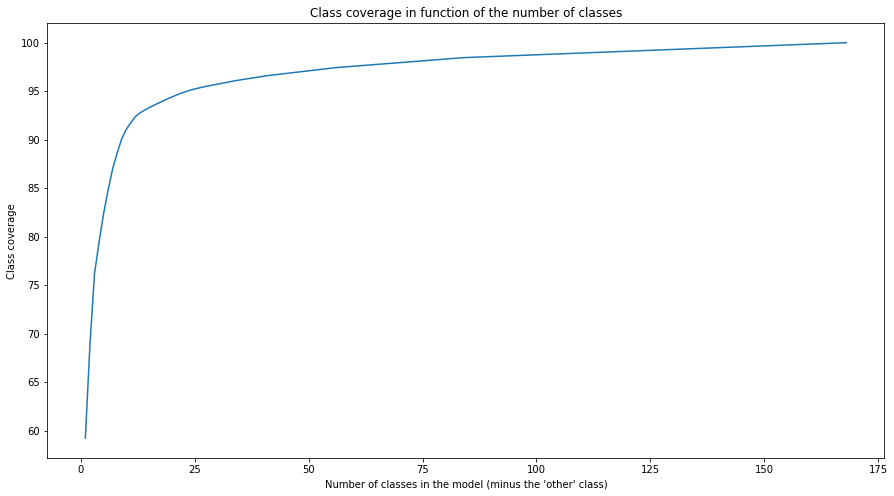

In [660]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_class_coverage) + 1), list_of_class_coverage)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Class coverage")
plt.title("Class coverage in function of the number of classes")
plt.show()

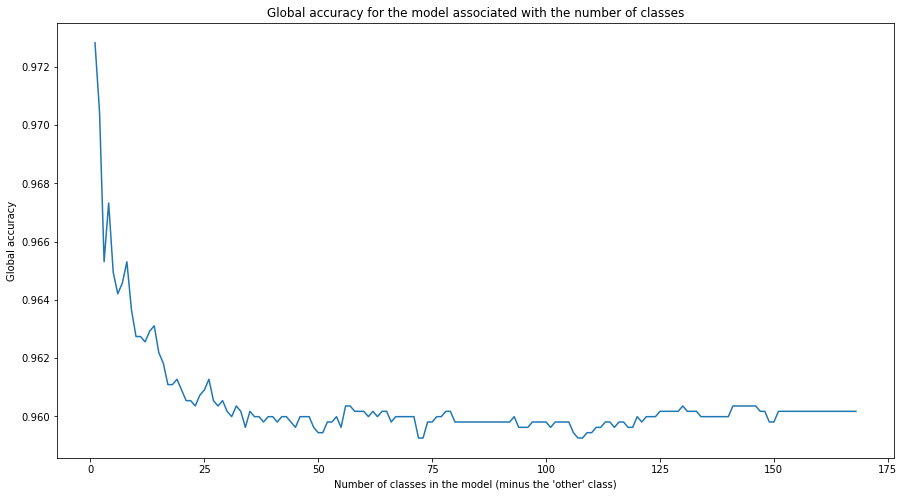

In [661]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_accuracies) + 1), list_of_accuracies)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Global accuracy")
plt.title("Global accuracy for the model associated with the number of classes")
plt.show()

In [669]:
from sklearn.metrics import confusion_matrix
import math
list_of_mean_accuracies = []

for index in range(len(list_of_ground_truths)):
    ground_truth = list_of_ground_truths[index]
    predictions = list_of_predictions[index]
    
    CM = confusion_matrix(ground_truth, predictions)
    mean_accuracy = 0 
    pctage_of_not_predicted_classes = 0
    for class_index in range(CM.shape[0]):
        if(CM.sum(axis=0)[class_index] == 0):
            pctage_of_not_predicted_classes += 1 / len(list_of_ground_truths)
            #print("WARNING : class number " + str(class_index) + " from model with " + str(class_index + 1) +" classes does not have any prediction.")
        else:
            mean_accuracy += (100 * CM.diagonal()[class_index] / CM.sum(axis=0)[class_index]) / CM.shape[0]
        
    print("Percentage of classes that do not had any predicted value (model with " + str(class_index + 1) + " classes) : " + str(100 * pctage_of_not_predicted_classes))
    list_of_mean_accuracies.append(mean_accuracy)

Percentage of classes that do not had any predicted value (model with 2 classes) : 0
Percentage of classes that do not had any predicted value (model with 3 classes) : 0
Percentage of classes that do not had any predicted value (model with 4 classes) : 0
Percentage of classes that do not had any predicted value (model with 5 classes) : 0
Percentage of classes that do not had any predicted value (model with 6 classes) : 0
Percentage of classes that do not had any predicted value (model with 7 classes) : 0
Percentage of classes that do not had any predicted value (model with 8 classes) : 0
Percentage of classes that do not had any predicted value (model with 9 classes) : 0
Percentage of classes that do not had any predicted value (model with 10 classes) : 0
Percentage of classes that do not had any predicted value (model with 11 classes) : 0
Percentage of classes that do not had any predicted value (model with 12 classes) : 0
Percentage of classes that do not had any predicted value (mod

Percentage of classes that do not had any predicted value (model with 99 classes) : 4.761904761904762
Percentage of classes that do not had any predicted value (model with 100 classes) : 5.357142857142857
Percentage of classes that do not had any predicted value (model with 101 classes) : 5.357142857142857
Percentage of classes that do not had any predicted value (model with 102 classes) : 5.952380952380952
Percentage of classes that do not had any predicted value (model with 103 classes) : 6.547619047619047
Percentage of classes that do not had any predicted value (model with 104 classes) : 6.547619047619047
Percentage of classes that do not had any predicted value (model with 105 classes) : 6.547619047619047
Percentage of classes that do not had any predicted value (model with 106 classes) : 6.547619047619047
Percentage of classes that do not had any predicted value (model with 107 classes) : 7.142857142857142
Percentage of classes that do not had any predicted value (model with 108 

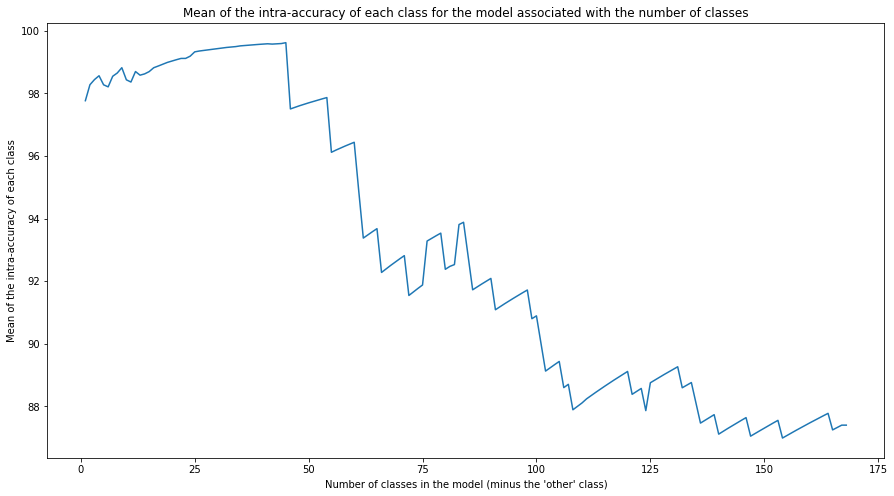

In [672]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_mean_accuracies) + 1), list_of_mean_accuracies)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Mean of the intra-accuracy of each class")
plt.title("Mean of the intra-accuracy of each class for the model associated with the number of classes")
plt.show()
print("WARNING : When a class does not have any predicted value, its accuracy is set to 0 ! This explains why we have a big decrease of accuracy starting from ~45 classes (for the last model, we have 12.5% of classes that do not have any predicted value, and the mean accuracy is still above 85%)")

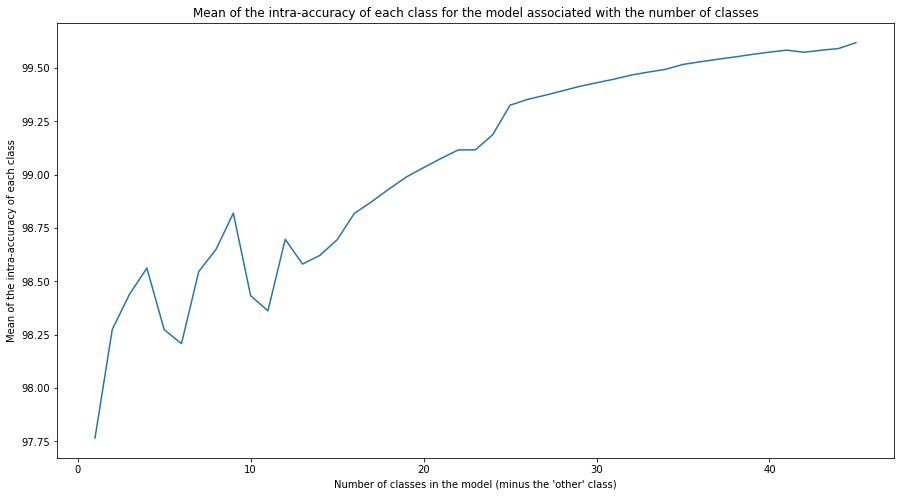

In [673]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_mean_accuracies[:45]) + 1), list_of_mean_accuracies[:45])
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Mean of the intra-accuracy of each class")
plt.title("Mean of the intra-accuracy of each class for the model associated with the number of classes")
plt.show()

### 2.2. Modelization without the article class, with different number of classes 

In [678]:
list_of_class_coverage = []
list_of_accuracies = []
list_of_predictions = []
list_of_ground_truths = []

In [681]:
training_set_without_article_class = []
outputs_without_article_class = []

for index in range(len(outputs)):
    if outputs[index] != "article":
        outputs_without_article_class.append(outputs[index])
        training_set_without_article_class.append(training_set[index, :])

training_set_without_article_class = np.array(training_set_without_article_class)
        
print(training_set_without_article_class.shape)
print(len(outputs_without_article_class))

distinct_outputs = []

for output in outputs_without_article_class:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        

from IPython.display import clear_output

for number_of_class in range(1, len(distinct_outputs) + 1):
    classes = {x:outputs_without_article_class.count(x) for x in outputs_without_article_class}
    sorted_classes = sorted(classes, key=classes.get, reverse=True)
    model_classes = sorted_classes[:number_of_class]
    
    model_outputs = []
    
    number_of_covered_outputs_by_model_classes = 0
    
    for output in outputs_without_article_class:
        if output in model_classes:
            model_outputs.append(output)
            number_of_covered_outputs_by_model_classes += 1
        else:
            model_outputs.append('other')
        
    model = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
    model.fit(training_set_without_article_class, model_outputs)
    
    list_of_ground_truths.append(model_outputs)
    list_of_class_coverage.append(100 * number_of_covered_outputs_by_model_classes / training_set_without_article_class.shape[0])
    list_of_accuracies.append(model.score(training_set_without_article_class, model_outputs))
    list_of_predictions.append(model.predict(training_set_without_article_class))
        
    clear_output(wait=True)
    print(str(number_of_class) + " / " + str(len(distinct_outputs)))

167 / 167


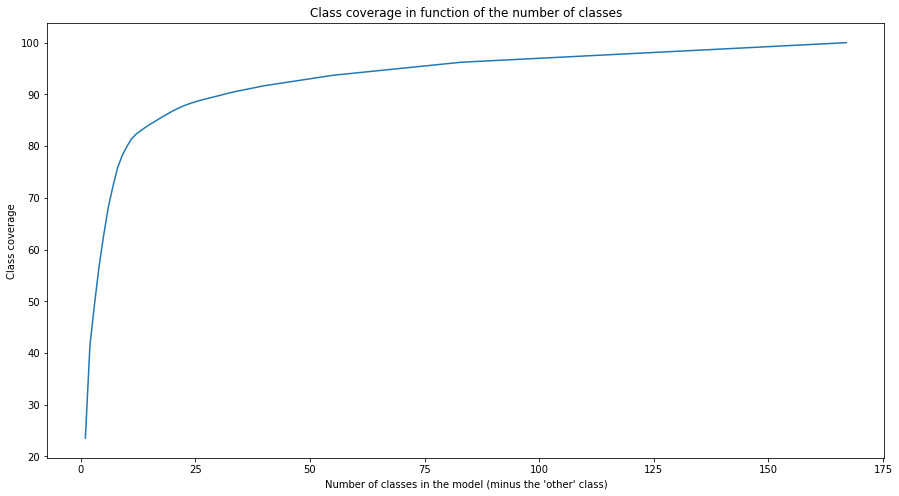

In [682]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_class_coverage) + 1), list_of_class_coverage)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Class coverage")
plt.title("Class coverage in function of the number of classes")
plt.show()

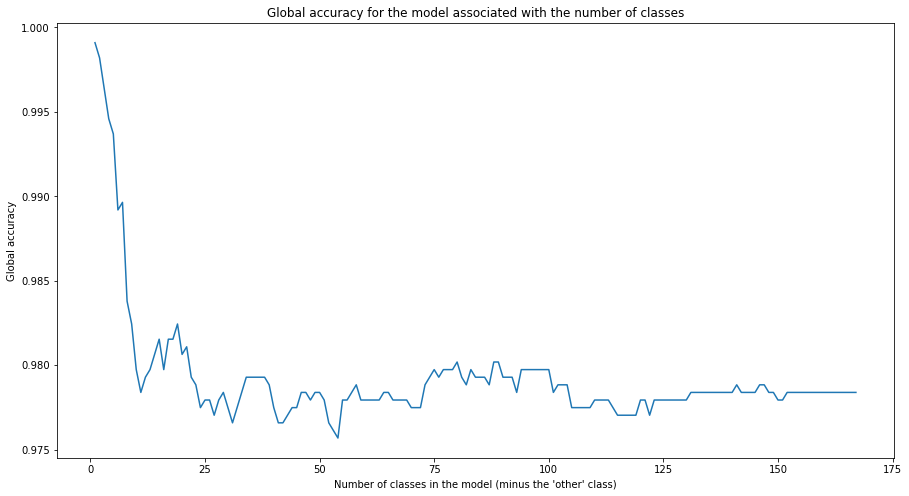

In [688]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_accuracies) + 1), list_of_accuracies)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Global accuracy")
plt.title("Global accuracy for the model associated with the number of classes")
plt.show()

In [683]:
from sklearn.metrics import confusion_matrix
import math
list_of_mean_accuracies = []

for index in range(len(list_of_ground_truths)):
    ground_truth = list_of_ground_truths[index]
    predictions = list_of_predictions[index]
    
    CM = confusion_matrix(ground_truth, predictions)
    mean_accuracy = 0 
    pctage_of_not_predicted_classes = 0
    for class_index in range(CM.shape[0]):
        if(CM.sum(axis=0)[class_index] == 0):
            pctage_of_not_predicted_classes += 1 / len(list_of_ground_truths)
            #print("WARNING : class number " + str(class_index) + " from model with " + str(class_index + 1) +" classes does not have any prediction.")
        else:
            mean_accuracy += (100 * CM.diagonal()[class_index] / CM.sum(axis=0)[class_index]) / CM.shape[0]
        
    print("Percentage of classes that do not had any predicted value (model with " + str(class_index + 1) + " classes) : " + str(100 * pctage_of_not_predicted_classes))
    list_of_mean_accuracies.append(mean_accuracy)

Percentage of classes that do not had any predicted value (model with 2 classes) : 0
Percentage of classes that do not had any predicted value (model with 3 classes) : 0
Percentage of classes that do not had any predicted value (model with 4 classes) : 0
Percentage of classes that do not had any predicted value (model with 5 classes) : 0
Percentage of classes that do not had any predicted value (model with 6 classes) : 0
Percentage of classes that do not had any predicted value (model with 7 classes) : 0
Percentage of classes that do not had any predicted value (model with 8 classes) : 0
Percentage of classes that do not had any predicted value (model with 9 classes) : 0
Percentage of classes that do not had any predicted value (model with 10 classes) : 0
Percentage of classes that do not had any predicted value (model with 11 classes) : 0
Percentage of classes that do not had any predicted value (model with 12 classes) : 0
Percentage of classes that do not had any predicted value (mod

Percentage of classes that do not had any predicted value (model with 103 classes) : 1.1976047904191618
Percentage of classes that do not had any predicted value (model with 104 classes) : 1.1976047904191618
Percentage of classes that do not had any predicted value (model with 105 classes) : 1.1976047904191618
Percentage of classes that do not had any predicted value (model with 106 classes) : 1.796407185628743
Percentage of classes that do not had any predicted value (model with 107 classes) : 1.796407185628743
Percentage of classes that do not had any predicted value (model with 108 classes) : 1.796407185628743
Percentage of classes that do not had any predicted value (model with 109 classes) : 1.796407185628743
Percentage of classes that do not had any predicted value (model with 110 classes) : 1.796407185628743
Percentage of classes that do not had any predicted value (model with 111 classes) : 1.1976047904191618
Percentage of classes that do not had any predicted value (model with

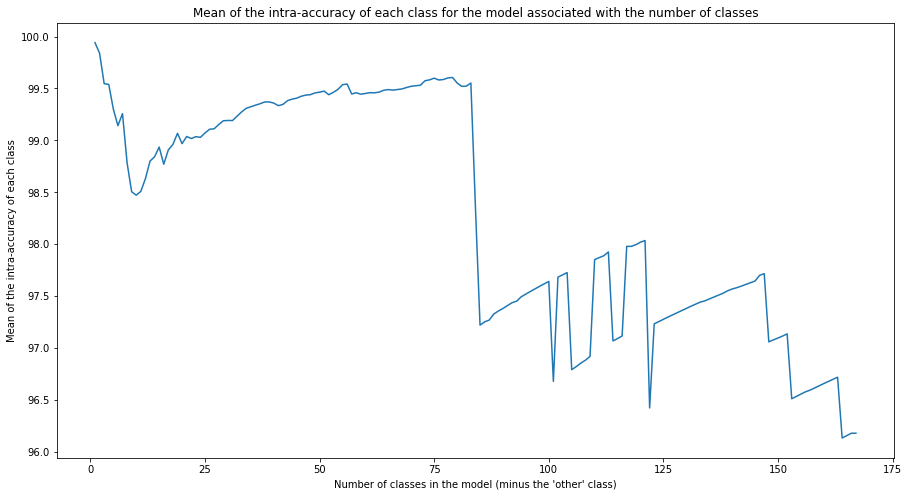

In [684]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_mean_accuracies) + 1), list_of_mean_accuracies)
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Mean of the intra-accuracy of each class")
plt.title("Mean of the intra-accuracy of each class for the model associated with the number of classes")
plt.show()
print("WARNING : When a class does not have any predicted value, its accuracy is set to 0 ! This explains why we have a big decrease of accuracy starting from ~45 classes (for the last model, we have 12.5% of classes that do not have any predicted value, and the mean accuracy is still above 85%)")

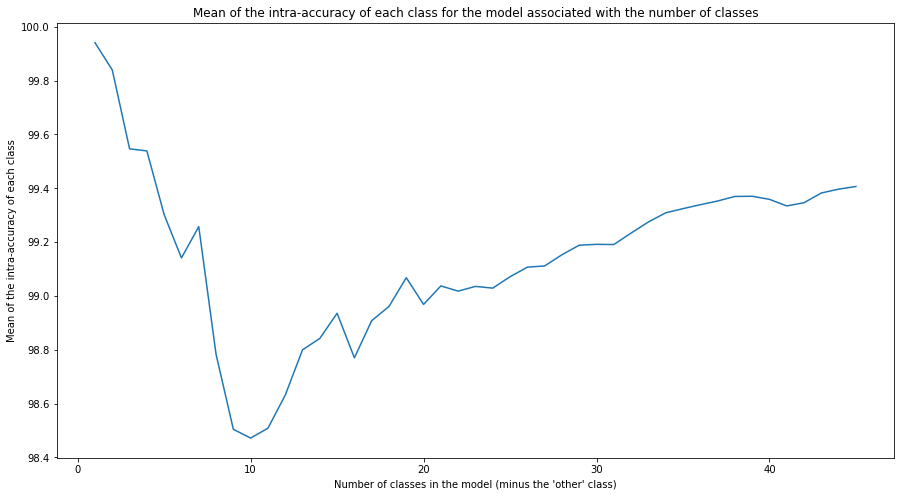

In [685]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(list_of_mean_accuracies[:45]) + 1), list_of_mean_accuracies[:45])
plt.xlabel("Number of classes in the model (minus the \'other\' class)")
plt.ylabel("Mean of the intra-accuracy of each class")
plt.title("Mean of the intra-accuracy of each class for the model associated with the number of classes")
plt.show()

## WARNING : The font type actually makes the model worst !

## Update : Not significant anymore after the pre-process of font type

# Notes and previous work

In [103]:
print(training_set.shape)
print(outputs.shape)

(2221, 4)
(2221,)


In [104]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_vSVM = SVC(gamma='auto')
model_vSVM.fit(training_set, outputs)

print(model_vSVM.score(training_set, outputs))

0.8788833858622243


In [105]:
from sklearn.ensemble import RandomForestClassifier

model_vRF = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
model_vRF.fit(training_set, outputs)

print(model_vRF.score(training_set, outputs))

0.9113012156686178


In [108]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for SVM model : ")
CM_SVM = confusion_matrix(outputs, model_vSVM.predict(training_set))
print(CM_SVM)
print("\n Accuracy per class for SVM model : ")
for k in range(training_set.shape[0] - 1):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_SVM.diagonal()[k] / CM_SVM.sum(axis=0)[k]) + " %")
    #print("\t Precision for class " + str(k + 1) + " : " + str(100 * CM_SVM.diagonal()[k] / (CM_SVM.diagonal()[k] + CM_SVM.sum(axis=1)[k])) + " %") # Revoir la formule, en particulier concernant la somme qui inclut les TP au calcul des FP 

CM_RF = confusion_matrix(outputs, model_vRF.predict(training_set))
print("\nConfusion matrix for random forest model : ")
print(CM_RF)
print("\n Accuracy per class for RF model : ")
for k in range(training_set.shape[0] - 1):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")
    #print("\t Precision for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / (CM_RF.diagonal()[k] + CM_RF.sum(axis=1)[k])) + " %")
    
    # On peut observer les classes qui sont "proches" en observant des rectangles dans la patrice de confusion : soient k et l deux entiers, indices des classes susceptibles d'être proches. Si c'est le cas, alors on peut observer CM[l,k] != 0, CM[k, l] != 0 (forme un rectangle avec des erreurs de prédiction majoritaires entre les 2 classes k et l) 

Confusion matrix for SVM model : 
[[ 87   0   0 ...   0   0   0]
 [  0 510   0 ...   0   0   0]
 [  0   8   5 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   5   0]
 [  0   1   0 ...   0   0   2]]

 Accuracy per class for SVM model : 
	 Accuracy for class 1 : 97.75280898876404 %
	 Accuracy for class 2 : 84.57711442786069 %
	 Accuracy for class 3 : 55.55555555555556 %
	 Accuracy for class 4 : nan %
	 Accuracy for class 5 : nan %
	 Accuracy for class 6 : nan %
	 Accuracy for class 7 : 77.77777777777777 %
	 Accuracy for class 8 : nan %
	 Accuracy for class 9 : 100.0 %
	 Accuracy for class 10 : nan %
	 Accuracy for class 11 : 100.0 %
	 Accuracy for class 12 : 100.0 %
	 Accuracy for class 13 : 100.0 %
	 Accuracy for class 14 : 97.41379310344827 %
	 Accuracy for class 15 : 100.0 %
	 Accuracy for class 16 : 100.0 %
	 Accuracy for class 17 : 100.0 %
	 Accuracy for class 18 : 100.0 %
	 Accuracy for class 19 : 100.0 %
	 Accuracy for class 20 : nan %
	 Accuracy for cl

<ipython-input-108-081bfc266fb4>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_SVM.diagonal()[k] / CM_SVM.sum(axis=0)[k]) + " %")


IndexError: index 170 is out of bounds for axis 0 with size 170

In [119]:
import sklearn
sklearn.tree.export_graphviz(model_vRF.estimators_[0], out_file="tree.dot")
print(len(model_vRF.estimators_))

100


 Voir ce que ça donne au niveau de la répartition des classes, matrice de confusion, essayer avec plus de classes, ...

 Plus : méthodes de classification en extreme-classification, moyenne "intra et inter-classe", impact du nombre de documents sur la qualité de la prédiction, impact de l'ajout de features

 Lire : extreme-classification (voir si adapté à ce qu'on cherche ou si pas encore assez de classe), si non, quelles techniques pour quelques dizaines de classes par rapports aux techniques "standards" 
 
 
# Après le 17.10
 
 ATTENTION : Actuellement le modèle ne classifie que les top K classes, "article" exclu. Mais implique qu'il n'y a pas de k+1 eme classe "autre" pour mettre le reste. Est-ce que cela devrait être le cas en pratique ? Car en réalité, on ne peut pas savoir à l'avance sur l'article PDF que l'on va présenter au modèle est dans les k classes ou non ...
 
 Pour les variables : position du numéro de page (notamment en termes de marge en bas, mais comment réussir à les identifier car correspond toujours à une ligne : peut-être dernier paragraphe ?), interligne (attention, taille de la police à prendre en compte pour avoir une donnée fiable), marge en haut à chaque début de page hors première page (en réalité pas que pour la première page, mais en fonctionnant par cas majoritaire on doit normalement retrouver les pages qui commencent par du texte en tête : calculé). Après essai, interligne semble difficilement fiable (peut-être que mon calcul est incorrect, mais varie beaucoup alors que visuellement constant dans un paragraphe, à réessayer)
 
 Concernant l'extreme classification (XC) : dans les articles que j'ai pu lire, correspond vraiment à un très grand nombre de classes (de plusieurs centaines à plusieurs millions) : peut-être un peu trop pour notre cas d'étude. Beaucoup de cas de NN pour un nombre "intermédiaire".
 
 
 Features : lignes d'en-tête. Plus élaboré : utiliser Grobid par exemple.
 
 Identifier le nombre de colonnes dans un article (regarder si on a une marge gauche des lignes de texte qui forme 2 ou + classes majoritaires, ou taille majoritaire des lignes VS taille de page (en ratio))
 
 Faire les calculs precision recall et F1. Influence du nombre de classes également. 
 
 
 Prendre des "vrais" articles publiés de SciHub et tester les modèles avec ceux-ci.

In [500]:
print(TS)
print(TS.shape)

[['49.0' '30.6' '10.0' '167.0' 'nimbusromno9l']
 ['134.8' '119.0' '10.0' '150.0' 'times']
 ['312.0' '59.5' '10.0' '110.0' 'nimbusromno9l']
 ...
 ['90.7' '62.5' '10.0' '229.0' 'lmroman10']
 ['90.7' '63.0' '10.0' '182.0' 'lmroman10']
 ['72.0' '64.7' '10.9' '280.0' 'nimbusromno9l']]
(2221, 5)


In [475]:
out = ['IEEEtran', 'llncs', 'IEEEtran', 'IEEEtran', 'tlp', 'acmtrans2m', 'llncs', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'ws', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'amsproc', 'siamltex', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'siamltex', 'revtex4', 'report', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'fundam', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'report', 'revtex4', 'eptcs', 'eptcs', 'LMCS', 'llncs', 'stacs', 'llncs', 'LMCS', 'revtex4', 'amsart', 'amsart', 'IEEEtran', 'scrartcl', 'llncs', 'acmsmall', 'acmsmall', 'sig', 'elsarticle', 'eptcs', 'eptcs', 'eptcs', 'ics', 'revtex4', 'elsarticle', 'siamltex', 'llncs', 'amsart', 'llncs', 'elsart1p', 'revtex4', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'stacs', 'stacs', 'stacs', 'llncs', 'epl2', 'llncs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'amsart', 'stacs', 'mscs', 'llncs', 'stacs', 'stacs', 'sig', 'llncs', 'stacs', 'stacs', 'scrartcl', 'amsart', 'elsarticle', 'llncs', 'amsart', 'llncs', 'aamas2010_cameraReady', 'llncs', 'elsarticle', 'report', 'ws', 'imsart', 'IEEEtran', 'acmtrans2m', 'llncs', 'llncs', 'acm_proc_article', 'llncs', 'amsart', 'llncs', 'amsart', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'amsart', 'elsarticle', 'IEEEtran', 'elsarticle', 'amsart', 'llncs', 'arxiv', 'llncs', 'cc', 'amsart', 'llncs', 'revtex4', 'eptcs', 'eptcs', 'eptcs', 'lmcs', 'report', 'iopart', 'acmart', 'revtex4', 'elsart1p', 'llncs', 'amsart', 'llncs', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'llncs', 'llncs', 'IEEEtran', 'IOS', 'llncs', 'revtex4', 'IEEEtran', 'revtex4', 'llncs', 'elsarticle', 'IEEEfocs', 'Mytran', 'llncs', 'llncs', 'amsart', 'llncs', 'elsarticle', 'llncs', 'acmtrans2m', 'comsoc2010', 'comsoc2010', 'elsarticle', 'LMCS', 'cc', 'eptcs', 'eptcs', 'svjour3', 'scrartcl', 'llncs', 'llncs', 'revtex4', 'elsarticle', 'llncs', 'LMCS', 'revtex4', 'beatcs', 'llncs', 'baposter', 'llncs', 'llncs', 'endm', 'llncs', 'elsart', 'scrartcl', 'elsarticle', 'llncs', 'acmsmall', 'revtex4', 'IEEEtran', 'amsart', 'amsart', 'eptcs', 'iopart', 'llncs', 'amsart', 'sig', 'amsart', 'amsart', 'amsart', 'amsart', 'llncs', 'llncs', 'amsart', 'paper', 'revtex4', 'jac', 'llncs', 'jac', 'jac', 'jac', 'amsart', 'elsarticle', 'llncs', 'elsarticle', 'book', 'amsart', 'llncs', 'eptcs', 'llncs', 'amsart', 'llncs', 'elsarticle', 'llncs', 'eptcs', 'elsarticle', 'amsart', 'report', 'llncs', 'llncs', 'llncs', 'elsarticle', 'llncs', 'llncs', 'llncs', 'LMCS', 'llncs', 'llncs', 'iopart', 'elsart', 'IEEEtran', 'llncs', 'eptcs', 'llncs', 'revtex4', 'llncs', 'ijuc', 'llncs', 'book', 'llncs', 'llncs', 'elsarticle', 'revtex4', 'sig', 'eptcs', 'llncs', 'revtex4', 'LMCS', 'LMCS', 'elsarticle', 'birkjour', 'scrartcl', 'scrartcl', 'llncs', 'revtex4', 'amsart', 'elsarticle', 'llncs', 'elsarticle', 'llncs', 'svjour3', 'scrartcl', 'iopart', 'elsarticlesilent', 'elsart', 'elsart', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'amsart', 'amsart', 'llncs', 'amsart', 'eptcs', 'eptcs', 'elsarticle', 'llncs', 'elsarticle', 'preprint', 'llncs', 'apa', 'elsarticle', 'mylipics', 'llncs', 'llncs', 'amsart', 'LMCS', 'llncs', 'LMCS', 'IEEEtran', 'myclass', 'llncs', 'amsart', 'IEEEtran', 'siamltex', 'IEEEtran', 'memoir', 'llncs', 'revtex4', 'scrbook', 'amsart', 'llncs', 'llncs', 'eptcs', 'eptcs', 'svjour3', 'llncs', 'IEEEtran', 'elsarticle', 'acmsmall', 'llncs', 'revtex4', 'LMCS', 'elsarticle', 'revtex4', 'csreport', 'revtex4', 'amsart', 'revtex4', 'amsart', 'ieeeconf', 'llncs', 'LMCS', 'amsart', 'llncs', 'amsart', 'llncs', 'revtex4', 'llncs', 'extarticle', 'amsart', 'scrartcl', 'amsart', 'scrartcl', 'llncs', 'elsarticle', 'jpsj3', 'amsart', 'elsarticle', 'llncs', 'amsart', 'lipics', 'amsart', 'siamltex', 'ieeeconf', 'amsart', 'llncs', 'llncs', 'amsart', 'acm_proc_article', 'llncs', 'llncs', 'amsart', 'llncs', 'leapaper', 'amsart', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'llncs', 'amsbook', 'eptcs', 'eptcs', 'eptcs', 'elsarticle', 'revtex4', 'IEEEtran', 'llncs', 'book', 'llncs', 'extarticle', 'amsart', 'elsarticle', 'amsart', 'amsart', 'scrartcl', 'sig', 'sig', 'LMCS', 'amsart', 'sig', 'amsart', 'IEEETran', 'amsart', 'siamltex', 'elsarticle', 'llncs', 'asl', 'preprint', 'llncs', 'llncs', 'amsproc', 'llncs', 'nj_style', 'amsart', 'amsart', 'amsart', 'llncs', 'scrartcl', 'llncs', 'llncs', 'book', 'elsart', 'eptcs', 'llncs', 'acmsmall', 'llncs', 'amsart', 'amsart', 'aiml12', 'llncs', 'acm_proc_article', 'IEEEtran', 'llncs', 'llncs', 'LMCS', 'LMCS', 'collective', 'llncs', 'IEEEtran', 'llncs', 'amsart', 'scrartcl', 'sig', 'siamart0216', 'llncs', 'llncs', 'svjour3', 'LMCS', 'acmsmall', 'LMCS', 'llncs', 'llncs', 'amsart', 'amsart', 'IEEEtran', 'amsart', 'amsproc', 'elsarticle', 'llncs', 'amsart', 'scrartcl', 'llncs', 'llncs', 'scrbook', 'elsarticlesilent', 'amsart', 'svjour3_arxiv', 'LMCS', 'LMCS', 'IEEEtran', 'sig', 'lipics', 'lipics', 'Myelsarticle', 'beamer', 'llncs', 'lipics', 'siamltex', 'llncs', 'LMCS', 'elsart', 'siamltex', 'svjour3', 'eptcs', 'toc', 'amsart', 'mylipics', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'amsart', 'amsart', 'llncs', 'scrartcl', 'amsart', 'sig', 'amsproc', 'amsart', 'llncs', 'svmult', 'amsart', 'scrartcl', 'mscs', 'lmcs', 'scrartcl', 'llncs', 'LMCS', 'revtex4', 'llncs', 'LMCS', 'elsarticle', 'eptcs', 'eptcs', 'ws', 'LMCS', 'ijuc', 'llncs', 'amsart', 'memoir', 'easychair', 'elsarticle', 'book', 'ieeeconf', 'sig', 'siamltex', 'llncs', 'PisaPhdThesis_LaTeX', 'amsart', 'llncs', 'IEEEtran', 'amsart', 'amsart', 'llncs', 'amsart', 'amsart', 'acmsmall', 'lms', 'llncs', 'revtex4', 'llncs', 'eptcs', 'amsart', 'IEEEtran', 'tlp', 'cc', 'llncs', 'LMCS', 'amsart', 'svjour3', 'llncs', 'imsart_modified', 'paper', 'elsarticle', 'llncs', 'llncs', 'elsart', 'lipics', 'amsart', 'elsarticle', 'llncs', 'amsart', 'iopart', 'amsart', 'scrartcl', 'scrartcl', 'elsarticle', 'llncs', 'LMCS', 'amsart', 'elsarticle', 'amsart', 'ws', 'eptcs', 'llncs', 'elsarticle', 'amsart', 'revtex4', 'jgaa', 'llncs', 'llncs', 'eptcs', 'scrartcl', 'amsart', 'acmsmall', 'sig', 'amsart', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'eptcs', 'elsarticle', 'amsart', 'amsart', 'elsarticle', 'imsart', 'amsproc', 'achemso', 'beatcs', 'ws', 'elsarticle', 'lipics', 'elsarticle', 'lipics', 'amsart', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'svjour3', 'amsart', 'amsart', 'scrartcl', 'llncs', 'amsart', 'amsart', 'elsarticle', 'llncs', 'llncs', 'llncs', 'svjour3', 'lipics', 'amsart', 'amsart', 'amsart', 'llncs', 'amsart', 'now', 'revtex4', 'autart', 'amsart', 'llncs', 'elsarticle', 'revtex4', 'report', 'scrartcl', 'amsart', 'llncs', 'llncs', 'elsarticle', 'llncs', 'amsart', 'amsart', 'birkjour', 'LMCS', 'acmsmall', 'eptcs', 'eptcs', 'llncs', 'llncs', 'LMCS', 'svjour', 'easychair', 'elsarticle', 'svjour3', 'elsarticle', 'acmsmall', 'amsart', 'amsart', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'toc', 'amsart', 'elsarticle', 'amsart', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'sig', 'llncs', 'siamart0516', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'eptcs', 'eptcs', 'easychair', 'llncs', 'amsart', 'huber_article', 'siamltex', 'llncs', 'amsart', 'llncs', 'eptcs', 'llncs', 'elsarticle', 'revtex4', 'amsart', 'iopart', 'llncs', 'elsarticle', 'elsarticle', 'elsarticle', 'llncs', 'amsart', 'ecoc02', 'amsart', 'llncs', 'llncs', 'CSML', 'llncs', 'amsart', 'llncs', 'report', 'llncs', 'elsart', 'LMCS', 'jams', 'IEEEtran', 'amsart', 'llncs', 'llncs', 'amsart', 'amsart', 'llncs', 'revtex4', 'sig', 'amsart', 'llncs', 'elsarticle', 'lipics', 'amsart', 'amsart', 'svmult', 'amsart', 'amsart', 'llncs', 'elsarticle', 'eptcs', 'birkjour', 'IEEEtran', 'amsart', 'imsart', 'llncs', 'IEEEtran', 'iopart', 'sig', 'IEEEtran', 'scrartcl', 'llncs', 'LMCS', 'amsart', 'extarticle', 'amsart', 'llncs', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'llncs', 'llncs', 'llncs', 'llncs', 'llncs', 'IEEEtran', 'elsarticle', 'amsart', 'aastex', 'revtex4', 'elsarticle', 'LMCS', 'llncs', 'llncs', 'llncs', 'amsart', 'revtex4', 'elsarticle', 'acmtrans2m', 'amsart', 'llncs', 'llncs', 'ieeeconf', 'iopart', 'amsart', 'amsart', 'llncs', 'llncs', 'standalone', 'eptcs', 'llncs', 'llncs', 'amsart', 'acmart', 'eptcs', 'paper', 'elsarticle', 'elsarticle', 'llncs', 'llncs', 'llncs', 'svjour3', 'llncs', 'llncs', 'aomart', 'llncs', 'llncs', 'llncs', 'icmart', 'svjour3', 'svjour3', 'llncs', 'llncs', 'llncs', 'llncs', 'llncs', 'revtex4', 'scrartcl', 'now', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'scrartcl', 'llncs', 'llncs', 'amsart', 'llncs', 'llncs', 'IEEEtran', 'svjour3', 'llncs', 'IEEEtran', 'llncs', 'LMCS', 'llncs', 'IEEEtran', 'scrartcl', 'eptcs', 'amsart', 'elsarticle', 'amsart', 'eptcs', 'CSML', 'elsarticle', 'siamltex1213', 'LMCS', 'sig', 'amsart', 'lmcs', 'llncs', 'llncs', 'lipics', 'llncs', 'llncs', 'elsarticle', 'llncs', 'acmsmallcustom', 'IEEEtran', 'elsarticle', 'elsarticle', 'llncs', 'llncs', 'elsarticle', 'icmart', 'scrartcl', 'amsart', 'llncs', 'elsarticle', 'IEEEtran', 'amsart', 'timgad', 'revtex4', 'amsart', 'lipics', 'Thesis', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'IEEEtran', 'amsart', 'llncs_dagger', 'llncs', 'revtex4', 'elsarticle', 'elsarticle', 'scrartcl', 'amsart', 'amsart', 'amsart', 'amsart', 'llncs', 'apa', 'llncs', 'amsart', 'scrartcl', 'acmsmallanon', 'aomart', 'llncs', 'llncs', 'llncs', 'elsarticle', 'llncs', 'LMCS', 'llncs', 'svjour2', 'siamltex', 'llncs', 'llncs', 'llncs', 'amsart', 'amsart', 'ws', 'elsarticle', 'amsart', 'IEEEtran', 'amsart', 'IEEEtran', 'amsart', 'llncs', 'IEEEtran', 'llncs', 'revtex4', 'lipics', 'sigplanconf', 'svjour3', 'lipics', 'huber_article', 'nictatechreport', 'llncs', 'lipics', 'elsarticle', 'ec', 'revtex4', 'scrartcl', 'amsart', 'sig', 'revtex4', 'llncs', 'elsarticle', 'LMCS', 'llncs', 'IEEEtran', 'amsart', 'dmtcs', 'IEEEtran', 'amsart', 'elsarticle', 'amsart', 'llncs', 'amsart', 'revtex4', 'IEEEtran', 'jicspack', 'jicspack', 'amsart', 'easychair', 'IEEEtran', 'llncs', 'IEEEtran', 'elsarticle', 'IEEEtran', 'acm_proc_article', 'revtex4', 'llncs', 'elsarticle', 'llncs', 'revtex4', 'mcom', 'llncs', 'llncs', 'amsart', 'svjour3', 'amsart', 'llncs', 'revtex4', 'llncs', 'llncs', 'llncs', 'scrartcl', 'lipics', 'siamart0516', 'sig', 'amsart', 'amsart', 'llncs', 'llncs', 'llncs', 'IEEEtran', 'llncs', 'scrartcl', 'svjour3', 'llncs', 'llncs', 'scrartcl', 'amsart', 'llncs', 'lipics', 'scrartcl', 'elsarticle', 'IEEEtran', 'eptcs', 'amsart', 'paper', 'llncs', 'llncs', 'amsart', 'llncs', 'IEEEtran', 'llncs', 'IEEEtran', 'llncs', 'amsart', 'revtex4', 'llncs', 'minimal', 'elsarticle', 'CSML', 'fundam', 'IEEEtran', 'amsart', 'cc', 'amsart', 'llncs', 'amsart', 'llncs', 'llncs', 'amsart', 'llncs', 'revtex4', 'beatcs', 'amsart', 'llncs', 'llncs', 'amsart', 'llncs', 'amsart', 'llncs', 'llncs', 'llncs', 'revtex4', 'llncs', 'IEEEtran', 'llncs', 'llncs', 'elsarticle', 'llncs', 'revtex4', 'acmsmall_TR150505', 'quantumarticle', 'amsart', 'huber_article', 'amsart', 'llncs', 'irmaart', 'svjour3', 'amsart', 'amsart', 'cc', 'amsart', 'sig', 'llncs', 'elsarticle', 'llncs', 'llncs', 'acmsmall', 'lmcs', 'llncs', 'elsarticle', 'tac', 'scrartcl', 'elsarticle', 'elsarticle', 'book', 'llncs', 'lipics', 'elsarticle', 'lipics', 'llncs', 'amsart', 'amsart', 'amsart', 'llncs', 'amsart', 'iopart', 'PrincetonThesis', 'elsarticle', 'CSML', 'amsart', 'paper', 'llncs', 'llncs', 'llncs', 'elsarticle', 'entcs', 'IEEEtran', 'amsart', 'elsarticle', 'amsart', 'lipics', 'llncs', 'scrartcl', 'llncs', 'lipics', 'eptcs', 'lipics', 'lipics', 'lipics', 'revtex4', 'llncs', 'amsart', 'elsarticle', 'amsart', 'amsart', 'amsart', 'aptpub', 'revtex4', 'lipics', 'amsart', 'elsarticle', 'amsart', 'amsart', 'svjour3', 'lipics', 'IEEEtran', 'scrbook', 'revtex4', 'elsarticle', 'toc', 'svjour3', 'scrartcl', 'amsart', 'mdpi', 'siamart0516', 'revtex4', 'scrartcl', 'elsarticle', 'llncs', 'amsart', 'amsart', 'amsart', 'elsarticle', 'elsarticle', 'elsarticle', 'amsart', 'scrartcl', 'siamltex1213', 'lipics', 'amsart', 'amsart', 'revtex4', 'llncs', 'IEEEtran', 'revtex4', 'amsart', 'lipics', 'lipics', 'amsart', 'cambridge6A', 'amsart', 'revtex4', 'book', 'llncs', 'amsart', 'smfart', 'llncs', 'report', 'CSML', 'sigplanconf', 'imsart', 'lipics', 'llncs', 'lipics', 'elsarticle', 'revtex4', 'elsarticle', 'IEEEtran', 'amsart', 'toc', 'amsart', 'svmult', 'elsarticle', 'amsart', 'paper', 'amsart', 'elsarticle', 'amsart', 'llncs', 'acmart', 'amsart', 'amsart', 'amsart', 'llncs', 'llncs', 'revtex4', 'llncs', 'elsartNoFoot', 'llncs', 'amsart', 'llncs', 'revtex4', 'lipics', 'elsarticle', 'IEEEtran', 'llncs', 'lipics', 'llncs', 'llncs', 'amsart', 'revtex4', 'lipics', 'elsarticle', 'llncs', 'llncs', 'lipics', 'eptcs', 'elsarticle', 'lipics', 'eptcs', 'scrartcl', 'llncs', 'revtex4', 'llncs', 'amsart', 'elsarticle', 'revtex4', 'elsarticle', 'elsarticle', 'amsart', 'llncs', 'amsart', 'amsart', 'amsart', 'elsarticle', 'acmsmall', 'amsart', 'elsarticle', 'revtex4', 'icga', 'amsart', 'CSML', 'llncs', 'scrartcl', 'llncs', 'scrartcl', 'ETHpaper', 'CSML', 'lipics', 'scrartcl', 'CSML', 'llncs', 'llncs', 'llncs', 'scrartcl', 'llncs', 'sigplanconf', 'revtex4', 'lmcs', 'amsart', 'llncs', 'elsarticle', 'llncs', 'elsarticle', 'amsart', 'llncs', 'siamonline0316', 'lipics', 'llncs', 'amsart', 'lms_modified', 'llncs', 'amsart', 'IEEEtran', 'lipics', 'ReportTemplate', 'revtex4', 'lipics', 'scrartcl', 'amsart', 'quantumarticle', 'scrartcl', 'eptcs', 'eptcs', 'IEEEtran', 'elsarticle', 'amsart', 'quantumarticle', 'llncs', 'revtex4', 'llncs', 'elsarticle', 'report', 'revtex4', 'llncs', 'amsart', 'informs3', 'elsarticle', 'ocg', 'amsart', 'new_tlp', 'paper', 'comsoc2016', 'amsart', 'lipics', 'revtex4', 'revtex4', 'llncs', 'amsart', 'revtex4', 'llncs', 'amsart', 'amsart', 'amsart', 'revtex4', 'llncs', 'llncs', 'lipics', 'ieee', 'elsarticle', 'llncs', 'acmart', 'llncs', 'amsart', 'lipics', 'elsarticle', 'elsarticle', 'quantumarticle', 'llncs', 'IEEEtran', 'amsart', 'elsarticle', 'amsart', 'revtex4', 'revtex4', 'amsart', 'amsart', 'amsart', 'llncs', 'llncs', 'amsart', 'amsart', 'llncs', 'revtex4', 'amsart', 'amsart', 'llncs', 'amsproc', 'acmart', 'llncs', 'CSML', 'lipics', 'siamltex', 'scrartcl', 'llncs', 'report', 'IEEEtran', 'amsart', 'revtex4', 'amsart', 'amsart', 'mcom', 'llncs', 'book', 'scrartcl', 'elsarticle', 'CSML', 'llncs', 'report', 'revtex4', 'scrartcl', 'IEEEtran', 'revtex4', 'elsarticle', 'revtex4', 'sig', 'amsart', 'CSML', 'quantumarticle', 'llncs', 'llncs', 'CSML', 'eptcs', 'elsarticle', 'lipics', 'llncs', 'lmcs', 'elsarticle', 'llncs', 'scrartcl', 'amsart', 'IEEEtran', 'amsart', 'amsart', 'lipics', 'IEEEtran', 'llncs', 'IEEEtran', 'scrartcl', 'elsarticle', 'llncs', 'elsarticle', 'llncs', 'IEEEtran', 'beatcs', 'llncs', 'amsart', 'eptcs', 'IEEEtran', 'acmart', 'wlscirep', 'elsarticle', 'svproc', 'informs3', 'svjour3', 'amsart', 'lipics', 'scrartcl', 'llncs', 'llncs', 'revtex4', 'lipics2', 'lipics', 'llncs', 'scrartcl', 'aamas2017', 'revtex4', 'lmcs', 'elsarticle', 'revtex4', 'amsart', 'amsart', 'scrartcl', 'aamas2017', 'llncs', 'lmcs', 'lipics', 'acmart', 'siamart', 'eptcs', 'elsarticle', 'IEEEtranTCOM', 'eccc', 'llncs', 'llncs', 'revtex4', 'amsart', 'elsarticle', 'amsart', 'amsart', 'llncs', 'amsart', 'amsart', 'llncs', 'llncs', 'llncs', 'endm', 'revtex4', 'amsart', 'siamltex', 'amsart', 'elsarticle', 'quantumarticle', 'revtex4', 'amsart', 'lmcs', 'revtex4', 'llncs', 'amsart', 'llncs', 'lipics', 'eptcs', 'scrartcl', 'eptcs', 'llncs', 'gen', 'amsart', 'lipics', 'amsart', 'book', 'lipics', 'amsart', 'scrartcl', 'amsart', 'llncs', 'llncs', 'quantumarticle', 'memoir', 'amsart', 'informs3_arxiv', 'amsart', 'svjour2', 'easychair', 'iopart', 'amsart', 'elsarticle', 'llncs', 'endm', 'elsarticle', 'llncs', 'llncs', 'paper', 'PMS2016', 'svjour3', 'scrartcl', 'ro', 'amsart', 'llncs', 'amsart', 'amsart', 'llncs', 'scrartcl', 'llncs', 'llncs', 'lipics', 'siamart171218', 'dmtcs', 'llncs', 'llncs', 'llncs', 'revtex4', 'caltech_thesis', 'scrartcl', 'siamart', 'revtex4', 'svjour3', 'amsart', 'lipics', 'lipics', 'scrartcl', 'amsart', 'amsart', 'llncs', 'amsart', 'revtex4', 'revtex4', 'amsart', 'amsart', 'amsart', 'elsarticle', 'lipics', 'amsart', 'amsart', 'amsart', 'revtex4', 'amsart', 'llncs', 'elsarticle', 'amsart', 'amsart', 'llncs', 'amsart', 'llncs', 'llncs', 'svjour3', 'elsarticle', 'eptcs', 'paper', 'amsart', 'lipics', 'llncs', 'lipics', 'amsart', 'llncs', 'siamart190516', 'IEEEtran', 'llncs', 'scrartcl', 'amsart', 'siamart1116', 'revtex4', 'llncs', 'scrartcl', 'svjour3', 'svjour3', 'amsart', 'tac', 'amsart', 'elsarticle', 'daj', 'dmtcs', 'lipics', 'amsart', 'llncs', 'amsart', 'revtex4', 'endm', 'llncs', 'amsart', 'lipics_hacked', 'revtex4', 'svjour3', 'amsart', 'lmcs', 'lmcs', 'lipics', 'amsart', 'lmcs', 'elsarticle', 'llncs', 'elsarticle', 'amsart', 'siamltex', 'ReportTemplate', 'elsarticle', 'llncs', 'quantumarticle', 'lipics', 'scrartcl', 'revtex4', 'amsart', 'siamart1116', 'book', 'llncs', 'lipics', 'dmtcs', 'subfiles', 'svjour3', 'revtex4', 'llncs', 'lipics', 'llncs', 'lipics', 'lipics', 'amsart', 'amsart', 'IEEEtran', 'elsarticle', 'report', 'lipics', 'amsart', 'amsart', 'amsart', 'IEEEtran', 'amsart', 'IEEEtran', 'elsarticle', 'llncs', 'lipics', 'lmcs', 'revtex4', 'llncs', 'amsart', 'lmcs', 'lipicsplain', 'IEEEtran', 'svjour3', 'amsart', 'revtex4', 'scrartcl', './elsarticle', 'amsart', 'lipics', 'lipics', 'elsarticle', 'llncs', 'acmart', 'llncs', 'llncs', 'llncs', 'llncs', 'achemso', 'lipics', 'lipics', 'llncs', 'llncs', 'revtex4', 'amsart', 'scrartcl', 'llncs', 'amsart', 'lipics', 'colt2019_plain', 'acmart', 'llncs', 'amsart', 'amsart', 'llncs', 'amsart', 'llncs', 'elsarticlehack', 'amsart', 'lipics', 'revtex4', 'IEEEtran', 'article18', 'lmcs', 'elsarticle', 'llncs', 'lipics', 'scrartcl', 'lipics', 'lipics', 'llncs', 'revtex4', 'lipics', 'acmart', 'elsarticle', 'llncs', 'acmart', 'lipics', 'llncs', 'lipics', 'lipics', 'amsart', 'amsart', 'llncs', 'elsarticle', 'lipics', 'rstransa', 'svmult', 'llncs', 'lipics', 'colt2018', 'lipics', 'amsbook', 'svjour3hacked', 'amsart', 'revtex4', 'amsart', 'svjour3', 'llncs', 'lipics_hacked', 'toc', 'toc', 'revtex4', 'lmcs', 'toc', 'toc', 'puthesis', 'lipics', 'revtex4', 'amsart', 'elsarticle', 'lipics', 'elsarticle', 'revtex4', 'llncs', 'amsart', 'lipics', 'amsart', 'scrartcl', 'svjour3', 'elsarticlehack', 'revtex4', 'istulthesis', 'llncs', 'lipics', 'llncs', 'svjour3', 'scrartcl', 'lipics', 'lipics', 'amsart', 'IEEEtran', 'revtex4', 'elsarticle', 'eptcs', 'revtex4', 'amsart', 'elsarticle', 'elsarticle', 'llncs', 'amsart', 'amsart', 'svjour3', 'lipics', 'llncs', 'sagej', 'amsart', 'amsart', 'elsarticle', 'llncs', 'lipics', 'eptcs', 'eptcs', 'revtex4', 'arxivlipics', 'IEEEtran', 'svjour3', 'lipics', 'llncs', 'llncs', 'revtex4', 'acmart', 'llncs', 'llncs', 'siamart0516', 'siamart0516', 'IEEEtran', 'llncs', 'IEEEtran', 'scrartcl', 'llncs', 'lipics', 'scrartcl', 'scrartcl', 'amsart', 'llncs', 'amsart', 'lipics', 'amsart', 'llncs', 'revtex4', 'IEEEtran', 'scrartcl', 'snamsart', 'llncs', 'llncs', 'subfiles', 'scrartcl', 'llncs', 'amsart', 'IEEEtran', 'llncs', 'llncs', 'acmart', 'amsart', 'llncs', 'svjour3', 'llncs', 'llncs', 'scrartcl', 'lipics', 'revtex4', 'lipics', 'acmart', 'amsart', 'elsarticle', 'elsarticle', 'elsarticle', 'amsart', 'amsart', 'amsart', 'revtex4', 'llncs', 'llncs', 'tPRS2e', 'lipics', 'lipics', 'book', 'lipics', 'snamsart', 'birkau', 'amsart', 'lmcs', 'fundam', 'amsart', 'revtex4', 'acmart', 'lipics', 'amsart', 'lipics', 'elsart', 'colt2019', 'lipics', 'amsart', 'lipics', 'amsart', 'revtex4', 'quantumarticle', 'lipics', 'llncs', 'llncs', 'siamart171218', 'llncs', 'lipics', 'spie', 'llncs', 'lipics', 'acmart', 'lmcsNologo', 'amsart', 'amsart', 'lipics', 'lipics', 'lipics', 'revtex4', 'lipics', 'svmult', 'lipics', 'lipics', 'naco', 'amsart', 'llncs', 'amsart', 'revtex4', 'llncs', 'llncs', 'llncs', 'llncs', 'amsart', 'amsart', 'llncs', 'jgaa', 'svproc', 'llncs', 'amsart', 'acmart', 'lipics', 'revtex4', 'elsarticle', 'snamsart', 'llncs', 'amsart', 'llncs', 'llncs', 'revtex4', 'lipics', 'mylipics2019', 'lipics', 'lipics', 'elsarticle', 'svjour3', 'IEEEtran', 'siamart171218', 'lipics', 'scrartcl', 'lipics', 'paper', 'lipics', 'lipics', 'lipics', 'lipics', 'elsarticle', 'amsart', 'jicspack', 'llncs', 'IEEEtran', 'llncs', 'amsart', 'lipics', 'amsart', 'revtex4', 'lipics', 'lipics', 'acmart', 'llncs', 'llncs', 'llncs', 'lipics', 'revtex4', 'revtex4', 'lipics', 'Thesis', 'llncs', 'scrartcl', 'colt2018', 'IEEEtran', 'lipics', 'revtex4', 'amsart', 'revtex4', 'lipics', 'amsart', 'amsart', 'revtex4', 'UoYCSproject', 'llncs', 'cas', 'IEEEtran', 'acmart', 'lmcs', 'revtex4', 'dmtcs', 'llncs', 'scrartcl', 'scrartcl', 'llncs', 'acmart', 'revtex4', 'lipics', 'lipics', 'llncs', 'lipics', 'lipics', 'llncs', 'lipics', 'amsart', 'lipics', 'elsarticle', 'myacmart', 'quantumarticle', 'lipics', 'eptcs', 'lipics', 'book', 'amsart', 'new_tlp', 'new_tlp', 'llncs', 'llncs', 'ReportTemplate', 'acmart', 'llncs', 'siamart', 'llncs', 'cas', 'lipics', 'eptcs', 'eptcs', 'eptcs', 'llncs', 'extarticle', 'lipics', 'lipics', 'siamart190516', 'acmart', 'llncs', 'amsart', 'svjour3', 'amsart', 'sagej', 'acmart', 'siamart1116', 'acmart', 'acmart', 'daj', 'amsart', 'amsart', 'eptcs', 'revtex4', 'lipics', 'amsart', 'eptcs', 'lipics', 'IEEEtran', 'lipics', 'amsart', 'thesis', 'svjour3', 'IEEEtran', 'lipics', 'amsart', 'lmcs', 'lipics', 'lipics', 'lipics', 'lipics', 'IEEEtran', 'lipics', 'IEEEtran', 'lipics', 'amsart', 'lipics', 'IEEEtran', 'llncs', 'lipics', 'sig', 'extarticle', 'llncs', 'lipics', 'amsart', 'revtex4', 'lipics', 'llncs', 'lipics', 'amsart', 'elsarticle', 'acmart', 'amsart', 'scrartcl', 'interact', 'lipics', 'amsart', 'llncs', 'amsart', 'llncs', 'lipics', 'amsart', 'revtex4', 'revtex4', 'llncs', 'acmart', 'amsart', 'amsart', 'amsart', 'llncs', 'llncs', 'lipics', 'IEEEtran', 'llncs', 'scrartcl', 'ieeeconf', 'revtex4', 'llncs', 'book', 'llncs', 'llncs', 'amsart', 'llncs', 'lipics', 'elsarticle', 'files/siamart190516', 'lipics', 'acmart', 'IEEEtran', 'elsarticle', 'llncs', 'amsart', 'elsarticle', 'quantumarticle', 'svmult', 'amsart', 'llncs', 'ieee', 'llncs', 'llncs', 'siamart190516', 'llncs', 'amsart', 'elsarticle', 'llncs', 'acmart', 'llncs', 'llncs', 'lipics', 'elsarticle', 'llncs', 'svjour3', 'amsart', 'paper', 'svproc', 'svmult', 'llncs', 'lipics', 'llncs', 'acmart', 'acmart', 'llncs', 'ijuc', 'amsart', 'lipics', 'lipics', 'IEEEtran', 'lipics', 'lipics', 'amsart', 'amsart', 'llncs', 'lipics', 'birkjour', 'lipics', 'lipics', 'amsart', 'amsart', 'acmart', 'elsarticle', 'llncs', 'llncs', 'lipics', 'amsart', 'amsart', 'oasics', 'acmart', 'lipics', 'amsart', 'amsart', 'lipics', 'revtex4', 'llncs', 'snamsart', 'IEEEtran', 'lipics', 'IEEEtran', 'lipics', 'lipics', 'lipics', 'eptcs', 'no', 'llncs', 'lipics', 'lipics', 'wscpaperproc']

In [476]:
print(len(out))

2221


In [477]:
print(out[1800])

amsart


In [478]:
k = 170
training_set_size = len(out)

distinct_fonts = []

for font in TS[:, 4]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)

for index in range(0, training_set_size):
    for distinct_fonts_index in range(0, training_set_size):
        if distinct_fonts[distinct_fonts_index] == TS[index, 4]:
            TS[index, 4] = distinct_fonts_index
            break

In [479]:
print(TS)
print(TS.shape)
print(out)
print(out.shape)

[['49.0' '30.6' '10.0' '167.0' '0']
 ['134.8' '119.0' '10.0' '150.0' '1']
 ['312.0' '59.5' '10.0' '110.0' '0']
 ...
 ['90.7' '62.5' '10.0' '229.0' '16']
 ['90.7' '63.0' '10.0' '182.0' '16']
 ['72.0' '64.7' '10.9' '280.0' '0']]
(2221, 5)
['IEEEtran', 'llncs', 'IEEEtran', 'IEEEtran', 'tlp', 'acmtrans2m', 'llncs', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'ws', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'amsproc', 'siamltex', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'siamltex', 'revtex4', 'report', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'fundam', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'report', 'revtex4', 'eptcs', 'eptcs', 'LMCS', 'llncs', 'stacs', 'llncs', 'LMCS', 'revtex4', 'amsart', 'amsart', 'IEEEtran', 'scrartcl', 'llncs', 'acmsmall', 'acmsmall', 'sig', 'elsarticle', 'e

AttributeError: 'list' object has no attribute 'shape'

In [480]:
classes = {x:out.count(x) for x in out}

sorted_classes = sorted(classes, key=classes.get, reverse=True)

problem_classes = sorted_classes[:k]

covered_sources_with_pb_classes = 0

trainable_file_names = []
trainable_outputs = []

number_of_example_in_k_classes = 0

for index in range(0, len(sources_names) - 2): # - 2 since there are also two folders "compressed" and "tmp"
    if not(class_per_source[index] == None or class_per_source[index] == "article"):
        if class_per_source[index] in problem_classes:
            trainable_outputs.append(class_per_source[index])
            trainable_file_names.append(sources_names[index])
            number_of_example_in_k_classes+=1
        else:
            trainable_outputs.append('other')
            trainable_file_names.append(sources_names[index])
            
print(number_of_example_in_k_classes / 2221)

1.0


In [481]:
outputs = np.array(trainable_outputs)


#distinct_outputs = []

#for output in outputs:
#    if not(output in distinct_outputs):
#        distinct_outputs.append(output)
        
#for index in range(0, len(outputs)):
#    for distinct_outputs_index in range(0, training_set_size):
#        if distinct_outputs[distinct_outputs_index] == outputs[index]:
#            outputs[index] = distinct_outputs_index
#            break

In [482]:
outputs = np.array(trainable_outputs)
print(len(outputs))
print(outputs)

2221
['IEEEtran' 'llncs' 'IEEEtran' ... 'lipics' 'lipics' 'wscpaperproc']


In [483]:
from sklearn.ensemble import RandomForestClassifier
j = [0, 1, 2, 3] #Number of classes 

model_vRF = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
model_vRF.fit(TS[:,j], outputs)

print(model_vRF.score(TS[:,j], outputs))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM_RF = confusion_matrix(outputs, model_vRF.predict(TS[:,j]))
print(CM_RF.shape)
print("\nConfusion matrix for random forest model : ")

print(model_vRF.classes_)

#disp = ConfusionMatrixDisplay(confusion_matrix=CM_RF, display_labels=model_vRF.classes_)
#disp.plot()
#plt.show()

print("\n Accuracy per class for RF model : ")
mean_accuracy = 0
nb_classes = k
for k in range(nb_classes):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")
    mean_accuracy += (100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) / nb_classes
    #print("\t Precision for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / (CM_RF.diagonal()[k] + CM_RF.sum(axis=1)[k])) + " %")
    
    # On peut observer les classes qui sont "proches" en observant des rectangles dans la patrice de confusion : soient k et l deux entiers, indices des classes susceptibles d'être proches. Si c'est le cas, alors on peut observer CM[l,k] != 0, CM[k, l] != 0 (forme un rectangle avec des erreurs de prédiction majoritaires entre les 2 classes k et l) 
    
print("Mean accuracy : " + str(mean_accuracy))

# WARNING : some classes are the same, just upper or lower caselock !

0.9707339036470058
(170, 170)

Confusion matrix for random forest model : 
['./elsarticle' 'CSML' 'ETHpaper' 'IEEETran' 'IEEEfocs' 'IEEEtran'
 'IEEEtranTCOM' 'IOS' 'LMCS' 'Myelsarticle' 'Mytran' 'PMS2016'
 'PisaPhdThesis_LaTeX' 'PrincetonThesis' 'ReportTemplate' 'Thesis'
 'UoYCSproject' 'aamas2010_cameraReady' 'aamas2017' 'aastex' 'achemso'
 'acm_proc_article' 'acmart' 'acmsmall' 'acmsmall_TR150505' 'acmsmallanon'
 'acmsmallcustom' 'acmtrans2m' 'aiml12' 'amsart' 'amsbook' 'amsproc'
 'aomart' 'apa' 'aptpub' 'article18' 'arxiv' 'arxivlipics' 'asl' 'autart'
 'baposter' 'beamer' 'beatcs' 'birkau' 'birkjour' 'book' 'caltech_thesis'
 'cambridge6A' 'cas' 'cc' 'collective' 'colt2018' 'colt2019'
 'colt2019_plain' 'comsoc2010' 'comsoc2016' 'csreport' 'daj' 'dmtcs'
 'easychair' 'ec' 'eccc' 'ecoc02' 'elsart' 'elsart1p' 'elsartNoFoot'
 'elsarticle' 'elsarticlehack' 'elsarticlesilent' 'endm' 'entcs' 'epl2'
 'eptcs' 'extarticle' 'files/siamart190516' 'fundam' 'gen' 'huber_article'
 'icga' 'icmart' 'i

<ipython-input-483-8f4beabe7a81>:26: RuntimeWarning: invalid value encountered in longlong_scalars
  print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")
<ipython-input-483-8f4beabe7a81>:27: RuntimeWarning: invalid value encountered in longlong_scalars
  mean_accuracy += (100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) / nb_classes


In [400]:
print(TS[2, [0, 1, 2, 4]])

['312.0' '59.5' '10.0' '0']


In [491]:
classes_labels = model_vRF.classes_
print(len(classes_labels))
print(classes_labels)

170
['./elsarticle' 'CSML' 'ETHpaper' 'IEEETran' 'IEEEfocs' 'IEEEtran'
 'IEEEtranTCOM' 'IOS' 'LMCS' 'Myelsarticle' 'Mytran' 'PMS2016'
 'PisaPhdThesis_LaTeX' 'PrincetonThesis' 'ReportTemplate' 'Thesis'
 'UoYCSproject' 'aamas2010_cameraReady' 'aamas2017' 'aastex' 'achemso'
 'acm_proc_article' 'acmart' 'acmsmall' 'acmsmall_TR150505' 'acmsmallanon'
 'acmsmallcustom' 'acmtrans2m' 'aiml12' 'amsart' 'amsbook' 'amsproc'
 'aomart' 'apa' 'aptpub' 'article18' 'arxiv' 'arxivlipics' 'asl' 'autart'
 'baposter' 'beamer' 'beatcs' 'birkau' 'birkjour' 'book' 'caltech_thesis'
 'cambridge6A' 'cas' 'cc' 'collective' 'colt2018' 'colt2019'
 'colt2019_plain' 'comsoc2010' 'comsoc2016' 'csreport' 'daj' 'dmtcs'
 'easychair' 'ec' 'eccc' 'ecoc02' 'elsart' 'elsart1p' 'elsartNoFoot'
 'elsarticle' 'elsarticlehack' 'elsarticlesilent' 'endm' 'entcs' 'epl2'
 'eptcs' 'extarticle' 'files/siamart190516' 'fundam' 'gen' 'huber_article'
 'icga' 'icmart' 'ics' 'ieee' 'ieeeconf' 'ijuc' 'imsart' 'imsart_modified'
 'informs3' 'in

In [492]:
lower_cased_class_labels = []

for index in range(len(classes_labels)):
    lower_cased_class_labels.append(classes_labels[index].lower())

print(lower_cased_class_labels)

['./elsarticle', 'csml', 'ethpaper', 'ieeetran', 'ieeefocs', 'ieeetran', 'ieeetrantcom', 'ios', 'lmcs', 'myelsarticle', 'mytran', 'pms2016', 'pisaphdthesis_latex', 'princetonthesis', 'reporttemplate', 'thesis', 'uoycsproject', 'aamas2010_cameraready', 'aamas2017', 'aastex', 'achemso', 'acm_proc_article', 'acmart', 'acmsmall', 'acmsmall_tr150505', 'acmsmallanon', 'acmsmallcustom', 'acmtrans2m', 'aiml12', 'amsart', 'amsbook', 'amsproc', 'aomart', 'apa', 'aptpub', 'article18', 'arxiv', 'arxivlipics', 'asl', 'autart', 'baposter', 'beamer', 'beatcs', 'birkau', 'birkjour', 'book', 'caltech_thesis', 'cambridge6a', 'cas', 'cc', 'collective', 'colt2018', 'colt2019', 'colt2019_plain', 'comsoc2010', 'comsoc2016', 'csreport', 'daj', 'dmtcs', 'easychair', 'ec', 'eccc', 'ecoc02', 'elsart', 'elsart1p', 'elsartnofoot', 'elsarticle', 'elsarticlehack', 'elsarticlesilent', 'endm', 'entcs', 'epl2', 'eptcs', 'extarticle', 'files/siamart190516', 'fundam', 'gen', 'huber_article', 'icga', 'icmart', 'ics', 'ie

In [494]:
for index1 in range(len(lower_cased_class_labels)):
    for index2 in range(len(lower_cased_class_labels)):
        if lower_cased_class_labels[index1] == lower_cased_class_labels[index2] and index1 != index2:
            print("WARNING : " + str(classes_labels[index1]) + " == " + str(classes_labels[index2]))

In [498]:
for index1 in range(len(lower_cased_class_labels)):
    for index2 in range(len(lower_cased_class_labels)):
        if lower_cased_class_labels[index2].startswith(lower_cased_class_labels[index1]) and index1 != index2:
            print("WARNING : " + lower_cased_class_labels[index1] + " in " + lower_cased_class_labels[index2])

In [501]:
print(TS)

[['49.0' '30.6' '10.0' '167.0' 'nimbusromno9l']
 ['134.8' '119.0' '10.0' '150.0' 'times']
 ['312.0' '59.5' '10.0' '110.0' 'nimbusromno9l']
 ...
 ['90.7' '62.5' '10.0' '229.0' 'lmroman10']
 ['90.7' '63.0' '10.0' '182.0' 'lmroman10']
 ['72.0' '64.7' '10.9' '280.0' 'nimbusromno9l']]


In [510]:
from string import digits
import re

for index in range(TS.shape[0]):
    cleaned = re.sub(r'\d+$', '', TS[index, 4])
    print(TS[index, 4] + " is now : " + cleaned)
    TS[index, 4] = cleaned

nimbusromno9l is now : nimbusromno9l
times is now : times
nimbusromno9l is now : nimbusromno9l
times is now : times
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
times is now : times
times is now : times
times is now : times
times is now : times
times is now : times
times is now : times
times is now : times
times is now : times
nimbusromno9l is now : nimbusromno9l
times is now : times
times is now : times
times is now : times
times is now : times
nimbusromno9l is now : nimbusromno9l
times is now : times
nimbusromno9l is now : nimbusromno9l
nimbusromno9l is now : nimbusromno9l
nimbusromno9l is now : nimbusromno9l
cmr10 is now : cmr
cmr12 is now : cmr
times is now : times
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now : cmr
times is now : times
 is now : 
cmr10 is now : cmr
cmr10 is now : cmr
cmr10 is now

In [511]:
print(TS)

[['49.0' '30.6' '10.0' '167.0' 'nimbusromno9l']
 ['134.8' '119.0' '10.0' '150.0' 'times']
 ['312.0' '59.5' '10.0' '110.0' 'nimbusromno9l']
 ...
 ['90.7' '62.5' '10.0' '229.0' 'lmroman']
 ['90.7' '63.0' '10.0' '182.0' 'lmroman']
 ['72.0' '64.7' '10.9' '280.0' 'nimbusromno9l']]


In [515]:
for index in range(TS.shape[0]):
    f = open("dataset_v5f_modified_font.txt", "a")
    f.write("[" + TS[index, 0] + ", " + TS[index, 1] + ", " + TS[index, 2] + ", " + TS[index, 3] + ", \'" + TS[index, 4] + "\'],\n")
    f.close()

In [518]:
out

['IEEEtran',
 'llncs',
 'IEEEtran',
 'IEEEtran',
 'tlp',
 'acmtrans2m',
 'llncs',
 'LMCS',
 'llncs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'eptcs',
 'ws',
 'elsarticle',
 'eptcs',
 'acmtrans2m',
 'siamltex704',
 'amsproc',
 'siamltex',
 'revtex4',
 'amsart',
 'llncs',
 'llncs',
 'llncs',
 'amsart',
 'eptcs',
 'llncs',
 'siamltex',
 'revtex4',
 'report',
 'amsart',
 'revtex4',
 'amsart',
 'revtex4',
 'elsarticle',
 'amsart',
 'fundam',
 'llncs',
 'amsart',
 'amsart',
 'revtex4',
 'llncs',
 'report',
 'revtex4',
 'eptcs',
 'eptcs',
 'LMCS',
 'llncs',
 'stacs',
 'llncs',
 'LMCS',
 'revtex4',
 'amsart',
 'amsart',
 'IEEEtran',
 'scrartcl',
 'llncs',
 'acmsmall',
 'acmsmall',
 'sig',
 'elsarticle',
 'eptcs',
 'eptcs',
 'eptcs',
 'ics',
 'revtex4',
 'elsarticle',
 'siamltex',
 'llncs',
 'amsart',
 'llncs',
 'elsart1p',
 'revtex4',
 'llncs',
 'llncs',
 'llncs',


In [532]:
out_lower = []

for output in out:
    out_lower.append(output.lower())
    
print(out_lower)

['ieeetran', 'llncs', 'ieeetran', 'ieeetran', 'tlp', 'acmtrans2m', 'llncs', 'lmcs', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'ws', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'amsproc', 'siamltex', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'siamltex', 'revtex4', 'report', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'fundam', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'report', 'revtex4', 'eptcs', 'eptcs', 'lmcs', 'llncs', 'stacs', 'llncs', 'lmcs', 'revtex4', 'amsart', 'amsart', 'ieeetran', 'scrartcl', 'llncs', 'acmsmall', 'acmsmall', 'sig', 'elsarticle', 'eptcs', 'eptcs', 'eptcs', 'ics', 'revtex4', 'elsarticle', 'siamltex', 'llncs', 'amsart', 'llncs', 'elsart1p', 'revtex4', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'stacs', 'stacs', 'stacs', 'llncs', 'epl2', 'llncs', 'stacs', 'stacs', 

In [527]:
distinct_fonts = []
training_set_size = TS2.shape[0]

for font in TS2[:, 4]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)

for index in range(0, training_set_size):
    for distinct_fonts_index in range(0, training_set_size):
        if distinct_fonts[distinct_fonts_index] == TS2[index, 4]:
            TS2[index, 4] = distinct_fonts_index
            break
            
print(TS2)

[['49.0' '30.6' '10.0' '167.0' '0']
 ['134.8' '119.0' '10.0' '150.0' '1']
 ['312.0' '59.5' '10.0' '110.0' '0']
 ...
 ['90.7' '62.5' '10.0' '229.0' '11']
 ['90.7' '63.0' '10.0' '182.0' '11']
 ['72.0' '64.7' '10.9' '280.0' '0']]


In [538]:
k = 30

classes = {x:out_lower.count(x) for x in out_lower}

sorted_classes = sorted(classes, key=classes.get, reverse=True)

problem_classes = sorted_classes[:k]

covered_sources_with_pb_classes = 0

trainable_file_names = []
trainable_outputs = []

number_of_example_in_k_classes = 0

for index in range(0, len(sources_names) - 2): # - 2 since there are also two folders "compressed" and "tmp"
    if not(class_per_source[index] == None or class_per_source[index] == "article"):
        if class_per_source[index] in problem_classes:
            trainable_outputs.append(class_per_source[index])
            trainable_file_names.append(sources_names[index])
            number_of_example_in_k_classes+=1
        else:
            trainable_outputs.append('other')
            trainable_file_names.append(sources_names[index])
            
print(number_of_example_in_k_classes / 2221)

print(TS2)
print(out_lower)

distinct_outputs = []

for output in out_lower:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        
for index in range(0, training_set_size):
    for distinct_outputs_index in range(0, training_set_size):
        if distinct_outputs[distinct_outputs_index] == out_lower[index]:
            out_lower[index] = distinct_outputs_index
            break

0.8365601080594327
[['49.0' '30.6' '10.0' '167.0' '0']
 ['134.8' '119.0' '10.0' '150.0' '1']
 ['312.0' '59.5' '10.0' '110.0' '0']
 ...
 ['90.7' '62.5' '10.0' '229.0' '11']
 ['90.7' '63.0' '10.0' '182.0' '11']
 ['72.0' '64.7' '10.9' '280.0' '0']]
['ieeetran', 'llncs', 'ieeetran', 'ieeetran', 'tlp', 'acmtrans2m', 'llncs', 'lmcs', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'ws', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'amsproc', 'siamltex', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'siamltex', 'revtex4', 'report', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'fundam', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'report', 'revtex4', 'eptcs', 'eptcs', 'lmcs', 'llncs', 'stacs', 'llncs', 'lmcs', 'revtex4', 'amsart', 'amsart', 'ieeetran', 'scrartcl', 'llncs', 'acmsmall', 'acmsmall', 'sig', 'elsart

In [539]:
from sklearn.ensemble import RandomForestClassifier
j = [0, 1, 2, 3, 4] #Number of classes 

model_vRF = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
model_vRF.fit(TS2[:,j], outputs)

print(model_vRF.score(TS2[:,j], outputs))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(model_vRF.predict(TS2[:,j]))

CM_RF = confusion_matrix(out_lower, model_vRF.predict(TS2[:,j]))
print(CM_RF.shape)
print("\nConfusion matrix for random forest model : ")

print(model_vRF.classes_)

#disp = ConfusionMatrixDisplay(confusion_matrix=CM_RF, display_labels=model_vRF.classes_)
#disp.plot()
#plt.show()

print("\n Accuracy per class for RF model : ")
mean_accuracy = 0
nb_classes = k
for k in range(nb_classes):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")
    mean_accuracy += (100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) / nb_classes
    #print("\t Precision for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / (CM_RF.diagonal()[k] + CM_RF.sum(axis=1)[k])) + " %")
    
    # On peut observer les classes qui sont "proches" en observant des rectangles dans la patrice de confusion : soient k et l deux entiers, indices des classes susceptibles d'être proches. Si c'est le cas, alors on peut observer CM[l,k] != 0, CM[k, l] != 0 (forme un rectangle avec des erreurs de prédiction majoritaires entre les 2 classes k et l) 
    
print("Mean accuracy : " + str(mean_accuracy))

# WARNING : some classes are the same, just upper or lower caselock !

0.9495722647456101
['0' '1' '0' ... '56' '56' '169']


ValueError: Mix of label input types (string and number)